In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm

%matplotlib inline

import torch
import torchvision

import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random

from torch.utils.data import Dataset, DataLoader

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

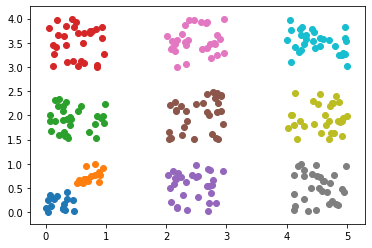

In [3]:
x11 = np.random.uniform(low=[0,0], high = [0.5,0.5],size =(15,2) )
x12 = np.random.uniform(low=[0.5,0.5], high = [1,1],size =(15,2) )


x2 = np.random.uniform(low = [0,1.5] , high = [1,2.5],size=(30,2))
x3 = np.random.uniform(low = [0,3] , high = [1,4],size=(30,2))

x4 = np.random.uniform(low = [2,0] , high = [3,1],size=(30,2))

x5 = np.random.uniform(low = [2,1.5] , high = [3,2.5],size=(30,2))

x6 = np.random.uniform(low = [2,3] , high = [3,4],size=(30,2))

x7 = np.random.uniform(low = [4,0] , high = [5,1],size=(30,2))

x8 = np.random.uniform(low = [4,1.5] , high = [5,2.5],size=(30,2))

x9 = np.random.uniform(low = [4,3] , high = [5,4],size=(30,2))
plt.scatter(x11[:,0],x11[:,1])
plt.scatter(x12[:,0],x12[:,1])
plt.scatter(x2[:,0],x2[:,1])
plt.scatter(x3[:,0],x3[:,1])

plt.scatter(x4[:,0],x4[:,1])
plt.scatter(x5[:,0],x5[:,1])
plt.scatter(x6[:,0],x6[:,1])


plt.scatter(x7[:,0],x7[:,1])
plt.scatter(x8[:,0],x8[:,1])
plt.scatter(x9[:,0],x9[:,1])



In [4]:
y11  = np.zeros(15)
y12 = np.ones(15)

Y2_ = []
for i in range(8):
    idx = np.random.randint(0,30,size=15)
    y2 = np.ones(30)
    y2[idx] = 0 
    Y2_.append(y2)

Y2_ = np.concatenate(Y2_,axis=0)
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
X_train = np.concatenate((x11,x12,x2,x3,x4,x5,x6,x7,x8,x9))

Y_train = np.concatenate((y11,y12,Y2_))



In [6]:
X_train.shape,Y_train.shape

((270, 2), (270,))

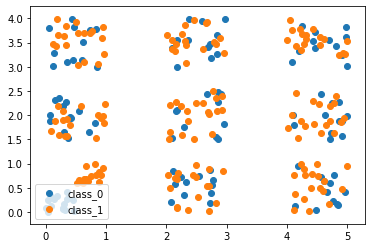

In [7]:
plt.scatter(X_train[Y_train==0,0],X_train[Y_train==0,1],label = "class_0")
plt.scatter(X_train[Y_train==1,0],X_train[Y_train==1,1],label = "class_1")
plt.legend()


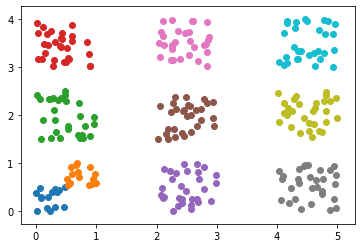

In [8]:
x11 = np.random.uniform(low=[0,0], high = [0.5,0.5],size =(15,2) )
x12 = np.random.uniform(low=[0.5,0.5], high = [1,1],size =(15,2) )


x2 = np.random.uniform(low = [0,1.5] , high = [1,2.5],size=(30,2))
x3 = np.random.uniform(low = [0,3] , high = [1,4],size=(30,2))

x4 = np.random.uniform(low = [2,0] , high = [3,1],size=(30,2))

x5 = np.random.uniform(low = [2,1.5] , high = [3,2.5],size=(30,2))

x6 = np.random.uniform(low = [2,3] , high = [3,4],size=(30,2))

x7 = np.random.uniform(low = [4,0] , high = [5,1],size=(30,2))

x8 = np.random.uniform(low = [4,1.5] , high = [5,2.5],size=(30,2))

x9 = np.random.uniform(low = [4,3] , high = [5,4],size=(30,2))
plt.scatter(x11[:,0],x11[:,1])
plt.scatter(x12[:,0],x12[:,1])
plt.scatter(x2[:,0],x2[:,1])
plt.scatter(x3[:,0],x3[:,1])

plt.scatter(x4[:,0],x4[:,1])
plt.scatter(x5[:,0],x5[:,1])
plt.scatter(x6[:,0],x6[:,1])


plt.scatter(x7[:,0],x7[:,1])
plt.scatter(x8[:,0],x8[:,1])
plt.scatter(x9[:,0],x9[:,1])

yt11  = np.zeros(15)
yt12 = np.ones(15)

Yt2_ = []
for i in range(8):
    idx = np.random.randint(0,30,size=15)
    yt2 = np.ones(30)
    yt2[idx] = 0 
    Yt2_.append(yt2)

Yt2_ = np.concatenate(Yt2_,axis=0)
Y_test = np.concatenate((yt11,yt12,Yt2_))
X_test = np.concatenate((x11,x12,x2,x3,x4,x5,x6,x7,x8,x9))

In [9]:
class Grid_data(Dataset):
    def __init__(self,x,y):
        self.x = torch.Tensor(x)
        self.y = torch.Tensor(y).type(torch.LongTensor)
    
    def __len__(self):
        
        return len(self.x)
    
    
    def __getitem__(self,idx):
        self.dx = self.x[idx,:]
        self.dy = self.y[idx]
        
        self.dx = self.dx
        self.dy = self.dy
        return self.dx, self.dy
        

In [10]:
trainset = Grid_data(X_train,Y_train)


In [11]:
trainloader = DataLoader(trainset,batch_size=10,shuffle = False)

In [12]:
inputs,label = iter(trainloader).next()

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.linear1 = nn.Linear(2,256)
#         self.linear2 = nn.Linear(256,256)
#         self.linear3 = nn.Linear(64,128)
#         self.linear4 = nn.Linear(128,256)
#         self.linear5 = nn.Linear(256,128)
#         self.linear6 = nn.Linear(128,64)
#         self.linear7 = nn.Linear(64,32)
#         self.linear8 = nn.Linear(32,16)
        self.linear9 = nn.Linear(256,2)
        
    def forward(self,x):
        x = F.relu(self.linear1(x))
#         x = F.relu(self.linear2(x))
#         x = F.relu(self.linear3(x))
#         x = F.relu(self.linear4(x))
#         x = F.relu(self.linear5(x))
#         x = F.relu(self.linear6(x))
#         x = F.relu(self.linear7(x))
#         x = F.relu(self.linear8(x))
        x = self.linear9(x)
        
        
        return x

In [14]:
net = Net()
# net(inputs)


In [15]:
net = net.to("cuda")

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)#, momentum=0.9)

In [17]:
loss_curi = []
epochs_nos= 10000
for epoch in range(epochs_nos): # loop over the dataset multiple times
    ep_lossi = []
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to("cuda"),labels.to("cuda")

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2 == 1:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss/2 ))
            ep_lossi.append(running_loss/2) # loss per minibatch
            running_loss = 0.0
    if(np.mean(ep_lossi) <= 0.3):
        break          
    loss_curi.append(np.mean(ep_lossi))   #loss per epoch
#     if (epoch%5 == 0):
#         _,actis= inc(inputs)
#         acti.append(actis)
    
            

print('Finished Training')

[1,     2] loss: 0.703
[1,     4] loss: 0.745
[1,     6] loss: 0.697
[1,     8] loss: 0.680
[1,    10] loss: 0.696
[1,    12] loss: 0.788
[1,    14] loss: 0.865
[1,    16] loss: 0.597
[1,    18] loss: 0.705
[1,    20] loss: 0.694
[1,    22] loss: 0.729
[1,    24] loss: 0.714
[1,    26] loss: 0.777
[2,     2] loss: 0.619
[2,     4] loss: 0.737
[2,     6] loss: 0.686
[2,     8] loss: 0.704
[2,    10] loss: 0.628
[2,    12] loss: 0.679
[2,    14] loss: 0.773
[2,    16] loss: 0.619
[2,    18] loss: 0.738
[2,    20] loss: 0.649
[2,    22] loss: 0.690
[2,    24] loss: 0.687
[2,    26] loss: 0.671
[3,     2] loss: 0.602
[3,     4] loss: 0.750
[3,     6] loss: 0.710
[3,     8] loss: 0.690
[3,    10] loss: 0.730
[3,    12] loss: 0.757
[3,    14] loss: 0.708
[3,    16] loss: 0.638
[3,    18] loss: 0.703
[3,    20] loss: 0.672
[3,    22] loss: 0.685
[3,    24] loss: 0.718
[3,    26] loss: 0.717
[4,     2] loss: 0.623
[4,     4] loss: 0.698
[4,     6] loss: 0.696
[4,     8] loss: 0.706
[4,    10] 

[31,     6] loss: 0.626
[31,     8] loss: 0.700
[31,    10] loss: 0.654
[31,    12] loss: 0.694
[31,    14] loss: 0.802
[31,    16] loss: 0.557
[31,    18] loss: 0.688
[31,    20] loss: 0.652
[31,    22] loss: 0.670
[31,    24] loss: 0.671
[31,    26] loss: 0.690
[32,     2] loss: 0.206
[32,     4] loss: 0.568
[32,     6] loss: 0.625
[32,     8] loss: 0.699
[32,    10] loss: 0.656
[32,    12] loss: 0.695
[32,    14] loss: 0.804
[32,    16] loss: 0.556
[32,    18] loss: 0.688
[32,    20] loss: 0.652
[32,    22] loss: 0.670
[32,    24] loss: 0.671
[32,    26] loss: 0.690
[33,     2] loss: 0.201
[33,     4] loss: 0.566
[33,     6] loss: 0.625
[33,     8] loss: 0.699
[33,    10] loss: 0.656
[33,    12] loss: 0.695
[33,    14] loss: 0.805
[33,    16] loss: 0.555
[33,    18] loss: 0.688
[33,    20] loss: 0.652
[33,    22] loss: 0.670
[33,    24] loss: 0.671
[33,    26] loss: 0.690
[34,     2] loss: 0.196
[34,     4] loss: 0.563
[34,     6] loss: 0.624
[34,     8] loss: 0.699
[34,    10] loss

[62,     2] loss: 0.119
[62,     4] loss: 0.524
[62,     6] loss: 0.612
[62,     8] loss: 0.696
[62,    10] loss: 0.657
[62,    12] loss: 0.687
[62,    14] loss: 0.811
[62,    16] loss: 0.545
[62,    18] loss: 0.687
[62,    20] loss: 0.648
[62,    22] loss: 0.668
[62,    24] loss: 0.672
[62,    26] loss: 0.688
[63,     2] loss: 0.117
[63,     4] loss: 0.523
[63,     6] loss: 0.612
[63,     8] loss: 0.696
[63,    10] loss: 0.656
[63,    12] loss: 0.686
[63,    14] loss: 0.810
[63,    16] loss: 0.545
[63,    18] loss: 0.687
[63,    20] loss: 0.648
[63,    22] loss: 0.668
[63,    24] loss: 0.672
[63,    26] loss: 0.687
[64,     2] loss: 0.116
[64,     4] loss: 0.522
[64,     6] loss: 0.611
[64,     8] loss: 0.696
[64,    10] loss: 0.657
[64,    12] loss: 0.686
[64,    14] loss: 0.811
[64,    16] loss: 0.545
[64,    18] loss: 0.687
[64,    20] loss: 0.649
[64,    22] loss: 0.668
[64,    24] loss: 0.672
[64,    26] loss: 0.687
[65,     2] loss: 0.114
[65,     4] loss: 0.520
[65,     6] loss

[92,     6] loss: 0.603
[92,     8] loss: 0.692
[92,    10] loss: 0.656
[92,    12] loss: 0.674
[92,    14] loss: 0.810
[92,    16] loss: 0.539
[92,    18] loss: 0.687
[92,    20] loss: 0.644
[92,    22] loss: 0.664
[92,    24] loss: 0.674
[92,    26] loss: 0.685
[93,     2] loss: 0.084
[93,     4] loss: 0.496
[93,     6] loss: 0.603
[93,     8] loss: 0.693
[93,    10] loss: 0.655
[93,    12] loss: 0.673
[93,    14] loss: 0.810
[93,    16] loss: 0.539
[93,    18] loss: 0.687
[93,    20] loss: 0.645
[93,    22] loss: 0.664
[93,    24] loss: 0.673
[93,    26] loss: 0.685
[94,     2] loss: 0.083
[94,     4] loss: 0.495
[94,     6] loss: 0.602
[94,     8] loss: 0.691
[94,    10] loss: 0.656
[94,    12] loss: 0.673
[94,    14] loss: 0.809
[94,    16] loss: 0.539
[94,    18] loss: 0.687
[94,    20] loss: 0.643
[94,    22] loss: 0.664
[94,    24] loss: 0.674
[94,    26] loss: 0.685
[95,     2] loss: 0.082
[95,     4] loss: 0.494
[95,     6] loss: 0.602
[95,     8] loss: 0.692
[95,    10] loss

[123,     2] loss: 0.066
[123,     4] loss: 0.475
[123,     6] loss: 0.596
[123,     8] loss: 0.691
[123,    10] loss: 0.650
[123,    12] loss: 0.661
[123,    14] loss: 0.803
[123,    16] loss: 0.536
[123,    18] loss: 0.686
[123,    20] loss: 0.640
[123,    22] loss: 0.660
[123,    24] loss: 0.673
[123,    26] loss: 0.682
[124,     2] loss: 0.065
[124,     4] loss: 0.475
[124,     6] loss: 0.595
[124,     8] loss: 0.688
[124,    10] loss: 0.652
[124,    12] loss: 0.661
[124,    14] loss: 0.803
[124,    16] loss: 0.536
[124,    18] loss: 0.686
[124,    20] loss: 0.637
[124,    22] loss: 0.661
[124,    24] loss: 0.674
[124,    26] loss: 0.683
[125,     2] loss: 0.065
[125,     4] loss: 0.474
[125,     6] loss: 0.595
[125,     8] loss: 0.691
[125,    10] loss: 0.649
[125,    12] loss: 0.660
[125,    14] loss: 0.803
[125,    16] loss: 0.536
[125,    18] loss: 0.686
[125,    20] loss: 0.640
[125,    22] loss: 0.660
[125,    24] loss: 0.673
[125,    26] loss: 0.681
[126,     2] loss: 0.064


[153,    22] loss: 0.657
[153,    24] loss: 0.674
[153,    26] loss: 0.679
[154,     2] loss: 0.052
[154,     4] loss: 0.460
[154,     6] loss: 0.589
[154,     8] loss: 0.687
[154,    10] loss: 0.647
[154,    12] loss: 0.650
[154,    14] loss: 0.797
[154,    16] loss: 0.534
[154,    18] loss: 0.685
[154,    20] loss: 0.633
[154,    22] loss: 0.657
[154,    24] loss: 0.674
[154,    26] loss: 0.680
[155,     2] loss: 0.052
[155,     4] loss: 0.460
[155,     6] loss: 0.589
[155,     8] loss: 0.685
[155,    10] loss: 0.648
[155,    12] loss: 0.650
[155,    14] loss: 0.798
[155,    16] loss: 0.533
[155,    18] loss: 0.685
[155,    20] loss: 0.633
[155,    22] loss: 0.656
[155,    24] loss: 0.673
[155,    26] loss: 0.679
[156,     2] loss: 0.052
[156,     4] loss: 0.459
[156,     6] loss: 0.588
[156,     8] loss: 0.686
[156,    10] loss: 0.648
[156,    12] loss: 0.650
[156,    14] loss: 0.796
[156,    16] loss: 0.533
[156,    18] loss: 0.685
[156,    20] loss: 0.632
[156,    22] loss: 0.656


[183,    22] loss: 0.653
[183,    24] loss: 0.674
[183,    26] loss: 0.678
[184,     2] loss: 0.042
[184,     4] loss: 0.449
[184,     6] loss: 0.583
[184,     8] loss: 0.683
[184,    10] loss: 0.645
[184,    12] loss: 0.641
[184,    14] loss: 0.792
[184,    16] loss: 0.531
[184,    18] loss: 0.685
[184,    20] loss: 0.628
[184,    22] loss: 0.651
[184,    24] loss: 0.673
[184,    26] loss: 0.677
[185,     2] loss: 0.042
[185,     4] loss: 0.449
[185,     6] loss: 0.583
[185,     8] loss: 0.682
[185,    10] loss: 0.646
[185,    12] loss: 0.641
[185,    14] loss: 0.790
[185,    16] loss: 0.532
[185,    18] loss: 0.685
[185,    20] loss: 0.625
[185,    22] loss: 0.653
[185,    24] loss: 0.673
[185,    26] loss: 0.677
[186,     2] loss: 0.042
[186,     4] loss: 0.448
[186,     6] loss: 0.584
[186,     8] loss: 0.685
[186,    10] loss: 0.644
[186,    12] loss: 0.641
[186,    14] loss: 0.791
[186,    16] loss: 0.531
[186,    18] loss: 0.685
[186,    20] loss: 0.626
[186,    22] loss: 0.652


[213,    22] loss: 0.648
[213,    24] loss: 0.673
[213,    26] loss: 0.675
[214,     2] loss: 0.035
[214,     4] loss: 0.440
[214,     6] loss: 0.579
[214,     8] loss: 0.680
[214,    10] loss: 0.644
[214,    12] loss: 0.633
[214,    14] loss: 0.784
[214,    16] loss: 0.530
[214,    18] loss: 0.685
[214,    20] loss: 0.619
[214,    22] loss: 0.648
[214,    24] loss: 0.673
[214,    26] loss: 0.675
[215,     2] loss: 0.035
[215,     4] loss: 0.439
[215,     6] loss: 0.579
[215,     8] loss: 0.680
[215,    10] loss: 0.644
[215,    12] loss: 0.633
[215,    14] loss: 0.786
[215,    16] loss: 0.530
[215,    18] loss: 0.685
[215,    20] loss: 0.619
[215,    22] loss: 0.647
[215,    24] loss: 0.673
[215,    26] loss: 0.675
[216,     2] loss: 0.035
[216,     4] loss: 0.439
[216,     6] loss: 0.579
[216,     8] loss: 0.679
[216,    10] loss: 0.644
[216,    12] loss: 0.632
[216,    14] loss: 0.786
[216,    16] loss: 0.530
[216,    18] loss: 0.685
[216,    20] loss: 0.619
[216,    22] loss: 0.647


[243,    24] loss: 0.673
[243,    26] loss: 0.674
[244,     2] loss: 0.029
[244,     4] loss: 0.433
[244,     6] loss: 0.576
[244,     8] loss: 0.673
[244,    10] loss: 0.644
[244,    12] loss: 0.623
[244,    14] loss: 0.780
[244,    16] loss: 0.530
[244,    18] loss: 0.685
[244,    20] loss: 0.613
[244,    22] loss: 0.642
[244,    24] loss: 0.673
[244,    26] loss: 0.674
[245,     2] loss: 0.029
[245,     4] loss: 0.432
[245,     6] loss: 0.576
[245,     8] loss: 0.674
[245,    10] loss: 0.643
[245,    12] loss: 0.622
[245,    14] loss: 0.778
[245,    16] loss: 0.530
[245,    18] loss: 0.685
[245,    20] loss: 0.611
[245,    22] loss: 0.643
[245,    24] loss: 0.673
[245,    26] loss: 0.674
[246,     2] loss: 0.029
[246,     4] loss: 0.432
[246,     6] loss: 0.576
[246,     8] loss: 0.675
[246,    10] loss: 0.642
[246,    12] loss: 0.622
[246,    14] loss: 0.779
[246,    16] loss: 0.530
[246,    18] loss: 0.685
[246,    20] loss: 0.613
[246,    22] loss: 0.642
[246,    24] loss: 0.672


[273,    22] loss: 0.638
[273,    24] loss: 0.672
[273,    26] loss: 0.673
[274,     2] loss: 0.025
[274,     4] loss: 0.426
[274,     6] loss: 0.573
[274,     8] loss: 0.673
[274,    10] loss: 0.641
[274,    12] loss: 0.612
[274,    14] loss: 0.777
[274,    16] loss: 0.528
[274,    18] loss: 0.685
[274,    20] loss: 0.607
[274,    22] loss: 0.636
[274,    24] loss: 0.671
[274,    26] loss: 0.671
[275,     2] loss: 0.025
[275,     4] loss: 0.426
[275,     6] loss: 0.572
[275,     8] loss: 0.668
[275,    10] loss: 0.644
[275,    12] loss: 0.613
[275,    14] loss: 0.775
[275,    16] loss: 0.528
[275,    18] loss: 0.685
[275,    20] loss: 0.604
[275,    22] loss: 0.637
[275,    24] loss: 0.671
[275,    26] loss: 0.672
[276,     2] loss: 0.025
[276,     4] loss: 0.426
[276,     6] loss: 0.573
[276,     8] loss: 0.674
[276,    10] loss: 0.640
[276,    12] loss: 0.612
[276,    14] loss: 0.775
[276,    16] loss: 0.529
[276,    18] loss: 0.685
[276,    20] loss: 0.606
[276,    22] loss: 0.637


[304,     2] loss: 0.022
[304,     4] loss: 0.421
[304,     6] loss: 0.569
[304,     8] loss: 0.666
[304,    10] loss: 0.641
[304,    12] loss: 0.605
[304,    14] loss: 0.775
[304,    16] loss: 0.526
[304,    18] loss: 0.685
[304,    20] loss: 0.597
[304,    22] loss: 0.632
[304,    24] loss: 0.670
[304,    26] loss: 0.670
[305,     2] loss: 0.022
[305,     4] loss: 0.421
[305,     6] loss: 0.570
[305,     8] loss: 0.670
[305,    10] loss: 0.638
[305,    12] loss: 0.604
[305,    14] loss: 0.775
[305,    16] loss: 0.526
[305,    18] loss: 0.685
[305,    20] loss: 0.597
[305,    22] loss: 0.632
[305,    24] loss: 0.671
[305,    26] loss: 0.671
[306,     2] loss: 0.022
[306,     4] loss: 0.421
[306,     6] loss: 0.569
[306,     8] loss: 0.666
[306,    10] loss: 0.640
[306,    12] loss: 0.603
[306,    14] loss: 0.777
[306,    16] loss: 0.525
[306,    18] loss: 0.686
[306,    20] loss: 0.597
[306,    22] loss: 0.631
[306,    24] loss: 0.671
[306,    26] loss: 0.671
[307,     2] loss: 0.022


[334,    24] loss: 0.668
[334,    26] loss: 0.668
[335,     2] loss: 0.019
[335,     4] loss: 0.416
[335,     6] loss: 0.567
[335,     8] loss: 0.661
[335,    10] loss: 0.641
[335,    12] loss: 0.593
[335,    14] loss: 0.770
[335,    16] loss: 0.525
[335,    18] loss: 0.685
[335,    20] loss: 0.588
[335,    22] loss: 0.626
[335,    24] loss: 0.668
[335,    26] loss: 0.669
[336,     2] loss: 0.019
[336,     4] loss: 0.416
[336,     6] loss: 0.568
[336,     8] loss: 0.669
[336,    10] loss: 0.635
[336,    12] loss: 0.591
[336,    14] loss: 0.770
[336,    16] loss: 0.525
[336,    18] loss: 0.685
[336,    20] loss: 0.596
[336,    22] loss: 0.623
[336,    24] loss: 0.664
[336,    26] loss: 0.668
[337,     2] loss: 0.019
[337,     4] loss: 0.416
[337,     6] loss: 0.566
[337,     8] loss: 0.659
[337,    10] loss: 0.643
[337,    12] loss: 0.594
[337,    14] loss: 0.768
[337,    16] loss: 0.525
[337,    18] loss: 0.685
[337,    20] loss: 0.589
[337,    22] loss: 0.626
[337,    24] loss: 0.666


[365,     2] loss: 0.017
[365,     4] loss: 0.412
[365,     6] loss: 0.565
[365,     8] loss: 0.659
[365,    10] loss: 0.640
[365,    12] loss: 0.582
[365,    14] loss: 0.772
[365,    16] loss: 0.522
[365,    18] loss: 0.686
[365,    20] loss: 0.584
[365,    22] loss: 0.619
[365,    24] loss: 0.663
[365,    26] loss: 0.667
[366,     2] loss: 0.017
[366,     4] loss: 0.412
[366,     6] loss: 0.565
[366,     8] loss: 0.663
[366,    10] loss: 0.636
[366,    12] loss: 0.582
[366,    14] loss: 0.771
[366,    16] loss: 0.523
[366,    18] loss: 0.686
[366,    20] loss: 0.582
[366,    22] loss: 0.620
[366,    24] loss: 0.665
[366,    26] loss: 0.668
[367,     2] loss: 0.017
[367,     4] loss: 0.412
[367,     6] loss: 0.565
[367,     8] loss: 0.661
[367,    10] loss: 0.638
[367,    12] loss: 0.580
[367,    14] loss: 0.774
[367,    16] loss: 0.522
[367,    18] loss: 0.686
[367,    20] loss: 0.585
[367,    22] loss: 0.618
[367,    24] loss: 0.663
[367,    26] loss: 0.666
[368,     2] loss: 0.017


[394,    26] loss: 0.664
[395,     2] loss: 0.015
[395,     4] loss: 0.409
[395,     6] loss: 0.562
[395,     8] loss: 0.657
[395,    10] loss: 0.639
[395,    12] loss: 0.570
[395,    14] loss: 0.770
[395,    16] loss: 0.521
[395,    18] loss: 0.686
[395,    20] loss: 0.580
[395,    22] loss: 0.612
[395,    24] loss: 0.661
[395,    26] loss: 0.663
[396,     2] loss: 0.015
[396,     4] loss: 0.409
[396,     6] loss: 0.562
[396,     8] loss: 0.658
[396,    10] loss: 0.638
[396,    12] loss: 0.570
[396,    14] loss: 0.768
[396,    16] loss: 0.522
[396,    18] loss: 0.686
[396,    20] loss: 0.577
[396,    22] loss: 0.613
[396,    24] loss: 0.663
[396,    26] loss: 0.665
[397,     2] loss: 0.015
[397,     4] loss: 0.409
[397,     6] loss: 0.563
[397,     8] loss: 0.661
[397,    10] loss: 0.636
[397,    12] loss: 0.568
[397,    14] loss: 0.770
[397,    16] loss: 0.521
[397,    18] loss: 0.686
[397,    20] loss: 0.581
[397,    22] loss: 0.611
[397,    24] loss: 0.661
[397,    26] loss: 0.663


[425,    14] loss: 0.765
[425,    16] loss: 0.521
[425,    18] loss: 0.686
[425,    20] loss: 0.572
[425,    22] loss: 0.608
[425,    24] loss: 0.662
[425,    26] loss: 0.663
[426,     2] loss: 0.013
[426,     4] loss: 0.406
[426,     6] loss: 0.561
[426,     8] loss: 0.664
[426,    10] loss: 0.633
[426,    12] loss: 0.558
[426,    14] loss: 0.767
[426,    16] loss: 0.521
[426,    18] loss: 0.686
[426,    20] loss: 0.578
[426,    22] loss: 0.606
[426,    24] loss: 0.659
[426,    26] loss: 0.661
[427,     2] loss: 0.014
[427,     4] loss: 0.407
[427,     6] loss: 0.559
[427,     8] loss: 0.647
[427,    10] loss: 0.644
[427,    12] loss: 0.560
[427,    14] loss: 0.766
[427,    16] loss: 0.519
[427,    18] loss: 0.687
[427,    20] loss: 0.573
[427,    22] loss: 0.607
[427,    24] loss: 0.661
[427,    26] loss: 0.662
[428,     2] loss: 0.013
[428,     4] loss: 0.406
[428,     6] loss: 0.562
[428,     8] loss: 0.665
[428,    10] loss: 0.633
[428,    12] loss: 0.559
[428,    14] loss: 0.764


[455,     8] loss: 0.682
[455,    10] loss: 0.626
[455,    12] loss: 0.546
[455,    14] loss: 0.759
[455,    16] loss: 0.524
[455,    18] loss: 0.686
[455,    20] loss: 0.571
[455,    22] loss: 0.602
[455,    24] loss: 0.662
[455,    26] loss: 0.662
[456,     2] loss: 0.012
[456,     4] loss: 0.405
[456,     6] loss: 0.557
[456,     8] loss: 0.640
[456,    10] loss: 0.651
[456,    12] loss: 0.547
[456,    14] loss: 0.772
[456,    16] loss: 0.515
[456,    18] loss: 0.690
[456,    20] loss: 0.575
[456,    22] loss: 0.598
[456,    24] loss: 0.659
[456,    26] loss: 0.659
[457,     2] loss: 0.012
[457,     4] loss: 0.403
[457,     6] loss: 0.560
[457,     8] loss: 0.658
[457,    10] loss: 0.636
[457,    12] loss: 0.552
[457,    14] loss: 0.755
[457,    16] loss: 0.525
[457,    18] loss: 0.687
[457,    20] loss: 0.568
[457,    22] loss: 0.603
[457,    24] loss: 0.661
[457,    26] loss: 0.663
[458,     2] loss: 0.012
[458,     4] loss: 0.404
[458,     6] loss: 0.559
[458,     8] loss: 0.661


[485,     6] loss: 0.560
[485,     8] loss: 0.673
[485,    10] loss: 0.630
[485,    12] loss: 0.536
[485,    14] loss: 0.765
[485,    16] loss: 0.518
[485,    18] loss: 0.687
[485,    20] loss: 0.575
[485,    22] loss: 0.597
[485,    24] loss: 0.660
[485,    26] loss: 0.659
[486,     2] loss: 0.012
[486,     4] loss: 0.404
[486,     6] loss: 0.556
[486,     8] loss: 0.634
[486,    10] loss: 0.656
[486,    12] loss: 0.540
[486,    14] loss: 0.765
[486,    16] loss: 0.515
[486,    18] loss: 0.689
[486,    20] loss: 0.566
[486,    22] loss: 0.597
[486,    24] loss: 0.660
[486,    26] loss: 0.659
[487,     2] loss: 0.010
[487,     4] loss: 0.402
[487,     6] loss: 0.561
[487,     8] loss: 0.673
[487,    10] loss: 0.629
[487,    12] loss: 0.539
[487,    14] loss: 0.754
[487,    16] loss: 0.524
[487,    18] loss: 0.687
[487,    20] loss: 0.563
[487,    22] loss: 0.599
[487,    24] loss: 0.659
[487,    26] loss: 0.662
[488,     2] loss: 0.011
[488,     4] loss: 0.402
[488,     6] loss: 0.556


[516,     4] loss: 0.399
[516,     6] loss: 0.556
[516,     8] loss: 0.646
[516,    10] loss: 0.643
[516,    12] loss: 0.537
[516,    14] loss: 0.747
[516,    16] loss: 0.524
[516,    18] loss: 0.687
[516,    20] loss: 0.562
[516,    22] loss: 0.598
[516,    24] loss: 0.664
[516,    26] loss: 0.663
[517,     2] loss: 0.009
[517,     4] loss: 0.400
[517,     6] loss: 0.559
[517,     8] loss: 0.674
[517,    10] loss: 0.631
[517,    12] loss: 0.524
[517,    14] loss: 0.771
[517,    16] loss: 0.514
[517,    18] loss: 0.688
[517,    20] loss: 0.579
[517,    22] loss: 0.594
[517,    24] loss: 0.663
[517,    26] loss: 0.658
[518,     2] loss: 0.011
[518,     4] loss: 0.403
[518,     6] loss: 0.556
[518,     8] loss: 0.628
[518,    10] loss: 0.666
[518,    12] loss: 0.531
[518,    14] loss: 0.760
[518,    16] loss: 0.514
[518,    18] loss: 0.691
[518,    20] loss: 0.564
[518,    22] loss: 0.594
[518,    24] loss: 0.659
[518,    26] loss: 0.658
[519,     2] loss: 0.009
[519,     4] loss: 0.400


[546,     2] loss: 0.009
[546,     4] loss: 0.396
[546,     6] loss: 0.556
[546,     8] loss: 0.656
[546,    10] loss: 0.636
[546,    12] loss: 0.528
[546,    14] loss: 0.745
[546,    16] loss: 0.526
[546,    18] loss: 0.688
[546,    20] loss: 0.558
[546,    22] loss: 0.593
[546,    24] loss: 0.659
[546,    26] loss: 0.661
[547,     2] loss: 0.009
[547,     4] loss: 0.397
[547,     6] loss: 0.554
[547,     8] loss: 0.657
[547,    10] loss: 0.639
[547,    12] loss: 0.516
[547,    14] loss: 0.772
[547,    16] loss: 0.512
[547,    18] loss: 0.690
[547,    20] loss: 0.580
[547,    22] loss: 0.588
[547,    24] loss: 0.656
[547,    26] loss: 0.654
[548,     2] loss: 0.009
[548,     4] loss: 0.398
[548,     6] loss: 0.554
[548,     8] loss: 0.628
[548,    10] loss: 0.660
[548,    12] loss: 0.529
[548,    14] loss: 0.751
[548,    16] loss: 0.517
[548,    18] loss: 0.689
[548,    20] loss: 0.561
[548,    22] loss: 0.595
[548,    24] loss: 0.663
[548,    26] loss: 0.659
[549,     2] loss: 0.008


[576,     2] loss: 0.007
[576,     4] loss: 0.392
[576,     6] loss: 0.555
[576,     8] loss: 0.657
[576,    10] loss: 0.634
[576,    12] loss: 0.524
[576,    14] loss: 0.737
[576,    16] loss: 0.532
[576,    18] loss: 0.690
[576,    20] loss: 0.559
[576,    22] loss: 0.593
[576,    24] loss: 0.661
[576,    26] loss: 0.661
[577,     2] loss: 0.008
[577,     4] loss: 0.394
[577,     6] loss: 0.554
[577,     8] loss: 0.663
[577,    10] loss: 0.639
[577,    12] loss: 0.507
[577,    14] loss: 0.775
[577,    16] loss: 0.510
[577,    18] loss: 0.690
[577,    20] loss: 0.593
[577,    22] loss: 0.586
[577,    24] loss: 0.660
[577,    26] loss: 0.652
[578,     2] loss: 0.008
[578,     4] loss: 0.396
[578,     6] loss: 0.554
[578,     8] loss: 0.623
[578,    10] loss: 0.671
[578,    12] loss: 0.526
[578,    14] loss: 0.747
[578,    16] loss: 0.516
[578,    18] loss: 0.690
[578,    20] loss: 0.563
[578,    22] loss: 0.595
[578,    24] loss: 0.670
[578,    26] loss: 0.660
[579,     2] loss: 0.007


[605,    22] loss: 0.580
[605,    24] loss: 0.650
[605,    26] loss: 0.652
[606,     2] loss: 0.007
[606,     4] loss: 0.389
[606,     6] loss: 0.550
[606,     8] loss: 0.645
[606,    10] loss: 0.640
[606,    12] loss: 0.517
[606,    14] loss: 0.742
[606,    16] loss: 0.523
[606,    18] loss: 0.689
[606,    20] loss: 0.557
[606,    22] loss: 0.587
[606,    24] loss: 0.656
[606,    26] loss: 0.657
[607,     2] loss: 0.007
[607,     4] loss: 0.390
[607,     6] loss: 0.551
[607,     8] loss: 0.659
[607,    10] loss: 0.635
[607,    12] loss: 0.505
[607,    14] loss: 0.764
[607,    16] loss: 0.512
[607,    18] loss: 0.689
[607,    20] loss: 0.566
[607,    22] loss: 0.584
[607,    24] loss: 0.655
[607,    26] loss: 0.655
[608,     2] loss: 0.007
[608,     4] loss: 0.391
[608,     6] loss: 0.549
[608,     8] loss: 0.626
[608,    10] loss: 0.661
[608,    12] loss: 0.510
[608,    14] loss: 0.756
[608,    16] loss: 0.513
[608,    18] loss: 0.692
[608,    20] loss: 0.561
[608,    22] loss: 0.583


[635,    16] loss: 0.506
[635,    18] loss: 0.699
[635,    20] loss: 0.579
[635,    22] loss: 0.576
[635,    24] loss: 0.648
[635,    26] loss: 0.649
[636,     2] loss: 0.006
[636,     4] loss: 0.385
[636,     6] loss: 0.548
[636,     8] loss: 0.632
[636,    10] loss: 0.647
[636,    12] loss: 0.519
[636,    14] loss: 0.734
[636,    16] loss: 0.527
[636,    18] loss: 0.690
[636,    20] loss: 0.562
[636,    22] loss: 0.591
[636,    24] loss: 0.666
[636,    26] loss: 0.660
[637,     2] loss: 0.005
[637,     4] loss: 0.389
[637,     6] loss: 0.555
[637,     8] loss: 0.689
[637,    10] loss: 0.627
[637,    12] loss: 0.497
[637,    14] loss: 0.766
[637,    16] loss: 0.512
[637,    18] loss: 0.689
[637,    20] loss: 0.585
[637,    22] loss: 0.584
[637,    24] loss: 0.660
[637,    26] loss: 0.652
[638,     2] loss: 0.007
[638,     4] loss: 0.392
[638,     6] loss: 0.553
[638,     8] loss: 0.619
[638,    10] loss: 0.680
[638,    12] loss: 0.510
[638,    14] loss: 0.754
[638,    16] loss: 0.510


[666,     4] loss: 0.381
[666,     6] loss: 0.549
[666,     8] loss: 0.655
[666,    10] loss: 0.632
[666,    12] loss: 0.506
[666,    14] loss: 0.731
[666,    16] loss: 0.532
[666,    18] loss: 0.691
[666,    20] loss: 0.555
[666,    22] loss: 0.585
[666,    24] loss: 0.654
[666,    26] loss: 0.656
[667,     2] loss: 0.005
[667,     4] loss: 0.382
[667,     6] loss: 0.545
[667,     8] loss: 0.649
[667,    10] loss: 0.640
[667,    12] loss: 0.494
[667,    14] loss: 0.766
[667,    16] loss: 0.509
[667,    18] loss: 0.691
[667,    20] loss: 0.578
[667,    22] loss: 0.579
[667,    24] loss: 0.651
[667,    26] loss: 0.650
[668,     2] loss: 0.005
[668,     4] loss: 0.382
[668,     6] loss: 0.546
[668,     8] loss: 0.619
[668,    10] loss: 0.662
[668,    12] loss: 0.510
[668,    14] loss: 0.743
[668,    16] loss: 0.516
[668,    18] loss: 0.691
[668,    20] loss: 0.560
[668,    22] loss: 0.586
[668,    24] loss: 0.662
[668,    26] loss: 0.656
[669,     2] loss: 0.005
[669,     4] loss: 0.385


[696,    26] loss: 0.659
[697,     2] loss: 0.004
[697,     4] loss: 0.380
[697,     6] loss: 0.548
[697,     8] loss: 0.676
[697,    10] loss: 0.630
[697,    12] loss: 0.488
[697,    14] loss: 0.768
[697,    16] loss: 0.510
[697,    18] loss: 0.690
[697,    20] loss: 0.578
[697,    22] loss: 0.581
[697,    24] loss: 0.659
[697,    26] loss: 0.651
[698,     2] loss: 0.005
[698,     4] loss: 0.384
[698,     6] loss: 0.549
[698,     8] loss: 0.612
[698,    10] loss: 0.683
[698,    12] loss: 0.497
[698,    14] loss: 0.753
[698,    16] loss: 0.510
[698,    18] loss: 0.698
[698,    20] loss: 0.562
[698,    22] loss: 0.577
[698,    24] loss: 0.654
[698,    26] loss: 0.652
[699,     2] loss: 0.004
[699,     4] loss: 0.382
[699,     6] loss: 0.555
[699,     8] loss: 0.691
[699,    10] loss: 0.621
[699,    12] loss: 0.496
[699,    14] loss: 0.733
[699,    16] loss: 0.534
[699,    18] loss: 0.693
[699,    20] loss: 0.554
[699,    22] loss: 0.581
[699,    24] loss: 0.653
[699,    26] loss: 0.658


[727,    14] loss: 0.755
[727,    16] loss: 0.515
[727,    18] loss: 0.690
[727,    20] loss: 0.567
[727,    22] loss: 0.576
[727,    24] loss: 0.654
[727,    26] loss: 0.652
[728,     2] loss: 0.005
[728,     4] loss: 0.380
[728,     6] loss: 0.545
[728,     8] loss: 0.609
[728,    10] loss: 0.679
[728,    12] loss: 0.489
[728,    14] loss: 0.761
[728,    16] loss: 0.508
[728,    18] loss: 0.700
[728,    20] loss: 0.561
[728,    22] loss: 0.572
[728,    24] loss: 0.647
[728,    26] loss: 0.649
[729,     2] loss: 0.004
[729,     4] loss: 0.374
[729,     6] loss: 0.546
[729,     8] loss: 0.661
[729,    10] loss: 0.627
[729,    12] loss: 0.497
[729,    14] loss: 0.727
[729,    16] loss: 0.537
[729,    18] loss: 0.693
[729,    20] loss: 0.556
[729,    22] loss: 0.579
[729,    24] loss: 0.651
[729,    26] loss: 0.655
[730,     2] loss: 0.004
[730,     4] loss: 0.373
[730,     6] loss: 0.538
[730,     8] loss: 0.632
[730,    10] loss: 0.649
[730,    12] loss: 0.483
[730,    14] loss: 0.768


[758,    20] loss: 0.580
[758,    22] loss: 0.569
[758,    24] loss: 0.645
[758,    26] loss: 0.645
[759,     2] loss: 0.004
[759,     4] loss: 0.366
[759,     6] loss: 0.538
[759,     8] loss: 0.622
[759,    10] loss: 0.645
[759,    12] loss: 0.502
[759,    14] loss: 0.720
[759,    16] loss: 0.537
[759,    18] loss: 0.692
[759,    20] loss: 0.568
[759,    22] loss: 0.586
[759,    24] loss: 0.666
[759,    26] loss: 0.658
[760,     2] loss: 0.003
[760,     4] loss: 0.373
[760,     6] loss: 0.543
[760,     8] loss: 0.678
[760,    10] loss: 0.632
[760,    12] loss: 0.478
[760,    14] loss: 0.767
[760,    16] loss: 0.508
[760,    18] loss: 0.691
[760,    20] loss: 0.592
[760,    22] loss: 0.578
[760,    24] loss: 0.661
[760,    26] loss: 0.648
[761,     2] loss: 0.004
[761,     4] loss: 0.377
[761,     6] loss: 0.547
[761,     8] loss: 0.606
[761,    10] loss: 0.689
[761,    12] loss: 0.497
[761,    14] loss: 0.743
[761,    16] loss: 0.512
[761,    18] loss: 0.697
[761,    20] loss: 0.564


[789,     6] loss: 0.536
[789,     8] loss: 0.621
[789,    10] loss: 0.643
[789,    12] loss: 0.496
[789,    14] loss: 0.720
[789,    16] loss: 0.537
[789,    18] loss: 0.692
[789,    20] loss: 0.565
[789,    22] loss: 0.581
[789,    24] loss: 0.659
[789,    26] loss: 0.656
[790,     2] loss: 0.003
[790,     4] loss: 0.367
[790,     6] loss: 0.537
[790,     8] loss: 0.659
[790,    10] loss: 0.638
[790,    12] loss: 0.475
[790,    14] loss: 0.762
[790,    16] loss: 0.510
[790,    18] loss: 0.691
[790,    20] loss: 0.583
[790,    22] loss: 0.575
[790,    24] loss: 0.657
[790,    26] loss: 0.647
[791,     2] loss: 0.004
[791,     4] loss: 0.370
[791,     6] loss: 0.542
[791,     8] loss: 0.600
[791,    10] loss: 0.683
[791,    12] loss: 0.490
[791,    14] loss: 0.740
[791,    16] loss: 0.514
[791,    18] loss: 0.696
[791,    20] loss: 0.564
[791,    22] loss: 0.575
[791,    24] loss: 0.656
[791,    26] loss: 0.652
[792,     2] loss: 0.003
[792,     4] loss: 0.374
[792,     6] loss: 0.551


[819,    10] loss: 0.649
[819,    12] loss: 0.490
[819,    14] loss: 0.719
[819,    16] loss: 0.536
[819,    18] loss: 0.692
[819,    20] loss: 0.565
[819,    22] loss: 0.579
[819,    24] loss: 0.657
[819,    26] loss: 0.653
[820,     2] loss: 0.003
[820,     4] loss: 0.365
[820,     6] loss: 0.536
[820,     8] loss: 0.662
[820,    10] loss: 0.631
[820,    12] loss: 0.474
[820,    14] loss: 0.755
[820,    16] loss: 0.512
[820,    18] loss: 0.691
[820,    20] loss: 0.572
[820,    22] loss: 0.572
[820,    24] loss: 0.653
[820,    26] loss: 0.649
[821,     2] loss: 0.003
[821,     4] loss: 0.366
[821,     6] loss: 0.537
[821,     8] loss: 0.596
[821,    10] loss: 0.680
[821,    12] loss: 0.483
[821,    14] loss: 0.746
[821,    16] loss: 0.511
[821,    18] loss: 0.698
[821,    20] loss: 0.561
[821,    22] loss: 0.570
[821,    24] loss: 0.651
[821,    26] loss: 0.649
[822,     2] loss: 0.003
[822,     4] loss: 0.365
[822,     6] loss: 0.540
[822,     8] loss: 0.665
[822,    10] loss: 0.627


[848,    26] loss: 0.642
[849,     2] loss: 0.003
[849,     4] loss: 0.353
[849,     6] loss: 0.531
[849,     8] loss: 0.604
[849,    10] loss: 0.653
[849,    12] loss: 0.491
[849,    14] loss: 0.715
[849,    16] loss: 0.542
[849,    18] loss: 0.692
[849,    20] loss: 0.576
[849,    22] loss: 0.580
[849,    24] loss: 0.664
[849,    26] loss: 0.655
[850,     2] loss: 0.003
[850,     4] loss: 0.363
[850,     6] loss: 0.536
[850,     8] loss: 0.673
[850,    10] loss: 0.638
[850,    12] loss: 0.468
[850,    14] loss: 0.760
[850,    16] loss: 0.510
[850,    18] loss: 0.691
[850,    20] loss: 0.592
[850,    22] loss: 0.573
[850,    24] loss: 0.662
[850,    26] loss: 0.645
[851,     2] loss: 0.003
[851,     4] loss: 0.365
[851,     6] loss: 0.542
[851,     8] loss: 0.598
[851,    10] loss: 0.698
[851,    12] loss: 0.486
[851,    14] loss: 0.737
[851,    16] loss: 0.513
[851,    18] loss: 0.698
[851,    20] loss: 0.564
[851,    22] loss: 0.575
[851,    24] loss: 0.658
[851,    26] loss: 0.651


[878,    22] loss: 0.563
[878,    24] loss: 0.640
[878,    26] loss: 0.645
[879,     2] loss: 0.002
[879,     4] loss: 0.353
[879,     6] loss: 0.528
[879,     8] loss: 0.625
[879,    10] loss: 0.636
[879,    12] loss: 0.489
[879,    14] loss: 0.719
[879,    16] loss: 0.539
[879,    18] loss: 0.695
[879,    20] loss: 0.566
[879,    22] loss: 0.574
[879,    24] loss: 0.657
[879,    26] loss: 0.657
[880,     2] loss: 0.003
[880,     4] loss: 0.355
[880,     6] loss: 0.522
[880,     8] loss: 0.628
[880,    10] loss: 0.649
[880,    12] loss: 0.465
[880,    14] loss: 0.775
[880,    16] loss: 0.505
[880,    18] loss: 0.697
[880,    20] loss: 0.588
[880,    22] loss: 0.569
[880,    24] loss: 0.658
[880,    26] loss: 0.643
[881,     2] loss: 0.003
[881,     4] loss: 0.356
[881,     6] loss: 0.535
[881,     8] loss: 0.587
[881,    10] loss: 0.687
[881,    12] loss: 0.481
[881,    14] loss: 0.727
[881,    16] loss: 0.519
[881,    18] loss: 0.695
[881,    20] loss: 0.569
[881,    22] loss: 0.575


[908,    12] loss: 0.467
[908,    14] loss: 0.769
[908,    16] loss: 0.506
[908,    18] loss: 0.711
[908,    20] loss: 0.565
[908,    22] loss: 0.560
[908,    24] loss: 0.643
[908,    26] loss: 0.642
[909,     2] loss: 0.002
[909,     4] loss: 0.350
[909,     6] loss: 0.527
[909,     8] loss: 0.626
[909,    10] loss: 0.639
[909,    12] loss: 0.479
[909,    14] loss: 0.714
[909,    16] loss: 0.544
[909,    18] loss: 0.694
[909,    20] loss: 0.563
[909,    22] loss: 0.571
[909,    24] loss: 0.652
[909,    26] loss: 0.652
[910,     2] loss: 0.002
[910,     4] loss: 0.351
[910,     6] loss: 0.519
[910,     8] loss: 0.621
[910,    10] loss: 0.651
[910,    12] loss: 0.464
[910,    14] loss: 0.763
[910,    16] loss: 0.507
[910,    18] loss: 0.696
[910,    20] loss: 0.587
[910,    22] loss: 0.566
[910,    24] loss: 0.652
[910,    26] loss: 0.642
[911,     2] loss: 0.003
[911,     4] loss: 0.350
[911,     6] loss: 0.529
[911,     8] loss: 0.583
[911,    10] loss: 0.675
[911,    12] loss: 0.486


[938,    10] loss: 0.698
[938,    12] loss: 0.468
[938,    14] loss: 0.757
[938,    16] loss: 0.507
[938,    18] loss: 0.709
[938,    20] loss: 0.560
[938,    22] loss: 0.560
[938,    24] loss: 0.644
[938,    26] loss: 0.643
[939,     2] loss: 0.002
[939,     4] loss: 0.352
[939,     6] loss: 0.530
[939,     8] loss: 0.646
[939,    10] loss: 0.632
[939,    12] loss: 0.474
[939,    14] loss: 0.715
[939,    16] loss: 0.545
[939,    18] loss: 0.696
[939,    20] loss: 0.559
[939,    22] loss: 0.570
[939,    24] loss: 0.649
[939,    26] loss: 0.653
[940,     2] loss: 0.002
[940,     4] loss: 0.348
[940,     6] loss: 0.516
[940,     8] loss: 0.598
[940,    10] loss: 0.667
[940,    12] loss: 0.460
[940,    14] loss: 0.772
[940,    16] loss: 0.504
[940,    18] loss: 0.703
[940,    20] loss: 0.592
[940,    22] loss: 0.564
[940,    24] loss: 0.652
[940,    26] loss: 0.641
[941,     2] loss: 0.002
[941,     4] loss: 0.344
[941,     6] loss: 0.524
[941,     8] loss: 0.582
[941,    10] loss: 0.667


[967,    20] loss: 0.592
[967,    22] loss: 0.571
[967,    24] loss: 0.663
[967,    26] loss: 0.643
[968,     2] loss: 0.003
[968,     4] loss: 0.355
[968,     6] loss: 0.540
[968,     8] loss: 0.583
[968,    10] loss: 0.708
[968,    12] loss: 0.474
[968,    14] loss: 0.733
[968,    16] loss: 0.513
[968,    18] loss: 0.701
[968,    20] loss: 0.566
[968,    22] loss: 0.570
[968,    24] loss: 0.659
[968,    26] loss: 0.648
[969,     2] loss: 0.002
[969,     4] loss: 0.366
[969,     6] loss: 0.546
[969,     8] loss: 0.708
[969,    10] loss: 0.621
[969,    12] loss: 0.468
[969,    14] loss: 0.723
[969,    16] loss: 0.538
[969,    18] loss: 0.697
[969,    20] loss: 0.554
[969,    22] loss: 0.569
[969,    24] loss: 0.646
[969,    26] loss: 0.651
[970,     2] loss: 0.003
[970,     4] loss: 0.354
[970,     6] loss: 0.526
[970,     8] loss: 0.578
[970,    10] loss: 0.691
[970,    12] loss: 0.461
[970,    14] loss: 0.774
[970,    16] loss: 0.505
[970,    18] loss: 0.714
[970,    20] loss: 0.579


[997,     4] loss: 0.345
[997,     6] loss: 0.514
[997,     8] loss: 0.582
[997,    10] loss: 0.675
[997,    12] loss: 0.457
[997,    14] loss: 0.768
[997,    16] loss: 0.504
[997,    18] loss: 0.706
[997,    20] loss: 0.583
[997,    22] loss: 0.560
[997,    24] loss: 0.645
[997,    26] loss: 0.639
[998,     2] loss: 0.002
[998,     4] loss: 0.338
[998,     6] loss: 0.517
[998,     8] loss: 0.583
[998,    10] loss: 0.655
[998,    12] loss: 0.481
[998,    14] loss: 0.711
[998,    16] loss: 0.538
[998,    18] loss: 0.693
[998,    20] loss: 0.568
[998,    22] loss: 0.573
[998,    24] loss: 0.660
[998,    26] loss: 0.652
[999,     2] loss: 0.002
[999,     4] loss: 0.349
[999,     6] loss: 0.520
[999,     8] loss: 0.651
[999,    10] loss: 0.631
[999,    12] loss: 0.462
[999,    14] loss: 0.755
[999,    16] loss: 0.509
[999,    18] loss: 0.692
[999,    20] loss: 0.571
[999,    22] loss: 0.564
[999,    24] loss: 0.652
[999,    26] loss: 0.645
[1000,     2] loss: 0.002
[1000,     4] loss: 0.34

[1027,     8] loss: 0.571
[1027,    10] loss: 0.698
[1027,    12] loss: 0.454
[1027,    14] loss: 0.780
[1027,    16] loss: 0.505
[1027,    18] loss: 0.720
[1027,    20] loss: 0.583
[1027,    22] loss: 0.558
[1027,    24] loss: 0.647
[1027,    26] loss: 0.637
[1028,     2] loss: 0.002
[1028,     4] loss: 0.335
[1028,     6] loss: 0.517
[1028,     8] loss: 0.589
[1028,    10] loss: 0.653
[1028,    12] loss: 0.476
[1028,    14] loss: 0.703
[1028,    16] loss: 0.556
[1028,    18] loss: 0.697
[1028,    20] loss: 0.575
[1028,    22] loss: 0.575
[1028,    24] loss: 0.660
[1028,    26] loss: 0.650
[1029,     2] loss: 0.002
[1029,     4] loss: 0.346
[1029,     6] loss: 0.517
[1029,     8] loss: 0.647
[1029,    10] loss: 0.632
[1029,    12] loss: 0.459
[1029,    14] loss: 0.761
[1029,    16] loss: 0.506
[1029,    18] loss: 0.693
[1029,    20] loss: 0.582
[1029,    22] loss: 0.566
[1029,    24] loss: 0.656
[1029,    26] loss: 0.645
[1030,     2] loss: 0.002
[1030,     4] loss: 0.348
[1030,     6

[1057,    16] loss: 0.503
[1057,    18] loss: 0.711
[1057,    20] loss: 0.567
[1057,    22] loss: 0.556
[1057,    24] loss: 0.646
[1057,    26] loss: 0.637
[1058,     2] loss: 0.002
[1058,     4] loss: 0.332
[1058,     6] loss: 0.514
[1058,     8] loss: 0.585
[1058,    10] loss: 0.658
[1058,    12] loss: 0.466
[1058,    14] loss: 0.709
[1058,    16] loss: 0.540
[1058,    18] loss: 0.693
[1058,    20] loss: 0.562
[1058,    22] loss: 0.566
[1058,    24] loss: 0.647
[1058,    26] loss: 0.646
[1059,     2] loss: 0.002
[1059,     4] loss: 0.339
[1059,     6] loss: 0.511
[1059,     8] loss: 0.615
[1059,    10] loss: 0.637
[1059,    12] loss: 0.461
[1059,    14] loss: 0.746
[1059,    16] loss: 0.510
[1059,    18] loss: 0.693
[1059,    20] loss: 0.566
[1059,    22] loss: 0.559
[1059,    24] loss: 0.646
[1059,    26] loss: 0.645
[1060,     2] loss: 0.002
[1060,     4] loss: 0.337
[1060,     6] loss: 0.515
[1060,     8] loss: 0.567
[1060,    10] loss: 0.671
[1060,    12] loss: 0.468
[1060,    14

[1087,    10] loss: 0.682
[1087,    12] loss: 0.452
[1087,    14] loss: 0.772
[1087,    16] loss: 0.501
[1087,    18] loss: 0.712
[1087,    20] loss: 0.577
[1087,    22] loss: 0.555
[1087,    24] loss: 0.645
[1087,    26] loss: 0.637
[1088,     2] loss: 0.002
[1088,     4] loss: 0.328
[1088,     6] loss: 0.511
[1088,     8] loss: 0.577
[1088,    10] loss: 0.657
[1088,    12] loss: 0.472
[1088,    14] loss: 0.708
[1088,    16] loss: 0.540
[1088,    18] loss: 0.695
[1088,    20] loss: 0.569
[1088,    22] loss: 0.568
[1088,    24] loss: 0.657
[1088,    26] loss: 0.649
[1089,     2] loss: 0.001
[1089,     4] loss: 0.340
[1089,     6] loss: 0.511
[1089,     8] loss: 0.630
[1089,    10] loss: 0.636
[1089,    12] loss: 0.456
[1089,    14] loss: 0.757
[1089,    16] loss: 0.506
[1089,    18] loss: 0.693
[1089,    20] loss: 0.567
[1089,    22] loss: 0.563
[1089,    24] loss: 0.655
[1089,    26] loss: 0.645
[1090,     2] loss: 0.002
[1090,     4] loss: 0.339
[1090,     6] loss: 0.523
[1090,     8

[1117,    20] loss: 0.573
[1117,    22] loss: 0.555
[1117,    24] loss: 0.644
[1117,    26] loss: 0.639
[1118,     2] loss: 0.002
[1118,     4] loss: 0.327
[1118,     6] loss: 0.509
[1118,     8] loss: 0.582
[1118,    10] loss: 0.649
[1118,    12] loss: 0.473
[1118,    14] loss: 0.709
[1118,    16] loss: 0.537
[1118,    18] loss: 0.695
[1118,    20] loss: 0.569
[1118,    22] loss: 0.565
[1118,    24] loss: 0.657
[1118,    26] loss: 0.650
[1119,     2] loss: 0.001
[1119,     4] loss: 0.334
[1119,     6] loss: 0.505
[1119,     8] loss: 0.613
[1119,    10] loss: 0.641
[1119,    12] loss: 0.454
[1119,    14] loss: 0.765
[1119,    16] loss: 0.502
[1119,    18] loss: 0.695
[1119,    20] loss: 0.569
[1119,    22] loss: 0.561
[1119,    24] loss: 0.655
[1119,    26] loss: 0.643
[1120,     2] loss: 0.002
[1120,     4] loss: 0.333
[1120,     6] loss: 0.520
[1120,     8] loss: 0.559
[1120,    10] loss: 0.696
[1120,    12] loss: 0.456
[1120,    14] loss: 0.731
[1120,    16] loss: 0.509
[1120,    18

[1148,     8] loss: 0.603
[1148,    10] loss: 0.646
[1148,    12] loss: 0.459
[1148,    14] loss: 0.714
[1148,    16] loss: 0.532
[1148,    18] loss: 0.694
[1148,    20] loss: 0.558
[1148,    22] loss: 0.557
[1148,    24] loss: 0.644
[1148,    26] loss: 0.644
[1149,     2] loss: 0.002
[1149,     4] loss: 0.327
[1149,     6] loss: 0.501
[1149,     8] loss: 0.577
[1149,    10] loss: 0.662
[1149,    12] loss: 0.451
[1149,    14] loss: 0.754
[1149,    16] loss: 0.502
[1149,    18] loss: 0.699
[1149,    20] loss: 0.567
[1149,    22] loss: 0.555
[1149,    24] loss: 0.645
[1149,    26] loss: 0.639
[1150,     2] loss: 0.002
[1150,     4] loss: 0.325
[1150,     6] loss: 0.505
[1150,     8] loss: 0.566
[1150,    10] loss: 0.662
[1150,    12] loss: 0.464
[1150,    14] loss: 0.719
[1150,    16] loss: 0.519
[1150,    18] loss: 0.695
[1150,    20] loss: 0.559
[1150,    22] loss: 0.559
[1150,    24] loss: 0.648
[1150,    26] loss: 0.646
[1151,     2] loss: 0.001
[1151,     4] loss: 0.332
[1151,     6

[1178,    12] loss: 0.458
[1178,    14] loss: 0.699
[1178,    16] loss: 0.566
[1178,    18] loss: 0.706
[1178,    20] loss: 0.567
[1178,    22] loss: 0.560
[1178,    24] loss: 0.645
[1178,    26] loss: 0.644
[1179,     2] loss: 0.002
[1179,     4] loss: 0.330
[1179,     6] loss: 0.498
[1179,     8] loss: 0.571
[1179,    10] loss: 0.668
[1179,    12] loss: 0.449
[1179,    14] loss: 0.772
[1179,    16] loss: 0.497
[1179,    18] loss: 0.708
[1179,    20] loss: 0.604
[1179,    22] loss: 0.557
[1179,    24] loss: 0.652
[1179,    26] loss: 0.637
[1180,     2] loss: 0.001
[1180,     4] loss: 0.323
[1180,     6] loss: 0.505
[1180,     8] loss: 0.561
[1180,    10] loss: 0.659
[1180,    12] loss: 0.485
[1180,    14] loss: 0.705
[1180,    16] loss: 0.534
[1180,    18] loss: 0.698
[1180,    20] loss: 0.582
[1180,    22] loss: 0.579
[1180,    24] loss: 0.682
[1180,    26] loss: 0.655
[1181,     2] loss: 0.001
[1181,     4] loss: 0.341
[1181,     6] loss: 0.509
[1181,     8] loss: 0.661
[1181,    10

[1208,    24] loss: 0.648
[1208,    26] loss: 0.644
[1209,     2] loss: 0.002
[1209,     4] loss: 0.325
[1209,     6] loss: 0.509
[1209,     8] loss: 0.553
[1209,    10] loss: 0.691
[1209,    12] loss: 0.449
[1209,    14] loss: 0.741
[1209,    16] loss: 0.503
[1209,    18] loss: 0.705
[1209,    20] loss: 0.557
[1209,    22] loss: 0.552
[1209,    24] loss: 0.642
[1209,    26] loss: 0.638
[1210,     2] loss: 0.001
[1210,     4] loss: 0.329
[1210,     6] loss: 0.505
[1210,     8] loss: 0.605
[1210,    10] loss: 0.642
[1210,    12] loss: 0.456
[1210,    14] loss: 0.713
[1210,    16] loss: 0.531
[1210,    18] loss: 0.696
[1210,    20] loss: 0.555
[1210,    22] loss: 0.556
[1210,    24] loss: 0.644
[1210,    26] loss: 0.645
[1211,     2] loss: 0.001
[1211,     4] loss: 0.325
[1211,     6] loss: 0.497
[1211,     8] loss: 0.566
[1211,    10] loss: 0.664
[1211,    12] loss: 0.449
[1211,    14] loss: 0.757
[1211,    16] loss: 0.499
[1211,    18] loss: 0.703
[1211,    20] loss: 0.568
[1211,    22

[1238,    22] loss: 0.561
[1238,    24] loss: 0.666
[1238,    26] loss: 0.636
[1239,     2] loss: 0.001
[1239,     4] loss: 0.321
[1239,     6] loss: 0.512
[1239,     8] loss: 0.551
[1239,    10] loss: 0.697
[1239,    12] loss: 0.457
[1239,    14] loss: 0.709
[1239,    16] loss: 0.521
[1239,    18] loss: 0.697
[1239,    20] loss: 0.568
[1239,    22] loss: 0.566
[1239,    24] loss: 0.658
[1239,    26] loss: 0.646
[1240,     2] loss: 0.001
[1240,     4] loss: 0.347
[1240,     6] loss: 0.518
[1240,     8] loss: 0.676
[1240,    10] loss: 0.619
[1240,    12] loss: 0.464
[1240,    14] loss: 0.733
[1240,    16] loss: 0.518
[1240,    18] loss: 0.698
[1240,    20] loss: 0.552
[1240,    22] loss: 0.558
[1240,    24] loss: 0.649
[1240,    26] loss: 0.655
[1241,     2] loss: 0.002
[1241,     4] loss: 0.337
[1241,     6] loss: 0.518
[1241,     8] loss: 0.557
[1241,    10] loss: 0.710
[1241,    12] loss: 0.444
[1241,    14] loss: 0.777
[1241,    16] loss: 0.499
[1241,    18] loss: 0.729
[1241,    20

[1269,    16] loss: 0.543
[1269,    18] loss: 0.699
[1269,    20] loss: 0.568
[1269,    22] loss: 0.561
[1269,    24] loss: 0.656
[1269,    26] loss: 0.648
[1270,     2] loss: 0.001
[1270,     4] loss: 0.322
[1270,     6] loss: 0.491
[1270,     8] loss: 0.594
[1270,    10] loss: 0.648
[1270,    12] loss: 0.445
[1270,    14] loss: 0.767
[1270,    16] loss: 0.497
[1270,    18] loss: 0.700
[1270,    20] loss: 0.575
[1270,    22] loss: 0.558
[1270,    24] loss: 0.659
[1270,    26] loss: 0.637
[1271,     2] loss: 0.001
[1271,     4] loss: 0.321
[1271,     6] loss: 0.511
[1271,     8] loss: 0.548
[1271,    10] loss: 0.696
[1271,    12] loss: 0.453
[1271,    14] loss: 0.717
[1271,    16] loss: 0.511
[1271,    18] loss: 0.700
[1271,    20] loss: 0.563
[1271,    22] loss: 0.558
[1271,    24] loss: 0.651
[1271,    26] loss: 0.642
[1272,     2] loss: 0.001
[1272,     4] loss: 0.342
[1272,     6] loss: 0.513
[1272,     8] loss: 0.660
[1272,    10] loss: 0.624
[1272,    12] loss: 0.460
[1272,    14

[1300,     4] loss: 0.321
[1300,     6] loss: 0.495
[1300,     8] loss: 0.554
[1300,    10] loss: 0.681
[1300,    12] loss: 0.443
[1300,    14] loss: 0.774
[1300,    16] loss: 0.494
[1300,    18] loss: 0.715
[1300,    20] loss: 0.576
[1300,    22] loss: 0.551
[1300,    24] loss: 0.649
[1300,    26] loss: 0.634
[1301,     2] loss: 0.001
[1301,     4] loss: 0.314
[1301,     6] loss: 0.496
[1301,     8] loss: 0.565
[1301,    10] loss: 0.658
[1301,    12] loss: 0.461
[1301,    14] loss: 0.701
[1301,    16] loss: 0.538
[1301,    18] loss: 0.698
[1301,    20] loss: 0.570
[1301,    22] loss: 0.563
[1301,    24] loss: 0.660
[1301,    26] loss: 0.647
[1302,     2] loss: 0.001
[1302,     4] loss: 0.324
[1302,     6] loss: 0.491
[1302,     8] loss: 0.606
[1302,    10] loss: 0.635
[1302,    12] loss: 0.452
[1302,    14] loss: 0.764
[1302,    16] loss: 0.497
[1302,    18] loss: 0.697
[1302,    20] loss: 0.568
[1302,    22] loss: 0.556
[1302,    24] loss: 0.656
[1302,    26] loss: 0.641
[1303,     2

[1330,    18] loss: 0.700
[1330,    20] loss: 0.557
[1330,    22] loss: 0.553
[1330,    24] loss: 0.646
[1330,    26] loss: 0.639
[1331,     2] loss: 0.001
[1331,     4] loss: 0.336
[1331,     6] loss: 0.505
[1331,     8] loss: 0.637
[1331,    10] loss: 0.630
[1331,    12] loss: 0.454
[1331,    14] loss: 0.719
[1331,    16] loss: 0.522
[1331,    18] loss: 0.698
[1331,    20] loss: 0.552
[1331,    22] loss: 0.551
[1331,    24] loss: 0.644
[1331,    26] loss: 0.645
[1332,     2] loss: 0.001
[1332,     4] loss: 0.324
[1332,     6] loss: 0.502
[1332,     8] loss: 0.548
[1332,    10] loss: 0.685
[1332,    12] loss: 0.446
[1332,    14] loss: 0.763
[1332,    16] loss: 0.494
[1332,    18] loss: 0.714
[1332,    20] loss: 0.567
[1332,    22] loss: 0.546
[1332,    24] loss: 0.640
[1332,    26] loss: 0.634
[1333,     2] loss: 0.001
[1333,     4] loss: 0.318
[1333,     6] loss: 0.495
[1333,     8] loss: 0.586
[1333,    10] loss: 0.640
[1333,    12] loss: 0.463
[1333,    14] loss: 0.704
[1333,    16

[1360,     4] loss: 0.313
[1360,     6] loss: 0.492
[1360,     8] loss: 0.566
[1360,    10] loss: 0.650
[1360,    12] loss: 0.463
[1360,    14] loss: 0.702
[1360,    16] loss: 0.534
[1360,    18] loss: 0.699
[1360,    20] loss: 0.568
[1360,    22] loss: 0.560
[1360,    24] loss: 0.661
[1360,    26] loss: 0.647
[1361,     2] loss: 0.001
[1361,     4] loss: 0.319
[1361,     6] loss: 0.486
[1361,     8] loss: 0.590
[1361,    10] loss: 0.641
[1361,    12] loss: 0.448
[1361,    14] loss: 0.769
[1361,    16] loss: 0.495
[1361,    18] loss: 0.700
[1361,    20] loss: 0.564
[1361,    22] loss: 0.554
[1361,    24] loss: 0.659
[1361,    26] loss: 0.639
[1362,     2] loss: 0.001
[1362,     4] loss: 0.316
[1362,     6] loss: 0.507
[1362,     8] loss: 0.542
[1362,    10] loss: 0.708
[1362,    12] loss: 0.443
[1362,    14] loss: 0.720
[1362,    16] loss: 0.506
[1362,    18] loss: 0.703
[1362,    20] loss: 0.557
[1362,    22] loss: 0.551
[1362,    24] loss: 0.642
[1362,    26] loss: 0.637
[1363,     2

[1389,    24] loss: 0.643
[1389,    26] loss: 0.634
[1390,     2] loss: 0.001
[1390,     4] loss: 0.349
[1390,     6] loss: 0.522
[1390,     8] loss: 0.677
[1390,    10] loss: 0.633
[1390,    12] loss: 0.449
[1390,    14] loss: 0.701
[1390,    16] loss: 0.549
[1390,    18] loss: 0.709
[1390,    20] loss: 0.555
[1390,    22] loss: 0.550
[1390,    24] loss: 0.641
[1390,    26] loss: 0.642
[1391,     2] loss: 0.001
[1391,     4] loss: 0.324
[1391,     6] loss: 0.500
[1391,     8] loss: 0.552
[1391,    10] loss: 0.687
[1391,    12] loss: 0.445
[1391,    14] loss: 0.778
[1391,    16] loss: 0.491
[1391,    18] loss: 0.722
[1391,    20] loss: 0.573
[1391,    22] loss: 0.545
[1391,    24] loss: 0.644
[1391,    26] loss: 0.633
[1392,     2] loss: 0.001
[1392,     4] loss: 0.319
[1392,     6] loss: 0.494
[1392,     8] loss: 0.583
[1392,    10] loss: 0.646
[1392,    12] loss: 0.458
[1392,    14] loss: 0.698
[1392,    16] loss: 0.544
[1392,    18] loss: 0.703
[1392,    20] loss: 0.572
[1392,    22

[1419,    22] loss: 0.550
[1419,    24] loss: 0.650
[1419,    26] loss: 0.645
[1420,     2] loss: 0.001
[1420,     4] loss: 0.312
[1420,     6] loss: 0.481
[1420,     8] loss: 0.562
[1420,    10] loss: 0.662
[1420,    12] loss: 0.439
[1420,    14] loss: 0.765
[1420,    16] loss: 0.493
[1420,    18] loss: 0.705
[1420,    20] loss: 0.567
[1420,    22] loss: 0.551
[1420,    24] loss: 0.654
[1420,    26] loss: 0.632
[1421,     2] loss: 0.001
[1421,     4] loss: 0.308
[1421,     6] loss: 0.493
[1421,     8] loss: 0.542
[1421,    10] loss: 0.684
[1421,    12] loss: 0.446
[1421,    14] loss: 0.707
[1421,    16] loss: 0.515
[1421,    18] loss: 0.698
[1421,    20] loss: 0.561
[1421,    22] loss: 0.555
[1421,    24] loss: 0.649
[1421,    26] loss: 0.640
[1422,     2] loss: 0.001
[1422,     4] loss: 0.329
[1422,     6] loss: 0.491
[1422,     8] loss: 0.611
[1422,    10] loss: 0.626
[1422,    12] loss: 0.466
[1422,    14] loss: 0.736
[1422,    16] loss: 0.507
[1422,    18] loss: 0.698
[1422,    20

[1449,    16] loss: 0.492
[1449,    18] loss: 0.705
[1449,    20] loss: 0.561
[1449,    22] loss: 0.552
[1449,    24] loss: 0.658
[1449,    26] loss: 0.634
[1450,     2] loss: 0.001
[1450,     4] loss: 0.307
[1450,     6] loss: 0.494
[1450,     8] loss: 0.538
[1450,    10] loss: 0.714
[1450,    12] loss: 0.439
[1450,    14] loss: 0.708
[1450,    16] loss: 0.512
[1450,    18] loss: 0.699
[1450,    20] loss: 0.558
[1450,    22] loss: 0.550
[1450,    24] loss: 0.641
[1450,    26] loss: 0.635
[1451,     2] loss: 0.001
[1451,     4] loss: 0.328
[1451,     6] loss: 0.492
[1451,     8] loss: 0.616
[1451,    10] loss: 0.628
[1451,    12] loss: 0.459
[1451,    14] loss: 0.717
[1451,    16] loss: 0.518
[1451,    18] loss: 0.701
[1451,    20] loss: 0.551
[1451,    22] loss: 0.549
[1451,    24] loss: 0.640
[1451,    26] loss: 0.645
[1452,     2] loss: 0.001
[1452,     4] loss: 0.319
[1452,     6] loss: 0.493
[1452,     8] loss: 0.545
[1452,    10] loss: 0.673
[1452,    12] loss: 0.450
[1452,    14

[1478,    24] loss: 0.643
[1478,    26] loss: 0.633
[1479,     2] loss: 0.001
[1479,     4] loss: 0.310
[1479,     6] loss: 0.483
[1479,     8] loss: 0.564
[1479,    10] loss: 0.642
[1479,    12] loss: 0.480
[1479,    14] loss: 0.698
[1479,    16] loss: 0.535
[1479,    18] loss: 0.706
[1479,    20] loss: 0.576
[1479,    22] loss: 0.568
[1479,    24] loss: 0.680
[1479,    26] loss: 0.654
[1480,     2] loss: 0.001
[1480,     4] loss: 0.316
[1480,     6] loss: 0.475
[1480,     8] loss: 0.585
[1480,    10] loss: 0.637
[1480,    12] loss: 0.456
[1480,    14] loss: 0.801
[1480,    16] loss: 0.488
[1480,    18] loss: 0.707
[1480,    20] loss: 0.563
[1480,    22] loss: 0.556
[1480,    24] loss: 0.669
[1480,    26] loss: 0.638
[1481,     2] loss: 0.001
[1481,     4] loss: 0.313
[1481,     6] loss: 0.511
[1481,     8] loss: 0.538
[1481,    10] loss: 0.751
[1481,    12] loss: 0.437
[1481,    14] loss: 0.712
[1481,    16] loss: 0.506
[1481,    18] loss: 0.705
[1481,    20] loss: 0.559
[1481,    22

[1508,    18] loss: 0.698
[1508,    20] loss: 0.557
[1508,    22] loss: 0.544
[1508,    24] loss: 0.647
[1508,    26] loss: 0.641
[1509,     2] loss: 0.001
[1509,     4] loss: 0.306
[1509,     6] loss: 0.478
[1509,     8] loss: 0.553
[1509,    10] loss: 0.666
[1509,    12] loss: 0.436
[1509,    14] loss: 0.752
[1509,    16] loss: 0.493
[1509,    18] loss: 0.703
[1509,    20] loss: 0.557
[1509,    22] loss: 0.545
[1509,    24] loss: 0.648
[1509,    26] loss: 0.633
[1510,     2] loss: 0.001
[1510,     4] loss: 0.304
[1510,     6] loss: 0.484
[1510,     8] loss: 0.544
[1510,    10] loss: 0.686
[1510,    12] loss: 0.437
[1510,    14] loss: 0.709
[1510,    16] loss: 0.512
[1510,    18] loss: 0.698
[1510,    20] loss: 0.555
[1510,    22] loss: 0.547
[1510,    24] loss: 0.641
[1510,    26] loss: 0.636
[1511,     2] loss: 0.001
[1511,     4] loss: 0.313
[1511,     6] loss: 0.479
[1511,     8] loss: 0.580
[1511,    10] loss: 0.638
[1511,    12] loss: 0.452
[1511,    14] loss: 0.727
[1511,    16

[1539,     8] loss: 0.570
[1539,    10] loss: 0.646
[1539,    12] loss: 0.462
[1539,    14] loss: 0.695
[1539,    16] loss: 0.537
[1539,    18] loss: 0.706
[1539,    20] loss: 0.570
[1539,    22] loss: 0.564
[1539,    24] loss: 0.670
[1539,    26] loss: 0.648
[1540,     2] loss: 0.001
[1540,     4] loss: 0.310
[1540,     6] loss: 0.472
[1540,     8] loss: 0.572
[1540,    10] loss: 0.640
[1540,    12] loss: 0.455
[1540,    14] loss: 0.792
[1540,    16] loss: 0.486
[1540,    18] loss: 0.707
[1540,    20] loss: 0.559
[1540,    22] loss: 0.554
[1540,    24] loss: 0.664
[1540,    26] loss: 0.640
[1541,     2] loss: 0.001
[1541,     4] loss: 0.306
[1541,     6] loss: 0.499
[1541,     8] loss: 0.533
[1541,    10] loss: 0.738
[1541,    12] loss: 0.436
[1541,    14] loss: 0.712
[1541,    16] loss: 0.504
[1541,    18] loss: 0.705
[1541,    20] loss: 0.555
[1541,    22] loss: 0.544
[1541,    24] loss: 0.642
[1541,    26] loss: 0.631
[1542,     2] loss: 0.001
[1542,     4] loss: 0.332
[1542,     6

[1569,    14] loss: 0.749
[1569,    16] loss: 0.487
[1569,    18] loss: 0.706
[1569,    20] loss: 0.553
[1569,    22] loss: 0.543
[1569,    24] loss: 0.653
[1569,    26] loss: 0.647
[1570,     2] loss: 0.001
[1570,     4] loss: 0.309
[1570,     6] loss: 0.478
[1570,     8] loss: 0.585
[1570,    10] loss: 0.643
[1570,    12] loss: 0.441
[1570,    14] loss: 0.739
[1570,    16] loss: 0.499
[1570,    18] loss: 0.698
[1570,    20] loss: 0.551
[1570,    22] loss: 0.543
[1570,    24] loss: 0.649
[1570,    26] loss: 0.637
[1571,     2] loss: 0.001
[1571,     4] loss: 0.303
[1571,     6] loss: 0.490
[1571,     8] loss: 0.534
[1571,    10] loss: 0.730
[1571,    12] loss: 0.436
[1571,    14] loss: 0.723
[1571,    16] loss: 0.498
[1571,    18] loss: 0.707
[1571,    20] loss: 0.576
[1571,    22] loss: 0.542
[1571,    24] loss: 0.641
[1571,    26] loss: 0.633
[1572,     2] loss: 0.001
[1572,     4] loss: 0.317
[1572,     6] loss: 0.483
[1572,     8] loss: 0.580
[1572,    10] loss: 0.635
[1572,    12

[1600,     2] loss: 0.001
[1600,     4] loss: 0.330
[1600,     6] loss: 0.485
[1600,     8] loss: 0.627
[1600,    10] loss: 0.626
[1600,    12] loss: 0.561
[1600,    14] loss: 0.753
[1600,    16] loss: 0.492
[1600,    18] loss: 0.702
[1600,    20] loss: 0.564
[1600,    22] loss: 0.547
[1600,    24] loss: 0.669
[1600,    26] loss: 0.673
[1601,     2] loss: 0.001
[1601,     4] loss: 0.322
[1601,     6] loss: 0.508
[1601,     8] loss: 0.546
[1601,    10] loss: 0.721
[1601,    12] loss: 0.427
[1601,    14] loss: 0.806
[1601,    16] loss: 0.494
[1601,    18] loss: 0.751
[1601,    20] loss: 0.581
[1601,    22] loss: 0.565
[1601,    24] loss: 0.702
[1601,    26] loss: 0.630
[1602,     2] loss: 0.001
[1602,     4] loss: 0.312
[1602,     6] loss: 0.491
[1602,     8] loss: 0.572
[1602,    10] loss: 0.732
[1602,    12] loss: 0.464
[1602,    14] loss: 0.690
[1602,    16] loss: 0.591
[1602,    18] loss: 0.720
[1602,    20] loss: 0.564
[1602,    22] loss: 0.561
[1602,    24] loss: 0.646
[1602,    26

[1630,    10] loss: 0.644
[1630,    12] loss: 0.450
[1630,    14] loss: 0.722
[1630,    16] loss: 0.502
[1630,    18] loss: 0.699
[1630,    20] loss: 0.551
[1630,    22] loss: 0.536
[1630,    24] loss: 0.645
[1630,    26] loss: 0.638
[1631,     2] loss: 0.001
[1631,     4] loss: 0.299
[1631,     6] loss: 0.474
[1631,     8] loss: 0.544
[1631,    10] loss: 0.670
[1631,    12] loss: 0.435
[1631,    14] loss: 0.737
[1631,    16] loss: 0.492
[1631,    18] loss: 0.705
[1631,    20] loss: 0.555
[1631,    22] loss: 0.536
[1631,    24] loss: 0.645
[1631,    26] loss: 0.631
[1632,     2] loss: 0.001
[1632,     4] loss: 0.300
[1632,     6] loss: 0.478
[1632,     8] loss: 0.553
[1632,    10] loss: 0.665
[1632,    12] loss: 0.440
[1632,    14] loss: 0.705
[1632,    16] loss: 0.513
[1632,    18] loss: 0.700
[1632,    20] loss: 0.553
[1632,    22] loss: 0.540
[1632,    24] loss: 0.642
[1632,    26] loss: 0.636
[1633,     2] loss: 0.001
[1633,     4] loss: 0.302
[1633,     6] loss: 0.471
[1633,     8

[1659,    26] loss: 0.639
[1660,     2] loss: 0.001
[1660,     4] loss: 0.300
[1660,     6] loss: 0.471
[1660,     8] loss: 0.551
[1660,    10] loss: 0.651
[1660,    12] loss: 0.441
[1660,    14] loss: 0.745
[1660,    16] loss: 0.490
[1660,    18] loss: 0.703
[1660,    20] loss: 0.554
[1660,    22] loss: 0.539
[1660,    24] loss: 0.648
[1660,    26] loss: 0.634
[1661,     2] loss: 0.001
[1661,     4] loss: 0.295
[1661,     6] loss: 0.477
[1661,     8] loss: 0.538
[1661,    10] loss: 0.685
[1661,    12] loss: 0.433
[1661,    14] loss: 0.711
[1661,    16] loss: 0.504
[1661,    18] loss: 0.701
[1661,    20] loss: 0.553
[1661,    22] loss: 0.538
[1661,    24] loss: 0.640
[1661,    26] loss: 0.631
[1662,     2] loss: 0.001
[1662,     4] loss: 0.307
[1662,     6] loss: 0.472
[1662,     8] loss: 0.562
[1662,    10] loss: 0.641
[1662,    12] loss: 0.449
[1662,    14] loss: 0.719
[1662,    16] loss: 0.504
[1662,    18] loss: 0.700
[1662,    20] loss: 0.552
[1662,    22] loss: 0.536
[1662,    24

[1689,    26] loss: 0.656
[1690,     2] loss: 0.001
[1690,     4] loss: 0.299
[1690,     6] loss: 0.468
[1690,     8] loss: 0.556
[1690,    10] loss: 0.677
[1690,    12] loss: 0.426
[1690,    14] loss: 0.779
[1690,    16] loss: 0.486
[1690,    18] loss: 0.713
[1690,    20] loss: 0.574
[1690,    22] loss: 0.565
[1690,    24] loss: 0.699
[1690,    26] loss: 0.629
[1691,     2] loss: 0.001
[1691,     4] loss: 0.293
[1691,     6] loss: 0.488
[1691,     8] loss: 0.527
[1691,    10] loss: 0.753
[1691,    12] loss: 0.450
[1691,    14] loss: 0.690
[1691,    16] loss: 0.528
[1691,    18] loss: 0.703
[1691,    20] loss: 0.562
[1691,    22] loss: 0.556
[1691,    24] loss: 0.643
[1691,    26] loss: 0.638
[1692,     2] loss: 0.000
[1692,     4] loss: 0.350
[1692,     6] loss: 0.496
[1692,     8] loss: 0.652
[1692,    10] loss: 0.619
[1692,    12] loss: 0.532
[1692,    14] loss: 0.734
[1692,    16] loss: 0.501
[1692,    18] loss: 0.706
[1692,    20] loss: 0.553
[1692,    22] loss: 0.542
[1692,    24

[1720,     6] loss: 0.495
[1720,     8] loss: 0.527
[1720,    10] loss: 0.818
[1720,    12] loss: 0.472
[1720,    14] loss: 0.705
[1720,    16] loss: 0.502
[1720,    18] loss: 0.710
[1720,    20] loss: 0.592
[1720,    22] loss: 0.542
[1720,    24] loss: 0.660
[1720,    26] loss: 0.641
[1721,     2] loss: 0.001
[1721,     4] loss: 0.331
[1721,     6] loss: 0.491
[1721,     8] loss: 0.613
[1721,    10] loss: 0.630
[1721,    12] loss: 0.481
[1721,    14] loss: 0.685
[1721,    16] loss: 0.557
[1721,    18] loss: 0.729
[1721,    20] loss: 0.572
[1721,    22] loss: 0.588
[1721,    24] loss: 0.708
[1721,    26] loss: 0.656
[1722,     2] loss: 0.001
[1722,     4] loss: 0.308
[1722,     6] loss: 0.467
[1722,     8] loss: 0.551
[1722,    10] loss: 0.651
[1722,    12] loss: 0.519
[1722,    14] loss: 0.862
[1722,    16] loss: 0.481
[1722,    18] loss: 0.738
[1722,    20] loss: 0.551
[1722,    22] loss: 0.547
[1722,    24] loss: 0.667
[1722,    26] loss: 0.633
[1723,     2] loss: 0.001
[1723,     4

[1749,    22] loss: 0.591
[1749,    24] loss: 0.694
[1749,    26] loss: 0.686
[1750,     2] loss: 0.001
[1750,     4] loss: 0.305
[1750,     6] loss: 0.484
[1750,     8] loss: 0.538
[1750,    10] loss: 0.725
[1750,    12] loss: 0.428
[1750,    14] loss: 0.756
[1750,    16] loss: 0.488
[1750,    18] loss: 0.734
[1750,    20] loss: 0.657
[1750,    22] loss: 0.547
[1750,    24] loss: 0.702
[1750,    26] loss: 0.669
[1751,     2] loss: 0.001
[1751,     4] loss: 0.303
[1751,     6] loss: 0.475
[1751,     8] loss: 0.560
[1751,    10] loss: 0.649
[1751,    12] loss: 0.458
[1751,    14] loss: 0.689
[1751,    16] loss: 0.540
[1751,    18] loss: 0.718
[1751,    20] loss: 0.561
[1751,    22] loss: 0.562
[1751,    24] loss: 0.676
[1751,    26] loss: 0.656
[1752,     2] loss: 0.001
[1752,     4] loss: 0.300
[1752,     6] loss: 0.462
[1752,     8] loss: 0.558
[1752,    10] loss: 0.630
[1752,    12] loss: 0.481
[1752,    14] loss: 0.780
[1752,    16] loss: 0.478
[1752,    18] loss: 0.712
[1752,    20

[1779,    12] loss: 0.452
[1779,    14] loss: 0.779
[1779,    16] loss: 0.481
[1779,    18] loss: 0.714
[1779,    20] loss: 0.549
[1779,    22] loss: 0.544
[1779,    24] loss: 0.666
[1779,    26] loss: 0.628
[1780,     2] loss: 0.001
[1780,     4] loss: 0.291
[1780,     6] loss: 0.486
[1780,     8] loss: 0.526
[1780,    10] loss: 0.762
[1780,    12] loss: 0.455
[1780,    14] loss: 0.694
[1780,    16] loss: 0.511
[1780,    18] loss: 0.704
[1780,    20] loss: 0.630
[1780,    22] loss: 0.534
[1780,    24] loss: 0.642
[1780,    26] loss: 0.644
[1781,     2] loss: 0.001
[1781,     4] loss: 0.329
[1781,     6] loss: 0.482
[1781,     8] loss: 0.612
[1781,    10] loss: 0.619
[1781,    12] loss: 0.542
[1781,    14] loss: 0.715
[1781,    16] loss: 0.509
[1781,    18] loss: 0.710
[1781,    20] loss: 0.635
[1781,    22] loss: 0.578
[1781,    24] loss: 0.708
[1781,    26] loss: 0.677
[1782,     2] loss: 0.001
[1782,     4] loss: 0.312
[1782,     6] loss: 0.490
[1782,     8] loss: 0.540
[1782,    10

[1809,     2] loss: 0.001
[1809,     4] loss: 0.290
[1809,     6] loss: 0.470
[1809,     8] loss: 0.543
[1809,    10] loss: 0.728
[1809,    12] loss: 0.444
[1809,    14] loss: 0.713
[1809,    16] loss: 0.499
[1809,    18] loss: 0.703
[1809,    20] loss: 0.643
[1809,    22] loss: 0.538
[1809,    24] loss: 0.675
[1809,    26] loss: 0.652
[1810,     2] loss: 0.001
[1810,     4] loss: 0.294
[1810,     6] loss: 0.466
[1810,     8] loss: 0.537
[1810,    10] loss: 0.642
[1810,    12] loss: 0.488
[1810,    14] loss: 0.705
[1810,    16] loss: 0.507
[1810,    18] loss: 0.707
[1810,    20] loss: 0.579
[1810,    22] loss: 0.565
[1810,    24] loss: 0.690
[1810,    26] loss: 0.656
[1811,     2] loss: 0.001
[1811,     4] loss: 0.301
[1811,     6] loss: 0.462
[1811,     8] loss: 0.573
[1811,    10] loss: 0.631
[1811,    12] loss: 0.448
[1811,    14] loss: 0.763
[1811,    16] loss: 0.483
[1811,    18] loss: 0.707
[1811,    20] loss: 0.550
[1811,    22] loss: 0.537
[1811,    24] loss: 0.658
[1811,    26

[1838,    26] loss: 0.654
[1839,     2] loss: 0.001
[1839,     4] loss: 0.315
[1839,     6] loss: 0.478
[1839,     8] loss: 0.587
[1839,    10] loss: 0.646
[1839,    12] loss: 0.448
[1839,    14] loss: 0.687
[1839,    16] loss: 0.544
[1839,    18] loss: 0.719
[1839,    20] loss: 0.555
[1839,    22] loss: 0.552
[1839,    24] loss: 0.661
[1839,    26] loss: 0.647
[1840,     2] loss: 0.001
[1840,     4] loss: 0.299
[1840,     6] loss: 0.464
[1840,     8] loss: 0.542
[1840,    10] loss: 0.638
[1840,    12] loss: 0.502
[1840,    14] loss: 0.785
[1840,    16] loss: 0.476
[1840,    18] loss: 0.716
[1840,    20] loss: 0.577
[1840,    22] loss: 0.542
[1840,    24] loss: 0.649
[1840,    26] loss: 0.627
[1841,     2] loss: 0.001
[1841,     4] loss: 0.290
[1841,     6] loss: 0.471
[1841,     8] loss: 0.543
[1841,    10] loss: 0.749
[1841,    12] loss: 0.459
[1841,    14] loss: 0.698
[1841,    16] loss: 0.511
[1841,    18] loss: 0.701
[1841,    20] loss: 0.682
[1841,    22] loss: 0.539
[1841,    24

[1868,    20] loss: 0.554
[1868,    22] loss: 0.552
[1868,    24] loss: 0.663
[1868,    26] loss: 0.642
[1869,     2] loss: 0.001
[1869,     4] loss: 0.305
[1869,     6] loss: 0.465
[1869,     8] loss: 0.590
[1869,    10] loss: 0.615
[1869,    12] loss: 0.484
[1869,    14] loss: 0.758
[1869,    16] loss: 0.481
[1869,    18] loss: 0.702
[1869,    20] loss: 0.567
[1869,    22] loss: 0.540
[1869,    24] loss: 0.649
[1869,    26] loss: 0.633
[1870,     2] loss: 0.001
[1870,     4] loss: 0.298
[1870,     6] loss: 0.493
[1870,     8] loss: 0.533
[1870,    10] loss: 0.753
[1870,    12] loss: 0.441
[1870,    14] loss: 0.716
[1870,    16] loss: 0.492
[1870,    18] loss: 0.713
[1870,    20] loss: 0.640
[1870,    22] loss: 0.535
[1870,    24] loss: 0.659
[1870,    26] loss: 0.647
[1871,     2] loss: 0.001
[1871,     4] loss: 0.329
[1871,     6] loss: 0.488
[1871,     8] loss: 0.617
[1871,    10] loss: 0.618
[1871,    12] loss: 0.496
[1871,    14] loss: 0.699
[1871,    16] loss: 0.527
[1871,    18

[1898,    20] loss: 0.556
[1898,    22] loss: 0.538
[1898,    24] loss: 0.651
[1898,    26] loss: 0.623
[1899,     2] loss: 0.001
[1899,     4] loss: 0.291
[1899,     6] loss: 0.467
[1899,     8] loss: 0.553
[1899,    10] loss: 0.730
[1899,    12] loss: 0.455
[1899,    14] loss: 0.692
[1899,    16] loss: 0.520
[1899,    18] loss: 0.702
[1899,    20] loss: 0.651
[1899,    22] loss: 0.537
[1899,    24] loss: 0.645
[1899,    26] loss: 0.643
[1900,     2] loss: 0.001
[1900,     4] loss: 0.294
[1900,     6] loss: 0.460
[1900,     8] loss: 0.540
[1900,    10] loss: 0.638
[1900,    12] loss: 0.559
[1900,    14] loss: 0.735
[1900,    16] loss: 0.486
[1900,    18] loss: 0.704
[1900,    20] loss: 0.660
[1900,    22] loss: 0.579
[1900,    24] loss: 0.699
[1900,    26] loss: 0.668
[1901,     2] loss: 0.001
[1901,     4] loss: 0.291
[1901,     6] loss: 0.462
[1901,     8] loss: 0.553
[1901,    10] loss: 0.687
[1901,    12] loss: 0.429
[1901,    14] loss: 0.737
[1901,    16] loss: 0.489
[1901,    18

[1928,    18] loss: 0.704
[1928,    20] loss: 0.553
[1928,    22] loss: 0.545
[1928,    24] loss: 0.654
[1928,    26] loss: 0.636
[1929,     2] loss: 0.001
[1929,     4] loss: 0.311
[1929,     6] loss: 0.469
[1929,     8] loss: 0.607
[1929,    10] loss: 0.614
[1929,    12] loss: 0.474
[1929,    14] loss: 0.740
[1929,    16] loss: 0.489
[1929,    18] loss: 0.700
[1929,    20] loss: 0.563
[1929,    22] loss: 0.543
[1929,    24] loss: 0.647
[1929,    26] loss: 0.636
[1930,     2] loss: 0.001
[1930,     4] loss: 0.297
[1930,     6] loss: 0.495
[1930,     8] loss: 0.539
[1930,    10] loss: 0.743
[1930,    12] loss: 0.437
[1930,    14] loss: 0.723
[1930,    16] loss: 0.489
[1930,    18] loss: 0.717
[1930,    20] loss: 0.616
[1930,    22] loss: 0.535
[1930,    24] loss: 0.655
[1930,    26] loss: 0.642
[1931,     2] loss: 0.001
[1931,     4] loss: 0.332
[1931,     6] loss: 0.485
[1931,     8] loss: 0.624
[1931,    10] loss: 0.615
[1931,    12] loss: 0.482
[1931,    14] loss: 0.699
[1931,    16

[1958,    26] loss: 0.645
[1959,     2] loss: 0.001
[1959,     4] loss: 0.306
[1959,     6] loss: 0.473
[1959,     8] loss: 0.583
[1959,    10] loss: 0.656
[1959,    12] loss: 0.442
[1959,    14] loss: 0.688
[1959,    16] loss: 0.535
[1959,    18] loss: 0.713
[1959,    20] loss: 0.552
[1959,    22] loss: 0.549
[1959,    24] loss: 0.650
[1959,    26] loss: 0.641
[1960,     2] loss: 0.001
[1960,     4] loss: 0.290
[1960,     6] loss: 0.460
[1960,     8] loss: 0.538
[1960,    10] loss: 0.638
[1960,    12] loss: 0.509
[1960,    14] loss: 0.777
[1960,    16] loss: 0.475
[1960,    18] loss: 0.712
[1960,    20] loss: 0.590
[1960,    22] loss: 0.554
[1960,    24] loss: 0.651
[1960,    26] loss: 0.631
[1961,     2] loss: 0.001
[1961,     4] loss: 0.288
[1961,     6] loss: 0.465
[1961,     8] loss: 0.544
[1961,    10] loss: 0.751
[1961,    12] loss: 0.460
[1961,    14] loss: 0.701
[1961,    16] loss: 0.506
[1961,    18] loss: 0.701
[1961,    20] loss: 0.695
[1961,    22] loss: 0.544
[1961,    24

[1988,    20] loss: 0.653
[1988,    22] loss: 0.580
[1988,    24] loss: 0.685
[1988,    26] loss: 0.659
[1989,     2] loss: 0.001
[1989,     4] loss: 0.287
[1989,     6] loss: 0.461
[1989,     8] loss: 0.554
[1989,    10] loss: 0.707
[1989,    12] loss: 0.439
[1989,    14] loss: 0.724
[1989,    16] loss: 0.493
[1989,    18] loss: 0.705
[1989,    20] loss: 0.639
[1989,    22] loss: 0.551
[1989,    24] loss: 0.689
[1989,    26] loss: 0.654
[1990,     2] loss: 0.001
[1990,     4] loss: 0.286
[1990,     6] loss: 0.465
[1990,     8] loss: 0.529
[1990,    10] loss: 0.654
[1990,    12] loss: 0.467
[1990,    14] loss: 0.704
[1990,    16] loss: 0.502
[1990,    18] loss: 0.705
[1990,    20] loss: 0.556
[1990,    22] loss: 0.560
[1990,    24] loss: 0.675
[1990,    26] loss: 0.646
[1991,     2] loss: 0.001
[1991,     4] loss: 0.304
[1991,     6] loss: 0.466
[1991,     8] loss: 0.598
[1991,    10] loss: 0.620
[1991,    12] loss: 0.454
[1991,    14] loss: 0.746
[1991,    16] loss: 0.486
[1991,    18

[2019,     8] loss: 0.616
[2019,    10] loss: 0.611
[2019,    12] loss: 0.477
[2019,    14] loss: 0.729
[2019,    16] loss: 0.494
[2019,    18] loss: 0.700
[2019,    20] loss: 0.566
[2019,    22] loss: 0.551
[2019,    24] loss: 0.648
[2019,    26] loss: 0.640
[2020,     2] loss: 0.001
[2020,     4] loss: 0.297
[2020,     6] loss: 0.494
[2020,     8] loss: 0.539
[2020,    10] loss: 0.733
[2020,    12] loss: 0.434
[2020,    14] loss: 0.729
[2020,    16] loss: 0.488
[2020,    18] loss: 0.718
[2020,    20] loss: 0.611
[2020,    22] loss: 0.537
[2020,    24] loss: 0.655
[2020,    26] loss: 0.642
[2021,     2] loss: 0.001
[2021,     4] loss: 0.321
[2021,     6] loss: 0.480
[2021,     8] loss: 0.613
[2021,    10] loss: 0.616
[2021,    12] loss: 0.476
[2021,    14] loss: 0.699
[2021,    16] loss: 0.524
[2021,    18] loss: 0.713
[2021,    20] loss: 0.565
[2021,    22] loss: 0.561
[2021,    24] loss: 0.672
[2021,    26] loss: 0.656
[2022,     2] loss: 0.001
[2022,     4] loss: 0.291
[2022,     6

[2049,    18] loss: 0.712
[2049,    20] loss: 0.546
[2049,    22] loss: 0.548
[2049,    24] loss: 0.651
[2049,    26] loss: 0.640
[2050,     2] loss: 0.001
[2050,     4] loss: 0.287
[2050,     6] loss: 0.463
[2050,     8] loss: 0.535
[2050,    10] loss: 0.641
[2050,    12] loss: 0.491
[2050,    14] loss: 0.770
[2050,    16] loss: 0.476
[2050,    18] loss: 0.713
[2050,    20] loss: 0.570
[2050,    22] loss: 0.550
[2050,    24] loss: 0.648
[2050,    26] loss: 0.626
[2051,     2] loss: 0.001
[2051,     4] loss: 0.290
[2051,     6] loss: 0.462
[2051,     8] loss: 0.554
[2051,    10] loss: 0.732
[2051,    12] loss: 0.455
[2051,    14] loss: 0.698
[2051,    16] loss: 0.510
[2051,    18] loss: 0.700
[2051,    20] loss: 0.669
[2051,    22] loss: 0.543
[2051,    24] loss: 0.653
[2051,    26] loss: 0.647
[2052,     2] loss: 0.001
[2052,     4] loss: 0.287
[2052,     6] loss: 0.458
[2052,     8] loss: 0.534
[2052,    10] loss: 0.638
[2052,    12] loss: 0.550
[2052,    14] loss: 0.732
[2052,    16

[2079,    26] loss: 0.653
[2080,     2] loss: 0.001
[2080,     4] loss: 0.285
[2080,     6] loss: 0.459
[2080,     8] loss: 0.531
[2080,    10] loss: 0.640
[2080,    12] loss: 0.542
[2080,    14] loss: 0.724
[2080,    16] loss: 0.490
[2080,    18] loss: 0.704
[2080,    20] loss: 0.631
[2080,    22] loss: 0.582
[2080,    24] loss: 0.706
[2080,    26] loss: 0.665
[2081,     2] loss: 0.001
[2081,     4] loss: 0.291
[2081,     6] loss: 0.457
[2081,     8] loss: 0.574
[2081,    10] loss: 0.656
[2081,    12] loss: 0.428
[2081,    14] loss: 0.738
[2081,    16] loss: 0.488
[2081,    18] loss: 0.703
[2081,    20] loss: 0.564
[2081,    22] loss: 0.551
[2081,    24] loss: 0.675
[2081,    26] loss: 0.637
[2082,     2] loss: 0.001
[2082,     4] loss: 0.285
[2082,     6] loss: 0.478
[2082,     8] loss: 0.532
[2082,    10] loss: 0.697
[2082,    12] loss: 0.438
[2082,    14] loss: 0.702
[2082,    16] loss: 0.499
[2082,    18] loss: 0.704
[2082,    20] loss: 0.560
[2082,    22] loss: 0.541
[2082,    24

[2109,    22] loss: 0.554
[2109,    24] loss: 0.668
[2109,    26] loss: 0.633
[2110,     2] loss: 0.001
[2110,     4] loss: 0.290
[2110,     6] loss: 0.484
[2110,     8] loss: 0.534
[2110,    10] loss: 0.715
[2110,    12] loss: 0.437
[2110,    14] loss: 0.703
[2110,    16] loss: 0.497
[2110,    18] loss: 0.705
[2110,    20] loss: 0.584
[2110,    22] loss: 0.539
[2110,    24] loss: 0.636
[2110,    26] loss: 0.631
[2111,     2] loss: 0.001
[2111,     4] loss: 0.325
[2111,     6] loss: 0.482
[2111,     8] loss: 0.632
[2111,    10] loss: 0.607
[2111,    12] loss: 0.519
[2111,    14] loss: 0.724
[2111,    16] loss: 0.500
[2111,    18] loss: 0.704
[2111,    20] loss: 0.610
[2111,    22] loss: 0.569
[2111,    24] loss: 0.666
[2111,    26] loss: 0.657
[2112,     2] loss: 0.001
[2112,     4] loss: 0.297
[2112,     6] loss: 0.495
[2112,     8] loss: 0.541
[2112,    10] loss: 0.734
[2112,    12] loss: 0.431
[2112,    14] loss: 0.742
[2112,    16] loss: 0.486
[2112,    18] loss: 0.727
[2112,    20

[2139,    24] loss: 0.651
[2139,    26] loss: 0.644
[2140,     2] loss: 0.001
[2140,     4] loss: 0.303
[2140,     6] loss: 0.499
[2140,     8] loss: 0.540
[2140,    10] loss: 0.738
[2140,    12] loss: 0.433
[2140,    14] loss: 0.730
[2140,    16] loss: 0.487
[2140,    18] loss: 0.721
[2140,    20] loss: 0.625
[2140,    22] loss: 0.542
[2140,    24] loss: 0.660
[2140,    26] loss: 0.647
[2141,     2] loss: 0.001
[2141,     4] loss: 0.319
[2141,     6] loss: 0.479
[2141,     8] loss: 0.618
[2141,    10] loss: 0.613
[2141,    12] loss: 0.481
[2141,    14] loss: 0.698
[2141,    16] loss: 0.523
[2141,    18] loss: 0.714
[2141,    20] loss: 0.569
[2141,    22] loss: 0.563
[2141,    24] loss: 0.679
[2141,    26] loss: 0.657
[2142,     2] loss: 0.001
[2142,     4] loss: 0.290
[2142,     6] loss: 0.474
[2142,     8] loss: 0.535
[2142,    10] loss: 0.663
[2142,    12] loss: 0.444
[2142,    14] loss: 0.768
[2142,    16] loss: 0.480
[2142,    18] loss: 0.723
[2142,    20] loss: 0.541
[2142,    22

[2170,     2] loss: 0.001
[2170,     4] loss: 0.287
[2170,     6] loss: 0.480
[2170,     8] loss: 0.538
[2170,    10] loss: 0.679
[2170,    12] loss: 0.434
[2170,    14] loss: 0.755
[2170,    16] loss: 0.482
[2170,    18] loss: 0.722
[2170,    20] loss: 0.550
[2170,    22] loss: 0.540
[2170,    24] loss: 0.656
[2170,    26] loss: 0.629
[2171,     2] loss: 0.001
[2171,     4] loss: 0.306
[2171,     6] loss: 0.466
[2171,     8] loss: 0.582
[2171,    10] loss: 0.659
[2171,    12] loss: 0.439
[2171,    14] loss: 0.691
[2171,    16] loss: 0.523
[2171,    18] loss: 0.706
[2171,    20] loss: 0.561
[2171,    22] loss: 0.541
[2171,    24] loss: 0.638
[2171,    26] loss: 0.633
[2172,     2] loss: 0.001
[2172,     4] loss: 0.284
[2172,     6] loss: 0.463
[2172,     8] loss: 0.534
[2172,    10] loss: 0.636
[2172,    12] loss: 0.515
[2172,    14] loss: 0.759
[2172,    16] loss: 0.476
[2172,    18] loss: 0.708
[2172,    20] loss: 0.601
[2172,    22] loss: 0.560
[2172,    24] loss: 0.653
[2172,    26

[2199,    22] loss: 0.544
[2199,    24] loss: 0.640
[2199,    26] loss: 0.634
[2200,     2] loss: 0.001
[2200,     4] loss: 0.283
[2200,     6] loss: 0.460
[2200,     8] loss: 0.533
[2200,    10] loss: 0.635
[2200,    12] loss: 0.521
[2200,    14] loss: 0.763
[2200,    16] loss: 0.476
[2200,    18] loss: 0.708
[2200,    20] loss: 0.601
[2200,    22] loss: 0.557
[2200,    24] loss: 0.652
[2200,    26] loss: 0.631
[2201,     2] loss: 0.001
[2201,     4] loss: 0.282
[2201,     6] loss: 0.458
[2201,     8] loss: 0.556
[2201,    10] loss: 0.726
[2201,    12] loss: 0.452
[2201,    14] loss: 0.702
[2201,    16] loss: 0.504
[2201,    18] loss: 0.699
[2201,    20] loss: 0.680
[2201,    22] loss: 0.546
[2201,    24] loss: 0.662
[2201,    26] loss: 0.649
[2202,     2] loss: 0.001
[2202,     4] loss: 0.280
[2202,     6] loss: 0.456
[2202,     8] loss: 0.531
[2202,    10] loss: 0.638
[2202,    12] loss: 0.534
[2202,    14] loss: 0.725
[2202,    16] loss: 0.487
[2202,    18] loss: 0.703
[2202,    20

[2229,    14] loss: 0.698
[2229,    16] loss: 0.508
[2229,    18] loss: 0.699
[2229,    20] loss: 0.655
[2229,    22] loss: 0.541
[2229,    24] loss: 0.649
[2229,    26] loss: 0.642
[2230,     2] loss: 0.001
[2230,     4] loss: 0.281
[2230,     6] loss: 0.457
[2230,     8] loss: 0.532
[2230,    10] loss: 0.639
[2230,    12] loss: 0.548
[2230,    14] loss: 0.733
[2230,    16] loss: 0.483
[2230,    18] loss: 0.703
[2230,    20] loss: 0.644
[2230,    22] loss: 0.582
[2230,    24] loss: 0.695
[2230,    26] loss: 0.657
[2231,     2] loss: 0.001
[2231,     4] loss: 0.285
[2231,     6] loss: 0.454
[2231,     8] loss: 0.569
[2231,    10] loss: 0.679
[2231,    12] loss: 0.431
[2231,    14] loss: 0.724
[2231,    16] loss: 0.492
[2231,    18] loss: 0.701
[2231,    20] loss: 0.598
[2231,    22] loss: 0.550
[2231,    24] loss: 0.676
[2231,    26] loss: 0.642
[2232,     2] loss: 0.001
[2232,     4] loss: 0.280
[2232,     6] loss: 0.469
[2232,     8] loss: 0.530
[2232,    10] loss: 0.664
[2232,    12

[2258,    20] loss: 0.732
[2258,    22] loss: 0.608
[2258,    24] loss: 0.691
[2258,    26] loss: 0.663
[2259,     2] loss: 0.001
[2259,     4] loss: 0.279
[2259,     6] loss: 0.456
[2259,     8] loss: 0.553
[2259,    10] loss: 0.731
[2259,    12] loss: 0.453
[2259,    14] loss: 0.712
[2259,    16] loss: 0.496
[2259,    18] loss: 0.702
[2259,    20] loss: 0.710
[2259,    22] loss: 0.556
[2259,    24] loss: 0.688
[2259,    26] loss: 0.665
[2260,     2] loss: 0.001
[2260,     4] loss: 0.277
[2260,     6] loss: 0.456
[2260,     8] loss: 0.528
[2260,    10] loss: 0.641
[2260,    12] loss: 0.507
[2260,    14] loss: 0.714
[2260,    16] loss: 0.493
[2260,    18] loss: 0.703
[2260,    20] loss: 0.602
[2260,    22] loss: 0.573
[2260,    24] loss: 0.687
[2260,    26] loss: 0.654
[2261,     2] loss: 0.001
[2261,     4] loss: 0.289
[2261,     6] loss: 0.456
[2261,     8] loss: 0.579
[2261,    10] loss: 0.643
[2261,    12] loss: 0.432
[2261,    14] loss: 0.728
[2261,    16] loss: 0.489
[2261,    18

[2288,    18] loss: 0.703
[2288,    20] loss: 0.656
[2288,    22] loss: 0.589
[2288,    24] loss: 0.708
[2288,    26] loss: 0.663
[2289,     2] loss: 0.001
[2289,     4] loss: 0.283
[2289,     6] loss: 0.452
[2289,     8] loss: 0.567
[2289,    10] loss: 0.672
[2289,    12] loss: 0.428
[2289,    14] loss: 0.729
[2289,    16] loss: 0.490
[2289,    18] loss: 0.701
[2289,    20] loss: 0.581
[2289,    22] loss: 0.557
[2289,    24] loss: 0.684
[2289,    26] loss: 0.640
[2290,     2] loss: 0.001
[2290,     4] loss: 0.277
[2290,     6] loss: 0.471
[2290,     8] loss: 0.529
[2290,    10] loss: 0.678
[2290,    12] loss: 0.442
[2290,    14] loss: 0.702
[2290,    16] loss: 0.497
[2290,    18] loss: 0.703
[2290,    20] loss: 0.551
[2290,    22] loss: 0.544
[2290,    24] loss: 0.647
[2290,    26] loss: 0.629
[2291,     2] loss: 0.001
[2291,     4] loss: 0.312
[2291,     6] loss: 0.468
[2291,     8] loss: 0.617
[2291,    10] loss: 0.606
[2291,    12] loss: 0.490
[2291,    14] loss: 0.732
[2291,    16

[2318,    12] loss: 0.502
[2318,    14] loss: 0.718
[2318,    16] loss: 0.488
[2318,    18] loss: 0.702
[2318,    20] loss: 0.584
[2318,    22] loss: 0.563
[2318,    24] loss: 0.683
[2318,    26] loss: 0.646
[2319,     2] loss: 0.001
[2319,     4] loss: 0.290
[2319,     6] loss: 0.455
[2319,     8] loss: 0.582
[2319,    10] loss: 0.638
[2319,    12] loss: 0.433
[2319,    14] loss: 0.729
[2319,    16] loss: 0.488
[2319,    18] loss: 0.698
[2319,    20] loss: 0.545
[2319,    22] loss: 0.549
[2319,    24] loss: 0.655
[2319,    26] loss: 0.627
[2320,     2] loss: 0.001
[2320,     4] loss: 0.277
[2320,     6] loss: 0.476
[2320,     8] loss: 0.533
[2320,    10] loss: 0.695
[2320,    12] loss: 0.436
[2320,    14] loss: 0.709
[2320,    16] loss: 0.490
[2320,    18] loss: 0.705
[2320,    20] loss: 0.564
[2320,    22] loss: 0.538
[2320,    24] loss: 0.636
[2320,    26] loss: 0.625
[2321,     2] loss: 0.001
[2321,     4] loss: 0.314
[2321,     6] loss: 0.467
[2321,     8] loss: 0.617
[2321,    10

[2348,    14] loss: 0.709
[2348,    16] loss: 0.491
[2348,    18] loss: 0.702
[2348,    20] loss: 0.548
[2348,    22] loss: 0.549
[2348,    24] loss: 0.661
[2348,    26] loss: 0.631
[2349,     2] loss: 0.001
[2349,     4] loss: 0.302
[2349,     6] loss: 0.461
[2349,     8] loss: 0.609
[2349,    10] loss: 0.613
[2349,    12] loss: 0.455
[2349,    14] loss: 0.728
[2349,    16] loss: 0.490
[2349,    18] loss: 0.697
[2349,    20] loss: 0.544
[2349,    22] loss: 0.551
[2349,    24] loss: 0.645
[2349,    26] loss: 0.628
[2350,     2] loss: 0.001
[2350,     4] loss: 0.283
[2350,     6] loss: 0.489
[2350,     8] loss: 0.537
[2350,    10] loss: 0.727
[2350,    12] loss: 0.435
[2350,    14] loss: 0.715
[2350,    16] loss: 0.489
[2350,    18] loss: 0.710
[2350,    20] loss: 0.603
[2350,    22] loss: 0.539
[2350,    24] loss: 0.642
[2350,    26] loss: 0.633
[2351,     2] loss: 0.000
[2351,     4] loss: 0.326
[2351,     6] loss: 0.472
[2351,     8] loss: 0.616
[2351,    10] loss: 0.605
[2351,    12

[2378,    26] loss: 0.624
[2379,     2] loss: 0.001
[2379,     4] loss: 0.308
[2379,     6] loss: 0.465
[2379,     8] loss: 0.610
[2379,    10] loss: 0.611
[2379,    12] loss: 0.461
[2379,    14] loss: 0.721
[2379,    16] loss: 0.494
[2379,    18] loss: 0.699
[2379,    20] loss: 0.550
[2379,    22] loss: 0.546
[2379,    24] loss: 0.643
[2379,    26] loss: 0.630
[2380,     2] loss: 0.001
[2380,     4] loss: 0.282
[2380,     6] loss: 0.485
[2380,     8] loss: 0.536
[2380,    10] loss: 0.708
[2380,    12] loss: 0.431
[2380,    14] loss: 0.724
[2380,    16] loss: 0.486
[2380,    18] loss: 0.713
[2380,    20] loss: 0.577
[2380,    22] loss: 0.536
[2380,    24] loss: 0.644
[2380,    26] loss: 0.631
[2381,     2] loss: 0.000
[2381,     4] loss: 0.321
[2381,     6] loss: 0.468
[2381,     8] loss: 0.606
[2381,    10] loss: 0.611
[2381,    12] loss: 0.468
[2381,    14] loss: 0.702
[2381,    16] loss: 0.512
[2381,    18] loss: 0.707
[2381,    20] loss: 0.552
[2381,    22] loss: 0.550
[2381,    24

[2408,    20] loss: 0.551
[2408,    22] loss: 0.537
[2408,    24] loss: 0.637
[2408,    26] loss: 0.622
[2409,     2] loss: 0.001
[2409,     4] loss: 0.309
[2409,     6] loss: 0.465
[2409,     8] loss: 0.613
[2409,    10] loss: 0.606
[2409,    12] loss: 0.473
[2409,    14] loss: 0.715
[2409,    16] loss: 0.498
[2409,    18] loss: 0.702
[2409,    20] loss: 0.556
[2409,    22] loss: 0.546
[2409,    24] loss: 0.649
[2409,    26] loss: 0.634
[2410,     2] loss: 0.001
[2410,     4] loss: 0.282
[2410,     6] loss: 0.482
[2410,     8] loss: 0.535
[2410,    10] loss: 0.697
[2410,    12] loss: 0.431
[2410,    14] loss: 0.734
[2410,    16] loss: 0.483
[2410,    18] loss: 0.716
[2410,    20] loss: 0.569
[2410,    22] loss: 0.537
[2410,    24] loss: 0.649
[2410,    26] loss: 0.629
[2411,     2] loss: 0.000
[2411,     4] loss: 0.313
[2411,     6] loss: 0.463
[2411,     8] loss: 0.594
[2411,    10] loss: 0.619
[2411,    12] loss: 0.454
[2411,    14] loss: 0.697
[2411,    16] loss: 0.514
[2411,    18

[2438,     4] loss: 0.276
[2438,     6] loss: 0.480
[2438,     8] loss: 0.533
[2438,    10] loss: 0.704
[2438,    12] loss: 0.434
[2438,    14] loss: 0.711
[2438,    16] loss: 0.488
[2438,    18] loss: 0.706
[2438,    20] loss: 0.574
[2438,    22] loss: 0.537
[2438,    24] loss: 0.636
[2438,    26] loss: 0.624
[2439,     2] loss: 0.001
[2439,     4] loss: 0.313
[2439,     6] loss: 0.464
[2439,     8] loss: 0.616
[2439,    10] loss: 0.604
[2439,    12] loss: 0.485
[2439,    14] loss: 0.710
[2439,    16] loss: 0.503
[2439,    18] loss: 0.703
[2439,    20] loss: 0.569
[2439,    22] loss: 0.554
[2439,    24] loss: 0.656
[2439,    26] loss: 0.638
[2440,     2] loss: 0.001
[2440,     4] loss: 0.286
[2440,     6] loss: 0.486
[2440,     8] loss: 0.533
[2440,    10] loss: 0.691
[2440,    12] loss: 0.431
[2440,    14] loss: 0.737
[2440,    16] loss: 0.483
[2440,    18] loss: 0.718
[2440,    20] loss: 0.559
[2440,    22] loss: 0.542
[2440,    24] loss: 0.654
[2440,    26] loss: 0.631
[2441,     2

[2467,    20] loss: 0.548
[2467,    22] loss: 0.542
[2467,    24] loss: 0.653
[2467,    26] loss: 0.622
[2468,     2] loss: 0.001
[2468,     4] loss: 0.274
[2468,     6] loss: 0.475
[2468,     8] loss: 0.531
[2468,    10] loss: 0.686
[2468,    12] loss: 0.437
[2468,    14] loss: 0.711
[2468,    16] loss: 0.488
[2468,    18] loss: 0.703
[2468,    20] loss: 0.548
[2468,    22] loss: 0.536
[2468,    24] loss: 0.639
[2468,    26] loss: 0.619
[2469,     2] loss: 0.000
[2469,     4] loss: 0.319
[2469,     6] loss: 0.465
[2469,     8] loss: 0.613
[2469,    10] loss: 0.607
[2469,    12] loss: 0.469
[2469,    14] loss: 0.715
[2469,    16] loss: 0.498
[2469,    18] loss: 0.700
[2469,    20] loss: 0.556
[2469,    22] loss: 0.548
[2469,    24] loss: 0.647
[2469,    26] loss: 0.632
[2470,     2] loss: 0.001
[2470,     4] loss: 0.286
[2470,     6] loss: 0.487
[2470,     8] loss: 0.534
[2470,    10] loss: 0.702
[2470,    12] loss: 0.430
[2470,    14] loss: 0.731
[2470,    16] loss: 0.483
[2470,    18

[2497,     6] loss: 0.451
[2497,     8] loss: 0.578
[2497,    10] loss: 0.650
[2497,    12] loss: 0.429
[2497,    14] loss: 0.721
[2497,    16] loss: 0.490
[2497,    18] loss: 0.696
[2497,    20] loss: 0.556
[2497,    22] loss: 0.549
[2497,    24] loss: 0.660
[2497,    26] loss: 0.626
[2498,     2] loss: 0.001
[2498,     4] loss: 0.276
[2498,     6] loss: 0.475
[2498,     8] loss: 0.529
[2498,    10] loss: 0.678
[2498,    12] loss: 0.440
[2498,    14] loss: 0.709
[2498,    16] loss: 0.487
[2498,    18] loss: 0.703
[2498,    20] loss: 0.550
[2498,    22] loss: 0.538
[2498,    24] loss: 0.641
[2498,    26] loss: 0.619
[2499,     2] loss: 0.001
[2499,     4] loss: 0.309
[2499,     6] loss: 0.465
[2499,     8] loss: 0.615
[2499,    10] loss: 0.605
[2499,    12] loss: 0.476
[2499,    14] loss: 0.720
[2499,    16] loss: 0.494
[2499,    18] loss: 0.700
[2499,    20] loss: 0.570
[2499,    22] loss: 0.553
[2499,    24] loss: 0.648
[2499,    26] loss: 0.631
[2500,     2] loss: 0.001
[2500,     4

[2526,    26] loss: 0.633
[2527,     2] loss: 0.001
[2527,     4] loss: 0.279
[2527,     6] loss: 0.451
[2527,     8] loss: 0.560
[2527,    10] loss: 0.700
[2527,    12] loss: 0.440
[2527,    14] loss: 0.707
[2527,    16] loss: 0.496
[2527,    18] loss: 0.695
[2527,    20] loss: 0.638
[2527,    22] loss: 0.548
[2527,    24] loss: 0.667
[2527,    26] loss: 0.637
[2528,     2] loss: 0.001
[2528,     4] loss: 0.271
[2528,     6] loss: 0.457
[2528,     8] loss: 0.523
[2528,    10] loss: 0.641
[2528,    12] loss: 0.490
[2528,    14] loss: 0.715
[2528,    16] loss: 0.486
[2528,    18] loss: 0.700
[2528,    20] loss: 0.579
[2528,    22] loss: 0.560
[2528,    24] loss: 0.672
[2528,    26] loss: 0.634
[2529,     2] loss: 0.001
[2529,     4] loss: 0.289
[2529,     6] loss: 0.450
[2529,     8] loss: 0.580
[2529,    10] loss: 0.641
[2529,    12] loss: 0.430
[2529,    14] loss: 0.719
[2529,    16] loss: 0.490
[2529,    18] loss: 0.696
[2529,    20] loss: 0.547
[2529,    22] loss: 0.544
[2529,    24

[2556,    12] loss: 0.526
[2556,    14] loss: 0.755
[2556,    16] loss: 0.472
[2556,    18] loss: 0.706
[2556,    20] loss: 0.613
[2556,    22] loss: 0.561
[2556,    24] loss: 0.653
[2556,    26] loss: 0.619
[2557,     2] loss: 0.001
[2557,     4] loss: 0.279
[2557,     6] loss: 0.450
[2557,     8] loss: 0.565
[2557,    10] loss: 0.725
[2557,    12] loss: 0.457
[2557,    14] loss: 0.697
[2557,    16] loss: 0.505
[2557,    18] loss: 0.694
[2557,    20] loss: 0.698
[2557,    22] loss: 0.548
[2557,    24] loss: 0.658
[2557,    26] loss: 0.642
[2558,     2] loss: 0.001
[2558,     4] loss: 0.270
[2558,     6] loss: 0.452
[2558,     8] loss: 0.524
[2558,    10] loss: 0.644
[2558,    12] loss: 0.557
[2558,    14] loss: 0.729
[2558,    16] loss: 0.480
[2558,    18] loss: 0.700
[2558,    20] loss: 0.672
[2558,    22] loss: 0.589
[2558,    24] loss: 0.695
[2558,    26] loss: 0.647
[2559,     2] loss: 0.001
[2559,     4] loss: 0.290
[2559,     6] loss: 0.450
[2559,     8] loss: 0.575
[2559,    10

[2586,     4] loss: 0.272
[2586,     6] loss: 0.465
[2586,     8] loss: 0.523
[2586,    10] loss: 0.660
[2586,    12] loss: 0.437
[2586,    14] loss: 0.741
[2586,    16] loss: 0.481
[2586,    18] loss: 0.710
[2586,    20] loss: 0.541
[2586,    22] loss: 0.544
[2586,    24] loss: 0.649
[2586,    26] loss: 0.619
[2587,     2] loss: 0.001
[2587,     4] loss: 0.292
[2587,     6] loss: 0.451
[2587,     8] loss: 0.557
[2587,    10] loss: 0.655
[2587,    12] loss: 0.437
[2587,    14] loss: 0.693
[2587,    16] loss: 0.512
[2587,    18] loss: 0.700
[2587,    20] loss: 0.562
[2587,    22] loss: 0.540
[2587,    24] loss: 0.634
[2587,    26] loss: 0.623
[2588,     2] loss: 0.001
[2588,     4] loss: 0.272
[2588,     6] loss: 0.454
[2588,     8] loss: 0.523
[2588,    10] loss: 0.626
[2588,    12] loss: 0.513
[2588,    14] loss: 0.745
[2588,    16] loss: 0.476
[2588,    18] loss: 0.702
[2588,    20] loss: 0.595
[2588,    22] loss: 0.557
[2588,    24] loss: 0.653
[2588,    26] loss: 0.621
[2589,     2

[2615,    20] loss: 0.538
[2615,    22] loss: 0.538
[2615,    24] loss: 0.641
[2615,    26] loss: 0.619
[2616,     2] loss: 0.001
[2616,     4] loss: 0.277
[2616,     6] loss: 0.475
[2616,     8] loss: 0.523
[2616,    10] loss: 0.663
[2616,    12] loss: 0.440
[2616,    14] loss: 0.726
[2616,    16] loss: 0.484
[2616,    18] loss: 0.705
[2616,    20] loss: 0.542
[2616,    22] loss: 0.534
[2616,    24] loss: 0.639
[2616,    26] loss: 0.619
[2617,     2] loss: 0.001
[2617,     4] loss: 0.292
[2617,     6] loss: 0.453
[2617,     8] loss: 0.574
[2617,    10] loss: 0.625
[2617,    12] loss: 0.444
[2617,    14] loss: 0.701
[2617,    16] loss: 0.504
[2617,    18] loss: 0.701
[2617,    20] loss: 0.540
[2617,    22] loss: 0.538
[2617,    24] loss: 0.640
[2617,    26] loss: 0.624
[2618,     2] loss: 0.001
[2618,     4] loss: 0.270
[2618,     6] loss: 0.460
[2618,     8] loss: 0.523
[2618,    10] loss: 0.642
[2618,    12] loss: 0.455
[2618,    14] loss: 0.739
[2618,    16] loss: 0.478
[2618,    18

[2645,    18] loss: 0.704
[2645,    20] loss: 0.559
[2645,    22] loss: 0.550
[2645,    24] loss: 0.652
[2645,    26] loss: 0.634
[2646,     2] loss: 0.001
[2646,     4] loss: 0.276
[2646,     6] loss: 0.480
[2646,     8] loss: 0.528
[2646,    10] loss: 0.687
[2646,    12] loss: 0.430
[2646,    14] loss: 0.735
[2646,    16] loss: 0.482
[2646,    18] loss: 0.715
[2646,    20] loss: 0.556
[2646,    22] loss: 0.538
[2646,    24] loss: 0.651
[2646,    26] loss: 0.624
[2647,     2] loss: 0.001
[2647,     4] loss: 0.305
[2647,     6] loss: 0.456
[2647,     8] loss: 0.583
[2647,    10] loss: 0.629
[2647,    12] loss: 0.443
[2647,    14] loss: 0.693
[2647,    16] loss: 0.513
[2647,    18] loss: 0.705
[2647,    20] loss: 0.544
[2647,    22] loss: 0.542
[2647,    24] loss: 0.645
[2647,    26] loss: 0.626
[2648,     2] loss: 0.001
[2648,     4] loss: 0.278
[2648,     6] loss: 0.464
[2648,     8] loss: 0.522
[2648,    10] loss: 0.636
[2648,    12] loss: 0.485
[2648,    14] loss: 0.754
[2648,    16

[2675,    22] loss: 0.550
[2675,    24] loss: 0.654
[2675,    26] loss: 0.628
[2676,     2] loss: 0.001
[2676,     4] loss: 0.276
[2676,     6] loss: 0.484
[2676,     8] loss: 0.529
[2676,    10] loss: 0.692
[2676,    12] loss: 0.429
[2676,    14] loss: 0.732
[2676,    16] loss: 0.483
[2676,    18] loss: 0.714
[2676,    20] loss: 0.557
[2676,    22] loss: 0.538
[2676,    24] loss: 0.652
[2676,    26] loss: 0.621
[2677,     2] loss: 0.001
[2677,     4] loss: 0.310
[2677,     6] loss: 0.458
[2677,     8] loss: 0.588
[2677,    10] loss: 0.628
[2677,    12] loss: 0.443
[2677,    14] loss: 0.693
[2677,    16] loss: 0.514
[2677,    18] loss: 0.708
[2677,    20] loss: 0.543
[2677,    22] loss: 0.543
[2677,    24] loss: 0.645
[2677,    26] loss: 0.625
[2678,     2] loss: 0.001
[2678,     4] loss: 0.275
[2678,     6] loss: 0.466
[2678,     8] loss: 0.524
[2678,    10] loss: 0.638
[2678,    12] loss: 0.481
[2678,    14] loss: 0.753
[2678,    16] loss: 0.476
[2678,    18] loss: 0.709
[2678,    20

[2706,    16] loss: 0.482
[2706,    18] loss: 0.718
[2706,    20] loss: 0.557
[2706,    22] loss: 0.543
[2706,    24] loss: 0.658
[2706,    26] loss: 0.628
[2707,     2] loss: 0.000
[2707,     4] loss: 0.308
[2707,     6] loss: 0.455
[2707,     8] loss: 0.577
[2707,    10] loss: 0.636
[2707,    12] loss: 0.440
[2707,    14] loss: 0.690
[2707,    16] loss: 0.516
[2707,    18] loss: 0.706
[2707,    20] loss: 0.546
[2707,    22] loss: 0.544
[2707,    24] loss: 0.644
[2707,    26] loss: 0.626
[2708,     2] loss: 0.001
[2708,     4] loss: 0.273
[2708,     6] loss: 0.461
[2708,     8] loss: 0.520
[2708,    10] loss: 0.633
[2708,    12] loss: 0.498
[2708,    14] loss: 0.757
[2708,    16] loss: 0.473
[2708,    18] loss: 0.708
[2708,    20] loss: 0.582
[2708,    22] loss: 0.551
[2708,    24] loss: 0.646
[2708,    26] loss: 0.608
[2709,     2] loss: 0.001
[2709,     4] loss: 0.276
[2709,     6] loss: 0.449
[2709,     8] loss: 0.553
[2709,    10] loss: 0.730
[2709,    12] loss: 0.458
[2709,    14

[2736,    18] loss: 0.706
[2736,    20] loss: 0.556
[2736,    22] loss: 0.536
[2736,    24] loss: 0.636
[2736,    26] loss: 0.617
[2737,     2] loss: 0.000
[2737,     4] loss: 0.318
[2737,     6] loss: 0.461
[2737,     8] loss: 0.604
[2737,    10] loss: 0.607
[2737,    12] loss: 0.465
[2737,    14] loss: 0.703
[2737,    16] loss: 0.506
[2737,    18] loss: 0.705
[2737,    20] loss: 0.550
[2737,    22] loss: 0.545
[2737,    24] loss: 0.649
[2737,    26] loss: 0.625
[2738,     2] loss: 0.001
[2738,     4] loss: 0.279
[2738,     6] loss: 0.483
[2738,     8] loss: 0.525
[2738,    10] loss: 0.678
[2738,    12] loss: 0.433
[2738,    14] loss: 0.735
[2738,    16] loss: 0.481
[2738,    18] loss: 0.713
[2738,    20] loss: 0.546
[2738,    22] loss: 0.537
[2738,    24] loss: 0.645
[2738,    26] loss: 0.617
[2739,     2] loss: 0.001
[2739,     4] loss: 0.297
[2739,     6] loss: 0.456
[2739,     8] loss: 0.584
[2739,    10] loss: 0.633
[2739,    12] loss: 0.439
[2739,    14] loss: 0.694
[2739,    16

[2766,     2] loss: 0.001
[2766,     4] loss: 0.270
[2766,     6] loss: 0.477
[2766,     8] loss: 0.523
[2766,    10] loss: 0.703
[2766,    12] loss: 0.432
[2766,    14] loss: 0.708
[2766,    16] loss: 0.487
[2766,    18] loss: 0.702
[2766,    20] loss: 0.574
[2766,    22] loss: 0.537
[2766,    24] loss: 0.634
[2766,    26] loss: 0.616
[2767,     2] loss: 0.000
[2767,     4] loss: 0.309
[2767,     6] loss: 0.462
[2767,     8] loss: 0.605
[2767,    10] loss: 0.603
[2767,    12] loss: 0.491
[2767,    14] loss: 0.709
[2767,    16] loss: 0.499
[2767,    18] loss: 0.705
[2767,    20] loss: 0.578
[2767,    22] loss: 0.555
[2767,    24] loss: 0.659
[2767,    26] loss: 0.634
[2768,     2] loss: 0.001
[2768,     4] loss: 0.273
[2768,     6] loss: 0.484
[2768,     8] loss: 0.527
[2768,    10] loss: 0.702
[2768,    12] loss: 0.427
[2768,    14] loss: 0.734
[2768,    16] loss: 0.483
[2768,    18] loss: 0.717
[2768,    20] loss: 0.573
[2768,    22] loss: 0.541
[2768,    24] loss: 0.658
[2768,    26

[2795,    14] loss: 0.705
[2795,    16] loss: 0.493
[2795,    18] loss: 0.696
[2795,    20] loss: 0.643
[2795,    22] loss: 0.546
[2795,    24] loss: 0.665
[2795,    26] loss: 0.630
[2796,     2] loss: 0.001
[2796,     4] loss: 0.263
[2796,     6] loss: 0.457
[2796,     8] loss: 0.518
[2796,    10] loss: 0.645
[2796,    12] loss: 0.497
[2796,    14] loss: 0.717
[2796,    16] loss: 0.482
[2796,    18] loss: 0.699
[2796,    20] loss: 0.588
[2796,    22] loss: 0.562
[2796,    24] loss: 0.675
[2796,    26] loss: 0.622
[2797,     2] loss: 0.001
[2797,     4] loss: 0.297
[2797,     6] loss: 0.450
[2797,     8] loss: 0.589
[2797,    10] loss: 0.649
[2797,    12] loss: 0.428
[2797,    14] loss: 0.709
[2797,    16] loss: 0.493
[2797,    18] loss: 0.694
[2797,    20] loss: 0.554
[2797,    22] loss: 0.544
[2797,    24] loss: 0.650
[2797,    26] loss: 0.615
[2798,     2] loss: 0.001
[2798,     4] loss: 0.274
[2798,     6] loss: 0.479
[2798,     8] loss: 0.527
[2798,    10] loss: 0.672
[2798,    12

[2825,    12] loss: 0.447
[2825,    14] loss: 0.692
[2825,    16] loss: 0.506
[2825,    18] loss: 0.700
[2825,    20] loss: 0.642
[2825,    22] loss: 0.541
[2825,    24] loss: 0.641
[2825,    26] loss: 0.622
[2826,     2] loss: 0.001
[2826,     4] loss: 0.267
[2826,     6] loss: 0.452
[2826,     8] loss: 0.518
[2826,    10] loss: 0.637
[2826,    12] loss: 0.557
[2826,    14] loss: 0.740
[2826,    16] loss: 0.471
[2826,    18] loss: 0.704
[2826,    20] loss: 0.666
[2826,    22] loss: 0.580
[2826,    24] loss: 0.676
[2826,    26] loss: 0.627
[2827,     2] loss: 0.001
[2827,     4] loss: 0.275
[2827,     6] loss: 0.446
[2827,     8] loss: 0.570
[2827,    10] loss: 0.710
[2827,    12] loss: 0.447
[2827,    14] loss: 0.701
[2827,    16] loss: 0.497
[2827,    18] loss: 0.694
[2827,    20] loss: 0.659
[2827,    22] loss: 0.552
[2827,    24] loss: 0.667
[2827,    26] loss: 0.636
[2828,     2] loss: 0.001
[2828,     4] loss: 0.264
[2828,     6] loss: 0.459
[2828,     8] loss: 0.518
[2828,    10

[2855,    14] loss: 0.689
[2855,    16] loss: 0.512
[2855,    18] loss: 0.704
[2855,    20] loss: 0.556
[2855,    22] loss: 0.543
[2855,    24] loss: 0.638
[2855,    26] loss: 0.617
[2856,     2] loss: 0.001
[2856,     4] loss: 0.265
[2856,     6] loss: 0.451
[2856,     8] loss: 0.512
[2856,    10] loss: 0.626
[2856,    12] loss: 0.522
[2856,    14] loss: 0.752
[2856,    16] loss: 0.472
[2856,    18] loss: 0.703
[2856,    20] loss: 0.616
[2856,    22] loss: 0.561
[2856,    24] loss: 0.651
[2856,    26] loss: 0.613
[2857,     2] loss: 0.001
[2857,     4] loss: 0.267
[2857,     6] loss: 0.445
[2857,     8] loss: 0.537
[2857,    10] loss: 0.749
[2857,    12] loss: 0.468
[2857,    14] loss: 0.693
[2857,    16] loss: 0.504
[2857,    18] loss: 0.693
[2857,    20] loss: 0.735
[2857,    22] loss: 0.552
[2857,    24] loss: 0.660
[2857,    26] loss: 0.635
[2858,     2] loss: 0.001
[2858,     4] loss: 0.264
[2858,     6] loss: 0.444
[2858,     8] loss: 0.509
[2858,    10] loss: 0.641
[2858,    12

[2884,    18] loss: 0.703
[2884,    20] loss: 0.558
[2884,    22] loss: 0.533
[2884,    24] loss: 0.638
[2884,    26] loss: 0.612
[2885,     2] loss: 0.001
[2885,     4] loss: 0.288
[2885,     6] loss: 0.445
[2885,     8] loss: 0.557
[2885,    10] loss: 0.611
[2885,    12] loss: 0.463
[2885,    14] loss: 0.703
[2885,    16] loss: 0.500
[2885,    18] loss: 0.702
[2885,    20] loss: 0.549
[2885,    22] loss: 0.543
[2885,    24] loss: 0.653
[2885,    26] loss: 0.617
[2886,     2] loss: 0.001
[2886,     4] loss: 0.261
[2886,     6] loss: 0.458
[2886,     8] loss: 0.512
[2886,    10] loss: 0.658
[2886,    12] loss: 0.434
[2886,    14] loss: 0.732
[2886,    16] loss: 0.481
[2886,    18] loss: 0.704
[2886,    20] loss: 0.541
[2886,    22] loss: 0.540
[2886,    24] loss: 0.647
[2886,    26] loss: 0.613
[2887,     2] loss: 0.001
[2887,     4] loss: 0.287
[2887,     6] loss: 0.443
[2887,     8] loss: 0.531
[2887,    10] loss: 0.649
[2887,    12] loss: 0.436
[2887,    14] loss: 0.694
[2887,    16

[2915,    18] loss: 0.711
[2915,    20] loss: 0.953
[2915,    22] loss: 0.658
[2915,    24] loss: 0.652
[2915,    26] loss: 0.640
[2916,     2] loss: 0.000
[2916,     4] loss: 0.396
[2916,     6] loss: 0.543
[2916,     8] loss: 0.861
[2916,    10] loss: 0.622
[2916,    12] loss: 0.610
[2916,    14] loss: 0.765
[2916,    16] loss: 0.480
[2916,    18] loss: 0.690
[2916,    20] loss: 0.871
[2916,    22] loss: 0.818
[2916,    24] loss: 0.653
[2916,    26] loss: 0.627
[2917,     2] loss: 0.001
[2917,     4] loss: 0.307
[2917,     6] loss: 0.559
[2917,     8] loss: 0.599
[2917,    10] loss: 0.840
[2917,    12] loss: 0.468
[2917,    14] loss: 0.682
[2917,    16] loss: 0.510
[2917,    18] loss: 0.702
[2917,    20] loss: 0.845
[2917,    22] loss: 0.620
[2917,    24] loss: 0.642
[2917,    26] loss: 0.633
[2918,     2] loss: 0.000
[2918,     4] loss: 0.357
[2918,     6] loss: 0.499
[2918,     8] loss: 0.754
[2918,    10] loss: 0.608
[2918,    12] loss: 0.572
[2918,    14] loss: 0.755
[2918,    16

[2946,    12] loss: 0.546
[2946,    14] loss: 0.753
[2946,    16] loss: 0.478
[2946,    18] loss: 0.694
[2946,    20] loss: 0.759
[2946,    22] loss: 0.715
[2946,    24] loss: 0.654
[2946,    26] loss: 0.616
[2947,     2] loss: 0.001
[2947,     4] loss: 0.268
[2947,     6] loss: 0.487
[2947,     8] loss: 0.528
[2947,    10] loss: 0.750
[2947,    12] loss: 0.455
[2947,    14] loss: 0.686
[2947,    16] loss: 0.506
[2947,    18] loss: 0.697
[2947,    20] loss: 0.786
[2947,    22] loss: 0.615
[2947,    24] loss: 0.654
[2947,    26] loss: 0.621
[2948,     2] loss: 0.000
[2948,     4] loss: 0.317
[2948,     6] loss: 0.453
[2948,     8] loss: 0.614
[2948,    10] loss: 0.597
[2948,    12] loss: 0.548
[2948,    14] loss: 0.755
[2948,    16] loss: 0.478
[2948,    18] loss: 0.694
[2948,    20] loss: 0.756
[2948,    22] loss: 0.708
[2948,    24] loss: 0.653
[2948,    26] loss: 0.610
[2949,     2] loss: 0.001
[2949,     4] loss: 0.278
[2949,     6] loss: 0.489
[2949,     8] loss: 0.521
[2949,    10

[2976,    14] loss: 0.748
[2976,    16] loss: 0.481
[2976,    18] loss: 0.694
[2976,    20] loss: 0.725
[2976,    22] loss: 0.688
[2976,    24] loss: 0.650
[2976,    26] loss: 0.616
[2977,     2] loss: 0.001
[2977,     4] loss: 0.268
[2977,     6] loss: 0.484
[2977,     8] loss: 0.522
[2977,    10] loss: 0.740
[2977,    12] loss: 0.450
[2977,    14] loss: 0.688
[2977,    16] loss: 0.504
[2977,    18] loss: 0.696
[2977,    20] loss: 0.758
[2977,    22] loss: 0.605
[2977,    24] loss: 0.652
[2977,    26] loss: 0.623
[2978,     2] loss: 0.001
[2978,     4] loss: 0.303
[2978,     6] loss: 0.452
[2978,     8] loss: 0.607
[2978,    10] loss: 0.599
[2978,    12] loss: 0.537
[2978,    14] loss: 0.751
[2978,    16] loss: 0.482
[2978,    18] loss: 0.691
[2978,    20] loss: 0.737
[2978,    22] loss: 0.686
[2978,    24] loss: 0.650
[2978,    26] loss: 0.608
[2979,     2] loss: 0.001
[2979,     4] loss: 0.266
[2979,     6] loss: 0.484
[2979,     8] loss: 0.525
[2979,    10] loss: 0.746
[2979,    12

[3006,     8] loss: 0.624
[3006,    10] loss: 0.601
[3006,    12] loss: 0.542
[3006,    14] loss: 0.754
[3006,    16] loss: 0.480
[3006,    18] loss: 0.696
[3006,    20] loss: 0.748
[3006,    22] loss: 0.701
[3006,    24] loss: 0.651
[3006,    26] loss: 0.611
[3007,     2] loss: 0.001
[3007,     4] loss: 0.273
[3007,     6] loss: 0.489
[3007,     8] loss: 0.525
[3007,    10] loss: 0.745
[3007,    12] loss: 0.450
[3007,    14] loss: 0.687
[3007,    16] loss: 0.506
[3007,    18] loss: 0.697
[3007,    20] loss: 0.760
[3007,    22] loss: 0.605
[3007,    24] loss: 0.652
[3007,    26] loss: 0.626
[3008,     2] loss: 0.001
[3008,     4] loss: 0.304
[3008,     6] loss: 0.455
[3008,     8] loss: 0.614
[3008,    10] loss: 0.600
[3008,    12] loss: 0.532
[3008,    14] loss: 0.750
[3008,    16] loss: 0.484
[3008,    18] loss: 0.691
[3008,    20] loss: 0.733
[3008,    22] loss: 0.691
[3008,    24] loss: 0.649
[3008,    26] loss: 0.607
[3009,     2] loss: 0.001
[3009,     4] loss: 0.268
[3009,     6

[3035,    26] loss: 0.623
[3036,     2] loss: 0.001
[3036,     4] loss: 0.300
[3036,     6] loss: 0.445
[3036,     8] loss: 0.583
[3036,    10] loss: 0.598
[3036,    12] loss: 0.524
[3036,    14] loss: 0.745
[3036,    16] loss: 0.486
[3036,    18] loss: 0.690
[3036,    20] loss: 0.710
[3036,    22] loss: 0.675
[3036,    24] loss: 0.646
[3036,    26] loss: 0.606
[3037,     2] loss: 0.001
[3037,     4] loss: 0.271
[3037,     6] loss: 0.481
[3037,     8] loss: 0.518
[3037,    10] loss: 0.733
[3037,    12] loss: 0.448
[3037,    14] loss: 0.689
[3037,    16] loss: 0.504
[3037,    18] loss: 0.695
[3037,    20] loss: 0.745
[3037,    22] loss: 0.598
[3037,    24] loss: 0.650
[3037,    26] loss: 0.616
[3038,     2] loss: 0.001
[3038,     4] loss: 0.300
[3038,     6] loss: 0.452
[3038,     8] loss: 0.598
[3038,    10] loss: 0.599
[3038,    12] loss: 0.533
[3038,    14] loss: 0.750
[3038,    16] loss: 0.483
[3038,    18] loss: 0.694
[3038,    20] loss: 0.721
[3038,    22] loss: 0.680
[3038,    24

[3065,     8] loss: 0.516
[3065,    10] loss: 0.735
[3065,    12] loss: 0.448
[3065,    14] loss: 0.689
[3065,    16] loss: 0.505
[3065,    18] loss: 0.696
[3065,    20] loss: 0.723
[3065,    22] loss: 0.586
[3065,    24] loss: 0.644
[3065,    26] loss: 0.618
[3066,     2] loss: 0.001
[3066,     4] loss: 0.300
[3066,     6] loss: 0.451
[3066,     8] loss: 0.598
[3066,    10] loss: 0.599
[3066,    12] loss: 0.523
[3066,    14] loss: 0.744
[3066,    16] loss: 0.485
[3066,    18] loss: 0.692
[3066,    20] loss: 0.708
[3066,    22] loss: 0.672
[3066,    24] loss: 0.646
[3066,    26] loss: 0.614
[3067,     2] loss: 0.001
[3067,     4] loss: 0.263
[3067,     6] loss: 0.480
[3067,     8] loss: 0.519
[3067,    10] loss: 0.737
[3067,    12] loss: 0.448
[3067,    14] loss: 0.689
[3067,    16] loss: 0.504
[3067,    18] loss: 0.696
[3067,    20] loss: 0.732
[3067,    22] loss: 0.589
[3067,    24] loss: 0.645
[3067,    26] loss: 0.618
[3068,     2] loss: 0.001
[3068,     4] loss: 0.307
[3068,     6

[3094,     6] loss: 0.450
[3094,     8] loss: 0.598
[3094,    10] loss: 0.597
[3094,    12] loss: 0.524
[3094,    14] loss: 0.746
[3094,    16] loss: 0.486
[3094,    18] loss: 0.690
[3094,    20] loss: 0.717
[3094,    22] loss: 0.684
[3094,    24] loss: 0.650
[3094,    26] loss: 0.605
[3095,     2] loss: 0.001
[3095,     4] loss: 0.263
[3095,     6] loss: 0.479
[3095,     8] loss: 0.518
[3095,    10] loss: 0.734
[3095,    12] loss: 0.447
[3095,    14] loss: 0.688
[3095,    16] loss: 0.506
[3095,    18] loss: 0.694
[3095,    20] loss: 0.741
[3095,    22] loss: 0.599
[3095,    24] loss: 0.653
[3095,    26] loss: 0.618
[3096,     2] loss: 0.001
[3096,     4] loss: 0.302
[3096,     6] loss: 0.446
[3096,     8] loss: 0.595
[3096,    10] loss: 0.597
[3096,    12] loss: 0.527
[3096,    14] loss: 0.748
[3096,    16] loss: 0.484
[3096,    18] loss: 0.692
[3096,    20] loss: 0.713
[3096,    22] loss: 0.677
[3096,    24] loss: 0.649
[3096,    26] loss: 0.604
[3097,     2] loss: 0.001
[3097,     4

[3123,    14] loss: 0.688
[3123,    16] loss: 0.506
[3123,    18] loss: 0.694
[3123,    20] loss: 0.746
[3123,    22] loss: 0.599
[3123,    24] loss: 0.651
[3123,    26] loss: 0.613
[3124,     2] loss: 0.001
[3124,     4] loss: 0.308
[3124,     6] loss: 0.450
[3124,     8] loss: 0.596
[3124,    10] loss: 0.599
[3124,    12] loss: 0.527
[3124,    14] loss: 0.747
[3124,    16] loss: 0.486
[3124,    18] loss: 0.692
[3124,    20] loss: 0.722
[3124,    22] loss: 0.685
[3124,    24] loss: 0.649
[3124,    26] loss: 0.607
[3125,     2] loss: 0.001
[3125,     4] loss: 0.272
[3125,     6] loss: 0.482
[3125,     8] loss: 0.519
[3125,    10] loss: 0.733
[3125,    12] loss: 0.447
[3125,    14] loss: 0.689
[3125,    16] loss: 0.505
[3125,    18] loss: 0.695
[3125,    20] loss: 0.736
[3125,    22] loss: 0.596
[3125,    24] loss: 0.651
[3125,    26] loss: 0.617
[3126,     2] loss: 0.001
[3126,     4] loss: 0.297
[3126,     6] loss: 0.452
[3126,     8] loss: 0.599
[3126,    10] loss: 0.597
[3126,    12

[3152,    24] loss: 0.650
[3152,    26] loss: 0.605
[3153,     2] loss: 0.001
[3153,     4] loss: 0.272
[3153,     6] loss: 0.484
[3153,     8] loss: 0.516
[3153,    10] loss: 0.735
[3153,    12] loss: 0.448
[3153,    14] loss: 0.689
[3153,    16] loss: 0.506
[3153,    18] loss: 0.695
[3153,    20] loss: 0.748
[3153,    22] loss: 0.600
[3153,    24] loss: 0.650
[3153,    26] loss: 0.621
[3154,     2] loss: 0.001
[3154,     4] loss: 0.300
[3154,     6] loss: 0.453
[3154,     8] loss: 0.605
[3154,    10] loss: 0.598
[3154,    12] loss: 0.530
[3154,    14] loss: 0.746
[3154,    16] loss: 0.488
[3154,    18] loss: 0.690
[3154,    20] loss: 0.730
[3154,    22] loss: 0.690
[3154,    24] loss: 0.649
[3154,    26] loss: 0.603
[3155,     2] loss: 0.001
[3155,     4] loss: 0.268
[3155,     6] loss: 0.484
[3155,     8] loss: 0.523
[3155,    10] loss: 0.739
[3155,    12] loss: 0.448
[3155,    14] loss: 0.689
[3155,    16] loss: 0.506
[3155,    18] loss: 0.695
[3155,    20] loss: 0.751
[3155,    22

[3182,     8] loss: 0.583
[3182,    10] loss: 0.597
[3182,    12] loss: 0.517
[3182,    14] loss: 0.741
[3182,    16] loss: 0.488
[3182,    18] loss: 0.694
[3182,    20] loss: 0.696
[3182,    22] loss: 0.669
[3182,    24] loss: 0.649
[3182,    26] loss: 0.606
[3183,     2] loss: 0.001
[3183,     4] loss: 0.260
[3183,     6] loss: 0.475
[3183,     8] loss: 0.512
[3183,    10] loss: 0.724
[3183,    12] loss: 0.446
[3183,    14] loss: 0.690
[3183,    16] loss: 0.504
[3183,    18] loss: 0.695
[3183,    20] loss: 0.722
[3183,    22] loss: 0.589
[3183,    24] loss: 0.648
[3183,    26] loss: 0.615
[3184,     2] loss: 0.001
[3184,     4] loss: 0.301
[3184,     6] loss: 0.444
[3184,     8] loss: 0.586
[3184,    10] loss: 0.595
[3184,    12] loss: 0.521
[3184,    14] loss: 0.743
[3184,    16] loss: 0.487
[3184,    18] loss: 0.693
[3184,    20] loss: 0.705
[3184,    22] loss: 0.678
[3184,    24] loss: 0.651
[3184,    26] loss: 0.610
[3185,     2] loss: 0.001
[3185,     4] loss: 0.270
[3185,     6

[3212,     8] loss: 0.587
[3212,    10] loss: 0.596
[3212,    12] loss: 0.514
[3212,    14] loss: 0.739
[3212,    16] loss: 0.490
[3212,    18] loss: 0.692
[3212,    20] loss: 0.692
[3212,    22] loss: 0.662
[3212,    24] loss: 0.646
[3212,    26] loss: 0.603
[3213,     2] loss: 0.001
[3213,     4] loss: 0.268
[3213,     6] loss: 0.479
[3213,     8] loss: 0.511
[3213,    10] loss: 0.721
[3213,    12] loss: 0.444
[3213,    14] loss: 0.691
[3213,    16] loss: 0.504
[3213,    18] loss: 0.694
[3213,    20] loss: 0.705
[3213,    22] loss: 0.583
[3213,    24] loss: 0.646
[3213,    26] loss: 0.617
[3214,     2] loss: 0.001
[3214,     4] loss: 0.294
[3214,     6] loss: 0.450
[3214,     8] loss: 0.587
[3214,    10] loss: 0.597
[3214,    12] loss: 0.513
[3214,    14] loss: 0.739
[3214,    16] loss: 0.489
[3214,    18] loss: 0.693
[3214,    20] loss: 0.693
[3214,    22] loss: 0.669
[3214,    24] loss: 0.651
[3214,    26] loss: 0.607
[3215,     2] loss: 0.001
[3215,     4] loss: 0.262
[3215,     6

[3242,     6] loss: 0.450
[3242,     8] loss: 0.593
[3242,    10] loss: 0.595
[3242,    12] loss: 0.517
[3242,    14] loss: 0.740
[3242,    16] loss: 0.491
[3242,    18] loss: 0.690
[3242,    20] loss: 0.695
[3242,    22] loss: 0.672
[3242,    24] loss: 0.649
[3242,    26] loss: 0.602
[3243,     2] loss: 0.001
[3243,     4] loss: 0.263
[3243,     6] loss: 0.477
[3243,     8] loss: 0.518
[3243,    10] loss: 0.724
[3243,    12] loss: 0.444
[3243,    14] loss: 0.691
[3243,    16] loss: 0.504
[3243,    18] loss: 0.694
[3243,    20] loss: 0.724
[3243,    22] loss: 0.594
[3243,    24] loss: 0.652
[3243,    26] loss: 0.612
[3244,     2] loss: 0.001
[3244,     4] loss: 0.298
[3244,     6] loss: 0.452
[3244,     8] loss: 0.593
[3244,    10] loss: 0.596
[3244,    12] loss: 0.521
[3244,    14] loss: 0.743
[3244,    16] loss: 0.487
[3244,    18] loss: 0.695
[3244,    20] loss: 0.706
[3244,    22] loss: 0.667
[3244,    24] loss: 0.649
[3244,    26] loss: 0.601
[3245,     2] loss: 0.001
[3245,     4

[3271,    26] loss: 0.619
[3272,     2] loss: 0.001
[3272,     4] loss: 0.298
[3272,     6] loss: 0.444
[3272,     8] loss: 0.586
[3272,    10] loss: 0.596
[3272,    12] loss: 0.524
[3272,    14] loss: 0.743
[3272,    16] loss: 0.491
[3272,    18] loss: 0.689
[3272,    20] loss: 0.715
[3272,    22] loss: 0.678
[3272,    24] loss: 0.651
[3272,    26] loss: 0.599
[3273,     2] loss: 0.001
[3273,     4] loss: 0.266
[3273,     6] loss: 0.479
[3273,     8] loss: 0.512
[3273,    10] loss: 0.726
[3273,    12] loss: 0.445
[3273,    14] loss: 0.690
[3273,    16] loss: 0.506
[3273,    18] loss: 0.693
[3273,    20] loss: 0.724
[3273,    22] loss: 0.593
[3273,    24] loss: 0.650
[3273,    26] loss: 0.612
[3274,     2] loss: 0.001
[3274,     4] loss: 0.297
[3274,     6] loss: 0.451
[3274,     8] loss: 0.591
[3274,    10] loss: 0.597
[3274,    12] loss: 0.517
[3274,    14] loss: 0.741
[3274,    16] loss: 0.488
[3274,    18] loss: 0.695
[3274,    20] loss: 0.700
[3274,    22] loss: 0.671
[3274,    24

[3302,     2] loss: 0.001
[3302,     4] loss: 0.289
[3302,     6] loss: 0.444
[3302,     8] loss: 0.579
[3302,    10] loss: 0.596
[3302,    12] loss: 0.512
[3302,    14] loss: 0.736
[3302,    16] loss: 0.494
[3302,    18] loss: 0.689
[3302,    20] loss: 0.677
[3302,    22] loss: 0.653
[3302,    24] loss: 0.646
[3302,    26] loss: 0.600
[3303,     2] loss: 0.001
[3303,     4] loss: 0.255
[3303,     6] loss: 0.468
[3303,     8] loss: 0.510
[3303,    10] loss: 0.715
[3303,    12] loss: 0.442
[3303,    14] loss: 0.691
[3303,    16] loss: 0.505
[3303,    18] loss: 0.693
[3303,    20] loss: 0.695
[3303,    22] loss: 0.583
[3303,    24] loss: 0.648
[3303,    26] loss: 0.611
[3304,     2] loss: 0.001
[3304,     4] loss: 0.294
[3304,     6] loss: 0.442
[3304,     8] loss: 0.577
[3304,    10] loss: 0.595
[3304,    12] loss: 0.509
[3304,    14] loss: 0.738
[3304,    16] loss: 0.489
[3304,    18] loss: 0.694
[3304,    20] loss: 0.674
[3304,    22] loss: 0.652
[3304,    24] loss: 0.647
[3304,    26

[3332,     6] loss: 0.449
[3332,     8] loss: 0.592
[3332,    10] loss: 0.596
[3332,    12] loss: 0.515
[3332,    14] loss: 0.737
[3332,    16] loss: 0.494
[3332,    18] loss: 0.689
[3332,    20] loss: 0.702
[3332,    22] loss: 0.672
[3332,    24] loss: 0.649
[3332,    26] loss: 0.601
[3333,     2] loss: 0.001
[3333,     4] loss: 0.259
[3333,     6] loss: 0.477
[3333,     8] loss: 0.510
[3333,    10] loss: 0.721
[3333,    12] loss: 0.444
[3333,    14] loss: 0.690
[3333,    16] loss: 0.506
[3333,    18] loss: 0.693
[3333,    20] loss: 0.725
[3333,    22] loss: 0.594
[3333,    24] loss: 0.653
[3333,    26] loss: 0.613
[3334,     2] loss: 0.001
[3334,     4] loss: 0.295
[3334,     6] loss: 0.447
[3334,     8] loss: 0.585
[3334,    10] loss: 0.595
[3334,    12] loss: 0.518
[3334,    14] loss: 0.740
[3334,    16] loss: 0.489
[3334,    18] loss: 0.694
[3334,    20] loss: 0.695
[3334,    22] loss: 0.666
[3334,    24] loss: 0.650
[3334,    26] loss: 0.599
[3335,     2] loss: 0.001
[3335,     4

[3362,     6] loss: 0.449
[3362,     8] loss: 0.588
[3362,    10] loss: 0.596
[3362,    12] loss: 0.528
[3362,    14] loss: 0.742
[3362,    16] loss: 0.492
[3362,    18] loss: 0.689
[3362,    20] loss: 0.723
[3362,    22] loss: 0.684
[3362,    24] loss: 0.654
[3362,    26] loss: 0.598
[3363,     2] loss: 0.001
[3363,     4] loss: 0.259
[3363,     6] loss: 0.477
[3363,     8] loss: 0.517
[3363,    10] loss: 0.725
[3363,    12] loss: 0.445
[3363,    14] loss: 0.688
[3363,    16] loss: 0.508
[3363,    18] loss: 0.693
[3363,    20] loss: 0.738
[3363,    22] loss: 0.599
[3363,    24] loss: 0.653
[3363,    26] loss: 0.613
[3364,     2] loss: 0.001
[3364,     4] loss: 0.300
[3364,     6] loss: 0.452
[3364,     8] loss: 0.592
[3364,    10] loss: 0.595
[3364,    12] loss: 0.522
[3364,    14] loss: 0.739
[3364,    16] loss: 0.490
[3364,    18] loss: 0.694
[3364,    20] loss: 0.711
[3364,    22] loss: 0.679
[3364,    24] loss: 0.652
[3364,    26] loss: 0.600
[3365,     2] loss: 0.001
[3365,     4

[3392,    20] loss: 0.687
[3392,    22] loss: 0.662
[3392,    24] loss: 0.650
[3392,    26] loss: 0.604
[3393,     2] loss: 0.001
[3393,     4] loss: 0.258
[3393,     6] loss: 0.476
[3393,     8] loss: 0.506
[3393,    10] loss: 0.713
[3393,    12] loss: 0.443
[3393,    14] loss: 0.690
[3393,    16] loss: 0.508
[3393,    18] loss: 0.692
[3393,    20] loss: 0.704
[3393,    22] loss: 0.588
[3393,    24] loss: 0.651
[3393,    26] loss: 0.616
[3394,     2] loss: 0.001
[3394,     4] loss: 0.288
[3394,     6] loss: 0.444
[3394,     8] loss: 0.582
[3394,    10] loss: 0.595
[3394,    12] loss: 0.511
[3394,    14] loss: 0.736
[3394,    16] loss: 0.493
[3394,    18] loss: 0.689
[3394,    20] loss: 0.678
[3394,    22] loss: 0.656
[3394,    24] loss: 0.648
[3394,    26] loss: 0.599
[3395,     2] loss: 0.001
[3395,     4] loss: 0.254
[3395,     6] loss: 0.473
[3395,     8] loss: 0.510
[3395,    10] loss: 0.713
[3395,    12] loss: 0.442
[3395,    14] loss: 0.691
[3395,    16] loss: 0.506
[3395,    18

[3422,    24] loss: 0.652
[3422,    26] loss: 0.604
[3423,     2] loss: 0.001
[3423,     4] loss: 0.268
[3423,     6] loss: 0.482
[3423,     8] loss: 0.518
[3423,    10] loss: 0.727
[3423,    12] loss: 0.447
[3423,    14] loss: 0.688
[3423,    16] loss: 0.508
[3423,    18] loss: 0.693
[3423,    20] loss: 0.754
[3423,    22] loss: 0.607
[3423,    24] loss: 0.656
[3423,    26] loss: 0.612
[3424,     2] loss: 0.001
[3424,     4] loss: 0.304
[3424,     6] loss: 0.456
[3424,     8] loss: 0.606
[3424,    10] loss: 0.596
[3424,    12] loss: 0.532
[3424,    14] loss: 0.741
[3424,    16] loss: 0.492
[3424,    18] loss: 0.692
[3424,    20] loss: 0.730
[3424,    22] loss: 0.691
[3424,    24] loss: 0.654
[3424,    26] loss: 0.601
[3425,     2] loss: 0.001
[3425,     4] loss: 0.263
[3425,     6] loss: 0.488
[3425,     8] loss: 0.515
[3425,    10] loss: 0.730
[3425,    12] loss: 0.447
[3425,    14] loss: 0.689
[3425,    16] loss: 0.509
[3425,    18] loss: 0.694
[3425,    20] loss: 0.749
[3425,    22

[3452,    16] loss: 0.495
[3452,    18] loss: 0.690
[3452,    20] loss: 0.691
[3452,    22] loss: 0.666
[3452,    24] loss: 0.651
[3452,    26] loss: 0.601
[3453,     2] loss: 0.001
[3453,     4] loss: 0.254
[3453,     6] loss: 0.474
[3453,     8] loss: 0.504
[3453,    10] loss: 0.711
[3453,    12] loss: 0.445
[3453,    14] loss: 0.689
[3453,    16] loss: 0.509
[3453,    18] loss: 0.692
[3453,    20] loss: 0.708
[3453,    22] loss: 0.589
[3453,    24] loss: 0.652
[3453,    26] loss: 0.615
[3454,     2] loss: 0.001
[3454,     4] loss: 0.295
[3454,     6] loss: 0.440
[3454,     8] loss: 0.576
[3454,    10] loss: 0.592
[3454,    12] loss: 0.514
[3454,    14] loss: 0.734
[3454,    16] loss: 0.495
[3454,    18] loss: 0.689
[3454,    20] loss: 0.693
[3454,    22] loss: 0.668
[3454,    24] loss: 0.651
[3454,    26] loss: 0.598
[3455,     2] loss: 0.001
[3455,     4] loss: 0.263
[3455,     6] loss: 0.476
[3455,     8] loss: 0.507
[3455,    10] loss: 0.711
[3455,    12] loss: 0.444
[3455,    14

[3481,    22] loss: 0.590
[3481,    24] loss: 0.652
[3481,    26] loss: 0.607
[3482,     2] loss: 0.001
[3482,     4] loss: 0.292
[3482,     6] loss: 0.446
[3482,     8] loss: 0.574
[3482,    10] loss: 0.593
[3482,    12] loss: 0.513
[3482,    14] loss: 0.734
[3482,    16] loss: 0.493
[3482,    18] loss: 0.693
[3482,    20] loss: 0.691
[3482,    22] loss: 0.668
[3482,    24] loss: 0.653
[3482,    26] loss: 0.598
[3483,     2] loss: 0.001
[3483,     4] loss: 0.256
[3483,     6] loss: 0.476
[3483,     8] loss: 0.509
[3483,    10] loss: 0.711
[3483,    12] loss: 0.445
[3483,    14] loss: 0.690
[3483,    16] loss: 0.507
[3483,    18] loss: 0.693
[3483,    20] loss: 0.720
[3483,    22] loss: 0.595
[3483,    24] loss: 0.655
[3483,    26] loss: 0.609
[3484,     2] loss: 0.001
[3484,     4] loss: 0.294
[3484,     6] loss: 0.446
[3484,     8] loss: 0.585
[3484,    10] loss: 0.593
[3484,    12] loss: 0.520
[3484,    14] loss: 0.736
[3484,    16] loss: 0.494
[3484,    18] loss: 0.692
[3484,    20

[3511,    10] loss: 0.705
[3511,    12] loss: 0.444
[3511,    14] loss: 0.691
[3511,    16] loss: 0.508
[3511,    18] loss: 0.693
[3511,    20] loss: 0.704
[3511,    22] loss: 0.588
[3511,    24] loss: 0.653
[3511,    26] loss: 0.613
[3512,     2] loss: 0.001
[3512,     4] loss: 0.293
[3512,     6] loss: 0.445
[3512,     8] loss: 0.578
[3512,    10] loss: 0.593
[3512,    12] loss: 0.515
[3512,    14] loss: 0.732
[3512,    16] loss: 0.495
[3512,    18] loss: 0.689
[3512,    20] loss: 0.689
[3512,    22] loss: 0.666
[3512,    24] loss: 0.652
[3512,    26] loss: 0.601
[3513,     2] loss: 0.001
[3513,     4] loss: 0.257
[3513,     6] loss: 0.474
[3513,     8] loss: 0.502
[3513,    10] loss: 0.709
[3513,    12] loss: 0.444
[3513,    14] loss: 0.690
[3513,    16] loss: 0.508
[3513,    18] loss: 0.692
[3513,    20] loss: 0.718
[3513,    22] loss: 0.594
[3513,    24] loss: 0.655
[3513,    26] loss: 0.615
[3514,     2] loss: 0.001
[3514,     4] loss: 0.290
[3514,     6] loss: 0.444
[3514,     8

[3540,    10] loss: 0.591
[3540,    12] loss: 0.509
[3540,    14] loss: 0.731
[3540,    16] loss: 0.493
[3540,    18] loss: 0.694
[3540,    20] loss: 0.677
[3540,    22] loss: 0.656
[3540,    24] loss: 0.650
[3540,    26] loss: 0.596
[3541,     2] loss: 0.001
[3541,     4] loss: 0.255
[3541,     6] loss: 0.476
[3541,     8] loss: 0.508
[3541,    10] loss: 0.707
[3541,    12] loss: 0.444
[3541,    14] loss: 0.692
[3541,    16] loss: 0.506
[3541,    18] loss: 0.693
[3541,    20] loss: 0.697
[3541,    22] loss: 0.585
[3541,    24] loss: 0.652
[3541,    26] loss: 0.612
[3542,     2] loss: 0.000
[3542,     4] loss: 0.296
[3542,     6] loss: 0.441
[3542,     8] loss: 0.567
[3542,    10] loss: 0.593
[3542,    12] loss: 0.511
[3542,    14] loss: 0.732
[3542,    16] loss: 0.494
[3542,    18] loss: 0.695
[3542,    20] loss: 0.678
[3542,    22] loss: 0.652
[3542,    24] loss: 0.653
[3542,    26] loss: 0.598
[3543,     2] loss: 0.001
[3543,     4] loss: 0.262
[3543,     6] loss: 0.472
[3543,     8

[3570,     2] loss: 0.001
[3570,     4] loss: 0.291
[3570,     6] loss: 0.438
[3570,     8] loss: 0.571
[3570,    10] loss: 0.591
[3570,    12] loss: 0.518
[3570,    14] loss: 0.733
[3570,    16] loss: 0.495
[3570,    18] loss: 0.690
[3570,    20] loss: 0.695
[3570,    22] loss: 0.661
[3570,    24] loss: 0.653
[3570,    26] loss: 0.600
[3571,     2] loss: 0.001
[3571,     4] loss: 0.256
[3571,     6] loss: 0.477
[3571,     8] loss: 0.502
[3571,    10] loss: 0.705
[3571,    12] loss: 0.445
[3571,    14] loss: 0.691
[3571,    16] loss: 0.508
[3571,    18] loss: 0.692
[3571,    20] loss: 0.706
[3571,    22] loss: 0.588
[3571,    24] loss: 0.654
[3571,    26] loss: 0.611
[3572,     2] loss: 0.001
[3572,     4] loss: 0.289
[3572,     6] loss: 0.443
[3572,     8] loss: 0.579
[3572,    10] loss: 0.591
[3572,    12] loss: 0.514
[3572,    14] loss: 0.732
[3572,    16] loss: 0.495
[3572,    18] loss: 0.690
[3572,    20] loss: 0.691
[3572,    22] loss: 0.667
[3572,    24] loss: 0.654
[3572,    26

[3600,     6] loss: 0.443
[3600,     8] loss: 0.585
[3600,    10] loss: 0.589
[3600,    12] loss: 0.511
[3600,    14] loss: 0.731
[3600,    16] loss: 0.495
[3600,    18] loss: 0.691
[3600,    20] loss: 0.677
[3600,    22] loss: 0.652
[3600,    24] loss: 0.652
[3600,    26] loss: 0.597
[3601,     2] loss: 0.001
[3601,     4] loss: 0.254
[3601,     6] loss: 0.476
[3601,     8] loss: 0.507
[3601,    10] loss: 0.704
[3601,    12] loss: 0.445
[3601,    14] loss: 0.692
[3601,    16] loss: 0.507
[3601,    18] loss: 0.692
[3601,    20] loss: 0.694
[3601,    22] loss: 0.585
[3601,    24] loss: 0.653
[3601,    26] loss: 0.615
[3602,     2] loss: 0.001
[3602,     4] loss: 0.294
[3602,     6] loss: 0.444
[3602,     8] loss: 0.576
[3602,    10] loss: 0.591
[3602,    12] loss: 0.510
[3602,    14] loss: 0.730
[3602,    16] loss: 0.497
[3602,    18] loss: 0.690
[3602,    20] loss: 0.674
[3602,    22] loss: 0.655
[3602,    24] loss: 0.652
[3602,    26] loss: 0.597
[3603,     2] loss: 0.001
[3603,     4

[3630,    12] loss: 0.519
[3630,    14] loss: 0.733
[3630,    16] loss: 0.495
[3630,    18] loss: 0.689
[3630,    20] loss: 0.691
[3630,    22] loss: 0.660
[3630,    24] loss: 0.653
[3630,    26] loss: 0.599
[3631,     2] loss: 0.001
[3631,     4] loss: 0.250
[3631,     6] loss: 0.469
[3631,     8] loss: 0.496
[3631,    10] loss: 0.699
[3631,    12] loss: 0.445
[3631,    14] loss: 0.691
[3631,    16] loss: 0.508
[3631,    18] loss: 0.690
[3631,    20] loss: 0.703
[3631,    22] loss: 0.588
[3631,    24] loss: 0.654
[3631,    26] loss: 0.612
[3632,     2] loss: 0.001
[3632,     4] loss: 0.285
[3632,     6] loss: 0.440
[3632,     8] loss: 0.567
[3632,    10] loss: 0.591
[3632,    12] loss: 0.513
[3632,    14] loss: 0.731
[3632,    16] loss: 0.496
[3632,    18] loss: 0.687
[3632,    20] loss: 0.678
[3632,    22] loss: 0.655
[3632,    24] loss: 0.653
[3632,    26] loss: 0.599
[3633,     2] loss: 0.001
[3633,     4] loss: 0.251
[3633,     6] loss: 0.468
[3633,     8] loss: 0.497
[3633,    10

[3659,    26] loss: 0.612
[3660,     2] loss: 0.001
[3660,     4] loss: 0.291
[3660,     6] loss: 0.444
[3660,     8] loss: 0.576
[3660,    10] loss: 0.589
[3660,    12] loss: 0.505
[3660,    14] loss: 0.727
[3660,    16] loss: 0.498
[3660,    18] loss: 0.690
[3660,    20] loss: 0.658
[3660,    22] loss: 0.638
[3660,    24] loss: 0.649
[3660,    26] loss: 0.595
[3661,     2] loss: 0.001
[3661,     4] loss: 0.251
[3661,     6] loss: 0.471
[3661,     8] loss: 0.498
[3661,    10] loss: 0.695
[3661,    12] loss: 0.444
[3661,    14] loss: 0.693
[3661,    16] loss: 0.507
[3661,    18] loss: 0.691
[3661,    20] loss: 0.669
[3661,    22] loss: 0.575
[3661,    24] loss: 0.650
[3661,    26] loss: 0.612
[3662,     2] loss: 0.001
[3662,     4] loss: 0.286
[3662,     6] loss: 0.440
[3662,     8] loss: 0.570
[3662,    10] loss: 0.591
[3662,    12] loss: 0.503
[3662,    14] loss: 0.726
[3662,    16] loss: 0.498
[3662,    18] loss: 0.690
[3662,    20] loss: 0.652
[3662,    22] loss: 0.635
[3662,    24

[3689,    20] loss: 0.722
[3689,    22] loss: 0.597
[3689,    24] loss: 0.657
[3689,    26] loss: 0.610
[3690,     2] loss: 0.001
[3690,     4] loss: 0.294
[3690,     6] loss: 0.445
[3690,     8] loss: 0.591
[3690,    10] loss: 0.588
[3690,    12] loss: 0.521
[3690,    14] loss: 0.733
[3690,    16] loss: 0.496
[3690,    18] loss: 0.692
[3690,    20] loss: 0.700
[3690,    22] loss: 0.665
[3690,    24] loss: 0.654
[3690,    26] loss: 0.594
[3691,     2] loss: 0.001
[3691,     4] loss: 0.251
[3691,     6] loss: 0.478
[3691,     8] loss: 0.504
[3691,    10] loss: 0.707
[3691,    12] loss: 0.446
[3691,    14] loss: 0.692
[3691,    16] loss: 0.508
[3691,    18] loss: 0.692
[3691,    20] loss: 0.709
[3691,    22] loss: 0.591
[3691,    24] loss: 0.655
[3691,    26] loss: 0.612
[3692,     2] loss: 0.001
[3692,     4] loss: 0.300
[3692,     6] loss: 0.440
[3692,     8] loss: 0.582
[3692,    10] loss: 0.589
[3692,    12] loss: 0.516
[3692,    14] loss: 0.729
[3692,    16] loss: 0.498
[3692,    18

[3719,    16] loss: 0.508
[3719,    18] loss: 0.690
[3719,    20] loss: 0.684
[3719,    22] loss: 0.582
[3719,    24] loss: 0.654
[3719,    26] loss: 0.607
[3720,     2] loss: 0.001
[3720,     4] loss: 0.291
[3720,     6] loss: 0.435
[3720,     8] loss: 0.563
[3720,    10] loss: 0.587
[3720,    12] loss: 0.508
[3720,    14] loss: 0.728
[3720,    16] loss: 0.495
[3720,    18] loss: 0.695
[3720,    20] loss: 0.666
[3720,    22] loss: 0.648
[3720,    24] loss: 0.653
[3720,    26] loss: 0.595
[3721,     2] loss: 0.001
[3721,     4] loss: 0.257
[3721,     6] loss: 0.470
[3721,     8] loss: 0.495
[3721,    10] loss: 0.690
[3721,    12] loss: 0.445
[3721,    14] loss: 0.694
[3721,    16] loss: 0.507
[3721,    18] loss: 0.692
[3721,    20] loss: 0.690
[3721,    22] loss: 0.584
[3721,    24] loss: 0.655
[3721,    26] loss: 0.612
[3722,     2] loss: 0.001
[3722,     4] loss: 0.288
[3722,     6] loss: 0.440
[3722,     8] loss: 0.555
[3722,    10] loss: 0.589
[3722,    12] loss: 0.512
[3722,    14

[3749,    22] loss: 0.584
[3749,    24] loss: 0.654
[3749,    26] loss: 0.611
[3750,     2] loss: 0.001
[3750,     4] loss: 0.290
[3750,     6] loss: 0.443
[3750,     8] loss: 0.578
[3750,    10] loss: 0.588
[3750,    12] loss: 0.511
[3750,    14] loss: 0.728
[3750,    16] loss: 0.500
[3750,    18] loss: 0.691
[3750,    20] loss: 0.665
[3750,    22] loss: 0.644
[3750,    24] loss: 0.651
[3750,    26] loss: 0.597
[3751,     2] loss: 0.001
[3751,     4] loss: 0.254
[3751,     6] loss: 0.472
[3751,     8] loss: 0.502
[3751,    10] loss: 0.698
[3751,    12] loss: 0.445
[3751,    14] loss: 0.694
[3751,    16] loss: 0.507
[3751,    18] loss: 0.692
[3751,    20] loss: 0.686
[3751,    22] loss: 0.582
[3751,    24] loss: 0.653
[3751,    26] loss: 0.614
[3752,     2] loss: 0.001
[3752,     4] loss: 0.288
[3752,     6] loss: 0.441
[3752,     8] loss: 0.581
[3752,    10] loss: 0.586
[3752,    12] loss: 0.510
[3752,    14] loss: 0.727
[3752,    16] loss: 0.501
[3752,    18] loss: 0.686
[3752,    20

[3779,     6] loss: 0.475
[3779,     8] loss: 0.495
[3779,    10] loss: 0.695
[3779,    12] loss: 0.446
[3779,    14] loss: 0.692
[3779,    16] loss: 0.508
[3779,    18] loss: 0.689
[3779,    20] loss: 0.683
[3779,    22] loss: 0.581
[3779,    24] loss: 0.653
[3779,    26] loss: 0.606
[3780,     2] loss: 0.001
[3780,     4] loss: 0.289
[3780,     6] loss: 0.441
[3780,     8] loss: 0.575
[3780,    10] loss: 0.588
[3780,    12] loss: 0.508
[3780,    14] loss: 0.727
[3780,    16] loss: 0.497
[3780,    18] loss: 0.697
[3780,    20] loss: 0.661
[3780,    22] loss: 0.641
[3780,    24] loss: 0.653
[3780,    26] loss: 0.594
[3781,     2] loss: 0.001
[3781,     4] loss: 0.253
[3781,     6] loss: 0.469
[3781,     8] loss: 0.498
[3781,    10] loss: 0.692
[3781,    12] loss: 0.444
[3781,    14] loss: 0.694
[3781,    16] loss: 0.508
[3781,    18] loss: 0.694
[3781,    20] loss: 0.681
[3781,    22] loss: 0.581
[3781,    24] loss: 0.653
[3781,    26] loss: 0.615
[3782,     2] loss: 0.001
[3782,     4

[3808,    22] loss: 0.656
[3808,    24] loss: 0.656
[3808,    26] loss: 0.600
[3809,     2] loss: 0.001
[3809,     4] loss: 0.248
[3809,     6] loss: 0.468
[3809,     8] loss: 0.493
[3809,    10] loss: 0.695
[3809,    12] loss: 0.446
[3809,    14] loss: 0.692
[3809,    16] loss: 0.509
[3809,    18] loss: 0.689
[3809,    20] loss: 0.695
[3809,    22] loss: 0.587
[3809,    24] loss: 0.657
[3809,    26] loss: 0.612
[3810,     2] loss: 0.001
[3810,     4] loss: 0.284
[3810,     6] loss: 0.437
[3810,     8] loss: 0.565
[3810,    10] loss: 0.586
[3810,    12] loss: 0.511
[3810,    14] loss: 0.728
[3810,    16] loss: 0.499
[3810,    18] loss: 0.688
[3810,    20] loss: 0.676
[3810,    22] loss: 0.648
[3810,    24] loss: 0.653
[3810,    26] loss: 0.598
[3811,     2] loss: 0.001
[3811,     4] loss: 0.248
[3811,     6] loss: 0.469
[3811,     8] loss: 0.495
[3811,    10] loss: 0.690
[3811,    12] loss: 0.445
[3811,    14] loss: 0.693
[3811,    16] loss: 0.508
[3811,    18] loss: 0.689
[3811,    20

[3839,     2] loss: 0.001
[3839,     4] loss: 0.247
[3839,     6] loss: 0.468
[3839,     8] loss: 0.492
[3839,    10] loss: 0.692
[3839,    12] loss: 0.447
[3839,    14] loss: 0.692
[3839,    16] loss: 0.509
[3839,    18] loss: 0.689
[3839,    20] loss: 0.702
[3839,    22] loss: 0.590
[3839,    24] loss: 0.657
[3839,    26] loss: 0.608
[3840,     2] loss: 0.001
[3840,     4] loss: 0.285
[3840,     6] loss: 0.437
[3840,     8] loss: 0.565
[3840,    10] loss: 0.585
[3840,    12] loss: 0.516
[3840,    14] loss: 0.729
[3840,    16] loss: 0.499
[3840,    18] loss: 0.690
[3840,    20] loss: 0.684
[3840,    22] loss: 0.655
[3840,    24] loss: 0.654
[3840,    26] loss: 0.592
[3841,     2] loss: 0.001
[3841,     4] loss: 0.248
[3841,     6] loss: 0.469
[3841,     8] loss: 0.501
[3841,    10] loss: 0.696
[3841,    12] loss: 0.446
[3841,    14] loss: 0.693
[3841,    16] loss: 0.507
[3841,    18] loss: 0.691
[3841,    20] loss: 0.702
[3841,    22] loss: 0.589
[3841,    24] loss: 0.656
[3841,    26

[3869,     8] loss: 0.491
[3869,    10] loss: 0.683
[3869,    12] loss: 0.444
[3869,    14] loss: 0.693
[3869,    16] loss: 0.509
[3869,    18] loss: 0.688
[3869,    20] loss: 0.661
[3869,    22] loss: 0.574
[3869,    24] loss: 0.652
[3869,    26] loss: 0.607
[3870,     2] loss: 0.001
[3870,     4] loss: 0.282
[3870,     6] loss: 0.434
[3870,     8] loss: 0.557
[3870,    10] loss: 0.585
[3870,    12] loss: 0.501
[3870,    14] loss: 0.725
[3870,    16] loss: 0.501
[3870,    18] loss: 0.689
[3870,    20] loss: 0.651
[3870,    22] loss: 0.630
[3870,    24] loss: 0.650
[3870,    26] loss: 0.592
[3871,     2] loss: 0.001
[3871,     4] loss: 0.244
[3871,     6] loss: 0.464
[3871,     8] loss: 0.493
[3871,    10] loss: 0.685
[3871,    12] loss: 0.444
[3871,    14] loss: 0.694
[3871,    16] loss: 0.508
[3871,    18] loss: 0.689
[3871,    20] loss: 0.670
[3871,    22] loss: 0.575
[3871,    24] loss: 0.653
[3871,    26] loss: 0.608
[3872,     2] loss: 0.000
[3872,     4] loss: 0.288
[3872,     6

[3899,    24] loss: 0.655
[3899,    26] loss: 0.613
[3900,     2] loss: 0.001
[3900,     4] loss: 0.278
[3900,     6] loss: 0.433
[3900,     8] loss: 0.565
[3900,    10] loss: 0.583
[3900,    12] loss: 0.509
[3900,    14] loss: 0.726
[3900,    16] loss: 0.505
[3900,    18] loss: 0.685
[3900,    20] loss: 0.662
[3900,    22] loss: 0.636
[3900,    24] loss: 0.651
[3900,    26] loss: 0.594
[3901,     2] loss: 0.001
[3901,     4] loss: 0.244
[3901,     6] loss: 0.463
[3901,     8] loss: 0.494
[3901,    10] loss: 0.690
[3901,    12] loss: 0.444
[3901,    14] loss: 0.693
[3901,    16] loss: 0.508
[3901,    18] loss: 0.689
[3901,    20] loss: 0.674
[3901,    22] loss: 0.577
[3901,    24] loss: 0.651
[3901,    26] loss: 0.605
[3902,     2] loss: 0.001
[3902,     4] loss: 0.285
[3902,     6] loss: 0.436
[3902,     8] loss: 0.558
[3902,    10] loss: 0.585
[3902,    12] loss: 0.503
[3902,    14] loss: 0.726
[3902,    16] loss: 0.498
[3902,    18] loss: 0.695
[3902,    20] loss: 0.654
[3902,    22

[3931,     4] loss: 0.245
[3931,     6] loss: 0.469
[3931,     8] loss: 0.494
[3931,    10] loss: 0.692
[3931,    12] loss: 0.446
[3931,    14] loss: 0.692
[3931,    16] loss: 0.509
[3931,    18] loss: 0.689
[3931,    20] loss: 0.685
[3931,    22] loss: 0.583
[3931,    24] loss: 0.655
[3931,    26] loss: 0.606
[3932,     2] loss: 0.001
[3932,     4] loss: 0.288
[3932,     6] loss: 0.436
[3932,     8] loss: 0.562
[3932,    10] loss: 0.583
[3932,    12] loss: 0.508
[3932,    14] loss: 0.727
[3932,    16] loss: 0.501
[3932,    18] loss: 0.689
[3932,    20] loss: 0.667
[3932,    22] loss: 0.643
[3932,    24] loss: 0.653
[3932,    26] loss: 0.595
[3933,     2] loss: 0.001
[3933,     4] loss: 0.245
[3933,     6] loss: 0.468
[3933,     8] loss: 0.493
[3933,    10] loss: 0.685
[3933,    12] loss: 0.445
[3933,    14] loss: 0.693
[3933,    16] loss: 0.509
[3933,    18] loss: 0.689
[3933,    20] loss: 0.677
[3933,    22] loss: 0.580
[3933,    24] loss: 0.654
[3933,    26] loss: 0.610
[3934,     2

[3961,    20] loss: 0.669
[3961,    22] loss: 0.576
[3961,    24] loss: 0.652
[3961,    26] loss: 0.606
[3962,     2] loss: 0.001
[3962,     4] loss: 0.287
[3962,     6] loss: 0.439
[3962,     8] loss: 0.577
[3962,    10] loss: 0.583
[3962,    12] loss: 0.504
[3962,    14] loss: 0.725
[3962,    16] loss: 0.501
[3962,    18] loss: 0.693
[3962,    20] loss: 0.653
[3962,    22] loss: 0.634
[3962,    24] loss: 0.650
[3962,    26] loss: 0.592
[3963,     2] loss: 0.001
[3963,     4] loss: 0.250
[3963,     6] loss: 0.470
[3963,     8] loss: 0.496
[3963,    10] loss: 0.685
[3963,    12] loss: 0.443
[3963,    14] loss: 0.695
[3963,    16] loss: 0.507
[3963,    18] loss: 0.691
[3963,    20] loss: 0.670
[3963,    22] loss: 0.576
[3963,    24] loss: 0.652
[3963,    26] loss: 0.606
[3964,     2] loss: 0.001
[3964,     4] loss: 0.284
[3964,     6] loss: 0.435
[3964,     8] loss: 0.569
[3964,    10] loss: 0.583
[3964,    12] loss: 0.506
[3964,    14] loss: 0.724
[3964,    16] loss: 0.503
[3964,    18

[3991,    18] loss: 0.692
[3991,    20] loss: 0.696
[3991,    22] loss: 0.588
[3991,    24] loss: 0.657
[3991,    26] loss: 0.609
[3992,     2] loss: 0.001
[3992,     4] loss: 0.283
[3992,     6] loss: 0.433
[3992,     8] loss: 0.560
[3992,    10] loss: 0.583
[3992,    12] loss: 0.513
[3992,    14] loss: 0.727
[3992,    16] loss: 0.501
[3992,    18] loss: 0.689
[3992,    20] loss: 0.678
[3992,    22] loss: 0.647
[3992,    24] loss: 0.654
[3992,    26] loss: 0.595
[3993,     2] loss: 0.001
[3993,     4] loss: 0.243
[3993,     6] loss: 0.465
[3993,     8] loss: 0.491
[3993,    10] loss: 0.685
[3993,    12] loss: 0.445
[3993,    14] loss: 0.693
[3993,    16] loss: 0.509
[3993,    18] loss: 0.689
[3993,    20] loss: 0.687
[3993,    22] loss: 0.583
[3993,    24] loss: 0.655
[3993,    26] loss: 0.610
[3994,     2] loss: 0.001
[3994,     4] loss: 0.282
[3994,     6] loss: 0.432
[3994,     8] loss: 0.559
[3994,    10] loss: 0.581
[3994,    12] loss: 0.509
[3994,    14] loss: 0.726
[3994,    16

[4021,    20] loss: 0.661
[4021,    22] loss: 0.574
[4021,    24] loss: 0.654
[4021,    26] loss: 0.611
[4022,     2] loss: 0.001
[4022,     4] loss: 0.282
[4022,     6] loss: 0.432
[4022,     8] loss: 0.561
[4022,    10] loss: 0.581
[4022,    12] loss: 0.502
[4022,    14] loss: 0.723
[4022,    16] loss: 0.505
[4022,    18] loss: 0.687
[4022,    20] loss: 0.653
[4022,    22] loss: 0.638
[4022,    24] loss: 0.652
[4022,    26] loss: 0.595
[4023,     2] loss: 0.001
[4023,     4] loss: 0.242
[4023,     6] loss: 0.464
[4023,     8] loss: 0.497
[4023,    10] loss: 0.685
[4023,    12] loss: 0.444
[4023,    14] loss: 0.694
[4023,    16] loss: 0.508
[4023,    18] loss: 0.689
[4023,    20] loss: 0.671
[4023,    22] loss: 0.577
[4023,    24] loss: 0.653
[4023,    26] loss: 0.609
[4024,     2] loss: 0.001
[4024,     4] loss: 0.285
[4024,     6] loss: 0.434
[4024,     8] loss: 0.569
[4024,    10] loss: 0.579
[4024,    12] loss: 0.505
[4024,    14] loss: 0.725
[4024,    16] loss: 0.504
[4024,    18

[4051,    18] loss: 0.690
[4051,    20] loss: 0.678
[4051,    22] loss: 0.581
[4051,    24] loss: 0.656
[4051,    26] loss: 0.611
[4052,     2] loss: 0.001
[4052,     4] loss: 0.281
[4052,     6] loss: 0.432
[4052,     8] loss: 0.569
[4052,    10] loss: 0.577
[4052,    12] loss: 0.508
[4052,    14] loss: 0.725
[4052,    16] loss: 0.505
[4052,    18] loss: 0.684
[4052,    20] loss: 0.659
[4052,    22] loss: 0.636
[4052,    24] loss: 0.653
[4052,    26] loss: 0.595
[4053,     2] loss: 0.001
[4053,     4] loss: 0.242
[4053,     6] loss: 0.467
[4053,     8] loss: 0.495
[4053,    10] loss: 0.684
[4053,    12] loss: 0.445
[4053,    14] loss: 0.693
[4053,    16] loss: 0.508
[4053,    18] loss: 0.688
[4053,    20] loss: 0.668
[4053,    22] loss: 0.577
[4053,    24] loss: 0.653
[4053,    26] loss: 0.605
[4054,     2] loss: 0.000
[4054,     4] loss: 0.298
[4054,     6] loss: 0.431
[4054,     8] loss: 0.565
[4054,    10] loss: 0.580
[4054,    12] loss: 0.504
[4054,    14] loss: 0.724
[4054,    16

[4082,     6] loss: 0.437
[4082,     8] loss: 0.572
[4082,    10] loss: 0.581
[4082,    12] loss: 0.506
[4082,    14] loss: 0.724
[4082,    16] loss: 0.503
[4082,    18] loss: 0.697
[4082,    20] loss: 0.660
[4082,    22] loss: 0.636
[4082,    24] loss: 0.654
[4082,    26] loss: 0.589
[4083,     2] loss: 0.001
[4083,     4] loss: 0.247
[4083,     6] loss: 0.472
[4083,     8] loss: 0.497
[4083,    10] loss: 0.686
[4083,    12] loss: 0.445
[4083,    14] loss: 0.695
[4083,    16] loss: 0.508
[4083,    18] loss: 0.693
[4083,    20] loss: 0.675
[4083,    22] loss: 0.579
[4083,    24] loss: 0.653
[4083,    26] loss: 0.608
[4084,     2] loss: 0.001
[4084,     4] loss: 0.284
[4084,     6] loss: 0.435
[4084,     8] loss: 0.568
[4084,    10] loss: 0.580
[4084,    12] loss: 0.504
[4084,    14] loss: 0.723
[4084,    16] loss: 0.504
[4084,    18] loss: 0.693
[4084,    20] loss: 0.654
[4084,    22] loss: 0.635
[4084,    24] loss: 0.652
[4084,    26] loss: 0.592
[4085,     2] loss: 0.001
[4085,     4

[4112,    14] loss: 0.724
[4112,    16] loss: 0.507
[4112,    18] loss: 0.684
[4112,    20] loss: 0.660
[4112,    22] loss: 0.635
[4112,    24] loss: 0.653
[4112,    26] loss: 0.595
[4113,     2] loss: 0.001
[4113,     4] loss: 0.243
[4113,     6] loss: 0.464
[4113,     8] loss: 0.496
[4113,    10] loss: 0.683
[4113,    12] loss: 0.445
[4113,    14] loss: 0.693
[4113,    16] loss: 0.509
[4113,    18] loss: 0.688
[4113,    20] loss: 0.674
[4113,    22] loss: 0.580
[4113,    24] loss: 0.654
[4113,    26] loss: 0.607
[4114,     2] loss: 0.001
[4114,     4] loss: 0.287
[4114,     6] loss: 0.435
[4114,     8] loss: 0.569
[4114,    10] loss: 0.578
[4114,    12] loss: 0.505
[4114,    14] loss: 0.725
[4114,    16] loss: 0.502
[4114,    18] loss: 0.691
[4114,    20] loss: 0.665
[4114,    22] loss: 0.639
[4114,    24] loss: 0.653
[4114,    26] loss: 0.590
[4115,     2] loss: 0.001
[4115,     4] loss: 0.246
[4115,     6] loss: 0.473
[4115,     8] loss: 0.494
[4115,    10] loss: 0.684
[4115,    12

[4142,     8] loss: 0.545
[4142,    10] loss: 0.578
[4142,    12] loss: 0.500
[4142,    14] loss: 0.723
[4142,    16] loss: 0.503
[4142,    18] loss: 0.684
[4142,    20] loss: 0.646
[4142,    22] loss: 0.625
[4142,    24] loss: 0.653
[4142,    26] loss: 0.593
[4143,     2] loss: 0.001
[4143,     4] loss: 0.251
[4143,     6] loss: 0.463
[4143,     8] loss: 0.486
[4143,    10] loss: 0.672
[4143,    12] loss: 0.443
[4143,    14] loss: 0.694
[4143,    16] loss: 0.508
[4143,    18] loss: 0.687
[4143,    20] loss: 0.663
[4143,    22] loss: 0.576
[4143,    24] loss: 0.654
[4143,    26] loss: 0.600
[4144,     2] loss: 0.001
[4144,     4] loss: 0.279
[4144,     6] loss: 0.431
[4144,     8] loss: 0.553
[4144,    10] loss: 0.577
[4144,    12] loss: 0.503
[4144,    14] loss: 0.723
[4144,    16] loss: 0.501
[4144,    18] loss: 0.695
[4144,    20] loss: 0.646
[4144,    22] loss: 0.628
[4144,    24] loss: 0.652
[4144,    26] loss: 0.587
[4145,     2] loss: 0.001
[4145,     4] loss: 0.246
[4145,     6

[4171,    26] loss: 0.606
[4172,     2] loss: 0.001
[4172,     4] loss: 0.286
[4172,     6] loss: 0.431
[4172,     8] loss: 0.572
[4172,    10] loss: 0.575
[4172,    12] loss: 0.508
[4172,    14] loss: 0.724
[4172,    16] loss: 0.503
[4172,    18] loss: 0.689
[4172,    20] loss: 0.658
[4172,    22] loss: 0.631
[4172,    24] loss: 0.654
[4172,    26] loss: 0.594
[4173,     2] loss: 0.001
[4173,     4] loss: 0.239
[4173,     6] loss: 0.467
[4173,     8] loss: 0.495
[4173,    10] loss: 0.679
[4173,    12] loss: 0.445
[4173,    14] loss: 0.694
[4173,    16] loss: 0.510
[4173,    18] loss: 0.688
[4173,    20] loss: 0.661
[4173,    22] loss: 0.575
[4173,    24] loss: 0.654
[4173,    26] loss: 0.603
[4174,     2] loss: 0.000
[4174,     4] loss: 0.292
[4174,     6] loss: 0.428
[4174,     8] loss: 0.558
[4174,    10] loss: 0.577
[4174,    12] loss: 0.500
[4174,    14] loss: 0.722
[4174,    16] loss: 0.505
[4174,    18] loss: 0.687
[4174,    20] loss: 0.641
[4174,    22] loss: 0.626
[4174,    24

[4202,     4] loss: 0.276
[4202,     6] loss: 0.428
[4202,     8] loss: 0.548
[4202,    10] loss: 0.576
[4202,    12] loss: 0.511
[4202,    14] loss: 0.725
[4202,    16] loss: 0.504
[4202,    18] loss: 0.689
[4202,    20] loss: 0.670
[4202,    22] loss: 0.642
[4202,    24] loss: 0.659
[4202,    26] loss: 0.590
[4203,     2] loss: 0.001
[4203,     4] loss: 0.242
[4203,     6] loss: 0.457
[4203,     8] loss: 0.488
[4203,    10] loss: 0.672
[4203,    12] loss: 0.445
[4203,    14] loss: 0.694
[4203,    16] loss: 0.510
[4203,    18] loss: 0.686
[4203,    20] loss: 0.684
[4203,    22] loss: 0.583
[4203,    24] loss: 0.657
[4203,    26] loss: 0.611
[4204,     2] loss: 0.001
[4204,     4] loss: 0.276
[4204,     6] loss: 0.427
[4204,     8] loss: 0.561
[4204,    10] loss: 0.573
[4204,    12] loss: 0.506
[4204,    14] loss: 0.724
[4204,    16] loss: 0.505
[4204,    18] loss: 0.683
[4204,    20] loss: 0.664
[4204,    22] loss: 0.637
[4204,    24] loss: 0.655
[4204,    26] loss: 0.594
[4205,     2

[4231,    26] loss: 0.600
[4232,     2] loss: 0.001
[4232,     4] loss: 0.281
[4232,     6] loss: 0.429
[4232,     8] loss: 0.572
[4232,    10] loss: 0.574
[4232,    12] loss: 0.494
[4232,    14] loss: 0.720
[4232,    16] loss: 0.503
[4232,    18] loss: 0.686
[4232,    20] loss: 0.622
[4232,    22] loss: 0.609
[4232,    24] loss: 0.651
[4232,    26] loss: 0.591
[4233,     2] loss: 0.001
[4233,     4] loss: 0.239
[4233,     6] loss: 0.467
[4233,     8] loss: 0.496
[4233,    10] loss: 0.673
[4233,    12] loss: 0.443
[4233,    14] loss: 0.696
[4233,    16] loss: 0.507
[4233,    18] loss: 0.688
[4233,    20] loss: 0.639
[4233,    22] loss: 0.567
[4233,    24] loss: 0.653
[4233,    26] loss: 0.598
[4234,     2] loss: 0.000
[4234,     4] loss: 0.295
[4234,     6] loss: 0.428
[4234,     8] loss: 0.566
[4234,    10] loss: 0.575
[4234,    12] loss: 0.496
[4234,    14] loss: 0.720
[4234,    16] loss: 0.504
[4234,    18] loss: 0.693
[4234,    20] loss: 0.629
[4234,    22] loss: 0.615
[4234,    24

[4261,    22] loss: 0.579
[4261,    24] loss: 0.657
[4261,    26] loss: 0.604
[4262,     2] loss: 0.000
[4262,     4] loss: 0.275
[4262,     6] loss: 0.420
[4262,     8] loss: 0.544
[4262,    10] loss: 0.573
[4262,    12] loss: 0.509
[4262,    14] loss: 0.724
[4262,    16] loss: 0.503
[4262,    18] loss: 0.689
[4262,    20] loss: 0.655
[4262,    22] loss: 0.628
[4262,    24] loss: 0.655
[4262,    26] loss: 0.586
[4263,     2] loss: 0.001
[4263,     4] loss: 0.241
[4263,     6] loss: 0.464
[4263,     8] loss: 0.488
[4263,    10] loss: 0.666
[4263,    12] loss: 0.444
[4263,    14] loss: 0.695
[4263,    16] loss: 0.508
[4263,    18] loss: 0.688
[4263,    20] loss: 0.661
[4263,    22] loss: 0.575
[4263,    24] loss: 0.655
[4263,    26] loss: 0.602
[4264,     2] loss: 0.001
[4264,     4] loss: 0.277
[4264,     6] loss: 0.427
[4264,     8] loss: 0.558
[4264,    10] loss: 0.571
[4264,    12] loss: 0.502
[4264,    14] loss: 0.722
[4264,    16] loss: 0.502
[4264,    18] loss: 0.693
[4264,    20

[4291,    22] loss: 0.573
[4291,    24] loss: 0.654
[4291,    26] loss: 0.606
[4292,     2] loss: 0.001
[4292,     4] loss: 0.283
[4292,     6] loss: 0.430
[4292,     8] loss: 0.559
[4292,    10] loss: 0.575
[4292,    12] loss: 0.499
[4292,    14] loss: 0.721
[4292,    16] loss: 0.503
[4292,    18] loss: 0.697
[4292,    20] loss: 0.635
[4292,    22] loss: 0.619
[4292,    24] loss: 0.653
[4292,    26] loss: 0.586
[4293,     2] loss: 0.001
[4293,     4] loss: 0.244
[4293,     6] loss: 0.461
[4293,     8] loss: 0.487
[4293,    10] loss: 0.667
[4293,    12] loss: 0.444
[4293,    14] loss: 0.697
[4293,    16] loss: 0.508
[4293,    18] loss: 0.689
[4293,    20] loss: 0.655
[4293,    22] loss: 0.573
[4293,    24] loss: 0.655
[4293,    26] loss: 0.604
[4294,     2] loss: 0.001
[4294,     4] loss: 0.275
[4294,     6] loss: 0.425
[4294,     8] loss: 0.542
[4294,    10] loss: 0.577
[4294,    12] loss: 0.500
[4294,    14] loss: 0.722
[4294,    16] loss: 0.503
[4294,    18] loss: 0.694
[4294,    20

[4322,     2] loss: 0.000
[4322,     4] loss: 0.292
[4322,     6] loss: 0.435
[4322,     8] loss: 0.587
[4322,    10] loss: 0.575
[4322,    12] loss: 0.495
[4322,    14] loss: 0.721
[4322,    16] loss: 0.503
[4322,    18] loss: 0.696
[4322,    20] loss: 0.632
[4322,    22] loss: 0.614
[4322,    24] loss: 0.655
[4322,    26] loss: 0.586
[4323,     2] loss: 0.001
[4323,     4] loss: 0.240
[4323,     6] loss: 0.477
[4323,     8] loss: 0.491
[4323,    10] loss: 0.674
[4323,    12] loss: 0.443
[4323,    14] loss: 0.697
[4323,    16] loss: 0.508
[4323,    18] loss: 0.690
[4323,    20] loss: 0.645
[4323,    22] loss: 0.568
[4323,    24] loss: 0.653
[4323,    26] loss: 0.608
[4324,     2] loss: 0.000
[4324,     4] loss: 0.286
[4324,     6] loss: 0.431
[4324,     8] loss: 0.574
[4324,    10] loss: 0.574
[4324,    12] loss: 0.500
[4324,    14] loss: 0.719
[4324,    16] loss: 0.507
[4324,    18] loss: 0.688
[4324,    20] loss: 0.623
[4324,    22] loss: 0.611
[4324,    24] loss: 0.650
[4324,    26

[4352,     2] loss: 0.001
[4352,     4] loss: 0.271
[4352,     6] loss: 0.420
[4352,     8] loss: 0.528
[4352,    10] loss: 0.574
[4352,    12] loss: 0.495
[4352,    14] loss: 0.721
[4352,    16] loss: 0.502
[4352,    18] loss: 0.691
[4352,    20] loss: 0.627
[4352,    22] loss: 0.613
[4352,    24] loss: 0.653
[4352,    26] loss: 0.587
[4353,     2] loss: 0.001
[4353,     4] loss: 0.232
[4353,     6] loss: 0.447
[4353,     8] loss: 0.475
[4353,    10] loss: 0.655
[4353,    12] loss: 0.443
[4353,    14] loss: 0.695
[4353,    16] loss: 0.508
[4353,    18] loss: 0.687
[4353,    20] loss: 0.643
[4353,    22] loss: 0.570
[4353,    24] loss: 0.656
[4353,    26] loss: 0.601
[4354,     2] loss: 0.000
[4354,     4] loss: 0.270
[4354,     6] loss: 0.416
[4354,     8] loss: 0.537
[4354,    10] loss: 0.573
[4354,    12] loss: 0.495
[4354,    14] loss: 0.722
[4354,    16] loss: 0.503
[4354,    18] loss: 0.687
[4354,    20] loss: 0.628
[4354,    22] loss: 0.612
[4354,    24] loss: 0.653
[4354,    26

[4382,    14] loss: 0.722
[4382,    16] loss: 0.503
[4382,    18] loss: 0.693
[4382,    20] loss: 0.645
[4382,    22] loss: 0.621
[4382,    24] loss: 0.653
[4382,    26] loss: 0.586
[4383,     2] loss: 0.001
[4383,     4] loss: 0.237
[4383,     6] loss: 0.464
[4383,     8] loss: 0.485
[4383,    10] loss: 0.667
[4383,    12] loss: 0.443
[4383,    14] loss: 0.696
[4383,    16] loss: 0.508
[4383,    18] loss: 0.689
[4383,    20] loss: 0.654
[4383,    22] loss: 0.573
[4383,    24] loss: 0.655
[4383,    26] loss: 0.606
[4384,     2] loss: 0.001
[4384,     4] loss: 0.278
[4384,     6] loss: 0.424
[4384,     8] loss: 0.545
[4384,    10] loss: 0.574
[4384,    12] loss: 0.501
[4384,    14] loss: 0.721
[4384,    16] loss: 0.503
[4384,    18] loss: 0.692
[4384,    20] loss: 0.635
[4384,    22] loss: 0.615
[4384,    24] loss: 0.654
[4384,    26] loss: 0.585
[4385,     2] loss: 0.001
[4385,     4] loss: 0.233
[4385,     6] loss: 0.455
[4385,     8] loss: 0.480
[4385,    10] loss: 0.663
[4385,    12

[4412,    18] loss: 0.686
[4412,    20] loss: 0.627
[4412,    22] loss: 0.610
[4412,    24] loss: 0.653
[4412,    26] loss: 0.591
[4413,     2] loss: 0.001
[4413,     4] loss: 0.232
[4413,     6] loss: 0.452
[4413,     8] loss: 0.481
[4413,    10] loss: 0.660
[4413,    12] loss: 0.442
[4413,    14] loss: 0.697
[4413,    16] loss: 0.507
[4413,    18] loss: 0.686
[4413,    20] loss: 0.634
[4413,    22] loss: 0.567
[4413,    24] loss: 0.655
[4413,    26] loss: 0.598
[4414,     2] loss: 0.000
[4414,     4] loss: 0.279
[4414,     6] loss: 0.418
[4414,     8] loss: 0.536
[4414,    10] loss: 0.572
[4414,    12] loss: 0.491
[4414,    14] loss: 0.721
[4414,    16] loss: 0.501
[4414,    18] loss: 0.689
[4414,    20] loss: 0.614
[4414,    22] loss: 0.605
[4414,    24] loss: 0.654
[4414,    26] loss: 0.585
[4415,     2] loss: 0.001
[4415,     4] loss: 0.244
[4415,     6] loss: 0.458
[4415,     8] loss: 0.478
[4415,    10] loss: 0.654
[4415,    12] loss: 0.443
[4415,    14] loss: 0.697
[4415,    16

[4443,     2] loss: 0.001
[4443,     4] loss: 0.242
[4443,     6] loss: 0.472
[4443,     8] loss: 0.491
[4443,    10] loss: 0.673
[4443,    12] loss: 0.443
[4443,    14] loss: 0.696
[4443,    16] loss: 0.507
[4443,    18] loss: 0.688
[4443,    20] loss: 0.660
[4443,    22] loss: 0.577
[4443,    24] loss: 0.658
[4443,    26] loss: 0.610
[4444,     2] loss: 0.000
[4444,     4] loss: 0.294
[4444,     6] loss: 0.434
[4444,     8] loss: 0.591
[4444,    10] loss: 0.572
[4444,    12] loss: 0.502
[4444,    14] loss: 0.722
[4444,    16] loss: 0.508
[4444,    18] loss: 0.683
[4444,    20] loss: 0.642
[4444,    22] loss: 0.625
[4444,    24] loss: 0.656
[4444,    26] loss: 0.591
[4445,     2] loss: 0.001
[4445,     4] loss: 0.241
[4445,     6] loss: 0.478
[4445,     8] loss: 0.499
[4445,    10] loss: 0.679
[4445,    12] loss: 0.444
[4445,    14] loss: 0.697
[4445,    16] loss: 0.506
[4445,    18] loss: 0.689
[4445,    20] loss: 0.656
[4445,    22] loss: 0.574
[4445,    24] loss: 0.658
[4445,    26

[4473,    14] loss: 0.696
[4473,    16] loss: 0.507
[4473,    18] loss: 0.687
[4473,    20] loss: 0.667
[4473,    22] loss: 0.578
[4473,    24] loss: 0.658
[4473,    26] loss: 0.602
[4474,     2] loss: 0.000
[4474,     4] loss: 0.281
[4474,     6] loss: 0.428
[4474,     8] loss: 0.560
[4474,    10] loss: 0.572
[4474,    12] loss: 0.507
[4474,    14] loss: 0.723
[4474,    16] loss: 0.503
[4474,    18] loss: 0.684
[4474,    20] loss: 0.651
[4474,    22] loss: 0.631
[4474,    24] loss: 0.660
[4474,    26] loss: 0.592
[4475,     2] loss: 0.001
[4475,     4] loss: 0.240
[4475,     6] loss: 0.468
[4475,     8] loss: 0.484
[4475,    10] loss: 0.673
[4475,    12] loss: 0.444
[4475,    14] loss: 0.696
[4475,    16] loss: 0.507
[4475,    18] loss: 0.686
[4475,    20] loss: 0.679
[4475,    22] loss: 0.583
[4475,    24] loss: 0.660
[4475,    26] loss: 0.603
[4476,     2] loss: 0.000
[4476,     4] loss: 0.283
[4476,     6] loss: 0.428
[4476,     8] loss: 0.565
[4476,    10] loss: 0.572
[4476,    12

[4503,    12] loss: 0.442
[4503,    14] loss: 0.698
[4503,    16] loss: 0.506
[4503,    18] loss: 0.685
[4503,    20] loss: 0.620
[4503,    22] loss: 0.559
[4503,    24] loss: 0.651
[4503,    26] loss: 0.603
[4504,     2] loss: 0.000
[4504,     4] loss: 0.278
[4504,     6] loss: 0.415
[4504,     8] loss: 0.539
[4504,    10] loss: 0.570
[4504,    12] loss: 0.486
[4504,    14] loss: 0.720
[4504,    16] loss: 0.503
[4504,    18] loss: 0.685
[4504,    20] loss: 0.601
[4504,    22] loss: 0.597
[4504,    24] loss: 0.651
[4504,    26] loss: 0.591
[4505,     2] loss: 0.001
[4505,     4] loss: 0.244
[4505,     6] loss: 0.458
[4505,     8] loss: 0.474
[4505,    10] loss: 0.648
[4505,    12] loss: 0.442
[4505,    14] loss: 0.698
[4505,    16] loss: 0.506
[4505,    18] loss: 0.685
[4505,    20] loss: 0.619
[4505,    22] loss: 0.560
[4505,    24] loss: 0.653
[4505,    26] loss: 0.597
[4506,     2] loss: 0.001
[4506,     4] loss: 0.273
[4506,     6] loss: 0.421
[4506,     8] loss: 0.529
[4506,    10

[4533,     2] loss: 0.001
[4533,     4] loss: 0.233
[4533,     6] loss: 0.466
[4533,     8] loss: 0.491
[4533,    10] loss: 0.666
[4533,    12] loss: 0.443
[4533,    14] loss: 0.697
[4533,    16] loss: 0.506
[4533,    18] loss: 0.687
[4533,    20] loss: 0.637
[4533,    22] loss: 0.568
[4533,    24] loss: 0.656
[4533,    26] loss: 0.595
[4534,     2] loss: 0.000
[4534,     4] loss: 0.283
[4534,     6] loss: 0.426
[4534,     8] loss: 0.563
[4534,    10] loss: 0.570
[4534,    12] loss: 0.496
[4534,    14] loss: 0.721
[4534,    16] loss: 0.503
[4534,    18] loss: 0.693
[4534,    20] loss: 0.625
[4534,    22] loss: 0.609
[4534,    24] loss: 0.657
[4534,    26] loss: 0.583
[4535,     2] loss: 0.001
[4535,     4] loss: 0.233
[4535,     6] loss: 0.463
[4535,     8] loss: 0.489
[4535,    10] loss: 0.664
[4535,    12] loss: 0.442
[4535,    14] loss: 0.697
[4535,    16] loss: 0.507
[4535,    18] loss: 0.688
[4535,    20] loss: 0.641
[4535,    22] loss: 0.569
[4535,    24] loss: 0.655
[4535,    26

[4560,    24] loss: 0.658
[4560,    26] loss: 0.590
[4561,     2] loss: 0.001
[4561,     4] loss: 0.238
[4561,     6] loss: 0.467
[4561,     8] loss: 0.490
[4561,    10] loss: 0.664
[4561,    12] loss: 0.442
[4561,    14] loss: 0.696
[4561,    16] loss: 0.507
[4561,    18] loss: 0.687
[4561,    20] loss: 0.646
[4561,    22] loss: 0.573
[4561,    24] loss: 0.659
[4561,    26] loss: 0.607
[4562,     2] loss: 0.000
[4562,     4] loss: 0.289
[4562,     6] loss: 0.430
[4562,     8] loss: 0.583
[4562,    10] loss: 0.569
[4562,    12] loss: 0.495
[4562,    14] loss: 0.720
[4562,    16] loss: 0.507
[4562,    18] loss: 0.689
[4562,    20] loss: 0.632
[4562,    22] loss: 0.617
[4562,    24] loss: 0.659
[4562,    26] loss: 0.587
[4563,     2] loss: 0.001
[4563,     4] loss: 0.238
[4563,     6] loss: 0.476
[4563,     8] loss: 0.492
[4563,    10] loss: 0.668
[4563,    12] loss: 0.443
[4563,    14] loss: 0.697
[4563,    16] loss: 0.507
[4563,    18] loss: 0.691
[4563,    20] loss: 0.647
[4563,    22

[4588,     8] loss: 0.532
[4588,    10] loss: 0.571
[4588,    12] loss: 0.491
[4588,    14] loss: 0.719
[4588,    16] loss: 0.503
[4588,    18] loss: 0.691
[4588,    20] loss: 0.607
[4588,    22] loss: 0.598
[4588,    24] loss: 0.653
[4588,    26] loss: 0.582
[4589,     2] loss: 0.001
[4589,     4] loss: 0.229
[4589,     6] loss: 0.450
[4589,     8] loss: 0.477
[4589,    10] loss: 0.649
[4589,    12] loss: 0.442
[4589,    14] loss: 0.698
[4589,    16] loss: 0.506
[4589,    18] loss: 0.686
[4589,    20] loss: 0.627
[4589,    22] loss: 0.562
[4589,    24] loss: 0.654
[4589,    26] loss: 0.601
[4590,     2] loss: 0.001
[4590,     4] loss: 0.267
[4590,     6] loss: 0.418
[4590,     8] loss: 0.536
[4590,    10] loss: 0.567
[4590,    12] loss: 0.493
[4590,    14] loss: 0.720
[4590,    16] loss: 0.501
[4590,    18] loss: 0.694
[4590,    20] loss: 0.617
[4590,    22] loss: 0.607
[4590,    24] loss: 0.652
[4590,    26] loss: 0.582
[4591,     2] loss: 0.001
[4591,     4] loss: 0.229
[4591,     6

[4616,     6] loss: 0.421
[4616,     8] loss: 0.537
[4616,    10] loss: 0.568
[4616,    12] loss: 0.496
[4616,    14] loss: 0.721
[4616,    16] loss: 0.502
[4616,    18] loss: 0.691
[4616,    20] loss: 0.639
[4616,    22] loss: 0.624
[4616,    24] loss: 0.659
[4616,    26] loss: 0.584
[4617,     2] loss: 0.001
[4617,     4] loss: 0.230
[4617,     6] loss: 0.458
[4617,     8] loss: 0.478
[4617,    10] loss: 0.654
[4617,    12] loss: 0.442
[4617,    14] loss: 0.696
[4617,    16] loss: 0.507
[4617,    18] loss: 0.687
[4617,    20] loss: 0.655
[4617,    22] loss: 0.576
[4617,    24] loss: 0.659
[4617,    26] loss: 0.600
[4618,     2] loss: 0.001
[4618,     4] loss: 0.266
[4618,     6] loss: 0.417
[4618,     8] loss: 0.528
[4618,    10] loss: 0.569
[4618,    12] loss: 0.499
[4618,    14] loss: 0.722
[4618,    16] loss: 0.501
[4618,    18] loss: 0.690
[4618,    20] loss: 0.637
[4618,    22] loss: 0.615
[4618,    24] loss: 0.659
[4618,    26] loss: 0.582
[4619,     2] loss: 0.001
[4619,     4

[4644,    24] loss: 0.664
[4644,    26] loss: 0.592
[4645,     2] loss: 0.001
[4645,     4] loss: 0.230
[4645,     6] loss: 0.460
[4645,     8] loss: 0.480
[4645,    10] loss: 0.662
[4645,    12] loss: 0.442
[4645,    14] loss: 0.695
[4645,    16] loss: 0.507
[4645,    18] loss: 0.684
[4645,    20] loss: 0.662
[4645,    22] loss: 0.580
[4645,    24] loss: 0.663
[4645,    26] loss: 0.601
[4646,     2] loss: 0.000
[4646,     4] loss: 0.277
[4646,     6] loss: 0.420
[4646,     8] loss: 0.552
[4646,    10] loss: 0.567
[4646,    12] loss: 0.500
[4646,    14] loss: 0.724
[4646,    16] loss: 0.501
[4646,    18] loss: 0.685
[4646,    20] loss: 0.649
[4646,    22] loss: 0.631
[4646,    24] loss: 0.664
[4646,    26] loss: 0.592
[4647,     2] loss: 0.001
[4647,     4] loss: 0.230
[4647,     6] loss: 0.460
[4647,     8] loss: 0.478
[4647,    10] loss: 0.659
[4647,    12] loss: 0.443
[4647,    14] loss: 0.695
[4647,    16] loss: 0.508
[4647,    18] loss: 0.684
[4647,    20] loss: 0.663
[4647,    22

[4673,     8] loss: 0.482
[4673,    10] loss: 0.660
[4673,    12] loss: 0.441
[4673,    14] loss: 0.698
[4673,    16] loss: 0.506
[4673,    18] loss: 0.690
[4673,    20] loss: 0.648
[4673,    22] loss: 0.572
[4673,    24] loss: 0.657
[4673,    26] loss: 0.604
[4674,     2] loss: 0.000
[4674,     4] loss: 0.291
[4674,     6] loss: 0.417
[4674,     8] loss: 0.552
[4674,    10] loss: 0.567
[4674,    12] loss: 0.498
[4674,    14] loss: 0.720
[4674,    16] loss: 0.503
[4674,    18] loss: 0.695
[4674,    20] loss: 0.639
[4674,    22] loss: 0.618
[4674,    24] loss: 0.659
[4674,    26] loss: 0.583
[4675,     2] loss: 0.001
[4675,     4] loss: 0.243
[4675,     6] loss: 0.463
[4675,     8] loss: 0.480
[4675,    10] loss: 0.658
[4675,    12] loss: 0.441
[4675,    14] loss: 0.698
[4675,    16] loss: 0.505
[4675,    18] loss: 0.691
[4675,    20] loss: 0.662
[4675,    22] loss: 0.576
[4675,    24] loss: 0.659
[4675,    26] loss: 0.603
[4676,     2] loss: 0.000
[4676,     4] loss: 0.277
[4676,     6

[4701,    18] loss: 0.686
[4701,    20] loss: 0.664
[4701,    22] loss: 0.581
[4701,    24] loss: 0.662
[4701,    26] loss: 0.601
[4702,     2] loss: 0.001
[4702,     4] loss: 0.279
[4702,     6] loss: 0.422
[4702,     8] loss: 0.572
[4702,    10] loss: 0.566
[4702,    12] loss: 0.502
[4702,    14] loss: 0.724
[4702,    16] loss: 0.502
[4702,    18] loss: 0.683
[4702,    20] loss: 0.642
[4702,    22] loss: 0.627
[4702,    24] loss: 0.664
[4702,    26] loss: 0.590
[4703,     2] loss: 0.001
[4703,     4] loss: 0.231
[4703,     6] loss: 0.467
[4703,     8] loss: 0.487
[4703,    10] loss: 0.667
[4703,    12] loss: 0.444
[4703,    14] loss: 0.696
[4703,    16] loss: 0.506
[4703,    18] loss: 0.685
[4703,    20] loss: 0.662
[4703,    22] loss: 0.578
[4703,    24] loss: 0.661
[4703,    26] loss: 0.599
[4704,     2] loss: 0.001
[4704,     4] loss: 0.279
[4704,     6] loss: 0.421
[4704,     8] loss: 0.561
[4704,    10] loss: 0.567
[4704,    12] loss: 0.501
[4704,    14] loss: 0.724
[4704,    16

[4730,     8] loss: 0.525
[4730,    10] loss: 0.567
[4730,    12] loss: 0.490
[4730,    14] loss: 0.719
[4730,    16] loss: 0.505
[4730,    18] loss: 0.686
[4730,    20] loss: 0.611
[4730,    22] loss: 0.599
[4730,    24] loss: 0.657
[4730,    26] loss: 0.584
[4731,     2] loss: 0.001
[4731,     4] loss: 0.225
[4731,     6] loss: 0.448
[4731,     8] loss: 0.471
[4731,    10] loss: 0.650
[4731,    12] loss: 0.440
[4731,    14] loss: 0.698
[4731,    16] loss: 0.505
[4731,    18] loss: 0.685
[4731,    20] loss: 0.628
[4731,    22] loss: 0.562
[4731,    24] loss: 0.654
[4731,    26] loss: 0.602
[4732,     2] loss: 0.000
[4732,     4] loss: 0.265
[4732,     6] loss: 0.414
[4732,     8] loss: 0.534
[4732,    10] loss: 0.566
[4732,    12] loss: 0.492
[4732,    14] loss: 0.721
[4732,    16] loss: 0.502
[4732,    18] loss: 0.687
[4732,    20] loss: 0.617
[4732,    22] loss: 0.604
[4732,    24] loss: 0.654
[4732,    26] loss: 0.585
[4733,     2] loss: 0.001
[4733,     4] loss: 0.226
[4733,     6

[4760,     4] loss: 0.270
[4760,     6] loss: 0.416
[4760,     8] loss: 0.535
[4760,    10] loss: 0.567
[4760,    12] loss: 0.489
[4760,    14] loss: 0.720
[4760,    16] loss: 0.502
[4760,    18] loss: 0.687
[4760,    20] loss: 0.614
[4760,    22] loss: 0.602
[4760,    24] loss: 0.654
[4760,    26] loss: 0.584
[4761,     2] loss: 0.001
[4761,     4] loss: 0.226
[4761,     6] loss: 0.455
[4761,     8] loss: 0.474
[4761,    10] loss: 0.646
[4761,    12] loss: 0.440
[4761,    14] loss: 0.698
[4761,    16] loss: 0.505
[4761,    18] loss: 0.686
[4761,    20] loss: 0.620
[4761,    22] loss: 0.561
[4761,    24] loss: 0.656
[4761,    26] loss: 0.608
[4762,     2] loss: 0.000
[4762,     4] loss: 0.264
[4762,     6] loss: 0.415
[4762,     8] loss: 0.539
[4762,    10] loss: 0.566
[4762,    12] loss: 0.486
[4762,    14] loss: 0.719
[4762,    16] loss: 0.504
[4762,    18] loss: 0.682
[4762,    20] loss: 0.595
[4762,    22] loss: 0.593
[4762,    24] loss: 0.654
[4762,    26] loss: 0.588
[4763,     2

[4789,    22] loss: 0.564
[4789,    24] loss: 0.656
[4789,    26] loss: 0.604
[4790,     2] loss: 0.001
[4790,     4] loss: 0.267
[4790,     6] loss: 0.414
[4790,     8] loss: 0.534
[4790,    10] loss: 0.567
[4790,    12] loss: 0.489
[4790,    14] loss: 0.721
[4790,    16] loss: 0.504
[4790,    18] loss: 0.685
[4790,    20] loss: 0.610
[4790,    22] loss: 0.601
[4790,    24] loss: 0.658
[4790,    26] loss: 0.584
[4791,     2] loss: 0.001
[4791,     4] loss: 0.225
[4791,     6] loss: 0.449
[4791,     8] loss: 0.474
[4791,    10] loss: 0.648
[4791,    12] loss: 0.441
[4791,    14] loss: 0.698
[4791,    16] loss: 0.504
[4791,    18] loss: 0.686
[4791,    20] loss: 0.627
[4791,    22] loss: 0.564
[4791,    24] loss: 0.657
[4791,    26] loss: 0.602
[4792,     2] loss: 0.000
[4792,     4] loss: 0.269
[4792,     6] loss: 0.415
[4792,     8] loss: 0.541
[4792,    10] loss: 0.564
[4792,    12] loss: 0.488
[4792,    14] loss: 0.721
[4792,    16] loss: 0.502
[4792,    18] loss: 0.688
[4792,    20

[4819,    22] loss: 0.574
[4819,    24] loss: 0.658
[4819,    26] loss: 0.604
[4820,     2] loss: 0.001
[4820,     4] loss: 0.265
[4820,     6] loss: 0.411
[4820,     8] loss: 0.518
[4820,    10] loss: 0.566
[4820,    12] loss: 0.501
[4820,    14] loss: 0.723
[4820,    16] loss: 0.500
[4820,    18] loss: 0.691
[4820,    20] loss: 0.639
[4820,    22] loss: 0.619
[4820,    24] loss: 0.658
[4820,    26] loss: 0.580
[4821,     2] loss: 0.001
[4821,     4] loss: 0.226
[4821,     6] loss: 0.444
[4821,     8] loss: 0.470
[4821,    10] loss: 0.645
[4821,    12] loss: 0.441
[4821,    14] loss: 0.697
[4821,    16] loss: 0.505
[4821,    18] loss: 0.686
[4821,    20] loss: 0.659
[4821,    22] loss: 0.575
[4821,    24] loss: 0.659
[4821,    26] loss: 0.600
[4822,     2] loss: 0.001
[4822,     4] loss: 0.261
[4822,     6] loss: 0.410
[4822,     8] loss: 0.526
[4822,    10] loss: 0.564
[4822,    12] loss: 0.499
[4822,    14] loss: 0.724
[4822,    16] loss: 0.499
[4822,    18] loss: 0.691
[4822,    20

[4850,    12] loss: 0.487
[4850,    14] loss: 0.718
[4850,    16] loss: 0.506
[4850,    18] loss: 0.688
[4850,    20] loss: 0.597
[4850,    22] loss: 0.591
[4850,    24] loss: 0.651
[4850,    26] loss: 0.586
[4851,     2] loss: 0.001
[4851,     4] loss: 0.224
[4851,     6] loss: 0.448
[4851,     8] loss: 0.473
[4851,    10] loss: 0.643
[4851,    12] loss: 0.439
[4851,    14] loss: 0.699
[4851,    16] loss: 0.505
[4851,    18] loss: 0.687
[4851,    20] loss: 0.614
[4851,    22] loss: 0.556
[4851,    24] loss: 0.652
[4851,    26] loss: 0.602
[4852,     2] loss: 0.000
[4852,     4] loss: 0.265
[4852,     6] loss: 0.413
[4852,     8] loss: 0.528
[4852,    10] loss: 0.566
[4852,    12] loss: 0.486
[4852,    14] loss: 0.718
[4852,    16] loss: 0.504
[4852,    18] loss: 0.685
[4852,    20] loss: 0.596
[4852,    22] loss: 0.591
[4852,    24] loss: 0.654
[4852,    26] loss: 0.584
[4853,     2] loss: 0.001
[4853,     4] loss: 0.224
[4853,     6] loss: 0.448
[4853,     8] loss: 0.473
[4853,    10

[4881,    14] loss: 0.698
[4881,    16] loss: 0.505
[4881,    18] loss: 0.687
[4881,    20] loss: 0.636
[4881,    22] loss: 0.566
[4881,    24] loss: 0.657
[4881,    26] loss: 0.601
[4882,     2] loss: 0.000
[4882,     4] loss: 0.276
[4882,     6] loss: 0.410
[4882,     8] loss: 0.530
[4882,    10] loss: 0.565
[4882,    12] loss: 0.494
[4882,    14] loss: 0.722
[4882,    16] loss: 0.503
[4882,    18] loss: 0.690
[4882,    20] loss: 0.625
[4882,    22] loss: 0.609
[4882,    24] loss: 0.658
[4882,    26] loss: 0.581
[4883,     2] loss: 0.001
[4883,     4] loss: 0.242
[4883,     6] loss: 0.463
[4883,     8] loss: 0.476
[4883,    10] loss: 0.649
[4883,    12] loss: 0.441
[4883,    14] loss: 0.699
[4883,    16] loss: 0.504
[4883,    18] loss: 0.688
[4883,    20] loss: 0.640
[4883,    22] loss: 0.567
[4883,    24] loss: 0.655
[4883,    26] loss: 0.602
[4884,     2] loss: 0.001
[4884,     4] loss: 0.277
[4884,     6] loss: 0.416
[4884,     8] loss: 0.541
[4884,    10] loss: 0.565
[4884,    12

[4911,    26] loss: 0.603
[4912,     2] loss: 0.000
[4912,     4] loss: 0.263
[4912,     6] loss: 0.412
[4912,     8] loss: 0.530
[4912,    10] loss: 0.563
[4912,    12] loss: 0.490
[4912,    14] loss: 0.720
[4912,    16] loss: 0.503
[4912,    18] loss: 0.692
[4912,    20] loss: 0.598
[4912,    22] loss: 0.594
[4912,    24] loss: 0.657
[4912,    26] loss: 0.579
[4913,     2] loss: 0.001
[4913,     4] loss: 0.223
[4913,     6] loss: 0.447
[4913,     8] loss: 0.469
[4913,    10] loss: 0.638
[4913,    12] loss: 0.440
[4913,    14] loss: 0.699
[4913,    16] loss: 0.504
[4913,    18] loss: 0.684
[4913,    20] loss: 0.608
[4913,    22] loss: 0.556
[4913,    24] loss: 0.654
[4913,    26] loss: 0.599
[4914,     2] loss: 0.000
[4914,     4] loss: 0.265
[4914,     6] loss: 0.412
[4914,     8] loss: 0.520
[4914,    10] loss: 0.564
[4914,    12] loss: 0.486
[4914,    14] loss: 0.720
[4914,    16] loss: 0.500
[4914,    18] loss: 0.691
[4914,    20] loss: 0.596
[4914,    22] loss: 0.592
[4914,    24

[4942,    14] loss: 0.723
[4942,    16] loss: 0.501
[4942,    18] loss: 0.684
[4942,    20] loss: 0.622
[4942,    22] loss: 0.608
[4942,    24] loss: 0.664
[4942,    26] loss: 0.589
[4943,     2] loss: 0.001
[4943,     4] loss: 0.224
[4943,     6] loss: 0.458
[4943,     8] loss: 0.482
[4943,    10] loss: 0.650
[4943,    12] loss: 0.441
[4943,    14] loss: 0.698
[4943,    16] loss: 0.503
[4943,    18] loss: 0.684
[4943,    20] loss: 0.632
[4943,    22] loss: 0.569
[4943,    24] loss: 0.663
[4943,    26] loss: 0.599
[4944,     2] loss: 0.000
[4944,     4] loss: 0.278
[4944,     6] loss: 0.416
[4944,     8] loss: 0.548
[4944,    10] loss: 0.560
[4944,    12] loss: 0.496
[4944,    14] loss: 0.723
[4944,    16] loss: 0.500
[4944,    18] loss: 0.689
[4944,    20] loss: 0.621
[4944,    22] loss: 0.613
[4944,    24] loss: 0.665
[4944,    26] loss: 0.581
[4945,     2] loss: 0.001
[4945,     4] loss: 0.223
[4945,     6] loss: 0.456
[4945,     8] loss: 0.477
[4945,    10] loss: 0.647
[4945,    12

[4972,     6] loss: 0.413
[4972,     8] loss: 0.525
[4972,    10] loss: 0.567
[4972,    12] loss: 0.486
[4972,    14] loss: 0.718
[4972,    16] loss: 0.505
[4972,    18] loss: 0.690
[4972,    20] loss: 0.594
[4972,    22] loss: 0.586
[4972,    24] loss: 0.651
[4972,    26] loss: 0.582
[4973,     2] loss: 0.001
[4973,     4] loss: 0.223
[4973,     6] loss: 0.449
[4973,     8] loss: 0.473
[4973,    10] loss: 0.642
[4973,    12] loss: 0.438
[4973,    14] loss: 0.701
[4973,    16] loss: 0.503
[4973,    18] loss: 0.688
[4973,    20] loss: 0.608
[4973,    22] loss: 0.552
[4973,    24] loss: 0.653
[4973,    26] loss: 0.596
[4974,     2] loss: 0.000
[4974,     4] loss: 0.263
[4974,     6] loss: 0.409
[4974,     8] loss: 0.531
[4974,    10] loss: 0.563
[4974,    12] loss: 0.484
[4974,    14] loss: 0.719
[4974,    16] loss: 0.501
[4974,    18] loss: 0.695
[4974,    20] loss: 0.591
[4974,    22] loss: 0.586
[4974,    24] loss: 0.650
[4974,    26] loss: 0.581
[4975,     2] loss: 0.001
[4975,     4

[5003,    10] loss: 0.664
[5003,    12] loss: 0.441
[5003,    14] loss: 0.699
[5003,    16] loss: 0.504
[5003,    18] loss: 0.692
[5003,    20] loss: 0.673
[5003,    22] loss: 0.585
[5003,    24] loss: 0.667
[5003,    26] loss: 0.607
[5004,     2] loss: 0.000
[5004,     4] loss: 0.294
[5004,     6] loss: 0.425
[5004,     8] loss: 0.599
[5004,    10] loss: 0.564
[5004,    12] loss: 0.503
[5004,    14] loss: 0.724
[5004,    16] loss: 0.507
[5004,    18] loss: 0.687
[5004,    20] loss: 0.656
[5004,    22] loss: 0.632
[5004,    24] loss: 0.668
[5004,    26] loss: 0.590
[5005,     2] loss: 0.001
[5005,     4] loss: 0.236
[5005,     6] loss: 0.476
[5005,     8] loss: 0.501
[5005,    10] loss: 0.673
[5005,    12] loss: 0.441
[5005,    14] loss: 0.698
[5005,    16] loss: 0.503
[5005,    18] loss: 0.689
[5005,    20] loss: 0.659
[5005,    22] loss: 0.579
[5005,    24] loss: 0.665
[5005,    26] loss: 0.597
[5006,     2] loss: 0.000
[5006,     4] loss: 0.295
[5006,     6] loss: 0.424
[5006,     8

[5033,    20] loss: 0.573
[5033,    22] loss: 0.540
[5033,    24] loss: 0.648
[5033,    26] loss: 0.593
[5034,     2] loss: 0.000
[5034,     4] loss: 0.255
[5034,     6] loss: 0.407
[5034,     8] loss: 0.512
[5034,    10] loss: 0.563
[5034,    12] loss: 0.473
[5034,    14] loss: 0.716
[5034,    16] loss: 0.501
[5034,    18] loss: 0.694
[5034,    20] loss: 0.557
[5034,    22] loss: 0.564
[5034,    24] loss: 0.651
[5034,    26] loss: 0.579
[5035,     2] loss: 0.001
[5035,     4] loss: 0.222
[5035,     6] loss: 0.440
[5035,     8] loss: 0.469
[5035,    10] loss: 0.625
[5035,    12] loss: 0.437
[5035,    14] loss: 0.705
[5035,    16] loss: 0.501
[5035,    18] loss: 0.687
[5035,    20] loss: 0.575
[5035,    22] loss: 0.542
[5035,    24] loss: 0.650
[5035,    26] loss: 0.594
[5036,     2] loss: 0.000
[5036,     4] loss: 0.258
[5036,     6] loss: 0.407
[5036,     8] loss: 0.502
[5036,    10] loss: 0.567
[5036,    12] loss: 0.477
[5036,    14] loss: 0.716
[5036,    16] loss: 0.502
[5036,    18

[5063,    20] loss: 0.645
[5063,    22] loss: 0.573
[5063,    24] loss: 0.663
[5063,    26] loss: 0.602
[5064,     2] loss: 0.000
[5064,     4] loss: 0.271
[5064,     6] loss: 0.414
[5064,     8] loss: 0.566
[5064,    10] loss: 0.563
[5064,    12] loss: 0.495
[5064,    14] loss: 0.723
[5064,    16] loss: 0.501
[5064,    18] loss: 0.692
[5064,    20] loss: 0.629
[5064,    22] loss: 0.615
[5064,    24] loss: 0.664
[5064,    26] loss: 0.580
[5065,     2] loss: 0.001
[5065,     4] loss: 0.222
[5065,     6] loss: 0.463
[5065,     8] loss: 0.481
[5065,    10] loss: 0.656
[5065,    12] loss: 0.438
[5065,    14] loss: 0.699
[5065,    16] loss: 0.504
[5065,    18] loss: 0.688
[5065,    20] loss: 0.638
[5065,    22] loss: 0.569
[5065,    24] loss: 0.661
[5065,    26] loss: 0.602
[5066,     2] loss: 0.000
[5066,     4] loss: 0.280
[5066,     6] loss: 0.415
[5066,     8] loss: 0.552
[5066,    10] loss: 0.563
[5066,    12] loss: 0.492
[5066,    14] loss: 0.722
[5066,    16] loss: 0.502
[5066,    18

[5093,    22] loss: 0.545
[5093,    24] loss: 0.650
[5093,    26] loss: 0.598
[5094,     2] loss: 0.000
[5094,     4] loss: 0.258
[5094,     6] loss: 0.404
[5094,     8] loss: 0.506
[5094,    10] loss: 0.564
[5094,    12] loss: 0.479
[5094,    14] loss: 0.716
[5094,    16] loss: 0.502
[5094,    18] loss: 0.689
[5094,    20] loss: 0.567
[5094,    22] loss: 0.570
[5094,    24] loss: 0.651
[5094,    26] loss: 0.579
[5095,     2] loss: 0.000
[5095,     4] loss: 0.220
[5095,     6] loss: 0.430
[5095,     8] loss: 0.465
[5095,    10] loss: 0.624
[5095,    12] loss: 0.437
[5095,    14] loss: 0.703
[5095,    16] loss: 0.502
[5095,    18] loss: 0.685
[5095,    20] loss: 0.579
[5095,    22] loss: 0.543
[5095,    24] loss: 0.649
[5095,    26] loss: 0.594
[5096,     2] loss: 0.000
[5096,     4] loss: 0.256
[5096,     6] loss: 0.399
[5096,     8] loss: 0.512
[5096,    10] loss: 0.562
[5096,    12] loss: 0.475
[5096,    14] loss: 0.716
[5096,    16] loss: 0.501
[5096,    18] loss: 0.690
[5096,    20

[5123,    20] loss: 0.637
[5123,    22] loss: 0.570
[5123,    24] loss: 0.662
[5123,    26] loss: 0.601
[5124,     2] loss: 0.000
[5124,     4] loss: 0.277
[5124,     6] loss: 0.413
[5124,     8] loss: 0.571
[5124,    10] loss: 0.560
[5124,    12] loss: 0.493
[5124,    14] loss: 0.722
[5124,    16] loss: 0.501
[5124,    18] loss: 0.683
[5124,    20] loss: 0.617
[5124,    22] loss: 0.608
[5124,    24] loss: 0.665
[5124,    26] loss: 0.589
[5125,     2] loss: 0.001
[5125,     4] loss: 0.222
[5125,     6] loss: 0.463
[5125,     8] loss: 0.481
[5125,    10] loss: 0.653
[5125,    12] loss: 0.439
[5125,    14] loss: 0.698
[5125,    16] loss: 0.502
[5125,    18] loss: 0.683
[5125,    20] loss: 0.632
[5125,    22] loss: 0.568
[5125,    24] loss: 0.663
[5125,    26] loss: 0.599
[5126,     2] loss: 0.000
[5126,     4] loss: 0.274
[5126,     6] loss: 0.411
[5126,     8] loss: 0.562
[5126,    10] loss: 0.559
[5126,    12] loss: 0.494
[5126,    14] loss: 0.723
[5126,    16] loss: 0.500
[5126,    18

[5152,    22] loss: 0.584
[5152,    24] loss: 0.657
[5152,    26] loss: 0.579
[5153,     2] loss: 0.000
[5153,     4] loss: 0.218
[5153,     6] loss: 0.437
[5153,     8] loss: 0.463
[5153,    10] loss: 0.628
[5153,    12] loss: 0.437
[5153,    14] loss: 0.700
[5153,    16] loss: 0.502
[5153,    18] loss: 0.682
[5153,    20] loss: 0.600
[5153,    22] loss: 0.552
[5153,    24] loss: 0.655
[5153,    26] loss: 0.594
[5154,     2] loss: 0.000
[5154,     4] loss: 0.257
[5154,     6] loss: 0.404
[5154,     8] loss: 0.507
[5154,    10] loss: 0.560
[5154,    12] loss: 0.483
[5154,    14] loss: 0.719
[5154,    16] loss: 0.499
[5154,    18] loss: 0.689
[5154,    20] loss: 0.588
[5154,    22] loss: 0.590
[5154,    24] loss: 0.656
[5154,    26] loss: 0.580
[5155,     2] loss: 0.000
[5155,     4] loss: 0.217
[5155,     6] loss: 0.438
[5155,     8] loss: 0.464
[5155,    10] loss: 0.632
[5155,    12] loss: 0.437
[5155,    14] loss: 0.700
[5155,    16] loss: 0.504
[5155,    18] loss: 0.683
[5155,    20

[5182,    14] loss: 0.718
[5182,    16] loss: 0.500
[5182,    18] loss: 0.686
[5182,    20] loss: 0.579
[5182,    22] loss: 0.582
[5182,    24] loss: 0.658
[5182,    26] loss: 0.579
[5183,     2] loss: 0.001
[5183,     4] loss: 0.222
[5183,     6] loss: 0.440
[5183,     8] loss: 0.469
[5183,    10] loss: 0.630
[5183,    12] loss: 0.438
[5183,    14] loss: 0.700
[5183,    16] loss: 0.502
[5183,    18] loss: 0.683
[5183,    20] loss: 0.599
[5183,    22] loss: 0.552
[5183,    24] loss: 0.656
[5183,    26] loss: 0.596
[5184,     2] loss: 0.000
[5184,     4] loss: 0.257
[5184,     6] loss: 0.403
[5184,     8] loss: 0.527
[5184,    10] loss: 0.556
[5184,    12] loss: 0.483
[5184,    14] loss: 0.719
[5184,    16] loss: 0.498
[5184,    18] loss: 0.692
[5184,    20] loss: 0.589
[5184,    22] loss: 0.589
[5184,    24] loss: 0.658
[5184,    26] loss: 0.580
[5185,     2] loss: 0.001
[5185,     4] loss: 0.218
[5185,     6] loss: 0.442
[5185,     8] loss: 0.467
[5185,    10] loss: 0.631
[5185,    12

[5212,    22] loss: 0.593
[5212,    24] loss: 0.659
[5212,    26] loss: 0.586
[5213,     2] loss: 0.001
[5213,     4] loss: 0.222
[5213,     6] loss: 0.461
[5213,     8] loss: 0.486
[5213,    10] loss: 0.647
[5213,    12] loss: 0.439
[5213,    14] loss: 0.700
[5213,    16] loss: 0.501
[5213,    18] loss: 0.685
[5213,    20] loss: 0.608
[5213,    22] loss: 0.557
[5213,    24] loss: 0.658
[5213,    26] loss: 0.597
[5214,     2] loss: 0.000
[5214,     4] loss: 0.270
[5214,     6] loss: 0.411
[5214,     8] loss: 0.568
[5214,    10] loss: 0.557
[5214,    12] loss: 0.485
[5214,    14] loss: 0.720
[5214,    16] loss: 0.503
[5214,    18] loss: 0.680
[5214,    20] loss: 0.586
[5214,    22] loss: 0.586
[5214,    24] loss: 0.656
[5214,    26] loss: 0.585
[5215,     2] loss: 0.001
[5215,     4] loss: 0.220
[5215,     6] loss: 0.464
[5215,     8] loss: 0.483
[5215,    10] loss: 0.645
[5215,    12] loss: 0.439
[5215,    14] loss: 0.701
[5215,    16] loss: 0.501
[5215,    18] loss: 0.685
[5215,    20

[5243,    16] loss: 0.502
[5243,    18] loss: 0.688
[5243,    20] loss: 0.611
[5243,    22] loss: 0.557
[5243,    24] loss: 0.655
[5243,    26] loss: 0.603
[5244,     2] loss: 0.000
[5244,     4] loss: 0.276
[5244,     6] loss: 0.409
[5244,     8] loss: 0.549
[5244,    10] loss: 0.559
[5244,    12] loss: 0.489
[5244,    14] loss: 0.719
[5244,    16] loss: 0.503
[5244,    18] loss: 0.693
[5244,    20] loss: 0.600
[5244,    22] loss: 0.593
[5244,    24] loss: 0.659
[5244,    26] loss: 0.579
[5245,     2] loss: 0.001
[5245,     4] loss: 0.221
[5245,     6] loss: 0.455
[5245,     8] loss: 0.474
[5245,    10] loss: 0.644
[5245,    12] loss: 0.438
[5245,    14] loss: 0.701
[5245,    16] loss: 0.502
[5245,    18] loss: 0.688
[5245,    20] loss: 0.620
[5245,    22] loss: 0.561
[5245,    24] loss: 0.659
[5245,    26] loss: 0.598
[5246,     2] loss: 0.000
[5246,     4] loss: 0.264
[5246,     6] loss: 0.407
[5246,     8] loss: 0.527
[5246,    10] loss: 0.559
[5246,    12] loss: 0.492
[5246,    14

[5273,     4] loss: 0.217
[5273,     6] loss: 0.455
[5273,     8] loss: 0.474
[5273,    10] loss: 0.642
[5273,    12] loss: 0.438
[5273,    14] loss: 0.699
[5273,    16] loss: 0.502
[5273,    18] loss: 0.682
[5273,    20] loss: 0.615
[5273,    22] loss: 0.561
[5273,    24] loss: 0.660
[5273,    26] loss: 0.599
[5274,     2] loss: 0.000
[5274,     4] loss: 0.273
[5274,     6] loss: 0.408
[5274,     8] loss: 0.543
[5274,    10] loss: 0.556
[5274,    12] loss: 0.489
[5274,    14] loss: 0.721
[5274,    16] loss: 0.499
[5274,    18] loss: 0.682
[5274,    20] loss: 0.598
[5274,    22] loss: 0.592
[5274,    24] loss: 0.662
[5274,    26] loss: 0.585
[5275,     2] loss: 0.000
[5275,     4] loss: 0.217
[5275,     6] loss: 0.451
[5275,     8] loss: 0.477
[5275,    10] loss: 0.639
[5275,    12] loss: 0.438
[5275,    14] loss: 0.699
[5275,    16] loss: 0.501
[5275,    18] loss: 0.682
[5275,    20] loss: 0.612
[5275,    22] loss: 0.560
[5275,    24] loss: 0.660
[5275,    26] loss: 0.599
[5276,     2

[5302,    20] loss: 0.577
[5302,    22] loss: 0.579
[5302,    24] loss: 0.657
[5302,    26] loss: 0.578
[5303,     2] loss: 0.001
[5303,     4] loss: 0.227
[5303,     6] loss: 0.450
[5303,     8] loss: 0.469
[5303,    10] loss: 0.630
[5303,    12] loss: 0.438
[5303,    14] loss: 0.701
[5303,    16] loss: 0.500
[5303,    18] loss: 0.685
[5303,    20] loss: 0.595
[5303,    22] loss: 0.550
[5303,    24] loss: 0.655
[5303,    26] loss: 0.591
[5304,     2] loss: 0.000
[5304,     4] loss: 0.266
[5304,     6] loss: 0.405
[5304,     8] loss: 0.534
[5304,    10] loss: 0.555
[5304,    12] loss: 0.484
[5304,    14] loss: 0.719
[5304,    16] loss: 0.499
[5304,    18] loss: 0.688
[5304,    20] loss: 0.579
[5304,    22] loss: 0.582
[5304,    24] loss: 0.658
[5304,    26] loss: 0.576
[5305,     2] loss: 0.001
[5305,     4] loss: 0.223
[5305,     6] loss: 0.448
[5305,     8] loss: 0.473
[5305,    10] loss: 0.634
[5305,    12] loss: 0.438
[5305,    14] loss: 0.702
[5305,    16] loss: 0.500
[5305,    18

[5332,    24] loss: 0.659
[5332,    26] loss: 0.582
[5333,     2] loss: 0.000
[5333,     4] loss: 0.219
[5333,     6] loss: 0.457
[5333,     8] loss: 0.485
[5333,    10] loss: 0.644
[5333,    12] loss: 0.438
[5333,    14] loss: 0.701
[5333,    16] loss: 0.500
[5333,    18] loss: 0.685
[5333,    20] loss: 0.610
[5333,    22] loss: 0.558
[5333,    24] loss: 0.658
[5333,    26] loss: 0.591
[5334,     2] loss: 0.000
[5334,     4] loss: 0.286
[5334,     6] loss: 0.412
[5334,     8] loss: 0.560
[5334,    10] loss: 0.554
[5334,    12] loss: 0.487
[5334,    14] loss: 0.720
[5334,    16] loss: 0.501
[5334,    18] loss: 0.690
[5334,    20] loss: 0.595
[5334,    22] loss: 0.591
[5334,    24] loss: 0.664
[5334,    26] loss: 0.576
[5335,     2] loss: 0.001
[5335,     4] loss: 0.226
[5335,     6] loss: 0.470
[5335,     8] loss: 0.486
[5335,    10] loss: 0.648
[5335,    12] loss: 0.438
[5335,    14] loss: 0.701
[5335,    16] loss: 0.500
[5335,    18] loss: 0.688
[5335,    20] loss: 0.614
[5335,    22

[5363,     6] loss: 0.454
[5363,     8] loss: 0.480
[5363,    10] loss: 0.645
[5363,    12] loss: 0.438
[5363,    14] loss: 0.700
[5363,    16] loss: 0.500
[5363,    18] loss: 0.684
[5363,    20] loss: 0.628
[5363,    22] loss: 0.569
[5363,    24] loss: 0.666
[5363,    26] loss: 0.602
[5364,     2] loss: 0.000
[5364,     4] loss: 0.278
[5364,     6] loss: 0.407
[5364,     8] loss: 0.562
[5364,    10] loss: 0.551
[5364,    12] loss: 0.492
[5364,    14] loss: 0.722
[5364,    16] loss: 0.501
[5364,    18] loss: 0.682
[5364,    20] loss: 0.614
[5364,    22] loss: 0.612
[5364,    24] loss: 0.671
[5364,    26] loss: 0.589
[5365,     2] loss: 0.000
[5365,     4] loss: 0.220
[5365,     6] loss: 0.470
[5365,     8] loss: 0.479
[5365,    10] loss: 0.645
[5365,    12] loss: 0.438
[5365,    14] loss: 0.699
[5365,    16] loss: 0.501
[5365,    18] loss: 0.683
[5365,    20] loss: 0.638
[5365,    22] loss: 0.572
[5365,    24] loss: 0.666
[5365,    26] loss: 0.597
[5366,     2] loss: 0.000
[5366,     4

[5392,    14] loss: 0.718
[5392,    16] loss: 0.500
[5392,    18] loss: 0.689
[5392,    20] loss: 0.584
[5392,    22] loss: 0.580
[5392,    24] loss: 0.659
[5392,    26] loss: 0.577
[5393,     2] loss: 0.001
[5393,     4] loss: 0.216
[5393,     6] loss: 0.446
[5393,     8] loss: 0.466
[5393,    10] loss: 0.627
[5393,    12] loss: 0.438
[5393,    14] loss: 0.702
[5393,    16] loss: 0.500
[5393,    18] loss: 0.684
[5393,    20] loss: 0.602
[5393,    22] loss: 0.551
[5393,    24] loss: 0.655
[5393,    26] loss: 0.596
[5394,     2] loss: 0.000
[5394,     4] loss: 0.271
[5394,     6] loss: 0.404
[5394,     8] loss: 0.519
[5394,    10] loss: 0.554
[5394,    12] loss: 0.487
[5394,    14] loss: 0.719
[5394,    16] loss: 0.501
[5394,    18] loss: 0.691
[5394,    20] loss: 0.587
[5394,    22] loss: 0.585
[5394,    24] loss: 0.655
[5394,    26] loss: 0.576
[5395,     2] loss: 0.001
[5395,     4] loss: 0.216
[5395,     6] loss: 0.449
[5395,     8] loss: 0.465
[5395,    10] loss: 0.630
[5395,    12

[5421,    26] loss: 0.601
[5422,     2] loss: 0.000
[5422,     4] loss: 0.285
[5422,     6] loss: 0.414
[5422,     8] loss: 0.590
[5422,    10] loss: 0.554
[5422,    12] loss: 0.500
[5422,    14] loss: 0.724
[5422,    16] loss: 0.498
[5422,    18] loss: 0.683
[5422,    20] loss: 0.627
[5422,    22] loss: 0.623
[5422,    24] loss: 0.680
[5422,    26] loss: 0.588
[5423,     2] loss: 0.000
[5423,     4] loss: 0.218
[5423,     6] loss: 0.462
[5423,     8] loss: 0.485
[5423,    10] loss: 0.656
[5423,    12] loss: 0.439
[5423,    14] loss: 0.698
[5423,    16] loss: 0.501
[5423,    18] loss: 0.681
[5423,    20] loss: 0.645
[5423,    22] loss: 0.576
[5423,    24] loss: 0.672
[5423,    26] loss: 0.601
[5424,     2] loss: 0.000
[5424,     4] loss: 0.273
[5424,     6] loss: 0.403
[5424,     8] loss: 0.570
[5424,    10] loss: 0.551
[5424,    12] loss: 0.495
[5424,    14] loss: 0.725
[5424,    16] loss: 0.497
[5424,    18] loss: 0.681
[5424,    20] loss: 0.631
[5424,    22] loss: 0.624
[5424,    24

[5451,    12] loss: 0.438
[5451,    14] loss: 0.703
[5451,    16] loss: 0.499
[5451,    18] loss: 0.685
[5451,    20] loss: 0.590
[5451,    22] loss: 0.547
[5451,    24] loss: 0.656
[5451,    26] loss: 0.595
[5452,     2] loss: 0.000
[5452,     4] loss: 0.271
[5452,     6] loss: 0.406
[5452,     8] loss: 0.541
[5452,    10] loss: 0.551
[5452,    12] loss: 0.484
[5452,    14] loss: 0.718
[5452,    16] loss: 0.501
[5452,    18] loss: 0.694
[5452,    20] loss: 0.574
[5452,    22] loss: 0.576
[5452,    24] loss: 0.658
[5452,    26] loss: 0.576
[5453,     2] loss: 0.001
[5453,     4] loss: 0.222
[5453,     6] loss: 0.448
[5453,     8] loss: 0.473
[5453,    10] loss: 0.629
[5453,    12] loss: 0.438
[5453,    14] loss: 0.702
[5453,    16] loss: 0.500
[5453,    18] loss: 0.686
[5453,    20] loss: 0.591
[5453,    22] loss: 0.548
[5453,    24] loss: 0.656
[5453,    26] loss: 0.599
[5454,     2] loss: 0.000
[5454,     4] loss: 0.259
[5454,     6] loss: 0.402
[5454,     8] loss: 0.532
[5454,    10

[5481,    14] loss: 0.700
[5481,    16] loss: 0.500
[5481,    18] loss: 0.683
[5481,    20] loss: 0.616
[5481,    22] loss: 0.559
[5481,    24] loss: 0.661
[5481,    26] loss: 0.596
[5482,     2] loss: 0.000
[5482,     4] loss: 0.280
[5482,     6] loss: 0.409
[5482,     8] loss: 0.574
[5482,    10] loss: 0.554
[5482,    12] loss: 0.490
[5482,    14] loss: 0.721
[5482,    16] loss: 0.500
[5482,    18] loss: 0.680
[5482,    20] loss: 0.600
[5482,    22] loss: 0.597
[5482,    24] loss: 0.666
[5482,    26] loss: 0.586
[5483,     2] loss: 0.001
[5483,     4] loss: 0.219
[5483,     6] loss: 0.467
[5483,     8] loss: 0.483
[5483,    10] loss: 0.647
[5483,    12] loss: 0.438
[5483,    14] loss: 0.700
[5483,    16] loss: 0.499
[5483,    18] loss: 0.682
[5483,    20] loss: 0.622
[5483,    22] loss: 0.564
[5483,    24] loss: 0.664
[5483,    26] loss: 0.597
[5484,     2] loss: 0.000
[5484,     4] loss: 0.275
[5484,     6] loss: 0.406
[5484,     8] loss: 0.571
[5484,    10] loss: 0.553
[5484,    12

[5511,    10] loss: 0.635
[5511,    12] loss: 0.437
[5511,    14] loss: 0.700
[5511,    16] loss: 0.500
[5511,    18] loss: 0.681
[5511,    20] loss: 0.614
[5511,    22] loss: 0.561
[5511,    24] loss: 0.664
[5511,    26] loss: 0.597
[5512,     2] loss: 0.000
[5512,     4] loss: 0.269
[5512,     6] loss: 0.401
[5512,     8] loss: 0.542
[5512,    10] loss: 0.550
[5512,    12] loss: 0.491
[5512,    14] loss: 0.721
[5512,    16] loss: 0.499
[5512,    18] loss: 0.678
[5512,    20] loss: 0.594
[5512,    22] loss: 0.593
[5512,    24] loss: 0.665
[5512,    26] loss: 0.584
[5513,     2] loss: 0.000
[5513,     4] loss: 0.215
[5513,     6] loss: 0.447
[5513,     8] loss: 0.474
[5513,    10] loss: 0.636
[5513,    12] loss: 0.437
[5513,    14] loss: 0.700
[5513,    16] loss: 0.501
[5513,    18] loss: 0.680
[5513,    20] loss: 0.613
[5513,    22] loss: 0.559
[5513,    24] loss: 0.663
[5513,    26] loss: 0.588
[5514,     2] loss: 0.000
[5514,     4] loss: 0.261
[5514,     6] loss: 0.399
[5514,     8

[5541,     8] loss: 0.472
[5541,    10] loss: 0.629
[5541,    12] loss: 0.438
[5541,    14] loss: 0.702
[5541,    16] loss: 0.500
[5541,    18] loss: 0.686
[5541,    20] loss: 0.618
[5541,    22] loss: 0.557
[5541,    24] loss: 0.659
[5541,    26] loss: 0.594
[5542,     2] loss: 0.000
[5542,     4] loss: 0.266
[5542,     6] loss: 0.397
[5542,     8] loss: 0.523
[5542,    10] loss: 0.551
[5542,    12] loss: 0.490
[5542,    14] loss: 0.721
[5542,    16] loss: 0.499
[5542,    18] loss: 0.688
[5542,    20] loss: 0.602
[5542,    22] loss: 0.591
[5542,    24] loss: 0.663
[5542,    26] loss: 0.575
[5543,     2] loss: 0.001
[5543,     4] loss: 0.226
[5543,     6] loss: 0.453
[5543,     8] loss: 0.466
[5543,    10] loss: 0.628
[5543,    12] loss: 0.438
[5543,    14] loss: 0.702
[5543,    16] loss: 0.500
[5543,    18] loss: 0.685
[5543,    20] loss: 0.609
[5543,    22] loss: 0.555
[5543,    24] loss: 0.659
[5543,    26] loss: 0.599
[5544,     2] loss: 0.000
[5544,     4] loss: 0.267
[5544,     6

[5570,    16] loss: 0.504
[5570,    18] loss: 0.681
[5570,    20] loss: 0.579
[5570,    22] loss: 0.579
[5570,    24] loss: 0.662
[5570,    26] loss: 0.583
[5571,     2] loss: 0.000
[5571,     4] loss: 0.216
[5571,     6] loss: 0.450
[5571,     8] loss: 0.479
[5571,    10] loss: 0.629
[5571,    12] loss: 0.438
[5571,    14] loss: 0.702
[5571,    16] loss: 0.498
[5571,    18] loss: 0.683
[5571,    20] loss: 0.591
[5571,    22] loss: 0.549
[5571,    24] loss: 0.657
[5571,    26] loss: 0.590
[5572,     2] loss: 0.000
[5572,     4] loss: 0.268
[5572,     6] loss: 0.404
[5572,     8] loss: 0.555
[5572,    10] loss: 0.548
[5572,    12] loss: 0.481
[5572,    14] loss: 0.718
[5572,    16] loss: 0.498
[5572,    18] loss: 0.687
[5572,    20] loss: 0.574
[5572,    22] loss: 0.577
[5572,    24] loss: 0.660
[5572,    26] loss: 0.575
[5573,     2] loss: 0.000
[5573,     4] loss: 0.216
[5573,     6] loss: 0.460
[5573,     8] loss: 0.479
[5573,    10] loss: 0.634
[5573,    12] loss: 0.437
[5573,    14

[5600,     2] loss: 0.000
[5600,     4] loss: 0.289
[5600,     6] loss: 0.411
[5600,     8] loss: 0.566
[5600,    10] loss: 0.552
[5600,    12] loss: 0.505
[5600,    14] loss: 0.723
[5600,    16] loss: 0.502
[5600,    18] loss: 0.682
[5600,    20] loss: 0.640
[5600,    22] loss: 0.620
[5600,    24] loss: 0.674
[5600,    26] loss: 0.584
[5601,     2] loss: 0.001
[5601,     4] loss: 0.223
[5601,     6] loss: 0.465
[5601,     8] loss: 0.484
[5601,    10] loss: 0.649
[5601,    12] loss: 0.439
[5601,    14] loss: 0.700
[5601,    16] loss: 0.500
[5601,    18] loss: 0.682
[5601,    20] loss: 0.652
[5601,    22] loss: 0.576
[5601,    24] loss: 0.670
[5601,    26] loss: 0.597
[5602,     2] loss: 0.000
[5602,     4] loss: 0.278
[5602,     6] loss: 0.404
[5602,     8] loss: 0.586
[5602,    10] loss: 0.551
[5602,    12] loss: 0.500
[5602,    14] loss: 0.724
[5602,    16] loss: 0.498
[5602,    18] loss: 0.679
[5602,    20] loss: 0.631
[5602,    22] loss: 0.618
[5602,    24] loss: 0.674
[5602,    26

[5629,    20] loss: 0.568
[5629,    22] loss: 0.539
[5629,    24] loss: 0.654
[5629,    26] loss: 0.594
[5630,     2] loss: 0.000
[5630,     4] loss: 0.251
[5630,     6] loss: 0.394
[5630,     8] loss: 0.507
[5630,    10] loss: 0.550
[5630,    12] loss: 0.474
[5630,    14] loss: 0.717
[5630,    16] loss: 0.499
[5630,    18] loss: 0.687
[5630,    20] loss: 0.554
[5630,    22] loss: 0.562
[5630,    24] loss: 0.656
[5630,    26] loss: 0.574
[5631,     2] loss: 0.000
[5631,     4] loss: 0.210
[5631,     6] loss: 0.433
[5631,     8] loss: 0.458
[5631,    10] loss: 0.613
[5631,    12] loss: 0.437
[5631,    14] loss: 0.705
[5631,    16] loss: 0.499
[5631,    18] loss: 0.682
[5631,    20] loss: 0.571
[5631,    22] loss: 0.540
[5631,    24] loss: 0.655
[5631,    26] loss: 0.591
[5632,     2] loss: 0.000
[5632,     4] loss: 0.253
[5632,     6] loss: 0.399
[5632,     8] loss: 0.496
[5632,    10] loss: 0.552
[5632,    12] loss: 0.480
[5632,    14] loss: 0.717
[5632,    16] loss: 0.500
[5632,    18

[5659,    20] loss: 0.637
[5659,    22] loss: 0.569
[5659,    24] loss: 0.667
[5659,    26] loss: 0.603
[5660,     2] loss: 0.000
[5660,     4] loss: 0.285
[5660,     6] loss: 0.408
[5660,     8] loss: 0.585
[5660,    10] loss: 0.549
[5660,    12] loss: 0.498
[5660,    14] loss: 0.721
[5660,    16] loss: 0.502
[5660,    18] loss: 0.683
[5660,    20] loss: 0.615
[5660,    22] loss: 0.603
[5660,    24] loss: 0.668
[5660,    26] loss: 0.584
[5661,     2] loss: 0.001
[5661,     4] loss: 0.222
[5661,     6] loss: 0.469
[5661,     8] loss: 0.493
[5661,    10] loss: 0.650
[5661,    12] loss: 0.437
[5661,    14] loss: 0.702
[5661,    16] loss: 0.498
[5661,    18] loss: 0.685
[5661,    20] loss: 0.625
[5661,    22] loss: 0.564
[5661,    24] loss: 0.666
[5661,    26] loss: 0.595
[5662,     2] loss: 0.000
[5662,     4] loss: 0.283
[5662,     6] loss: 0.411
[5662,     8] loss: 0.578
[5662,    10] loss: 0.553
[5662,    12] loss: 0.490
[5662,    14] loss: 0.722
[5662,    16] loss: 0.499
[5662,    18

[5688,    24] loss: 0.657
[5688,    26] loss: 0.575
[5689,     2] loss: 0.000
[5689,     4] loss: 0.210
[5689,     6] loss: 0.435
[5689,     8] loss: 0.459
[5689,    10] loss: 0.613
[5689,    12] loss: 0.436
[5689,    14] loss: 0.704
[5689,    16] loss: 0.500
[5689,    18] loss: 0.682
[5689,    20] loss: 0.569
[5689,    22] loss: 0.537
[5689,    24] loss: 0.654
[5689,    26] loss: 0.596
[5690,     2] loss: 0.000
[5690,     4] loss: 0.249
[5690,     6] loss: 0.395
[5690,     8] loss: 0.502
[5690,    10] loss: 0.549
[5690,    12] loss: 0.476
[5690,    14] loss: 0.716
[5690,    16] loss: 0.503
[5690,    18] loss: 0.679
[5690,    20] loss: 0.549
[5690,    22] loss: 0.554
[5690,    24] loss: 0.655
[5690,    26] loss: 0.580
[5691,     2] loss: 0.000
[5691,     4] loss: 0.211
[5691,     6] loss: 0.421
[5691,     8] loss: 0.457
[5691,    10] loss: 0.609
[5691,    12] loss: 0.436
[5691,    14] loss: 0.703
[5691,    16] loss: 0.498
[5691,    18] loss: 0.679
[5691,    20] loss: 0.560
[5691,    22

[5718,     2] loss: 0.000
[5718,     4] loss: 0.259
[5718,     6] loss: 0.397
[5718,     8] loss: 0.534
[5718,    10] loss: 0.552
[5718,    12] loss: 0.479
[5718,    14] loss: 0.718
[5718,    16] loss: 0.499
[5718,    18] loss: 0.686
[5718,    20] loss: 0.565
[5718,    22] loss: 0.567
[5718,    24] loss: 0.660
[5718,    26] loss: 0.573
[5719,     2] loss: 0.000
[5719,     4] loss: 0.211
[5719,     6] loss: 0.444
[5719,     8] loss: 0.472
[5719,    10] loss: 0.625
[5719,    12] loss: 0.435
[5719,    14] loss: 0.703
[5719,    16] loss: 0.498
[5719,    18] loss: 0.683
[5719,    20] loss: 0.578
[5719,    22] loss: 0.541
[5719,    24] loss: 0.655
[5719,    26] loss: 0.596
[5720,     2] loss: 0.000
[5720,     4] loss: 0.264
[5720,     6] loss: 0.398
[5720,     8] loss: 0.539
[5720,    10] loss: 0.545
[5720,    12] loss: 0.480
[5720,    14] loss: 0.717
[5720,    16] loss: 0.499
[5720,    18] loss: 0.689
[5720,    20] loss: 0.564
[5720,    22] loss: 0.569
[5720,    24] loss: 0.658
[5720,    26

[5747,     4] loss: 0.220
[5747,     6] loss: 0.473
[5747,     8] loss: 0.496
[5747,    10] loss: 0.658
[5747,    12] loss: 0.437
[5747,    14] loss: 0.699
[5747,    16] loss: 0.499
[5747,    18] loss: 0.681
[5747,    20] loss: 0.649
[5747,    22] loss: 0.577
[5747,    24] loss: 0.674
[5747,    26] loss: 0.599
[5748,     2] loss: 0.000
[5748,     4] loss: 0.286
[5748,     6] loss: 0.412
[5748,     8] loss: 0.593
[5748,    10] loss: 0.550
[5748,    12] loss: 0.501
[5748,    14] loss: 0.724
[5748,    16] loss: 0.499
[5748,    18] loss: 0.677
[5748,    20] loss: 0.635
[5748,    22] loss: 0.621
[5748,    24] loss: 0.681
[5748,    26] loss: 0.585
[5749,     2] loss: 0.001
[5749,     4] loss: 0.219
[5749,     6] loss: 0.484
[5749,     8] loss: 0.492
[5749,    10] loss: 0.657
[5749,    12] loss: 0.437
[5749,    14] loss: 0.699
[5749,    16] loss: 0.500
[5749,    18] loss: 0.680
[5749,    20] loss: 0.651
[5749,    22] loss: 0.580
[5749,    24] loss: 0.677
[5749,    26] loss: 0.602
[5750,     2

[5776,    20] loss: 0.542
[5776,    22] loss: 0.551
[5776,    24] loss: 0.655
[5776,    26] loss: 0.572
[5777,     2] loss: 0.000
[5777,     4] loss: 0.210
[5777,     6] loss: 0.423
[5777,     8] loss: 0.455
[5777,    10] loss: 0.606
[5777,    12] loss: 0.436
[5777,    14] loss: 0.704
[5777,    16] loss: 0.499
[5777,    18] loss: 0.681
[5777,    20] loss: 0.560
[5777,    22] loss: 0.534
[5777,    24] loss: 0.654
[5777,    26] loss: 0.592
[5778,     2] loss: 0.000
[5778,     4] loss: 0.249
[5778,     6] loss: 0.392
[5778,     8] loss: 0.499
[5778,    10] loss: 0.546
[5778,    12] loss: 0.474
[5778,    14] loss: 0.715
[5778,    16] loss: 0.499
[5778,    18] loss: 0.684
[5778,    20] loss: 0.547
[5778,    22] loss: 0.553
[5778,    24] loss: 0.656
[5778,    26] loss: 0.573
[5779,     2] loss: 0.000
[5779,     4] loss: 0.210
[5779,     6] loss: 0.432
[5779,     8] loss: 0.456
[5779,    10] loss: 0.609
[5779,    12] loss: 0.435
[5779,    14] loss: 0.704
[5779,    16] loss: 0.498
[5779,    18

[5806,    16] loss: 0.502
[5806,    18] loss: 0.680
[5806,    20] loss: 0.608
[5806,    22] loss: 0.599
[5806,    24] loss: 0.671
[5806,    26] loss: 0.583
[5807,     2] loss: 0.000
[5807,     4] loss: 0.212
[5807,     6] loss: 0.458
[5807,     8] loss: 0.484
[5807,    10] loss: 0.638
[5807,    12] loss: 0.436
[5807,    14] loss: 0.700
[5807,    16] loss: 0.499
[5807,    18] loss: 0.680
[5807,    20] loss: 0.617
[5807,    22] loss: 0.561
[5807,    24] loss: 0.666
[5807,    26] loss: 0.594
[5808,     2] loss: 0.000
[5808,     4] loss: 0.279
[5808,     6] loss: 0.404
[5808,     8] loss: 0.561
[5808,    10] loss: 0.546
[5808,    12] loss: 0.485
[5808,    14] loss: 0.721
[5808,    16] loss: 0.497
[5808,    18] loss: 0.684
[5808,    20] loss: 0.600
[5808,    22] loss: 0.598
[5808,    24] loss: 0.672
[5808,    26] loss: 0.576
[5809,     2] loss: 0.000
[5809,     4] loss: 0.211
[5809,     6] loss: 0.465
[5809,     8] loss: 0.479
[5809,    10] loss: 0.638
[5809,    12] loss: 0.435
[5809,    14

[5835,    22] loss: 0.543
[5835,    24] loss: 0.656
[5835,    26] loss: 0.591
[5836,     2] loss: 0.000
[5836,     4] loss: 0.253
[5836,     6] loss: 0.390
[5836,     8] loss: 0.509
[5836,    10] loss: 0.543
[5836,    12] loss: 0.485
[5836,    14] loss: 0.717
[5836,    16] loss: 0.498
[5836,    18] loss: 0.688
[5836,    20] loss: 0.572
[5836,    22] loss: 0.570
[5836,    24] loss: 0.663
[5836,    26] loss: 0.573
[5837,     2] loss: 0.000
[5837,     4] loss: 0.207
[5837,     6] loss: 0.426
[5837,     8] loss: 0.465
[5837,    10] loss: 0.618
[5837,    12] loss: 0.436
[5837,    14] loss: 0.702
[5837,    16] loss: 0.499
[5837,    18] loss: 0.681
[5837,    20] loss: 0.598
[5837,    22] loss: 0.548
[5837,    24] loss: 0.659
[5837,    26] loss: 0.595
[5838,     2] loss: 0.000
[5838,     4] loss: 0.257
[5838,     6] loss: 0.396
[5838,     8] loss: 0.514
[5838,    10] loss: 0.543
[5838,    12] loss: 0.489
[5838,    14] loss: 0.718
[5838,    16] loss: 0.499
[5838,    18] loss: 0.683
[5838,    20

[5864,    18] loss: 0.686
[5864,    20] loss: 0.581
[5864,    22] loss: 0.578
[5864,    24] loss: 0.666
[5864,    26] loss: 0.573
[5865,     2] loss: 0.001
[5865,     4] loss: 0.212
[5865,     6] loss: 0.449
[5865,     8] loss: 0.472
[5865,    10] loss: 0.628
[5865,    12] loss: 0.435
[5865,    14] loss: 0.703
[5865,    16] loss: 0.498
[5865,    18] loss: 0.683
[5865,    20] loss: 0.599
[5865,    22] loss: 0.550
[5865,    24] loss: 0.661
[5865,    26] loss: 0.599
[5866,     2] loss: 0.000
[5866,     4] loss: 0.269
[5866,     6] loss: 0.399
[5866,     8] loss: 0.547
[5866,    10] loss: 0.544
[5866,    12] loss: 0.485
[5866,    14] loss: 0.718
[5866,    16] loss: 0.502
[5866,    18] loss: 0.681
[5866,    20] loss: 0.579
[5866,    22] loss: 0.575
[5866,    24] loss: 0.662
[5866,    26] loss: 0.582
[5867,     2] loss: 0.001
[5867,     4] loss: 0.211
[5867,     6] loss: 0.456
[5867,     8] loss: 0.465
[5867,    10] loss: 0.622
[5867,    12] loss: 0.436
[5867,    14] loss: 0.702
[5867,    16

[5894,     2] loss: 0.000
[5894,     4] loss: 0.270
[5894,     6] loss: 0.394
[5894,     8] loss: 0.546
[5894,    10] loss: 0.543
[5894,    12] loss: 0.487
[5894,    14] loss: 0.718
[5894,    16] loss: 0.504
[5894,    18] loss: 0.682
[5894,    20] loss: 0.584
[5894,    22] loss: 0.580
[5894,    24] loss: 0.660
[5894,    26] loss: 0.581
[5895,     2] loss: 0.001
[5895,     4] loss: 0.223
[5895,     6] loss: 0.456
[5895,     8] loss: 0.478
[5895,    10] loss: 0.630
[5895,    12] loss: 0.434
[5895,    14] loss: 0.703
[5895,    16] loss: 0.498
[5895,    18] loss: 0.683
[5895,    20] loss: 0.599
[5895,    22] loss: 0.549
[5895,    24] loss: 0.658
[5895,    26] loss: 0.589
[5896,     2] loss: 0.000
[5896,     4] loss: 0.273
[5896,     6] loss: 0.400
[5896,     8] loss: 0.559
[5896,    10] loss: 0.547
[5896,    12] loss: 0.486
[5896,    14] loss: 0.719
[5896,    16] loss: 0.500
[5896,    18] loss: 0.688
[5896,    20] loss: 0.585
[5896,    22] loss: 0.579
[5896,    24] loss: 0.665
[5896,    26

[5923,     8] loss: 0.473
[5923,    10] loss: 0.629
[5923,    12] loss: 0.434
[5923,    14] loss: 0.701
[5923,    16] loss: 0.498
[5923,    18] loss: 0.680
[5923,    20] loss: 0.605
[5923,    22] loss: 0.556
[5923,    24] loss: 0.665
[5923,    26] loss: 0.593
[5924,     2] loss: 0.000
[5924,     4] loss: 0.271
[5924,     6] loss: 0.394
[5924,     8] loss: 0.537
[5924,    10] loss: 0.545
[5924,    12] loss: 0.482
[5924,    14] loss: 0.719
[5924,    16] loss: 0.497
[5924,    18] loss: 0.686
[5924,    20] loss: 0.578
[5924,    22] loss: 0.579
[5924,    24] loss: 0.667
[5924,    26] loss: 0.575
[5925,     2] loss: 0.001
[5925,     4] loss: 0.215
[5925,     6] loss: 0.455
[5925,     8] loss: 0.467
[5925,    10] loss: 0.620
[5925,    12] loss: 0.433
[5925,    14] loss: 0.702
[5925,    16] loss: 0.498
[5925,    18] loss: 0.681
[5925,    20] loss: 0.587
[5925,    22] loss: 0.547
[5925,    24] loss: 0.661
[5925,    26] loss: 0.591
[5926,     2] loss: 0.000
[5926,     4] loss: 0.260
[5926,     6

[5951,    24] loss: 0.657
[5951,    26] loss: 0.591
[5952,     2] loss: 0.000
[5952,     4] loss: 0.253
[5952,     6] loss: 0.389
[5952,     8] loss: 0.520
[5952,    10] loss: 0.544
[5952,    12] loss: 0.484
[5952,    14] loss: 0.717
[5952,    16] loss: 0.498
[5952,    18] loss: 0.687
[5952,    20] loss: 0.568
[5952,    22] loss: 0.569
[5952,    24] loss: 0.661
[5952,    26] loss: 0.572
[5953,     2] loss: 0.000
[5953,     4] loss: 0.207
[5953,     6] loss: 0.435
[5953,     8] loss: 0.464
[5953,    10] loss: 0.617
[5953,    12] loss: 0.433
[5953,    14] loss: 0.703
[5953,    16] loss: 0.498
[5953,    18] loss: 0.681
[5953,    20] loss: 0.590
[5953,    22] loss: 0.545
[5953,    24] loss: 0.657
[5953,    26] loss: 0.594
[5954,     2] loss: 0.000
[5954,     4] loss: 0.253
[5954,     6] loss: 0.392
[5954,     8] loss: 0.517
[5954,    10] loss: 0.543
[5954,    12] loss: 0.483
[5954,    14] loss: 0.718
[5954,    16] loss: 0.498
[5954,    18] loss: 0.685
[5954,    20] loss: 0.576
[5954,    22

[5980,    26] loss: 0.576
[5981,     2] loss: 0.000
[5981,     4] loss: 0.206
[5981,     6] loss: 0.439
[5981,     8] loss: 0.468
[5981,    10] loss: 0.622
[5981,    12] loss: 0.434
[5981,    14] loss: 0.703
[5981,    16] loss: 0.498
[5981,    18] loss: 0.681
[5981,    20] loss: 0.595
[5981,    22] loss: 0.547
[5981,    24] loss: 0.658
[5981,    26] loss: 0.599
[5982,     2] loss: 0.000
[5982,     4] loss: 0.267
[5982,     6] loss: 0.397
[5982,     8] loss: 0.531
[5982,    10] loss: 0.543
[5982,    12] loss: 0.486
[5982,    14] loss: 0.718
[5982,    16] loss: 0.499
[5982,    18] loss: 0.688
[5982,    20] loss: 0.579
[5982,    22] loss: 0.577
[5982,    24] loss: 0.663
[5982,    26] loss: 0.573
[5983,     2] loss: 0.000
[5983,     4] loss: 0.207
[5983,     6] loss: 0.456
[5983,     8] loss: 0.468
[5983,    10] loss: 0.624
[5983,    12] loss: 0.433
[5983,    14] loss: 0.703
[5983,    16] loss: 0.499
[5983,    18] loss: 0.686
[5983,    20] loss: 0.601
[5983,    22] loss: 0.551
[5983,    24

[6010,     2] loss: 0.000
[6010,     4] loss: 0.257
[6010,     6] loss: 0.394
[6010,     8] loss: 0.531
[6010,    10] loss: 0.543
[6010,    12] loss: 0.485
[6010,    14] loss: 0.720
[6010,    16] loss: 0.497
[6010,    18] loss: 0.687
[6010,    20] loss: 0.586
[6010,    22] loss: 0.583
[6010,    24] loss: 0.667
[6010,    26] loss: 0.573
[6011,     2] loss: 0.000
[6011,     4] loss: 0.205
[6011,     6] loss: 0.446
[6011,     8] loss: 0.467
[6011,    10] loss: 0.624
[6011,    12] loss: 0.433
[6011,    14] loss: 0.703
[6011,    16] loss: 0.498
[6011,    18] loss: 0.681
[6011,    20] loss: 0.594
[6011,    22] loss: 0.549
[6011,    24] loss: 0.660
[6011,    26] loss: 0.606
[6012,     2] loss: 0.000
[6012,     4] loss: 0.264
[6012,     6] loss: 0.394
[6012,     8] loss: 0.535
[6012,    10] loss: 0.543
[6012,    12] loss: 0.482
[6012,    14] loss: 0.718
[6012,    16] loss: 0.502
[6012,    18] loss: 0.677
[6012,    20] loss: 0.571
[6012,    22] loss: 0.573
[6012,    24] loss: 0.660
[6012,    26

[6039,    24] loss: 0.658
[6039,    26] loss: 0.590
[6040,     2] loss: 0.000
[6040,     4] loss: 0.261
[6040,     6] loss: 0.390
[6040,     8] loss: 0.529
[6040,    10] loss: 0.541
[6040,    12] loss: 0.486
[6040,    14] loss: 0.719
[6040,    16] loss: 0.498
[6040,    18] loss: 0.685
[6040,    20] loss: 0.579
[6040,    22] loss: 0.577
[6040,    24] loss: 0.663
[6040,    26] loss: 0.573
[6041,     2] loss: 0.001
[6041,     4] loss: 0.212
[6041,     6] loss: 0.440
[6041,     8] loss: 0.471
[6041,    10] loss: 0.624
[6041,    12] loss: 0.432
[6041,    14] loss: 0.704
[6041,    16] loss: 0.496
[6041,    18] loss: 0.683
[6041,    20] loss: 0.599
[6041,    22] loss: 0.549
[6041,    24] loss: 0.661
[6041,    26] loss: 0.597
[6042,     2] loss: 0.000
[6042,     4] loss: 0.263
[6042,     6] loss: 0.393
[6042,     8] loss: 0.546
[6042,    10] loss: 0.542
[6042,    12] loss: 0.487
[6042,    14] loss: 0.719
[6042,    16] loss: 0.501
[6042,    18] loss: 0.678
[6042,    20] loss: 0.584
[6042,    22

[6069,    12] loss: 0.432
[6069,    14] loss: 0.703
[6069,    16] loss: 0.497
[6069,    18] loss: 0.681
[6069,    20] loss: 0.591
[6069,    22] loss: 0.544
[6069,    24] loss: 0.658
[6069,    26] loss: 0.599
[6070,     2] loss: 0.000
[6070,     4] loss: 0.260
[6070,     6] loss: 0.391
[6070,     8] loss: 0.517
[6070,    10] loss: 0.541
[6070,    12] loss: 0.480
[6070,    14] loss: 0.718
[6070,    16] loss: 0.499
[6070,    18] loss: 0.688
[6070,    20] loss: 0.573
[6070,    22] loss: 0.576
[6070,    24] loss: 0.664
[6070,    26] loss: 0.573
[6071,     2] loss: 0.001
[6071,     4] loss: 0.216
[6071,     6] loss: 0.451
[6071,     8] loss: 0.465
[6071,    10] loss: 0.617
[6071,    12] loss: 0.432
[6071,    14] loss: 0.704
[6071,    16] loss: 0.495
[6071,    18] loss: 0.683
[6071,    20] loss: 0.596
[6071,    22] loss: 0.547
[6071,    24] loss: 0.660
[6071,    26] loss: 0.592
[6072,     2] loss: 0.000
[6072,     4] loss: 0.270
[6072,     6] loss: 0.399
[6072,     8] loss: 0.543
[6072,    10

[6099,     8] loss: 0.459
[6099,    10] loss: 0.612
[6099,    12] loss: 0.431
[6099,    14] loss: 0.704
[6099,    16] loss: 0.497
[6099,    18] loss: 0.683
[6099,    20] loss: 0.574
[6099,    22] loss: 0.537
[6099,    24] loss: 0.653
[6099,    26] loss: 0.597
[6100,     2] loss: 0.000
[6100,     4] loss: 0.249
[6100,     6] loss: 0.390
[6100,     8] loss: 0.509
[6100,    10] loss: 0.542
[6100,    12] loss: 0.479
[6100,    14] loss: 0.717
[6100,    16] loss: 0.499
[6100,    18] loss: 0.686
[6100,    20] loss: 0.562
[6100,    22] loss: 0.566
[6100,    24] loss: 0.659
[6100,    26] loss: 0.573
[6101,     2] loss: 0.000
[6101,     4] loss: 0.203
[6101,     6] loss: 0.435
[6101,     8] loss: 0.464
[6101,    10] loss: 0.612
[6101,    12] loss: 0.431
[6101,    14] loss: 0.704
[6101,    16] loss: 0.495
[6101,    18] loss: 0.682
[6101,    20] loss: 0.584
[6101,    22] loss: 0.539
[6101,    24] loss: 0.655
[6101,    26] loss: 0.590
[6102,     2] loss: 0.000
[6102,     4] loss: 0.258
[6102,     6

[6127,    16] loss: 0.496
[6127,    18] loss: 0.681
[6127,    20] loss: 0.584
[6127,    22] loss: 0.547
[6127,    24] loss: 0.663
[6127,    26] loss: 0.596
[6128,     2] loss: 0.000
[6128,     4] loss: 0.261
[6128,     6] loss: 0.393
[6128,     8] loss: 0.536
[6128,    10] loss: 0.540
[6128,    12] loss: 0.479
[6128,    14] loss: 0.719
[6128,    16] loss: 0.496
[6128,    18] loss: 0.686
[6128,    20] loss: 0.562
[6128,    22] loss: 0.568
[6128,    24] loss: 0.666
[6128,    26] loss: 0.573
[6129,     2] loss: 0.000
[6129,     4] loss: 0.205
[6129,     6] loss: 0.451
[6129,     8] loss: 0.466
[6129,    10] loss: 0.615
[6129,    12] loss: 0.431
[6129,    14] loss: 0.703
[6129,    16] loss: 0.494
[6129,    18] loss: 0.681
[6129,    20] loss: 0.580
[6129,    22] loss: 0.544
[6129,    24] loss: 0.661
[6129,    26] loss: 0.596
[6130,     2] loss: 0.000
[6130,     4] loss: 0.259
[6130,     6] loss: 0.391
[6130,     8] loss: 0.539
[6130,    10] loss: 0.539
[6130,    12] loss: 0.476
[6130,    14

[6155,     2] loss: 0.000
[6155,     4] loss: 0.201
[6155,     6] loss: 0.437
[6155,     8] loss: 0.458
[6155,    10] loss: 0.613
[6155,    12] loss: 0.430
[6155,    14] loss: 0.704
[6155,    16] loss: 0.495
[6155,    18] loss: 0.680
[6155,    20] loss: 0.582
[6155,    22] loss: 0.540
[6155,    24] loss: 0.655
[6155,    26] loss: 0.591
[6156,     2] loss: 0.000
[6156,     4] loss: 0.256
[6156,     6] loss: 0.390
[6156,     8] loss: 0.518
[6156,    10] loss: 0.539
[6156,    12] loss: 0.480
[6156,    14] loss: 0.719
[6156,    16] loss: 0.496
[6156,    18] loss: 0.686
[6156,    20] loss: 0.564
[6156,    22] loss: 0.569
[6156,    24] loss: 0.658
[6156,    26] loss: 0.573
[6157,     2] loss: 0.000
[6157,     4] loss: 0.203
[6157,     6] loss: 0.447
[6157,     8] loss: 0.458
[6157,    10] loss: 0.616
[6157,    12] loss: 0.431
[6157,    14] loss: 0.705
[6157,    16] loss: 0.495
[6157,    18] loss: 0.683
[6157,    20] loss: 0.587
[6157,    22] loss: 0.544
[6157,    24] loss: 0.657
[6157,    26

[6184,     6] loss: 0.388
[6184,     8] loss: 0.536
[6184,    10] loss: 0.541
[6184,    12] loss: 0.481
[6184,    14] loss: 0.719
[6184,    16] loss: 0.497
[6184,    18] loss: 0.686
[6184,    20] loss: 0.557
[6184,    22] loss: 0.564
[6184,    24] loss: 0.660
[6184,    26] loss: 0.572
[6185,     2] loss: 0.000
[6185,     4] loss: 0.204
[6185,     6] loss: 0.430
[6185,     8] loss: 0.466
[6185,    10] loss: 0.617
[6185,    12] loss: 0.431
[6185,    14] loss: 0.704
[6185,    16] loss: 0.496
[6185,    18] loss: 0.683
[6185,    20] loss: 0.573
[6185,    22] loss: 0.538
[6185,    24] loss: 0.657
[6185,    26] loss: 0.599
[6186,     2] loss: 0.000
[6186,     4] loss: 0.254
[6186,     6] loss: 0.385
[6186,     8] loss: 0.528
[6186,    10] loss: 0.540
[6186,    12] loss: 0.474
[6186,    14] loss: 0.718
[6186,    16] loss: 0.500
[6186,    18] loss: 0.679
[6186,    20] loss: 0.560
[6186,    22] loss: 0.569
[6186,    24] loss: 0.660
[6186,    26] loss: 0.582
[6187,     2] loss: 0.001
[6187,     4

[6213,    18] loss: 0.685
[6213,    20] loss: 0.605
[6213,    22] loss: 0.555
[6213,    24] loss: 0.666
[6213,    26] loss: 0.603
[6214,     2] loss: 0.000
[6214,     4] loss: 0.262
[6214,     6] loss: 0.394
[6214,     8] loss: 0.556
[6214,    10] loss: 0.537
[6214,    12] loss: 0.486
[6214,    14] loss: 0.719
[6214,    16] loss: 0.498
[6214,    18] loss: 0.686
[6214,    20] loss: 0.587
[6214,    22] loss: 0.591
[6214,    24] loss: 0.671
[6214,    26] loss: 0.574
[6215,     2] loss: 0.000
[6215,     4] loss: 0.204
[6215,     6] loss: 0.454
[6215,     8] loss: 0.474
[6215,    10] loss: 0.627
[6215,    12] loss: 0.431
[6215,    14] loss: 0.704
[6215,    16] loss: 0.495
[6215,    18] loss: 0.684
[6215,    20] loss: 0.609
[6215,    22] loss: 0.556
[6215,    24] loss: 0.665
[6215,    26] loss: 0.604
[6216,     2] loss: 0.000
[6216,     4] loss: 0.268
[6216,     6] loss: 0.393
[6216,     8] loss: 0.559
[6216,    10] loss: 0.538
[6216,    12] loss: 0.485
[6216,    14] loss: 0.720
[6216,    16

[6243,    16] loss: 0.495
[6243,    18] loss: 0.683
[6243,    20] loss: 0.570
[6243,    22] loss: 0.536
[6243,    24] loss: 0.655
[6243,    26] loss: 0.600
[6244,     2] loss: 0.000
[6244,     4] loss: 0.254
[6244,     6] loss: 0.387
[6244,     8] loss: 0.525
[6244,    10] loss: 0.540
[6244,    12] loss: 0.477
[6244,    14] loss: 0.717
[6244,    16] loss: 0.500
[6244,    18] loss: 0.686
[6244,    20] loss: 0.556
[6244,    22] loss: 0.563
[6244,    24] loss: 0.659
[6244,    26] loss: 0.572
[6245,     2] loss: 0.000
[6245,     4] loss: 0.206
[6245,     6] loss: 0.439
[6245,     8] loss: 0.462
[6245,    10] loss: 0.613
[6245,    12] loss: 0.430
[6245,    14] loss: 0.706
[6245,    16] loss: 0.494
[6245,    18] loss: 0.685
[6245,    20] loss: 0.574
[6245,    22] loss: 0.538
[6245,    24] loss: 0.656
[6245,    26] loss: 0.589
[6246,     2] loss: 0.000
[6246,     4] loss: 0.254
[6246,     6] loss: 0.385
[6246,     8] loss: 0.515
[6246,    10] loss: 0.543
[6246,    12] loss: 0.481
[6246,    14

[6273,    10] loss: 0.609
[6273,    12] loss: 0.430
[6273,    14] loss: 0.704
[6273,    16] loss: 0.494
[6273,    18] loss: 0.680
[6273,    20] loss: 0.562
[6273,    22] loss: 0.535
[6273,    24] loss: 0.657
[6273,    26] loss: 0.593
[6274,     2] loss: 0.000
[6274,     4] loss: 0.252
[6274,     6] loss: 0.386
[6274,     8] loss: 0.521
[6274,    10] loss: 0.539
[6274,    12] loss: 0.471
[6274,    14] loss: 0.717
[6274,    16] loss: 0.495
[6274,    18] loss: 0.683
[6274,    20] loss: 0.538
[6274,    22] loss: 0.555
[6274,    24] loss: 0.662
[6274,    26] loss: 0.572
[6275,     2] loss: 0.001
[6275,     4] loss: 0.207
[6275,     6] loss: 0.435
[6275,     8] loss: 0.459
[6275,    10] loss: 0.604
[6275,    12] loss: 0.430
[6275,    14] loss: 0.705
[6275,    16] loss: 0.493
[6275,    18] loss: 0.679
[6275,    20] loss: 0.556
[6275,    22] loss: 0.533
[6275,    24] loss: 0.657
[6275,    26] loss: 0.588
[6276,     2] loss: 0.000
[6276,     4] loss: 0.256
[6276,     6] loss: 0.385
[6276,     8

[6304,     8] loss: 0.566
[6304,    10] loss: 0.541
[6304,    12] loss: 0.489
[6304,    14] loss: 0.719
[6304,    16] loss: 0.500
[6304,    18] loss: 0.679
[6304,    20] loss: 0.585
[6304,    22] loss: 0.581
[6304,    24] loss: 0.667
[6304,    26] loss: 0.582
[6305,     2] loss: 0.001
[6305,     4] loss: 0.207
[6305,     6] loss: 0.465
[6305,     8] loss: 0.478
[6305,    10] loss: 0.633
[6305,    12] loss: 0.430
[6305,    14] loss: 0.703
[6305,    16] loss: 0.492
[6305,    18] loss: 0.681
[6305,    20] loss: 0.597
[6305,    22] loss: 0.550
[6305,    24] loss: 0.662
[6305,    26] loss: 0.591
[6306,     2] loss: 0.000
[6306,     4] loss: 0.282
[6306,     6] loss: 0.395
[6306,     8] loss: 0.564
[6306,    10] loss: 0.541
[6306,    12] loss: 0.487
[6306,    14] loss: 0.720
[6306,    16] loss: 0.495
[6306,    18] loss: 0.684
[6306,    20] loss: 0.577
[6306,    22] loss: 0.579
[6306,    24] loss: 0.668
[6306,    26] loss: 0.571
[6307,     2] loss: 0.000
[6307,     4] loss: 0.209
[6307,     6

[6335,     2] loss: 0.000
[6335,     4] loss: 0.200
[6335,     6] loss: 0.446
[6335,     8] loss: 0.470
[6335,    10] loss: 0.615
[6335,    12] loss: 0.429
[6335,    14] loss: 0.704
[6335,    16] loss: 0.493
[6335,    18] loss: 0.684
[6335,    20] loss: 0.574
[6335,    22] loss: 0.538
[6335,    24] loss: 0.655
[6335,    26] loss: 0.591
[6336,     2] loss: 0.000
[6336,     4] loss: 0.260
[6336,     6] loss: 0.397
[6336,     8] loss: 0.544
[6336,    10] loss: 0.534
[6336,    12] loss: 0.476
[6336,    14] loss: 0.717
[6336,    16] loss: 0.497
[6336,    18] loss: 0.687
[6336,    20] loss: 0.560
[6336,    22] loss: 0.568
[6336,    24] loss: 0.662
[6336,    26] loss: 0.572
[6337,     2] loss: 0.000
[6337,     4] loss: 0.203
[6337,     6] loss: 0.460
[6337,     8] loss: 0.470
[6337,    10] loss: 0.618
[6337,    12] loss: 0.429
[6337,    14] loss: 0.705
[6337,    16] loss: 0.493
[6337,    18] loss: 0.686
[6337,    20] loss: 0.581
[6337,    22] loss: 0.543
[6337,    24] loss: 0.658
[6337,    26

[6364,    22] loss: 0.565
[6364,    24] loss: 0.661
[6364,    26] loss: 0.582
[6365,     2] loss: 0.000
[6365,     4] loss: 0.203
[6365,     6] loss: 0.447
[6365,     8] loss: 0.465
[6365,    10] loss: 0.613
[6365,    12] loss: 0.429
[6365,    14] loss: 0.704
[6365,    16] loss: 0.492
[6365,    18] loss: 0.680
[6365,    20] loss: 0.571
[6365,    22] loss: 0.537
[6365,    24] loss: 0.656
[6365,    26] loss: 0.590
[6366,     2] loss: 0.000
[6366,     4] loss: 0.250
[6366,     6] loss: 0.386
[6366,     8] loss: 0.528
[6366,    10] loss: 0.538
[6366,    12] loss: 0.476
[6366,    14] loss: 0.719
[6366,    16] loss: 0.494
[6366,    18] loss: 0.682
[6366,    20] loss: 0.554
[6366,    22] loss: 0.563
[6366,    24] loss: 0.660
[6366,    26] loss: 0.570
[6367,     2] loss: 0.000
[6367,     4] loss: 0.200
[6367,     6] loss: 0.439
[6367,     8] loss: 0.464
[6367,    10] loss: 0.614
[6367,    12] loss: 0.429
[6367,    14] loss: 0.704
[6367,    16] loss: 0.493
[6367,    18] loss: 0.681
[6367,    20

[6394,    14] loss: 0.719
[6394,    16] loss: 0.495
[6394,    18] loss: 0.687
[6394,    20] loss: 0.554
[6394,    22] loss: 0.564
[6394,    24] loss: 0.662
[6394,    26] loss: 0.571
[6395,     2] loss: 0.000
[6395,     4] loss: 0.197
[6395,     6] loss: 0.433
[6395,     8] loss: 0.461
[6395,    10] loss: 0.613
[6395,    12] loss: 0.428
[6395,    14] loss: 0.704
[6395,    16] loss: 0.493
[6395,    18] loss: 0.681
[6395,    20] loss: 0.568
[6395,    22] loss: 0.536
[6395,    24] loss: 0.655
[6395,    26] loss: 0.592
[6396,     2] loss: 0.000
[6396,     4] loss: 0.264
[6396,     6] loss: 0.388
[6396,     8] loss: 0.519
[6396,    10] loss: 0.535
[6396,    12] loss: 0.475
[6396,    14] loss: 0.718
[6396,    16] loss: 0.496
[6396,    18] loss: 0.685
[6396,    20] loss: 0.548
[6396,    22] loss: 0.561
[6396,    24] loss: 0.659
[6396,    26] loss: 0.572
[6397,     2] loss: 0.001
[6397,     4] loss: 0.210
[6397,     6] loss: 0.444
[6397,     8] loss: 0.454
[6397,    10] loss: 0.604
[6397,    12

[6424,     2] loss: 0.000
[6424,     4] loss: 0.264
[6424,     6] loss: 0.389
[6424,     8] loss: 0.554
[6424,    10] loss: 0.537
[6424,    12] loss: 0.490
[6424,    14] loss: 0.721
[6424,    16] loss: 0.495
[6424,    18] loss: 0.686
[6424,    20] loss: 0.601
[6424,    22] loss: 0.598
[6424,    24] loss: 0.671
[6424,    26] loss: 0.571
[6425,     2] loss: 0.000
[6425,     4] loss: 0.202
[6425,     6] loss: 0.467
[6425,     8] loss: 0.483
[6425,    10] loss: 0.632
[6425,    12] loss: 0.431
[6425,    14] loss: 0.703
[6425,    16] loss: 0.492
[6425,    18] loss: 0.684
[6425,    20] loss: 0.615
[6425,    22] loss: 0.560
[6425,    24] loss: 0.668
[6425,    26] loss: 0.599
[6426,     2] loss: 0.000
[6426,     4] loss: 0.272
[6426,     6] loss: 0.394
[6426,     8] loss: 0.586
[6426,    10] loss: 0.534
[6426,    12] loss: 0.488
[6426,    14] loss: 0.721
[6426,    16] loss: 0.499
[6426,    18] loss: 0.680
[6426,    20] loss: 0.596
[6426,    22] loss: 0.597
[6426,    24] loss: 0.674
[6426,    26

[6453,     6] loss: 0.431
[6453,     8] loss: 0.454
[6453,    10] loss: 0.594
[6453,    12] loss: 0.428
[6453,    14] loss: 0.707
[6453,    16] loss: 0.491
[6453,    18] loss: 0.681
[6453,    20] loss: 0.538
[6453,    22] loss: 0.524
[6453,    24] loss: 0.652
[6453,    26] loss: 0.579
[6454,     2] loss: 0.000
[6454,     4] loss: 0.242
[6454,     6] loss: 0.381
[6454,     8] loss: 0.492
[6454,    10] loss: 0.538
[6454,    12] loss: 0.464
[6454,    14] loss: 0.716
[6454,    16] loss: 0.492
[6454,    18] loss: 0.683
[6454,    20] loss: 0.522
[6454,    22] loss: 0.548
[6454,    24] loss: 0.657
[6454,    26] loss: 0.570
[6455,     2] loss: 0.000
[6455,     4] loss: 0.199
[6455,     6] loss: 0.419
[6455,     8] loss: 0.450
[6455,    10] loss: 0.592
[6455,    12] loss: 0.428
[6455,    14] loss: 0.705
[6455,    16] loss: 0.493
[6455,    18] loss: 0.677
[6455,    20] loss: 0.543
[6455,    22] loss: 0.527
[6455,    24] loss: 0.652
[6455,    26] loss: 0.586
[6456,     2] loss: 0.000
[6456,     4

[6482,    18] loss: 0.688
[6482,    20] loss: 0.594
[6482,    22] loss: 0.595
[6482,    24] loss: 0.675
[6482,    26] loss: 0.572
[6483,     2] loss: 0.000
[6483,     4] loss: 0.202
[6483,     6] loss: 0.449
[6483,     8] loss: 0.481
[6483,    10] loss: 0.628
[6483,    12] loss: 0.430
[6483,    14] loss: 0.704
[6483,    16] loss: 0.491
[6483,    18] loss: 0.684
[6483,    20] loss: 0.616
[6483,    22] loss: 0.561
[6483,    24] loss: 0.669
[6483,    26] loss: 0.599
[6484,     2] loss: 0.000
[6484,     4] loss: 0.271
[6484,     6] loss: 0.391
[6484,     8] loss: 0.577
[6484,    10] loss: 0.531
[6484,    12] loss: 0.489
[6484,    14] loss: 0.720
[6484,    16] loss: 0.498
[6484,    18] loss: 0.679
[6484,    20] loss: 0.590
[6484,    22] loss: 0.589
[6484,    24] loss: 0.673
[6484,    26] loss: 0.583
[6485,     2] loss: 0.000
[6485,     4] loss: 0.200
[6485,     6] loss: 0.463
[6485,     8] loss: 0.476
[6485,    10] loss: 0.631
[6485,    12] loss: 0.429
[6485,    14] loss: 0.703
[6485,    16

[6512,    22] loss: 0.550
[6512,    24] loss: 0.660
[6512,    26] loss: 0.569
[6513,     2] loss: 0.001
[6513,     4] loss: 0.201
[6513,     6] loss: 0.424
[6513,     8] loss: 0.457
[6513,    10] loss: 0.604
[6513,    12] loss: 0.429
[6513,    14] loss: 0.705
[6513,    16] loss: 0.492
[6513,    18] loss: 0.680
[6513,    20] loss: 0.560
[6513,    22] loss: 0.533
[6513,    24] loss: 0.656
[6513,    26] loss: 0.588
[6514,     2] loss: 0.000
[6514,     4] loss: 0.255
[6514,     6] loss: 0.383
[6514,     8] loss: 0.516
[6514,    10] loss: 0.535
[6514,    12] loss: 0.476
[6514,    14] loss: 0.718
[6514,    16] loss: 0.494
[6514,    18] loss: 0.684
[6514,    20] loss: 0.546
[6514,    22] loss: 0.557
[6514,    24] loss: 0.662
[6514,    26] loss: 0.569
[6515,     2] loss: 0.001
[6515,     4] loss: 0.200
[6515,     6] loss: 0.446
[6515,     8] loss: 0.454
[6515,    10] loss: 0.605
[6515,    12] loss: 0.428
[6515,    14] loss: 0.705
[6515,    16] loss: 0.492
[6515,    18] loss: 0.681
[6515,    20

[6542,     4] loss: 0.260
[6542,     6] loss: 0.384
[6542,     8] loss: 0.533
[6542,    10] loss: 0.534
[6542,    12] loss: 0.477
[6542,    14] loss: 0.719
[6542,    16] loss: 0.494
[6542,    18] loss: 0.684
[6542,    20] loss: 0.557
[6542,    22] loss: 0.563
[6542,    24] loss: 0.660
[6542,    26] loss: 0.570
[6543,     2] loss: 0.000
[6543,     4] loss: 0.197
[6543,     6] loss: 0.445
[6543,     8] loss: 0.459
[6543,    10] loss: 0.607
[6543,    12] loss: 0.428
[6543,    14] loss: 0.705
[6543,    16] loss: 0.492
[6543,    18] loss: 0.682
[6543,    20] loss: 0.565
[6543,    22] loss: 0.535
[6543,    24] loss: 0.656
[6543,    26] loss: 0.593
[6544,     2] loss: 0.000
[6544,     4] loss: 0.254
[6544,     6] loss: 0.383
[6544,     8] loss: 0.514
[6544,    10] loss: 0.535
[6544,    12] loss: 0.473
[6544,    14] loss: 0.718
[6544,    16] loss: 0.495
[6544,    18] loss: 0.681
[6544,    20] loss: 0.543
[6544,    22] loss: 0.558
[6544,    24] loss: 0.658
[6544,    26] loss: 0.570
[6545,     2

[6572,     4] loss: 0.274
[6572,     6] loss: 0.391
[6572,     8] loss: 0.558
[6572,    10] loss: 0.538
[6572,    12] loss: 0.489
[6572,    14] loss: 0.721
[6572,    16] loss: 0.492
[6572,    18] loss: 0.688
[6572,    20] loss: 0.594
[6572,    22] loss: 0.595
[6572,    24] loss: 0.675
[6572,    26] loss: 0.573
[6573,     2] loss: 0.000
[6573,     4] loss: 0.201
[6573,     6] loss: 0.462
[6573,     8] loss: 0.480
[6573,    10] loss: 0.628
[6573,    12] loss: 0.429
[6573,    14] loss: 0.703
[6573,    16] loss: 0.491
[6573,    18] loss: 0.682
[6573,    20] loss: 0.617
[6573,    22] loss: 0.561
[6573,    24] loss: 0.669
[6573,    26] loss: 0.599
[6574,     2] loss: 0.000
[6574,     4] loss: 0.257
[6574,     6] loss: 0.388
[6574,     8] loss: 0.564
[6574,    10] loss: 0.532
[6574,    12] loss: 0.488
[6574,    14] loss: 0.722
[6574,    16] loss: 0.494
[6574,    18] loss: 0.678
[6574,    20] loss: 0.595
[6574,    22] loss: 0.593
[6574,    24] loss: 0.673
[6574,    26] loss: 0.580
[6575,     2

[6601,    24] loss: 0.654
[6601,    26] loss: 0.587
[6602,     2] loss: 0.000
[6602,     4] loss: 0.245
[6602,     6] loss: 0.379
[6602,     8] loss: 0.508
[6602,    10] loss: 0.535
[6602,    12] loss: 0.477
[6602,    14] loss: 0.718
[6602,    16] loss: 0.493
[6602,    18] loss: 0.683
[6602,    20] loss: 0.544
[6602,    22] loss: 0.561
[6602,    24] loss: 0.660
[6602,    26] loss: 0.569
[6603,     2] loss: 0.000
[6603,     4] loss: 0.197
[6603,     6] loss: 0.425
[6603,     8] loss: 0.462
[6603,    10] loss: 0.603
[6603,    12] loss: 0.426
[6603,    14] loss: 0.705
[6603,    16] loss: 0.491
[6603,    18] loss: 0.681
[6603,    20] loss: 0.567
[6603,    22] loss: 0.535
[6603,    24] loss: 0.654
[6603,    26] loss: 0.589
[6604,     2] loss: 0.000
[6604,     4] loss: 0.247
[6604,     6] loss: 0.380
[6604,     8] loss: 0.525
[6604,    10] loss: 0.530
[6604,    12] loss: 0.475
[6604,    14] loss: 0.717
[6604,    16] loss: 0.495
[6604,    18] loss: 0.688
[6604,    20] loss: 0.555
[6604,    22

[6630,    10] loss: 0.535
[6630,    12] loss: 0.473
[6630,    14] loss: 0.718
[6630,    16] loss: 0.492
[6630,    18] loss: 0.686
[6630,    20] loss: 0.544
[6630,    22] loss: 0.558
[6630,    24] loss: 0.663
[6630,    26] loss: 0.570
[6631,     2] loss: 0.001
[6631,     4] loss: 0.197
[6631,     6] loss: 0.432
[6631,     8] loss: 0.453
[6631,    10] loss: 0.602
[6631,    12] loss: 0.427
[6631,    14] loss: 0.704
[6631,    16] loss: 0.490
[6631,    18] loss: 0.680
[6631,    20] loss: 0.564
[6631,    22] loss: 0.536
[6631,    24] loss: 0.658
[6631,    26] loss: 0.593
[6632,     2] loss: 0.000
[6632,     4] loss: 0.249
[6632,     6] loss: 0.380
[6632,     8] loss: 0.507
[6632,    10] loss: 0.532
[6632,    12] loss: 0.473
[6632,    14] loss: 0.718
[6632,    16] loss: 0.491
[6632,    18] loss: 0.681
[6632,    20] loss: 0.547
[6632,    22] loss: 0.558
[6632,    24] loss: 0.662
[6632,    26] loss: 0.569
[6633,     2] loss: 0.000
[6633,     4] loss: 0.198
[6633,     6] loss: 0.438
[6633,     8

[6659,    16] loss: 0.491
[6659,    18] loss: 0.682
[6659,    20] loss: 0.606
[6659,    22] loss: 0.551
[6659,    24] loss: 0.661
[6659,    26] loss: 0.593
[6660,     2] loss: 0.000
[6660,     4] loss: 0.252
[6660,     6] loss: 0.383
[6660,     8] loss: 0.527
[6660,    10] loss: 0.534
[6660,    12] loss: 0.491
[6660,    14] loss: 0.721
[6660,    16] loss: 0.493
[6660,    18] loss: 0.686
[6660,    20] loss: 0.599
[6660,    22] loss: 0.594
[6660,    24] loss: 0.670
[6660,    26] loss: 0.569
[6661,     2] loss: 0.000
[6661,     4] loss: 0.197
[6661,     6] loss: 0.445
[6661,     8] loss: 0.467
[6661,    10] loss: 0.625
[6661,    12] loss: 0.428
[6661,    14] loss: 0.703
[6661,    16] loss: 0.490
[6661,    18] loss: 0.682
[6661,    20] loss: 0.625
[6661,    22] loss: 0.559
[6661,    24] loss: 0.665
[6661,    26] loss: 0.596
[6662,     2] loss: 0.000
[6662,     4] loss: 0.271
[6662,     6] loss: 0.388
[6662,     8] loss: 0.550
[6662,    10] loss: 0.532
[6662,    12] loss: 0.491
[6662,    14

[6689,    10] loss: 0.600
[6689,    12] loss: 0.426
[6689,    14] loss: 0.705
[6689,    16] loss: 0.490
[6689,    18] loss: 0.681
[6689,    20] loss: 0.547
[6689,    22] loss: 0.526
[6689,    24] loss: 0.652
[6689,    26] loss: 0.587
[6690,     2] loss: 0.000
[6690,     4] loss: 0.260
[6690,     6] loss: 0.382
[6690,     8] loss: 0.515
[6690,    10] loss: 0.530
[6690,    12] loss: 0.467
[6690,    14] loss: 0.716
[6690,    16] loss: 0.493
[6690,    18] loss: 0.685
[6690,    20] loss: 0.531
[6690,    22] loss: 0.547
[6690,    24] loss: 0.656
[6690,    26] loss: 0.570
[6691,     2] loss: 0.000
[6691,     4] loss: 0.200
[6691,     6] loss: 0.445
[6691,     8] loss: 0.460
[6691,    10] loss: 0.595
[6691,    12] loss: 0.427
[6691,    14] loss: 0.708
[6691,    16] loss: 0.489
[6691,    18] loss: 0.684
[6691,    20] loss: 0.546
[6691,    22] loss: 0.526
[6691,    24] loss: 0.653
[6691,    26] loss: 0.587
[6692,     2] loss: 0.000
[6692,     4] loss: 0.253
[6692,     6] loss: 0.379
[6692,     8

[6718,     4] loss: 0.258
[6718,     6] loss: 0.384
[6718,     8] loss: 0.557
[6718,    10] loss: 0.533
[6718,    12] loss: 0.484
[6718,    14] loss: 0.720
[6718,    16] loss: 0.494
[6718,    18] loss: 0.684
[6718,    20] loss: 0.573
[6718,    22] loss: 0.579
[6718,    24] loss: 0.671
[6718,    26] loss: 0.570
[6719,     2] loss: 0.000
[6719,     4] loss: 0.197
[6719,     6] loss: 0.444
[6719,     8] loss: 0.470
[6719,    10] loss: 0.620
[6719,    12] loss: 0.427
[6719,    14] loss: 0.704
[6719,    16] loss: 0.490
[6719,    18] loss: 0.682
[6719,    20] loss: 0.591
[6719,    22] loss: 0.547
[6719,    24] loss: 0.662
[6719,    26] loss: 0.596
[6720,     2] loss: 0.000
[6720,     4] loss: 0.259
[6720,     6] loss: 0.383
[6720,     8] loss: 0.554
[6720,    10] loss: 0.531
[6720,    12] loss: 0.480
[6720,    14] loss: 0.720
[6720,    16] loss: 0.493
[6720,    18] loss: 0.685
[6720,    20] loss: 0.575
[6720,    22] loss: 0.581
[6720,    24] loss: 0.668
[6720,    26] loss: 0.572
[6721,     2

[6748,     8] loss: 0.522
[6748,    10] loss: 0.534
[6748,    12] loss: 0.476
[6748,    14] loss: 0.719
[6748,    16] loss: 0.495
[6748,    18] loss: 0.682
[6748,    20] loss: 0.550
[6748,    22] loss: 0.559
[6748,    24] loss: 0.658
[6748,    26] loss: 0.569
[6749,     2] loss: 0.000
[6749,     4] loss: 0.195
[6749,     6] loss: 0.429
[6749,     8] loss: 0.460
[6749,    10] loss: 0.610
[6749,    12] loss: 0.426
[6749,    14] loss: 0.705
[6749,    16] loss: 0.490
[6749,    18] loss: 0.682
[6749,    20] loss: 0.564
[6749,    22] loss: 0.534
[6749,    24] loss: 0.656
[6749,    26] loss: 0.593
[6750,     2] loss: 0.000
[6750,     4] loss: 0.257
[6750,     6] loss: 0.380
[6750,     8] loss: 0.524
[6750,    10] loss: 0.529
[6750,    12] loss: 0.473
[6750,    14] loss: 0.718
[6750,    16] loss: 0.492
[6750,    18] loss: 0.686
[6750,    20] loss: 0.550
[6750,    22] loss: 0.561
[6750,    24] loss: 0.659
[6750,    26] loss: 0.569
[6751,     2] loss: 0.000
[6751,     4] loss: 0.196
[6751,     6

[6777,    26] loss: 0.596
[6778,     2] loss: 0.000
[6778,     4] loss: 0.252
[6778,     6] loss: 0.381
[6778,     8] loss: 0.541
[6778,    10] loss: 0.529
[6778,    12] loss: 0.484
[6778,    14] loss: 0.720
[6778,    16] loss: 0.494
[6778,    18] loss: 0.684
[6778,    20] loss: 0.576
[6778,    22] loss: 0.578
[6778,    24] loss: 0.670
[6778,    26] loss: 0.570
[6779,     2] loss: 0.000
[6779,     4] loss: 0.194
[6779,     6] loss: 0.438
[6779,     8] loss: 0.462
[6779,    10] loss: 0.617
[6779,    12] loss: 0.426
[6779,    14] loss: 0.703
[6779,    16] loss: 0.490
[6779,    18] loss: 0.680
[6779,    20] loss: 0.591
[6779,    22] loss: 0.548
[6779,    24] loss: 0.663
[6779,    26] loss: 0.591
[6780,     2] loss: 0.000
[6780,     4] loss: 0.259
[6780,     6] loss: 0.381
[6780,     8] loss: 0.540
[6780,    10] loss: 0.530
[6780,    12] loss: 0.479
[6780,    14] loss: 0.720
[6780,    16] loss: 0.491
[6780,    18] loss: 0.686
[6780,    20] loss: 0.573
[6780,    22] loss: 0.576
[6780,    24

[6806,     2] loss: 0.000
[6806,     4] loss: 0.245
[6806,     6] loss: 0.378
[6806,     8] loss: 0.527
[6806,    10] loss: 0.530
[6806,    12] loss: 0.470
[6806,    14] loss: 0.717
[6806,    16] loss: 0.492
[6806,    18] loss: 0.684
[6806,    20] loss: 0.532
[6806,    22] loss: 0.550
[6806,    24] loss: 0.658
[6806,    26] loss: 0.570
[6807,     2] loss: 0.000
[6807,     4] loss: 0.195
[6807,     6] loss: 0.441
[6807,     8] loss: 0.454
[6807,    10] loss: 0.600
[6807,    12] loss: 0.425
[6807,    14] loss: 0.706
[6807,    16] loss: 0.489
[6807,    18] loss: 0.681
[6807,    20] loss: 0.552
[6807,    22] loss: 0.530
[6807,    24] loss: 0.655
[6807,    26] loss: 0.588
[6808,     2] loss: 0.000
[6808,     4] loss: 0.267
[6808,     6] loss: 0.383
[6808,     8] loss: 0.510
[6808,    10] loss: 0.534
[6808,    12] loss: 0.473
[6808,    14] loss: 0.716
[6808,    16] loss: 0.494
[6808,    18] loss: 0.682
[6808,    20] loss: 0.538
[6808,    22] loss: 0.552
[6808,    24] loss: 0.659
[6808,    26

[6833,    20] loss: 0.559
[6833,    22] loss: 0.534
[6833,    24] loss: 0.655
[6833,    26] loss: 0.592
[6834,     2] loss: 0.000
[6834,     4] loss: 0.245
[6834,     6] loss: 0.376
[6834,     8] loss: 0.515
[6834,    10] loss: 0.531
[6834,    12] loss: 0.473
[6834,    14] loss: 0.717
[6834,    16] loss: 0.492
[6834,    18] loss: 0.681
[6834,    20] loss: 0.541
[6834,    22] loss: 0.558
[6834,    24] loss: 0.660
[6834,    26] loss: 0.569
[6835,     2] loss: 0.000
[6835,     4] loss: 0.194
[6835,     6] loss: 0.425
[6835,     8] loss: 0.454
[6835,    10] loss: 0.601
[6835,    12] loss: 0.425
[6835,    14] loss: 0.704
[6835,    16] loss: 0.490
[6835,    18] loss: 0.680
[6835,    20] loss: 0.559
[6835,    22] loss: 0.533
[6835,    24] loss: 0.656
[6835,    26] loss: 0.594
[6836,     2] loss: 0.000
[6836,     4] loss: 0.243
[6836,     6] loss: 0.375
[6836,     8] loss: 0.519
[6836,    10] loss: 0.527
[6836,    12] loss: 0.471
[6836,    14] loss: 0.718
[6836,    16] loss: 0.493
[6836,    18

[6862,    18] loss: 0.684
[6862,    20] loss: 0.576
[6862,    22] loss: 0.579
[6862,    24] loss: 0.671
[6862,    26] loss: 0.570
[6863,     2] loss: 0.001
[6863,     4] loss: 0.202
[6863,     6] loss: 0.449
[6863,     8] loss: 0.472
[6863,    10] loss: 0.620
[6863,    12] loss: 0.425
[6863,    14] loss: 0.704
[6863,    16] loss: 0.489
[6863,    18] loss: 0.682
[6863,    20] loss: 0.589
[6863,    22] loss: 0.548
[6863,    24] loss: 0.665
[6863,    26] loss: 0.596
[6864,     2] loss: 0.000
[6864,     4] loss: 0.267
[6864,     6] loss: 0.384
[6864,     8] loss: 0.569
[6864,    10] loss: 0.531
[6864,    12] loss: 0.480
[6864,    14] loss: 0.719
[6864,    16] loss: 0.494
[6864,    18] loss: 0.686
[6864,    20] loss: 0.575
[6864,    22] loss: 0.583
[6864,    24] loss: 0.670
[6864,    26] loss: 0.571
[6865,     2] loss: 0.001
[6865,     4] loss: 0.197
[6865,     6] loss: 0.458
[6865,     8] loss: 0.468
[6865,    10] loss: 0.621
[6865,    12] loss: 0.426
[6865,    14] loss: 0.704
[6865,    16

[6891,    18] loss: 0.680
[6891,    20] loss: 0.568
[6891,    22] loss: 0.537
[6891,    24] loss: 0.657
[6891,    26] loss: 0.594
[6892,     2] loss: 0.000
[6892,     4] loss: 0.268
[6892,     6] loss: 0.385
[6892,     8] loss: 0.527
[6892,    10] loss: 0.527
[6892,    12] loss: 0.475
[6892,    14] loss: 0.717
[6892,    16] loss: 0.494
[6892,    18] loss: 0.683
[6892,    20] loss: 0.557
[6892,    22] loss: 0.566
[6892,    24] loss: 0.662
[6892,    26] loss: 0.570
[6893,     2] loss: 0.001
[6893,     4] loss: 0.202
[6893,     6] loss: 0.460
[6893,     8] loss: 0.464
[6893,    10] loss: 0.607
[6893,    12] loss: 0.425
[6893,    14] loss: 0.705
[6893,    16] loss: 0.488
[6893,    18] loss: 0.684
[6893,    20] loss: 0.575
[6893,    22] loss: 0.538
[6893,    24] loss: 0.658
[6893,    26] loss: 0.589
[6894,     2] loss: 0.000
[6894,     4] loss: 0.269
[6894,     6] loss: 0.384
[6894,     8] loss: 0.545
[6894,    10] loss: 0.527
[6894,    12] loss: 0.479
[6894,    14] loss: 0.717
[6894,    16

[6920,    24] loss: 0.658
[6920,    26] loss: 0.570
[6921,     2] loss: 0.000
[6921,     4] loss: 0.195
[6921,     6] loss: 0.420
[6921,     8] loss: 0.457
[6921,    10] loss: 0.598
[6921,    12] loss: 0.425
[6921,    14] loss: 0.705
[6921,    16] loss: 0.489
[6921,    18] loss: 0.682
[6921,    20] loss: 0.547
[6921,    22] loss: 0.526
[6921,    24] loss: 0.653
[6921,    26] loss: 0.594
[6922,     2] loss: 0.000
[6922,     4] loss: 0.240
[6922,     6] loss: 0.374
[6922,     8] loss: 0.519
[6922,    10] loss: 0.524
[6922,    12] loss: 0.468
[6922,    14] loss: 0.716
[6922,    16] loss: 0.495
[6922,    18] loss: 0.683
[6922,    20] loss: 0.534
[6922,    22] loss: 0.551
[6922,    24] loss: 0.659
[6922,    26] loss: 0.570
[6923,     2] loss: 0.000
[6923,     4] loss: 0.190
[6923,     6] loss: 0.433
[6923,     8] loss: 0.452
[6923,    10] loss: 0.596
[6923,    12] loss: 0.424
[6923,    14] loss: 0.705
[6923,    16] loss: 0.489
[6923,    18] loss: 0.682
[6923,    20] loss: 0.556
[6923,    22

[6950,     6] loss: 0.387
[6950,     8] loss: 0.549
[6950,    10] loss: 0.530
[6950,    12] loss: 0.475
[6950,    14] loss: 0.717
[6950,    16] loss: 0.492
[6950,    18] loss: 0.683
[6950,    20] loss: 0.547
[6950,    22] loss: 0.561
[6950,    24] loss: 0.663
[6950,    26] loss: 0.568
[6951,     2] loss: 0.000
[6951,     4] loss: 0.198
[6951,     6] loss: 0.450
[6951,     8] loss: 0.465
[6951,    10] loss: 0.610
[6951,    12] loss: 0.424
[6951,    14] loss: 0.704
[6951,    16] loss: 0.489
[6951,    18] loss: 0.682
[6951,    20] loss: 0.560
[6951,    22] loss: 0.532
[6951,    24] loss: 0.657
[6951,    26] loss: 0.588
[6952,     2] loss: 0.000
[6952,     4] loss: 0.262
[6952,     6] loss: 0.380
[6952,     8] loss: 0.538
[6952,    10] loss: 0.531
[6952,    12] loss: 0.469
[6952,    14] loss: 0.716
[6952,    16] loss: 0.494
[6952,    18] loss: 0.686
[6952,    20] loss: 0.538
[6952,    22] loss: 0.553
[6952,    24] loss: 0.660
[6952,    26] loss: 0.569
[6953,     2] loss: 0.000
[6953,     4

[6980,    10] loss: 0.526
[6980,    12] loss: 0.476
[6980,    14] loss: 0.717
[6980,    16] loss: 0.497
[6980,    18] loss: 0.686
[6980,    20] loss: 0.566
[6980,    22] loss: 0.577
[6980,    24] loss: 0.665
[6980,    26] loss: 0.569
[6981,     2] loss: 0.000
[6981,     4] loss: 0.193
[6981,     6] loss: 0.440
[6981,     8] loss: 0.467
[6981,    10] loss: 0.622
[6981,    12] loss: 0.423
[6981,    14] loss: 0.703
[6981,    16] loss: 0.491
[6981,    18] loss: 0.684
[6981,    20] loss: 0.599
[6981,    22] loss: 0.550
[6981,    24] loss: 0.663
[6981,    26] loss: 0.592
[6982,     2] loss: 0.000
[6982,     4] loss: 0.257
[6982,     6] loss: 0.381
[6982,     8] loss: 0.543
[6982,    10] loss: 0.529
[6982,    12] loss: 0.486
[6982,    14] loss: 0.719
[6982,    16] loss: 0.494
[6982,    18] loss: 0.689
[6982,    20] loss: 0.588
[6982,    22] loss: 0.589
[6982,    24] loss: 0.673
[6982,    26] loss: 0.569
[6983,     2] loss: 0.000
[6983,     4] loss: 0.193
[6983,     6] loss: 0.460
[6983,     8

[7009,    14] loss: 0.704
[7009,    16] loss: 0.490
[7009,    18] loss: 0.680
[7009,    20] loss: 0.539
[7009,    22] loss: 0.522
[7009,    24] loss: 0.652
[7009,    26] loss: 0.585
[7010,     2] loss: 0.000
[7010,     4] loss: 0.241
[7010,     6] loss: 0.374
[7010,     8] loss: 0.504
[7010,    10] loss: 0.529
[7010,    12] loss: 0.469
[7010,    14] loss: 0.715
[7010,    16] loss: 0.493
[7010,    18] loss: 0.681
[7010,    20] loss: 0.521
[7010,    22] loss: 0.544
[7010,    24] loss: 0.656
[7010,    26] loss: 0.568
[7011,     2] loss: 0.000
[7011,     4] loss: 0.191
[7011,     6] loss: 0.421
[7011,     8] loss: 0.451
[7011,    10] loss: 0.592
[7011,    12] loss: 0.423
[7011,    14] loss: 0.706
[7011,    16] loss: 0.489
[7011,    18] loss: 0.681
[7011,    20] loss: 0.540
[7011,    22] loss: 0.524
[7011,    24] loss: 0.653
[7011,    26] loss: 0.587
[7012,     2] loss: 0.000
[7012,     4] loss: 0.237
[7012,     6] loss: 0.375
[7012,     8] loss: 0.513
[7012,    10] loss: 0.526
[7012,    12

[7036,    18] loss: 0.687
[7036,    20] loss: 0.554
[7036,    22] loss: 0.564
[7036,    24] loss: 0.664
[7036,    26] loss: 0.569
[7037,     2] loss: 0.000
[7037,     4] loss: 0.192
[7037,     6] loss: 0.442
[7037,     8] loss: 0.462
[7037,    10] loss: 0.611
[7037,    12] loss: 0.424
[7037,    14] loss: 0.704
[7037,    16] loss: 0.489
[7037,    18] loss: 0.684
[7037,    20] loss: 0.568
[7037,    22] loss: 0.536
[7037,    24] loss: 0.658
[7037,    26] loss: 0.589
[7038,     2] loss: 0.000
[7038,     4] loss: 0.265
[7038,     6] loss: 0.381
[7038,     8] loss: 0.532
[7038,    10] loss: 0.528
[7038,    12] loss: 0.473
[7038,    14] loss: 0.717
[7038,    16] loss: 0.492
[7038,    18] loss: 0.688
[7038,    20] loss: 0.552
[7038,    22] loss: 0.567
[7038,    24] loss: 0.666
[7038,    26] loss: 0.571
[7039,     2] loss: 0.000
[7039,     4] loss: 0.192
[7039,     6] loss: 0.447
[7039,     8] loss: 0.456
[7039,    10] loss: 0.608
[7039,    12] loss: 0.423
[7039,    14] loss: 0.704
[7039,    16

[7064,    18] loss: 0.684
[7064,    20] loss: 0.546
[7064,    22] loss: 0.562
[7064,    24] loss: 0.660
[7064,    26] loss: 0.570
[7065,     2] loss: 0.000
[7065,     4] loss: 0.190
[7065,     6] loss: 0.426
[7065,     8] loss: 0.454
[7065,    10] loss: 0.604
[7065,    12] loss: 0.423
[7065,    14] loss: 0.704
[7065,    16] loss: 0.490
[7065,    18] loss: 0.683
[7065,    20] loss: 0.565
[7065,    22] loss: 0.534
[7065,    24] loss: 0.658
[7065,    26] loss: 0.594
[7066,     2] loss: 0.000
[7066,     4] loss: 0.247
[7066,     6] loss: 0.373
[7066,     8] loss: 0.518
[7066,    10] loss: 0.526
[7066,    12] loss: 0.474
[7066,    14] loss: 0.716
[7066,    16] loss: 0.493
[7066,    18] loss: 0.683
[7066,    20] loss: 0.545
[7066,    22] loss: 0.556
[7066,    24] loss: 0.661
[7066,    26] loss: 0.571
[7067,     2] loss: 0.000
[7067,     4] loss: 0.188
[7067,     6] loss: 0.429
[7067,     8] loss: 0.448
[7067,    10] loss: 0.599
[7067,    12] loss: 0.423
[7067,    14] loss: 0.703
[7067,    16

[7093,     4] loss: 0.188
[7093,     6] loss: 0.424
[7093,     8] loss: 0.454
[7093,    10] loss: 0.608
[7093,    12] loss: 0.423
[7093,    14] loss: 0.703
[7093,    16] loss: 0.490
[7093,    18] loss: 0.682
[7093,    20] loss: 0.566
[7093,    22] loss: 0.533
[7093,    24] loss: 0.656
[7093,    26] loss: 0.593
[7094,     2] loss: 0.000
[7094,     4] loss: 0.259
[7094,     6] loss: 0.376
[7094,     8] loss: 0.511
[7094,    10] loss: 0.525
[7094,    12] loss: 0.473
[7094,    14] loss: 0.716
[7094,    16] loss: 0.495
[7094,    18] loss: 0.683
[7094,    20] loss: 0.546
[7094,    22] loss: 0.560
[7094,    24] loss: 0.662
[7094,    26] loss: 0.569
[7095,     2] loss: 0.001
[7095,     4] loss: 0.203
[7095,     6] loss: 0.449
[7095,     8] loss: 0.449
[7095,    10] loss: 0.597
[7095,    12] loss: 0.422
[7095,    14] loss: 0.704
[7095,    16] loss: 0.488
[7095,    18] loss: 0.683
[7095,    20] loss: 0.565
[7095,    22] loss: 0.536
[7095,    24] loss: 0.659
[7095,    26] loss: 0.592
[7096,     2

[7121,    10] loss: 0.615
[7121,    12] loss: 0.422
[7121,    14] loss: 0.704
[7121,    16] loss: 0.489
[7121,    18] loss: 0.684
[7121,    20] loss: 0.584
[7121,    22] loss: 0.541
[7121,    24] loss: 0.659
[7121,    26] loss: 0.591
[7122,     2] loss: 0.000
[7122,     4] loss: 0.266
[7122,     6] loss: 0.386
[7122,     8] loss: 0.548
[7122,    10] loss: 0.529
[7122,    12] loss: 0.477
[7122,    14] loss: 0.717
[7122,    16] loss: 0.496
[7122,    18] loss: 0.687
[7122,    20] loss: 0.562
[7122,    22] loss: 0.571
[7122,    24] loss: 0.665
[7122,    26] loss: 0.570
[7123,     2] loss: 0.001
[7123,     4] loss: 0.195
[7123,     6] loss: 0.459
[7123,     8] loss: 0.465
[7123,    10] loss: 0.614
[7123,    12] loss: 0.423
[7123,    14] loss: 0.703
[7123,    16] loss: 0.490
[7123,    18] loss: 0.687
[7123,    20] loss: 0.579
[7123,    22] loss: 0.542
[7123,    24] loss: 0.662
[7123,    26] loss: 0.602
[7124,     2] loss: 0.000
[7124,     4] loss: 0.268
[7124,     6] loss: 0.385
[7124,     8

[7150,     6] loss: 0.373
[7150,     8] loss: 0.512
[7150,    10] loss: 0.526
[7150,    12] loss: 0.466
[7150,    14] loss: 0.714
[7150,    16] loss: 0.495
[7150,    18] loss: 0.681
[7150,    20] loss: 0.526
[7150,    22] loss: 0.546
[7150,    24] loss: 0.657
[7150,    26] loss: 0.568
[7151,     2] loss: 0.000
[7151,     4] loss: 0.189
[7151,     6] loss: 0.431
[7151,     8] loss: 0.450
[7151,    10] loss: 0.597
[7151,    12] loss: 0.423
[7151,    14] loss: 0.704
[7151,    16] loss: 0.489
[7151,    18] loss: 0.682
[7151,    20] loss: 0.540
[7151,    22] loss: 0.523
[7151,    24] loss: 0.654
[7151,    26] loss: 0.586
[7152,     2] loss: 0.000
[7152,     4] loss: 0.241
[7152,     6] loss: 0.373
[7152,     8] loss: 0.522
[7152,    10] loss: 0.524
[7152,    12] loss: 0.467
[7152,    14] loss: 0.715
[7152,    16] loss: 0.494
[7152,    18] loss: 0.682
[7152,    20] loss: 0.528
[7152,    22] loss: 0.546
[7152,    24] loss: 0.660
[7152,    26] loss: 0.568
[7153,     2] loss: 0.000
[7153,     4

[7178,    26] loss: 0.579
[7179,     2] loss: 0.001
[7179,     4] loss: 0.199
[7179,     6] loss: 0.466
[7179,     8] loss: 0.460
[7179,    10] loss: 0.608
[7179,    12] loss: 0.422
[7179,    14] loss: 0.703
[7179,    16] loss: 0.487
[7179,    18] loss: 0.680
[7179,    20] loss: 0.563
[7179,    22] loss: 0.536
[7179,    24] loss: 0.660
[7179,    26] loss: 0.589
[7180,     2] loss: 0.000
[7180,     4] loss: 0.262
[7180,     6] loss: 0.384
[7180,     8] loss: 0.545
[7180,    10] loss: 0.529
[7180,    12] loss: 0.472
[7180,    14] loss: 0.716
[7180,    16] loss: 0.492
[7180,    18] loss: 0.682
[7180,    20] loss: 0.543
[7180,    22] loss: 0.559
[7180,    24] loss: 0.665
[7180,    26] loss: 0.568
[7181,     2] loss: 0.000
[7181,     4] loss: 0.195
[7181,     6] loss: 0.440
[7181,     8] loss: 0.473
[7181,    10] loss: 0.613
[7181,    12] loss: 0.423
[7181,    14] loss: 0.703
[7181,    16] loss: 0.488
[7181,    18] loss: 0.682
[7181,    20] loss: 0.557
[7181,    22] loss: 0.533
[7181,    24

[7208,     8] loss: 0.527
[7208,    10] loss: 0.527
[7208,    12] loss: 0.477
[7208,    14] loss: 0.717
[7208,    16] loss: 0.493
[7208,    18] loss: 0.686
[7208,    20] loss: 0.558
[7208,    22] loss: 0.566
[7208,    24] loss: 0.667
[7208,    26] loss: 0.568
[7209,     2] loss: 0.000
[7209,     4] loss: 0.189
[7209,     6] loss: 0.446
[7209,     8] loss: 0.455
[7209,    10] loss: 0.612
[7209,    12] loss: 0.422
[7209,    14] loss: 0.703
[7209,    16] loss: 0.487
[7209,    18] loss: 0.682
[7209,    20] loss: 0.577
[7209,    22] loss: 0.540
[7209,    24] loss: 0.661
[7209,    26] loss: 0.594
[7210,     2] loss: 0.000
[7210,     4] loss: 0.257
[7210,     6] loss: 0.378
[7210,     8] loss: 0.539
[7210,    10] loss: 0.525
[7210,    12] loss: 0.477
[7210,    14] loss: 0.717
[7210,    16] loss: 0.494
[7210,    18] loss: 0.684
[7210,    20] loss: 0.562
[7210,    22] loss: 0.574
[7210,    24] loss: 0.668
[7210,    26] loss: 0.570
[7211,     2] loss: 0.000
[7211,     4] loss: 0.189
[7211,     6

[7236,    26] loss: 0.568
[7237,     2] loss: 0.001
[7237,     4] loss: 0.190
[7237,     6] loss: 0.446
[7237,     8] loss: 0.458
[7237,    10] loss: 0.603
[7237,    12] loss: 0.420
[7237,    14] loss: 0.704
[7237,    16] loss: 0.489
[7237,    18] loss: 0.684
[7237,    20] loss: 0.565
[7237,    22] loss: 0.535
[7237,    24] loss: 0.659
[7237,    26] loss: 0.595
[7238,     2] loss: 0.000
[7238,     4] loss: 0.256
[7238,     6] loss: 0.380
[7238,     8] loss: 0.538
[7238,    10] loss: 0.524
[7238,    12] loss: 0.472
[7238,    14] loss: 0.716
[7238,    16] loss: 0.497
[7238,    18] loss: 0.684
[7238,    20] loss: 0.547
[7238,    22] loss: 0.564
[7238,    24] loss: 0.662
[7238,    26] loss: 0.570
[7239,     2] loss: 0.000
[7239,     4] loss: 0.190
[7239,     6] loss: 0.440
[7239,     8] loss: 0.460
[7239,    10] loss: 0.611
[7239,    12] loss: 0.421
[7239,    14] loss: 0.704
[7239,    16] loss: 0.488
[7239,    18] loss: 0.684
[7239,    20] loss: 0.566
[7239,    22] loss: 0.535
[7239,    24

[7265,    12] loss: 0.419
[7265,    14] loss: 0.703
[7265,    16] loss: 0.489
[7265,    18] loss: 0.683
[7265,    20] loss: 0.558
[7265,    22] loss: 0.531
[7265,    24] loss: 0.657
[7265,    26] loss: 0.595
[7266,     2] loss: 0.000
[7266,     4] loss: 0.276
[7266,     6] loss: 0.383
[7266,     8] loss: 0.521
[7266,    10] loss: 0.525
[7266,    12] loss: 0.469
[7266,    14] loss: 0.715
[7266,    16] loss: 0.494
[7266,    18] loss: 0.685
[7266,    20] loss: 0.540
[7266,    22] loss: 0.557
[7266,    24] loss: 0.662
[7266,    26] loss: 0.569
[7267,     2] loss: 0.002
[7267,     4] loss: 0.207
[7267,     6] loss: 0.454
[7267,     8] loss: 0.444
[7267,    10] loss: 0.600
[7267,    12] loss: 0.421
[7267,    14] loss: 0.704
[7267,    16] loss: 0.487
[7267,    18] loss: 0.683
[7267,    20] loss: 0.559
[7267,    22] loss: 0.531
[7267,    24] loss: 0.657
[7267,    26] loss: 0.591
[7268,     2] loss: 0.000
[7268,     4] loss: 0.276
[7268,     6] loss: 0.385
[7268,     8] loss: 0.514
[7268,    10

[7295,    20] loss: 0.551
[7295,    22] loss: 0.529
[7295,    24] loss: 0.658
[7295,    26] loss: 0.591
[7296,     2] loss: 0.000
[7296,     4] loss: 0.256
[7296,     6] loss: 0.379
[7296,     8] loss: 0.519
[7296,    10] loss: 0.525
[7296,    12] loss: 0.468
[7296,    14] loss: 0.715
[7296,    16] loss: 0.494
[7296,    18] loss: 0.682
[7296,    20] loss: 0.537
[7296,    22] loss: 0.558
[7296,    24] loss: 0.659
[7296,    26] loss: 0.569
[7297,     2] loss: 0.001
[7297,     4] loss: 0.188
[7297,     6] loss: 0.446
[7297,     8] loss: 0.461
[7297,    10] loss: 0.605
[7297,    12] loss: 0.421
[7297,    14] loss: 0.704
[7297,    16] loss: 0.489
[7297,    18] loss: 0.685
[7297,    20] loss: 0.558
[7297,    22] loss: 0.532
[7297,    24] loss: 0.659
[7297,    26] loss: 0.593
[7298,     2] loss: 0.000
[7298,     4] loss: 0.263
[7298,     6] loss: 0.380
[7298,     8] loss: 0.536
[7298,    10] loss: 0.524
[7298,    12] loss: 0.471
[7298,    14] loss: 0.715
[7298,    16] loss: 0.497
[7298,    18

[7326,     4] loss: 0.245
[7326,     6] loss: 0.373
[7326,     8] loss: 0.508
[7326,    10] loss: 0.523
[7326,    12] loss: 0.469
[7326,    14] loss: 0.716
[7326,    16] loss: 0.491
[7326,    18] loss: 0.682
[7326,    20] loss: 0.532
[7326,    22] loss: 0.552
[7326,    24] loss: 0.657
[7326,    26] loss: 0.567
[7327,     2] loss: 0.000
[7327,     4] loss: 0.185
[7327,     6] loss: 0.436
[7327,     8] loss: 0.446
[7327,    10] loss: 0.594
[7327,    12] loss: 0.419
[7327,    14] loss: 0.704
[7327,    16] loss: 0.488
[7327,    18] loss: 0.682
[7327,    20] loss: 0.550
[7327,    22] loss: 0.527
[7327,    24] loss: 0.656
[7327,    26] loss: 0.587
[7328,     2] loss: 0.000
[7328,     4] loss: 0.243
[7328,     6] loss: 0.373
[7328,     8] loss: 0.511
[7328,    10] loss: 0.524
[7328,    12] loss: 0.469
[7328,    14] loss: 0.715
[7328,    16] loss: 0.493
[7328,    18] loss: 0.684
[7328,    20] loss: 0.537
[7328,    22] loss: 0.555
[7328,    24] loss: 0.660
[7328,    26] loss: 0.568
[7329,     2

[7356,     8] loss: 0.539
[7356,    10] loss: 0.527
[7356,    12] loss: 0.476
[7356,    14] loss: 0.717
[7356,    16] loss: 0.490
[7356,    18] loss: 0.681
[7356,    20] loss: 0.544
[7356,    22] loss: 0.562
[7356,    24] loss: 0.667
[7356,    26] loss: 0.569
[7357,     2] loss: 0.000
[7357,     4] loss: 0.184
[7357,     6] loss: 0.430
[7357,     8] loss: 0.457
[7357,    10] loss: 0.606
[7357,    12] loss: 0.418
[7357,    14] loss: 0.702
[7357,    16] loss: 0.487
[7357,    18] loss: 0.680
[7357,    20] loss: 0.568
[7357,    22] loss: 0.534
[7357,    24] loss: 0.660
[7357,    26] loss: 0.589
[7358,     2] loss: 0.000
[7358,     4] loss: 0.251
[7358,     6] loss: 0.376
[7358,     8] loss: 0.539
[7358,    10] loss: 0.525
[7358,    12] loss: 0.472
[7358,    14] loss: 0.716
[7358,    16] loss: 0.491
[7358,    18] loss: 0.685
[7358,    20] loss: 0.543
[7358,    22] loss: 0.556
[7358,    24] loss: 0.661
[7358,    26] loss: 0.571
[7359,     2] loss: 0.000
[7359,     4] loss: 0.182
[7359,     6

[7386,    12] loss: 0.483
[7386,    14] loss: 0.718
[7386,    16] loss: 0.494
[7386,    18] loss: 0.684
[7386,    20] loss: 0.569
[7386,    22] loss: 0.581
[7386,    24] loss: 0.669
[7386,    26] loss: 0.570
[7387,     2] loss: 0.000
[7387,     4] loss: 0.184
[7387,     6] loss: 0.449
[7387,     8] loss: 0.455
[7387,    10] loss: 0.614
[7387,    12] loss: 0.418
[7387,    14] loss: 0.702
[7387,    16] loss: 0.488
[7387,    18] loss: 0.681
[7387,    20] loss: 0.595
[7387,    22] loss: 0.545
[7387,    24] loss: 0.664
[7387,    26] loss: 0.592
[7388,     2] loss: 0.000
[7388,     4] loss: 0.250
[7388,     6] loss: 0.377
[7388,     8] loss: 0.531
[7388,    10] loss: 0.528
[7388,    12] loss: 0.480
[7388,    14] loss: 0.718
[7388,    16] loss: 0.491
[7388,    18] loss: 0.684
[7388,    20] loss: 0.571
[7388,    22] loss: 0.575
[7388,    24] loss: 0.672
[7388,    26] loss: 0.570
[7389,     2] loss: 0.000
[7389,     4] loss: 0.184
[7389,     6] loss: 0.428
[7389,     8] loss: 0.457
[7389,    10

[7415,    20] loss: 0.540
[7415,    22] loss: 0.523
[7415,    24] loss: 0.655
[7415,    26] loss: 0.586
[7416,     2] loss: 0.000
[7416,     4] loss: 0.239
[7416,     6] loss: 0.371
[7416,     8] loss: 0.512
[7416,    10] loss: 0.521
[7416,    12] loss: 0.467
[7416,    14] loss: 0.715
[7416,    16] loss: 0.490
[7416,    18] loss: 0.681
[7416,    20] loss: 0.529
[7416,    22] loss: 0.550
[7416,    24] loss: 0.659
[7416,    26] loss: 0.569
[7417,     2] loss: 0.000
[7417,     4] loss: 0.185
[7417,     6] loss: 0.426
[7417,     8] loss: 0.448
[7417,    10] loss: 0.598
[7417,    12] loss: 0.420
[7417,    14] loss: 0.704
[7417,    16] loss: 0.487
[7417,    18] loss: 0.681
[7417,    20] loss: 0.550
[7417,    22] loss: 0.525
[7417,    24] loss: 0.656
[7417,    26] loss: 0.585
[7418,     2] loss: 0.000
[7418,     4] loss: 0.242
[7418,     6] loss: 0.373
[7418,     8] loss: 0.515
[7418,    10] loss: 0.522
[7418,    12] loss: 0.468
[7418,    14] loss: 0.715
[7418,    16] loss: 0.493
[7418,    18

[7444,     2] loss: 0.000
[7444,     4] loss: 0.245
[7444,     6] loss: 0.372
[7444,     8] loss: 0.502
[7444,    10] loss: 0.524
[7444,    12] loss: 0.463
[7444,    14] loss: 0.715
[7444,    16] loss: 0.489
[7444,    18] loss: 0.684
[7444,    20] loss: 0.526
[7444,    22] loss: 0.548
[7444,    24] loss: 0.660
[7444,    26] loss: 0.569
[7445,     2] loss: 0.000
[7445,     4] loss: 0.183
[7445,     6] loss: 0.425
[7445,     8] loss: 0.446
[7445,    10] loss: 0.591
[7445,    12] loss: 0.419
[7445,    14] loss: 0.704
[7445,    16] loss: 0.487
[7445,    18] loss: 0.680
[7445,    20] loss: 0.540
[7445,    22] loss: 0.523
[7445,    24] loss: 0.656
[7445,    26] loss: 0.590
[7446,     2] loss: 0.000
[7446,     4] loss: 0.228
[7446,     6] loss: 0.368
[7446,     8] loss: 0.515
[7446,    10] loss: 0.520
[7446,    12] loss: 0.464
[7446,    14] loss: 0.715
[7446,    16] loss: 0.490
[7446,    18] loss: 0.681
[7446,    20] loss: 0.520
[7446,    22] loss: 0.543
[7446,    24] loss: 0.657
[7446,    26

[7473,    12] loss: 0.421
[7473,    14] loss: 0.703
[7473,    16] loss: 0.486
[7473,    18] loss: 0.682
[7473,    20] loss: 0.592
[7473,    22] loss: 0.544
[7473,    24] loss: 0.665
[7473,    26] loss: 0.589
[7474,     2] loss: 0.000
[7474,     4] loss: 0.265
[7474,     6] loss: 0.384
[7474,     8] loss: 0.557
[7474,    10] loss: 0.522
[7474,    12] loss: 0.478
[7474,    14] loss: 0.718
[7474,    16] loss: 0.493
[7474,    18] loss: 0.687
[7474,    20] loss: 0.564
[7474,    22] loss: 0.572
[7474,    24] loss: 0.671
[7474,    26] loss: 0.570
[7475,     2] loss: 0.000
[7475,     4] loss: 0.184
[7475,     6] loss: 0.454
[7475,     8] loss: 0.462
[7475,    10] loss: 0.614
[7475,    12] loss: 0.419
[7475,    14] loss: 0.703
[7475,    16] loss: 0.487
[7475,    18] loss: 0.683
[7475,    20] loss: 0.581
[7475,    22] loss: 0.542
[7475,    24] loss: 0.665
[7475,    26] loss: 0.596
[7476,     2] loss: 0.000
[7476,     4] loss: 0.250
[7476,     6] loss: 0.376
[7476,     8] loss: 0.555
[7476,    10

[7502,     2] loss: 0.000
[7502,     4] loss: 0.234
[7502,     6] loss: 0.369
[7502,     8] loss: 0.506
[7502,    10] loss: 0.522
[7502,    12] loss: 0.469
[7502,    14] loss: 0.716
[7502,    16] loss: 0.489
[7502,    18] loss: 0.682
[7502,    20] loss: 0.536
[7502,    22] loss: 0.553
[7502,    24] loss: 0.660
[7502,    26] loss: 0.569
[7503,     2] loss: 0.000
[7503,     4] loss: 0.181
[7503,     6] loss: 0.429
[7503,     8] loss: 0.445
[7503,    10] loss: 0.597
[7503,    12] loss: 0.419
[7503,    14] loss: 0.704
[7503,    16] loss: 0.487
[7503,    18] loss: 0.681
[7503,    20] loss: 0.552
[7503,    22] loss: 0.528
[7503,    24] loss: 0.657
[7503,    26] loss: 0.590
[7504,     2] loss: 0.000
[7504,     4] loss: 0.239
[7504,     6] loss: 0.371
[7504,     8] loss: 0.506
[7504,    10] loss: 0.522
[7504,    12] loss: 0.467
[7504,    14] loss: 0.716
[7504,    16] loss: 0.491
[7504,    18] loss: 0.682
[7504,    20] loss: 0.533
[7504,    22] loss: 0.554
[7504,    24] loss: 0.660
[7504,    26

[7531,     4] loss: 0.178
[7531,     6] loss: 0.428
[7531,     8] loss: 0.444
[7531,    10] loss: 0.585
[7531,    12] loss: 0.419
[7531,    14] loss: 0.705
[7531,    16] loss: 0.487
[7531,    18] loss: 0.681
[7531,    20] loss: 0.526
[7531,    22] loss: 0.516
[7531,    24] loss: 0.653
[7531,    26] loss: 0.590
[7532,     2] loss: 0.000
[7532,     4] loss: 0.236
[7532,     6] loss: 0.368
[7532,     8] loss: 0.510
[7532,    10] loss: 0.520
[7532,    12] loss: 0.459
[7532,    14] loss: 0.713
[7532,    16] loss: 0.494
[7532,    18] loss: 0.682
[7532,    20] loss: 0.509
[7532,    22] loss: 0.535
[7532,    24] loss: 0.655
[7532,    26] loss: 0.569
[7533,     2] loss: 0.000
[7533,     4] loss: 0.180
[7533,     6] loss: 0.423
[7533,     8] loss: 0.444
[7533,    10] loss: 0.583
[7533,    12] loss: 0.417
[7533,    14] loss: 0.706
[7533,    16] loss: 0.487
[7533,    18] loss: 0.681
[7533,    20] loss: 0.525
[7533,    22] loss: 0.516
[7533,    24] loss: 0.653
[7533,    26] loss: 0.586
[7534,     2

[7560,     2] loss: 0.000
[7560,     4] loss: 0.259
[7560,     6] loss: 0.377
[7560,     8] loss: 0.541
[7560,    10] loss: 0.522
[7560,    12] loss: 0.473
[7560,    14] loss: 0.716
[7560,    16] loss: 0.492
[7560,    18] loss: 0.685
[7560,    20] loss: 0.553
[7560,    22] loss: 0.569
[7560,    24] loss: 0.670
[7560,    26] loss: 0.570
[7561,     2] loss: 0.000
[7561,     4] loss: 0.182
[7561,     6] loss: 0.450
[7561,     8] loss: 0.463
[7561,    10] loss: 0.613
[7561,    12] loss: 0.419
[7561,    14] loss: 0.703
[7561,    16] loss: 0.485
[7561,    18] loss: 0.682
[7561,    20] loss: 0.576
[7561,    22] loss: 0.541
[7561,    24] loss: 0.665
[7561,    26] loss: 0.594
[7562,     2] loss: 0.000
[7562,     4] loss: 0.256
[7562,     6] loss: 0.378
[7562,     8] loss: 0.554
[7562,    10] loss: 0.521
[7562,    12] loss: 0.476
[7562,    14] loss: 0.717
[7562,    16] loss: 0.493
[7562,    18] loss: 0.683
[7562,    20] loss: 0.554
[7562,    22] loss: 0.566
[7562,    24] loss: 0.666
[7562,    26

[7590,     4] loss: 0.263
[7590,     6] loss: 0.379
[7590,     8] loss: 0.522
[7590,    10] loss: 0.522
[7590,    12] loss: 0.470
[7590,    14] loss: 0.716
[7590,    16] loss: 0.494
[7590,    18] loss: 0.682
[7590,    20] loss: 0.540
[7590,    22] loss: 0.557
[7590,    24] loss: 0.664
[7590,    26] loss: 0.568
[7591,     2] loss: 0.001
[7591,     4] loss: 0.185
[7591,     6] loss: 0.441
[7591,     8] loss: 0.452
[7591,    10] loss: 0.608
[7591,    12] loss: 0.418
[7591,    14] loss: 0.703
[7591,    16] loss: 0.486
[7591,    18] loss: 0.680
[7591,    20] loss: 0.560
[7591,    22] loss: 0.531
[7591,    24] loss: 0.660
[7591,    26] loss: 0.593
[7592,     2] loss: 0.000
[7592,     4] loss: 0.252
[7592,     6] loss: 0.374
[7592,     8] loss: 0.539
[7592,    10] loss: 0.521
[7592,    12] loss: 0.470
[7592,    14] loss: 0.716
[7592,    16] loss: 0.492
[7592,    18] loss: 0.683
[7592,    20] loss: 0.540
[7592,    22] loss: 0.557
[7592,    24] loss: 0.664
[7592,    26] loss: 0.568
[7593,     2

[7620,    16] loss: 0.493
[7620,    18] loss: 0.684
[7620,    20] loss: 0.564
[7620,    22] loss: 0.572
[7620,    24] loss: 0.665
[7620,    26] loss: 0.568
[7621,     2] loss: 0.000
[7621,     4] loss: 0.182
[7621,     6] loss: 0.442
[7621,     8] loss: 0.452
[7621,    10] loss: 0.609
[7621,    12] loss: 0.417
[7621,    14] loss: 0.703
[7621,    16] loss: 0.487
[7621,    18] loss: 0.682
[7621,    20] loss: 0.578
[7621,    22] loss: 0.540
[7621,    24] loss: 0.663
[7621,    26] loss: 0.595
[7622,     2] loss: 0.000
[7622,     4] loss: 0.247
[7622,     6] loss: 0.374
[7622,     8] loss: 0.541
[7622,    10] loss: 0.524
[7622,    12] loss: 0.471
[7622,    14] loss: 0.717
[7622,    16] loss: 0.493
[7622,    18] loss: 0.684
[7622,    20] loss: 0.556
[7622,    22] loss: 0.577
[7622,    24] loss: 0.673
[7622,    26] loss: 0.570
[7623,     2] loss: 0.000
[7623,     4] loss: 0.181
[7623,     6] loss: 0.443
[7623,     8] loss: 0.457
[7623,    10] loss: 0.618
[7623,    12] loss: 0.418
[7623,    14

[7650,    16] loss: 0.491
[7650,    18] loss: 0.682
[7650,    20] loss: 0.538
[7650,    22] loss: 0.559
[7650,    24] loss: 0.663
[7650,    26] loss: 0.569
[7651,     2] loss: 0.000
[7651,     4] loss: 0.178
[7651,     6] loss: 0.434
[7651,     8] loss: 0.450
[7651,    10] loss: 0.607
[7651,    12] loss: 0.417
[7651,    14] loss: 0.703
[7651,    16] loss: 0.487
[7651,    18] loss: 0.681
[7651,    20] loss: 0.564
[7651,    22] loss: 0.533
[7651,    24] loss: 0.661
[7651,    26] loss: 0.592
[7652,     2] loss: 0.000
[7652,     4] loss: 0.235
[7652,     6] loss: 0.371
[7652,     8] loss: 0.523
[7652,    10] loss: 0.522
[7652,    12] loss: 0.471
[7652,    14] loss: 0.717
[7652,    16] loss: 0.491
[7652,    18] loss: 0.684
[7652,    20] loss: 0.547
[7652,    22] loss: 0.567
[7652,    24] loss: 0.665
[7652,    26] loss: 0.569
[7653,     2] loss: 0.000
[7653,     4] loss: 0.177
[7653,     6] loss: 0.433
[7653,     8] loss: 0.450
[7653,    10] loss: 0.605
[7653,    12] loss: 0.418
[7653,    14

[7680,    10] loss: 0.522
[7680,    12] loss: 0.465
[7680,    14] loss: 0.716
[7680,    16] loss: 0.490
[7680,    18] loss: 0.682
[7680,    20] loss: 0.531
[7680,    22] loss: 0.555
[7680,    24] loss: 0.660
[7680,    26] loss: 0.568
[7681,     2] loss: 0.000
[7681,     4] loss: 0.174
[7681,     6] loss: 0.419
[7681,     8] loss: 0.442
[7681,    10] loss: 0.598
[7681,    12] loss: 0.416
[7681,    14] loss: 0.704
[7681,    16] loss: 0.487
[7681,    18] loss: 0.679
[7681,    20] loss: 0.553
[7681,    22] loss: 0.528
[7681,    24] loss: 0.658
[7681,    26] loss: 0.595
[7682,     2] loss: 0.000
[7682,     4] loss: 0.239
[7682,     6] loss: 0.367
[7682,     8] loss: 0.509
[7682,    10] loss: 0.518
[7682,    12] loss: 0.470
[7682,    14] loss: 0.716
[7682,    16] loss: 0.492
[7682,    18] loss: 0.682
[7682,    20] loss: 0.540
[7682,    22] loss: 0.557
[7682,    24] loss: 0.662
[7682,    26] loss: 0.568
[7683,     2] loss: 0.000
[7683,     4] loss: 0.176
[7683,     6] loss: 0.434
[7683,     8

[7708,     6] loss: 0.368
[7708,     8] loss: 0.511
[7708,    10] loss: 0.520
[7708,    12] loss: 0.466
[7708,    14] loss: 0.715
[7708,    16] loss: 0.490
[7708,    18] loss: 0.682
[7708,    20] loss: 0.522
[7708,    22] loss: 0.546
[7708,    24] loss: 0.662
[7708,    26] loss: 0.567
[7709,     2] loss: 0.000
[7709,     4] loss: 0.174
[7709,     6] loss: 0.430
[7709,     8] loss: 0.448
[7709,    10] loss: 0.595
[7709,    12] loss: 0.418
[7709,    14] loss: 0.704
[7709,    16] loss: 0.485
[7709,    18] loss: 0.680
[7709,    20] loss: 0.540
[7709,    22] loss: 0.524
[7709,    24] loss: 0.658
[7709,    26] loss: 0.590
[7710,     2] loss: 0.000
[7710,     4] loss: 0.241
[7710,     6] loss: 0.370
[7710,     8] loss: 0.526
[7710,    10] loss: 0.515
[7710,    12] loss: 0.466
[7710,    14] loss: 0.715
[7710,    16] loss: 0.491
[7710,    18] loss: 0.682
[7710,    20] loss: 0.526
[7710,    22] loss: 0.548
[7710,    24] loss: 0.660
[7710,    26] loss: 0.568
[7711,     2] loss: 0.000
[7711,     4

[7735,    24] loss: 0.658
[7735,    26] loss: 0.587
[7736,     2] loss: 0.000
[7736,     4] loss: 0.233
[7736,     6] loss: 0.370
[7736,     8] loss: 0.532
[7736,    10] loss: 0.517
[7736,    12] loss: 0.461
[7736,    14] loss: 0.715
[7736,    16] loss: 0.493
[7736,    18] loss: 0.684
[7736,    20] loss: 0.517
[7736,    22] loss: 0.549
[7736,    24] loss: 0.661
[7736,    26] loss: 0.569
[7737,     2] loss: 0.000
[7737,     4] loss: 0.175
[7737,     6] loss: 0.407
[7737,     8] loss: 0.449
[7737,    10] loss: 0.596
[7737,    12] loss: 0.415
[7737,    14] loss: 0.704
[7737,    16] loss: 0.486
[7737,    18] loss: 0.680
[7737,    20] loss: 0.541
[7737,    22] loss: 0.524
[7737,    24] loss: 0.658
[7737,    26] loss: 0.586
[7738,     2] loss: 0.000
[7738,     4] loss: 0.223
[7738,     6] loss: 0.359
[7738,     8] loss: 0.509
[7738,    10] loss: 0.521
[7738,    12] loss: 0.464
[7738,    14] loss: 0.716
[7738,    16] loss: 0.489
[7738,    18] loss: 0.683
[7738,    20] loss: 0.529
[7738,    22

[7763,    18] loss: 0.680
[7763,    20] loss: 0.555
[7763,    22] loss: 0.530
[7763,    24] loss: 0.661
[7763,    26] loss: 0.584
[7764,     2] loss: 0.000
[7764,     4] loss: 0.251
[7764,     6] loss: 0.378
[7764,     8] loss: 0.538
[7764,    10] loss: 0.520
[7764,    12] loss: 0.468
[7764,    14] loss: 0.716
[7764,    16] loss: 0.491
[7764,    18] loss: 0.684
[7764,    20] loss: 0.537
[7764,    22] loss: 0.558
[7764,    24] loss: 0.665
[7764,    26] loss: 0.569
[7765,     2] loss: 0.000
[7765,     4] loss: 0.177
[7765,     6] loss: 0.455
[7765,     8] loss: 0.454
[7765,    10] loss: 0.605
[7765,    12] loss: 0.417
[7765,    14] loss: 0.704
[7765,    16] loss: 0.486
[7765,    18] loss: 0.684
[7765,    20] loss: 0.555
[7765,    22] loss: 0.531
[7765,    24] loss: 0.662
[7765,    26] loss: 0.600
[7766,     2] loss: 0.000
[7766,     4] loss: 0.235
[7766,     6] loss: 0.373
[7766,     8] loss: 0.541
[7766,    10] loss: 0.520
[7766,    12] loss: 0.469
[7766,    14] loss: 0.716
[7766,    16

[7790,    20] loss: 0.513
[7790,    22] loss: 0.540
[7790,    24] loss: 0.660
[7790,    26] loss: 0.569
[7791,     2] loss: 0.000
[7791,     4] loss: 0.172
[7791,     6] loss: 0.439
[7791,     8] loss: 0.449
[7791,    10] loss: 0.591
[7791,    12] loss: 0.415
[7791,    14] loss: 0.705
[7791,    16] loss: 0.485
[7791,    18] loss: 0.682
[7791,    20] loss: 0.534
[7791,    22] loss: 0.520
[7791,    24] loss: 0.656
[7791,    26] loss: 0.584
[7792,     2] loss: 0.000
[7792,     4] loss: 0.288
[7792,     6] loss: 0.384
[7792,     8] loss: 0.516
[7792,    10] loss: 0.518
[7792,    12] loss: 0.460
[7792,    14] loss: 0.714
[7792,    16] loss: 0.493
[7792,    18] loss: 0.682
[7792,    20] loss: 0.520
[7792,    22] loss: 0.549
[7792,    24] loss: 0.659
[7792,    26] loss: 0.568
[7793,     2] loss: 0.001
[7793,     4] loss: 0.189
[7793,     6] loss: 0.465
[7793,     8] loss: 0.445
[7793,    10] loss: 0.594
[7793,    12] loss: 0.415
[7793,    14] loss: 0.706
[7793,    16] loss: 0.485
[7793,    18

[7818,     2] loss: 0.000
[7818,     4] loss: 0.228
[7818,     6] loss: 0.369
[7818,     8] loss: 0.531
[7818,    10] loss: 0.518
[7818,    12] loss: 0.467
[7818,    14] loss: 0.716
[7818,    16] loss: 0.491
[7818,    18] loss: 0.681
[7818,    20] loss: 0.533
[7818,    22] loss: 0.557
[7818,    24] loss: 0.661
[7818,    26] loss: 0.568
[7819,     2] loss: 0.000
[7819,     4] loss: 0.174
[7819,     6] loss: 0.437
[7819,     8] loss: 0.447
[7819,    10] loss: 0.598
[7819,    12] loss: 0.416
[7819,    14] loss: 0.704
[7819,    16] loss: 0.487
[7819,    18] loss: 0.679
[7819,    20] loss: 0.550
[7819,    22] loss: 0.528
[7819,    24] loss: 0.659
[7819,    26] loss: 0.587
[7820,     2] loss: 0.000
[7820,     4] loss: 0.242
[7820,     6] loss: 0.372
[7820,     8] loss: 0.520
[7820,    10] loss: 0.518
[7820,    12] loss: 0.464
[7820,    14] loss: 0.716
[7820,    16] loss: 0.491
[7820,    18] loss: 0.680
[7820,    20] loss: 0.527
[7820,    22] loss: 0.553
[7820,    24] loss: 0.663
[7820,    26

[7844,    18] loss: 0.680
[7844,    20] loss: 0.524
[7844,    22] loss: 0.546
[7844,    24] loss: 0.661
[7844,    26] loss: 0.568
[7845,     2] loss: 0.000
[7845,     4] loss: 0.172
[7845,     6] loss: 0.436
[7845,     8] loss: 0.449
[7845,    10] loss: 0.596
[7845,    12] loss: 0.416
[7845,    14] loss: 0.704
[7845,    16] loss: 0.485
[7845,    18] loss: 0.679
[7845,    20] loss: 0.539
[7845,    22] loss: 0.524
[7845,    24] loss: 0.658
[7845,    26] loss: 0.587
[7846,     2] loss: 0.000
[7846,     4] loss: 0.238
[7846,     6] loss: 0.370
[7846,     8] loss: 0.530
[7846,    10] loss: 0.515
[7846,    12] loss: 0.464
[7846,    14] loss: 0.715
[7846,    16] loss: 0.491
[7846,    18] loss: 0.681
[7846,    20] loss: 0.519
[7846,    22] loss: 0.543
[7846,    24] loss: 0.659
[7846,    26] loss: 0.567
[7847,     2] loss: 0.000
[7847,     4] loss: 0.174
[7847,     6] loss: 0.435
[7847,     8] loss: 0.446
[7847,    10] loss: 0.589
[7847,    12] loss: 0.415
[7847,    14] loss: 0.704
[7847,    16

[7872,    22] loss: 0.555
[7872,    24] loss: 0.666
[7872,    26] loss: 0.569
[7873,     2] loss: 0.000
[7873,     4] loss: 0.175
[7873,     6] loss: 0.435
[7873,     8] loss: 0.454
[7873,    10] loss: 0.605
[7873,    12] loss: 0.417
[7873,    14] loss: 0.703
[7873,    16] loss: 0.485
[7873,    18] loss: 0.679
[7873,    20] loss: 0.550
[7873,    22] loss: 0.528
[7873,    24] loss: 0.661
[7873,    26] loss: 0.584
[7874,     2] loss: 0.000
[7874,     4] loss: 0.240
[7874,     6] loss: 0.369
[7874,     8] loss: 0.535
[7874,    10] loss: 0.517
[7874,    12] loss: 0.466
[7874,    14] loss: 0.716
[7874,    16] loss: 0.489
[7874,    18] loss: 0.683
[7874,    20] loss: 0.528
[7874,    22] loss: 0.553
[7874,    24] loss: 0.663
[7874,    26] loss: 0.568
[7875,     2] loss: 0.000
[7875,     4] loss: 0.173
[7875,     6] loss: 0.441
[7875,     8] loss: 0.457
[7875,    10] loss: 0.597
[7875,    12] loss: 0.415
[7875,    14] loss: 0.704
[7875,    16] loss: 0.485
[7875,    18] loss: 0.682
[7875,    20

[7901,     6] loss: 0.444
[7901,     8] loss: 0.449
[7901,    10] loss: 0.597
[7901,    12] loss: 0.412
[7901,    14] loss: 0.704
[7901,    16] loss: 0.485
[7901,    18] loss: 0.681
[7901,    20] loss: 0.555
[7901,    22] loss: 0.530
[7901,    24] loss: 0.661
[7901,    26] loss: 0.592
[7902,     2] loss: 0.000
[7902,     4] loss: 0.239
[7902,     6] loss: 0.372
[7902,     8] loss: 0.535
[7902,    10] loss: 0.519
[7902,    12] loss: 0.467
[7902,    14] loss: 0.716
[7902,    16] loss: 0.492
[7902,    18] loss: 0.682
[7902,    20] loss: 0.533
[7902,    22] loss: 0.558
[7902,    24] loss: 0.665
[7902,    26] loss: 0.568
[7903,     2] loss: 0.000
[7903,     4] loss: 0.170
[7903,     6] loss: 0.427
[7903,     8] loss: 0.451
[7903,    10] loss: 0.605
[7903,    12] loss: 0.413
[7903,    14] loss: 0.703
[7903,    16] loss: 0.486
[7903,    18] loss: 0.681
[7903,    20] loss: 0.557
[7903,    22] loss: 0.532
[7903,    24] loss: 0.662
[7903,    26] loss: 0.598
[7904,     2] loss: 0.000
[7904,     4

[7929,    12] loss: 0.414
[7929,    14] loss: 0.705
[7929,    16] loss: 0.486
[7929,    18] loss: 0.681
[7929,    20] loss: 0.536
[7929,    22] loss: 0.523
[7929,    24] loss: 0.658
[7929,    26] loss: 0.592
[7930,     2] loss: 0.000
[7930,     4] loss: 0.232
[7930,     6] loss: 0.369
[7930,     8] loss: 0.523
[7930,    10] loss: 0.517
[7930,    12] loss: 0.462
[7930,    14] loss: 0.715
[7930,    16] loss: 0.492
[7930,    18] loss: 0.681
[7930,    20] loss: 0.514
[7930,    22] loss: 0.542
[7930,    24] loss: 0.661
[7930,    26] loss: 0.568
[7931,     2] loss: 0.000
[7931,     4] loss: 0.171
[7931,     6] loss: 0.429
[7931,     8] loss: 0.445
[7931,    10] loss: 0.592
[7931,    12] loss: 0.415
[7931,    14] loss: 0.704
[7931,    16] loss: 0.485
[7931,    18] loss: 0.679
[7931,    20] loss: 0.532
[7931,    22] loss: 0.521
[7931,    24] loss: 0.658
[7931,    26] loss: 0.590
[7932,     2] loss: 0.000
[7932,     4] loss: 0.234
[7932,     6] loss: 0.366
[7932,     8] loss: 0.522
[7932,    10

[7957,     2] loss: 0.000
[7957,     4] loss: 0.172
[7957,     6] loss: 0.444
[7957,     8] loss: 0.443
[7957,    10] loss: 0.587
[7957,    12] loss: 0.414
[7957,    14] loss: 0.704
[7957,    16] loss: 0.485
[7957,    18] loss: 0.680
[7957,    20] loss: 0.535
[7957,    22] loss: 0.523
[7957,    24] loss: 0.659
[7957,    26] loss: 0.592
[7958,     2] loss: 0.000
[7958,     4] loss: 0.232
[7958,     6] loss: 0.369
[7958,     8] loss: 0.521
[7958,    10] loss: 0.516
[7958,    12] loss: 0.463
[7958,    14] loss: 0.715
[7958,    16] loss: 0.492
[7958,    18] loss: 0.680
[7958,    20] loss: 0.517
[7958,    22] loss: 0.546
[7958,    24] loss: 0.662
[7958,    26] loss: 0.568
[7959,     2] loss: 0.000
[7959,     4] loss: 0.171
[7959,     6] loss: 0.422
[7959,     8] loss: 0.446
[7959,    10] loss: 0.593
[7959,    12] loss: 0.415
[7959,    14] loss: 0.704
[7959,    16] loss: 0.485
[7959,    18] loss: 0.678
[7959,    20] loss: 0.538
[7959,    22] loss: 0.523
[7959,    24] loss: 0.658
[7959,    26

[7984,    14] loss: 0.717
[7984,    16] loss: 0.491
[7984,    18] loss: 0.686
[7984,    20] loss: 0.558
[7984,    22] loss: 0.575
[7984,    24] loss: 0.674
[7984,    26] loss: 0.570
[7985,     2] loss: 0.000
[7985,     4] loss: 0.171
[7985,     6] loss: 0.465
[7985,     8] loss: 0.467
[7985,    10] loss: 0.619
[7985,    12] loss: 0.414
[7985,    14] loss: 0.704
[7985,    16] loss: 0.484
[7985,    18] loss: 0.684
[7985,    20] loss: 0.579
[7985,    22] loss: 0.539
[7985,    24] loss: 0.665
[7985,    26] loss: 0.592
[7986,     2] loss: 0.000
[7986,     4] loss: 0.251
[7986,     6] loss: 0.378
[7986,     8] loss: 0.566
[7986,    10] loss: 0.520
[7986,    12] loss: 0.474
[7986,    14] loss: 0.717
[7986,    16] loss: 0.491
[7986,    18] loss: 0.685
[7986,    20] loss: 0.548
[7986,    22] loss: 0.564
[7986,    24] loss: 0.672
[7986,    26] loss: 0.572
[7987,     2] loss: 0.000
[7987,     4] loss: 0.171
[7987,     6] loss: 0.455
[7987,     8] loss: 0.461
[7987,    10] loss: 0.611
[7987,    12

[8011,    10] loss: 0.595
[8011,    12] loss: 0.413
[8011,    14] loss: 0.704
[8011,    16] loss: 0.484
[8011,    18] loss: 0.678
[8011,    20] loss: 0.546
[8011,    22] loss: 0.525
[8011,    24] loss: 0.660
[8011,    26] loss: 0.589
[8012,     2] loss: 0.000
[8012,     4] loss: 0.234
[8012,     6] loss: 0.372
[8012,     8] loss: 0.518
[8012,    10] loss: 0.516
[8012,    12] loss: 0.465
[8012,    14] loss: 0.716
[8012,    16] loss: 0.489
[8012,    18] loss: 0.680
[8012,    20] loss: 0.522
[8012,    22] loss: 0.548
[8012,    24] loss: 0.662
[8012,    26] loss: 0.567
[8013,     2] loss: 0.000
[8013,     4] loss: 0.171
[8013,     6] loss: 0.427
[8013,     8] loss: 0.449
[8013,    10] loss: 0.603
[8013,    12] loss: 0.414
[8013,    14] loss: 0.704
[8013,    16] loss: 0.484
[8013,    18] loss: 0.680
[8013,    20] loss: 0.539
[8013,    22] loss: 0.522
[8013,    24] loss: 0.657
[8013,    26] loss: 0.592
[8014,     2] loss: 0.000
[8014,     4] loss: 0.235
[8014,     6] loss: 0.366
[8014,     8

[8037,    18] loss: 0.679
[8037,    20] loss: 0.538
[8037,    22] loss: 0.524
[8037,    24] loss: 0.660
[8037,    26] loss: 0.590
[8038,     2] loss: 0.000
[8038,     4] loss: 0.231
[8038,     6] loss: 0.367
[8038,     8] loss: 0.521
[8038,    10] loss: 0.511
[8038,    12] loss: 0.466
[8038,    14] loss: 0.716
[8038,    16] loss: 0.490
[8038,    18] loss: 0.680
[8038,    20] loss: 0.525
[8038,    22] loss: 0.550
[8038,    24] loss: 0.660
[8038,    26] loss: 0.567
[8039,     2] loss: 0.000
[8039,     4] loss: 0.168
[8039,     6] loss: 0.432
[8039,     8] loss: 0.441
[8039,    10] loss: 0.591
[8039,    12] loss: 0.413
[8039,    14] loss: 0.704
[8039,    16] loss: 0.486
[8039,    18] loss: 0.679
[8039,    20] loss: 0.542
[8039,    22] loss: 0.523
[8039,    24] loss: 0.658
[8039,    26] loss: 0.583
[8040,     2] loss: 0.000
[8040,     4] loss: 0.233
[8040,     6] loss: 0.368
[8040,     8] loss: 0.500
[8040,    10] loss: 0.522
[8040,    12] loss: 0.465
[8040,    14] loss: 0.716
[8040,    16

[8064,     6] loss: 0.381
[8064,     8] loss: 0.519
[8064,    10] loss: 0.510
[8064,    12] loss: 0.465
[8064,    14] loss: 0.716
[8064,    16] loss: 0.490
[8064,    18] loss: 0.679
[8064,    20] loss: 0.528
[8064,    22] loss: 0.550
[8064,    24] loss: 0.660
[8064,    26] loss: 0.568
[8065,     2] loss: 0.001
[8065,     4] loss: 0.182
[8065,     6] loss: 0.471
[8065,     8] loss: 0.441
[8065,    10] loss: 0.591
[8065,    12] loss: 0.413
[8065,    14] loss: 0.705
[8065,    16] loss: 0.485
[8065,    18] loss: 0.682
[8065,    20] loss: 0.546
[8065,    22] loss: 0.523
[8065,    24] loss: 0.659
[8065,    26] loss: 0.586
[8066,     2] loss: 0.000
[8066,     4] loss: 0.322
[8066,     6] loss: 0.415
[8066,     8] loss: 0.508
[8066,    10] loss: 0.526
[8066,    12] loss: 0.467
[8066,    14] loss: 0.714
[8066,    16] loss: 0.494
[8066,    18] loss: 0.684
[8066,    20] loss: 0.522
[8066,    22] loss: 0.547
[8066,    24] loss: 0.661
[8066,    26] loss: 0.570
[8067,     2] loss: 0.001
[8067,     4

[8090,     8] loss: 0.506
[8090,    10] loss: 0.514
[8090,    12] loss: 0.462
[8090,    14] loss: 0.715
[8090,    16] loss: 0.490
[8090,    18] loss: 0.680
[8090,    20] loss: 0.517
[8090,    22] loss: 0.545
[8090,    24] loss: 0.659
[8090,    26] loss: 0.567
[8091,     2] loss: 0.000
[8091,     4] loss: 0.167
[8091,     6] loss: 0.422
[8091,     8] loss: 0.441
[8091,    10] loss: 0.589
[8091,    12] loss: 0.413
[8091,    14] loss: 0.704
[8091,    16] loss: 0.485
[8091,    18] loss: 0.678
[8091,    20] loss: 0.537
[8091,    22] loss: 0.519
[8091,    24] loss: 0.657
[8091,    26] loss: 0.590
[8092,     2] loss: 0.000
[8092,     4] loss: 0.218
[8092,     6] loss: 0.363
[8092,     8] loss: 0.514
[8092,    10] loss: 0.511
[8092,    12] loss: 0.459
[8092,    14] loss: 0.715
[8092,    16] loss: 0.490
[8092,    18] loss: 0.681
[8092,    20] loss: 0.514
[8092,    22] loss: 0.545
[8092,    24] loss: 0.660
[8092,    26] loss: 0.568
[8093,     2] loss: 0.000
[8093,     4] loss: 0.165
[8093,     6

[8116,    22] loss: 0.552
[8116,    24] loss: 0.662
[8116,    26] loss: 0.567
[8117,     2] loss: 0.000
[8117,     4] loss: 0.167
[8117,     6] loss: 0.426
[8117,     8] loss: 0.444
[8117,    10] loss: 0.589
[8117,    12] loss: 0.411
[8117,    14] loss: 0.703
[8117,    16] loss: 0.485
[8117,    18] loss: 0.678
[8117,    20] loss: 0.546
[8117,    22] loss: 0.526
[8117,    24] loss: 0.661
[8117,    26] loss: 0.592
[8118,     2] loss: 0.000
[8118,     4] loss: 0.222
[8118,     6] loss: 0.364
[8118,     8] loss: 0.525
[8118,    10] loss: 0.513
[8118,    12] loss: 0.467
[8118,    14] loss: 0.717
[8118,    16] loss: 0.488
[8118,    18] loss: 0.680
[8118,    20] loss: 0.529
[8118,    22] loss: 0.552
[8118,    24] loss: 0.665
[8118,    26] loss: 0.568
[8119,     2] loss: 0.000
[8119,     4] loss: 0.164
[8119,     6] loss: 0.428
[8119,     8] loss: 0.446
[8119,    10] loss: 0.596
[8119,    12] loss: 0.413
[8119,    14] loss: 0.704
[8119,    16] loss: 0.484
[8119,    18] loss: 0.677
[8119,    20

[8141,    10] loss: 0.607
[8141,    12] loss: 0.412
[8141,    14] loss: 0.704
[8141,    16] loss: 0.484
[8141,    18] loss: 0.680
[8141,    20] loss: 0.555
[8141,    22] loss: 0.529
[8141,    24] loss: 0.663
[8141,    26] loss: 0.587
[8142,     2] loss: 0.000
[8142,     4] loss: 0.229
[8142,     6] loss: 0.368
[8142,     8] loss: 0.541
[8142,    10] loss: 0.514
[8142,    12] loss: 0.469
[8142,    14] loss: 0.717
[8142,    16] loss: 0.490
[8142,    18] loss: 0.681
[8142,    20] loss: 0.538
[8142,    22] loss: 0.559
[8142,    24] loss: 0.667
[8142,    26] loss: 0.569
[8143,     2] loss: 0.000
[8143,     4] loss: 0.166
[8143,     6] loss: 0.429
[8143,     8] loss: 0.457
[8143,    10] loss: 0.607
[8143,    12] loss: 0.413
[8143,    14] loss: 0.703
[8143,    16] loss: 0.484
[8143,    18] loss: 0.679
[8143,    20] loss: 0.559
[8143,    22] loss: 0.531
[8143,    24] loss: 0.663
[8143,    26] loss: 0.584
[8144,     2] loss: 0.000
[8144,     4] loss: 0.246
[8144,     6] loss: 0.378
[8144,     8

[8167,    20] loss: 0.533
[8167,    22] loss: 0.520
[8167,    24] loss: 0.659
[8167,    26] loss: 0.590
[8168,     2] loss: 0.000
[8168,     4] loss: 0.224
[8168,     6] loss: 0.362
[8168,     8] loss: 0.522
[8168,    10] loss: 0.510
[8168,    12] loss: 0.459
[8168,    14] loss: 0.715
[8168,    16] loss: 0.490
[8168,    18] loss: 0.680
[8168,    20] loss: 0.516
[8168,    22] loss: 0.546
[8168,    24] loss: 0.662
[8168,    26] loss: 0.568
[8169,     2] loss: 0.000
[8169,     4] loss: 0.166
[8169,     6] loss: 0.426
[8169,     8] loss: 0.443
[8169,    10] loss: 0.591
[8169,    12] loss: 0.413
[8169,    14] loss: 0.704
[8169,    16] loss: 0.484
[8169,    18] loss: 0.678
[8169,    20] loss: 0.536
[8169,    22] loss: 0.522
[8169,    24] loss: 0.660
[8169,    26] loss: 0.584
[8170,     2] loss: 0.000
[8170,     4] loss: 0.236
[8170,     6] loss: 0.367
[8170,     8] loss: 0.516
[8170,    10] loss: 0.512
[8170,    12] loss: 0.460
[8170,    14] loss: 0.716
[8170,    16] loss: 0.490
[8170,    18

[8194,    12] loss: 0.460
[8194,    14] loss: 0.715
[8194,    16] loss: 0.491
[8194,    18] loss: 0.682
[8194,    20] loss: 0.514
[8194,    22] loss: 0.543
[8194,    24] loss: 0.658
[8194,    26] loss: 0.568
[8195,     2] loss: 0.000
[8195,     4] loss: 0.167
[8195,     6] loss: 0.423
[8195,     8] loss: 0.440
[8195,    10] loss: 0.582
[8195,    12] loss: 0.410
[8195,    14] loss: 0.705
[8195,    16] loss: 0.485
[8195,    18] loss: 0.679
[8195,    20] loss: 0.532
[8195,    22] loss: 0.520
[8195,    24] loss: 0.658
[8195,    26] loss: 0.590
[8196,     2] loss: 0.000
[8196,     4] loss: 0.217
[8196,     6] loss: 0.362
[8196,     8] loss: 0.510
[8196,    10] loss: 0.516
[8196,    12] loss: 0.464
[8196,    14] loss: 0.715
[8196,    16] loss: 0.491
[8196,    18] loss: 0.679
[8196,    20] loss: 0.514
[8196,    22] loss: 0.540
[8196,    24] loss: 0.661
[8196,    26] loss: 0.567
[8197,     2] loss: 0.000
[8197,     4] loss: 0.162
[8197,     6] loss: 0.420
[8197,     8] loss: 0.440
[8197,    10

[8221,     8] loss: 0.439
[8221,    10] loss: 0.587
[8221,    12] loss: 0.413
[8221,    14] loss: 0.705
[8221,    16] loss: 0.483
[8221,    18] loss: 0.677
[8221,    20] loss: 0.540
[8221,    22] loss: 0.522
[8221,    24] loss: 0.659
[8221,    26] loss: 0.584
[8222,     2] loss: 0.000
[8222,     4] loss: 0.216
[8222,     6] loss: 0.361
[8222,     8] loss: 0.507
[8222,    10] loss: 0.510
[8222,    12] loss: 0.460
[8222,    14] loss: 0.716
[8222,    16] loss: 0.486
[8222,    18] loss: 0.679
[8222,    20] loss: 0.521
[8222,    22] loss: 0.548
[8222,    24] loss: 0.661
[8222,    26] loss: 0.567
[8223,     2] loss: 0.000
[8223,     4] loss: 0.163
[8223,     6] loss: 0.424
[8223,     8] loss: 0.440
[8223,    10] loss: 0.587
[8223,    12] loss: 0.410
[8223,    14] loss: 0.704
[8223,    16] loss: 0.484
[8223,    18] loss: 0.677
[8223,    20] loss: 0.539
[8223,    22] loss: 0.522
[8223,    24] loss: 0.659
[8223,    26] loss: 0.590
[8224,     2] loss: 0.000
[8224,     4] loss: 0.231
[8224,     6

[8250,    14] loss: 0.715
[8250,    16] loss: 0.488
[8250,    18] loss: 0.680
[8250,    20] loss: 0.514
[8250,    22] loss: 0.539
[8250,    24] loss: 0.660
[8250,    26] loss: 0.565
[8251,     2] loss: 0.000
[8251,     4] loss: 0.165
[8251,     6] loss: 0.419
[8251,     8] loss: 0.442
[8251,    10] loss: 0.586
[8251,    12] loss: 0.410
[8251,    14] loss: 0.705
[8251,    16] loss: 0.483
[8251,    18] loss: 0.678
[8251,    20] loss: 0.530
[8251,    22] loss: 0.517
[8251,    24] loss: 0.657
[8251,    26] loss: 0.585
[8252,     2] loss: 0.000
[8252,     4] loss: 0.220
[8252,     6] loss: 0.362
[8252,     8] loss: 0.517
[8252,    10] loss: 0.515
[8252,    12] loss: 0.461
[8252,    14] loss: 0.715
[8252,    16] loss: 0.488
[8252,    18] loss: 0.681
[8252,    20] loss: 0.510
[8252,    22] loss: 0.540
[8252,    24] loss: 0.659
[8252,    26] loss: 0.567
[8253,     2] loss: 0.000
[8253,     4] loss: 0.162
[8253,     6] loss: 0.425
[8253,     8] loss: 0.444
[8253,    10] loss: 0.587
[8253,    12

[8279,     6] loss: 0.449
[8279,     8] loss: 0.436
[8279,    10] loss: 0.585
[8279,    12] loss: 0.412
[8279,    14] loss: 0.705
[8279,    16] loss: 0.483
[8279,    18] loss: 0.680
[8279,    20] loss: 0.535
[8279,    22] loss: 0.519
[8279,    24] loss: 0.659
[8279,    26] loss: 0.585
[8280,     2] loss: 0.000
[8280,     4] loss: 0.244
[8280,     6] loss: 0.374
[8280,     8] loss: 0.520
[8280,    10] loss: 0.515
[8280,    12] loss: 0.462
[8280,    14] loss: 0.715
[8280,    16] loss: 0.492
[8280,    18] loss: 0.678
[8280,    20] loss: 0.516
[8280,    22] loss: 0.543
[8280,    24] loss: 0.662
[8280,    26] loss: 0.567
[8281,     2] loss: 0.001
[8281,     4] loss: 0.169
[8281,     6] loss: 0.438
[8281,     8] loss: 0.445
[8281,    10] loss: 0.593
[8281,    12] loss: 0.412
[8281,    14] loss: 0.704
[8281,    16] loss: 0.483
[8281,    18] loss: 0.677
[8281,    20] loss: 0.534
[8281,    22] loss: 0.521
[8281,    24] loss: 0.661
[8281,    26] loss: 0.582
[8282,     2] loss: 0.000
[8282,     4

[8306,    20] loss: 0.515
[8306,    22] loss: 0.549
[8306,    24] loss: 0.663
[8306,    26] loss: 0.568
[8307,     2] loss: 0.001
[8307,     4] loss: 0.171
[8307,     6] loss: 0.449
[8307,     8] loss: 0.439
[8307,    10] loss: 0.590
[8307,    12] loss: 0.411
[8307,    14] loss: 0.704
[8307,    16] loss: 0.482
[8307,    18] loss: 0.677
[8307,    20] loss: 0.538
[8307,    22] loss: 0.524
[8307,    24] loss: 0.661
[8307,    26] loss: 0.581
[8308,     2] loss: 0.000
[8308,     4] loss: 0.247
[8308,     6] loss: 0.372
[8308,     8] loss: 0.513
[8308,    10] loss: 0.518
[8308,    12] loss: 0.462
[8308,    14] loss: 0.716
[8308,    16] loss: 0.488
[8308,    18] loss: 0.681
[8308,    20] loss: 0.519
[8308,    22] loss: 0.549
[8308,    24] loss: 0.665
[8308,    26] loss: 0.567
[8309,     2] loss: 0.001
[8309,     4] loss: 0.171
[8309,     6] loss: 0.446
[8309,     8] loss: 0.451
[8309,    10] loss: 0.600
[8309,    12] loss: 0.411
[8309,    14] loss: 0.704
[8309,    16] loss: 0.483
[8309,    18

[8334,    22] loss: 0.539
[8334,    24] loss: 0.659
[8334,    26] loss: 0.567
[8335,     2] loss: 0.000
[8335,     4] loss: 0.165
[8335,     6] loss: 0.413
[8335,     8] loss: 0.442
[8335,    10] loss: 0.589
[8335,    12] loss: 0.411
[8335,    14] loss: 0.705
[8335,    16] loss: 0.484
[8335,    18] loss: 0.678
[8335,    20] loss: 0.530
[8335,    22] loss: 0.518
[8335,    24] loss: 0.658
[8335,    26] loss: 0.583
[8336,     2] loss: 0.000
[8336,     4] loss: 0.212
[8336,     6] loss: 0.362
[8336,     8] loss: 0.515
[8336,    10] loss: 0.516
[8336,    12] loss: 0.455
[8336,    14] loss: 0.715
[8336,    16] loss: 0.490
[8336,    18] loss: 0.680
[8336,    20] loss: 0.509
[8336,    22] loss: 0.546
[8336,    24] loss: 0.660
[8336,    26] loss: 0.567
[8337,     2] loss: 0.000
[8337,     4] loss: 0.162
[8337,     6] loss: 0.438
[8337,     8] loss: 0.437
[8337,    10] loss: 0.588
[8337,    12] loss: 0.411
[8337,    14] loss: 0.704
[8337,    16] loss: 0.483
[8337,    18] loss: 0.678
[8337,    20

[8362,    22] loss: 0.548
[8362,    24] loss: 0.665
[8362,    26] loss: 0.569
[8363,     2] loss: 0.000
[8363,     4] loss: 0.163
[8363,     6] loss: 0.451
[8363,     8] loss: 0.465
[8363,    10] loss: 0.603
[8363,    12] loss: 0.411
[8363,    14] loss: 0.704
[8363,    16] loss: 0.484
[8363,    18] loss: 0.682
[8363,    20] loss: 0.543
[8363,    22] loss: 0.522
[8363,    24] loss: 0.661
[8363,    26] loss: 0.585
[8364,     2] loss: 0.000
[8364,     4] loss: 0.245
[8364,     6] loss: 0.375
[8364,     8] loss: 0.540
[8364,    10] loss: 0.513
[8364,    12] loss: 0.463
[8364,    14] loss: 0.715
[8364,    16] loss: 0.492
[8364,    18] loss: 0.684
[8364,    20] loss: 0.517
[8364,    22] loss: 0.547
[8364,    24] loss: 0.664
[8364,    26] loss: 0.567
[8365,     2] loss: 0.000
[8365,     4] loss: 0.164
[8365,     6] loss: 0.445
[8365,     8] loss: 0.454
[8365,    10] loss: 0.595
[8365,    12] loss: 0.411
[8365,    14] loss: 0.705
[8365,    16] loss: 0.483
[8365,    18] loss: 0.681
[8365,    20

[8391,     8] loss: 0.444
[8391,    10] loss: 0.604
[8391,    12] loss: 0.410
[8391,    14] loss: 0.704
[8391,    16] loss: 0.483
[8391,    18] loss: 0.678
[8391,    20] loss: 0.562
[8391,    22] loss: 0.530
[8391,    24] loss: 0.663
[8391,    26] loss: 0.586
[8392,     2] loss: 0.000
[8392,     4] loss: 0.227
[8392,     6] loss: 0.365
[8392,     8] loss: 0.526
[8392,    10] loss: 0.516
[8392,    12] loss: 0.469
[8392,    14] loss: 0.718
[8392,    16] loss: 0.489
[8392,    18] loss: 0.680
[8392,    20] loss: 0.540
[8392,    22] loss: 0.563
[8392,    24] loss: 0.668
[8392,    26] loss: 0.567
[8393,     2] loss: 0.000
[8393,     4] loss: 0.161
[8393,     6] loss: 0.444
[8393,     8] loss: 0.446
[8393,    10] loss: 0.607
[8393,    12] loss: 0.410
[8393,    14] loss: 0.704
[8393,    16] loss: 0.483
[8393,    18] loss: 0.680
[8393,    20] loss: 0.566
[8393,    22] loss: 0.533
[8393,    24] loss: 0.664
[8393,    26] loss: 0.594
[8394,     2] loss: 0.000
[8394,     4] loss: 0.238
[8394,     6

[8419,    14] loss: 0.705
[8419,    16] loss: 0.484
[8419,    18] loss: 0.675
[8419,    20] loss: 0.510
[8419,    22] loss: 0.511
[8419,    24] loss: 0.655
[8419,    26] loss: 0.582
[8420,     2] loss: 0.000
[8420,     4] loss: 0.217
[8420,     6] loss: 0.359
[8420,     8] loss: 0.497
[8420,    10] loss: 0.510
[8420,    12] loss: 0.453
[8420,    14] loss: 0.715
[8420,    16] loss: 0.487
[8420,    18] loss: 0.678
[8420,    20] loss: 0.496
[8420,    22] loss: 0.531
[8420,    24] loss: 0.657
[8420,    26] loss: 0.566
[8421,     2] loss: 0.000
[8421,     4] loss: 0.160
[8421,     6] loss: 0.422
[8421,     8] loss: 0.440
[8421,    10] loss: 0.580
[8421,    12] loss: 0.410
[8421,    14] loss: 0.705
[8421,    16] loss: 0.483
[8421,    18] loss: 0.677
[8421,    20] loss: 0.512
[8421,    22] loss: 0.512
[8421,    24] loss: 0.656
[8421,    26] loss: 0.586
[8422,     2] loss: 0.000
[8422,     4] loss: 0.223
[8422,     6] loss: 0.361
[8422,     8] loss: 0.506
[8422,    10] loss: 0.509
[8422,    12

[8447,    14] loss: 0.704
[8447,    16] loss: 0.483
[8447,    18] loss: 0.674
[8447,    20] loss: 0.531
[8447,    22] loss: 0.520
[8447,    24] loss: 0.661
[8447,    26] loss: 0.586
[8448,     2] loss: 0.000
[8448,     4] loss: 0.225
[8448,     6] loss: 0.360
[8448,     8] loss: 0.516
[8448,    10] loss: 0.506
[8448,    12] loss: 0.457
[8448,    14] loss: 0.716
[8448,    16] loss: 0.486
[8448,    18] loss: 0.678
[8448,    20] loss: 0.506
[8448,    22] loss: 0.540
[8448,    24] loss: 0.662
[8448,    26] loss: 0.567
[8449,     2] loss: 0.000
[8449,     4] loss: 0.161
[8449,     6] loss: 0.405
[8449,     8] loss: 0.440
[8449,    10] loss: 0.586
[8449,    12] loss: 0.410
[8449,    14] loss: 0.704
[8449,    16] loss: 0.484
[8449,    18] loss: 0.675
[8449,    20] loss: 0.520
[8449,    22] loss: 0.515
[8449,    24] loss: 0.659
[8449,    26] loss: 0.589
[8450,     2] loss: 0.000
[8450,     4] loss: 0.206
[8450,     6] loss: 0.356
[8450,     8] loss: 0.511
[8450,    10] loss: 0.508
[8450,    12

[8474,    26] loss: 0.569
[8475,     2] loss: 0.000
[8475,     4] loss: 0.163
[8475,     6] loss: 0.448
[8475,     8] loss: 0.452
[8475,    10] loss: 0.601
[8475,    12] loss: 0.410
[8475,    14] loss: 0.704
[8475,    16] loss: 0.483
[8475,    18] loss: 0.678
[8475,    20] loss: 0.549
[8475,    22] loss: 0.527
[8475,    24] loss: 0.664
[8475,    26] loss: 0.587
[8476,     2] loss: 0.000
[8476,     4] loss: 0.244
[8476,     6] loss: 0.371
[8476,     8] loss: 0.538
[8476,    10] loss: 0.513
[8476,    12] loss: 0.467
[8476,    14] loss: 0.716
[8476,    16] loss: 0.490
[8476,    18] loss: 0.682
[8476,    20] loss: 0.524
[8476,    22] loss: 0.548
[8476,    24] loss: 0.665
[8476,    26] loss: 0.566
[8477,     2] loss: 0.000
[8477,     4] loss: 0.162
[8477,     6] loss: 0.438
[8477,     8] loss: 0.450
[8477,    10] loss: 0.594
[8477,    12] loss: 0.410
[8477,    14] loss: 0.704
[8477,    16] loss: 0.484
[8477,    18] loss: 0.680
[8477,    20] loss: 0.535
[8477,    22] loss: 0.520
[8477,    24

[8502,    12] loss: 0.473
[8502,    14] loss: 0.718
[8502,    16] loss: 0.486
[8502,    18] loss: 0.680
[8502,    20] loss: 0.548
[8502,    22] loss: 0.565
[8502,    24] loss: 0.666
[8502,    26] loss: 0.567
[8503,     2] loss: 0.000
[8503,     4] loss: 0.161
[8503,     6] loss: 0.442
[8503,     8] loss: 0.448
[8503,    10] loss: 0.606
[8503,    12] loss: 0.408
[8503,    14] loss: 0.703
[8503,    16] loss: 0.484
[8503,    18] loss: 0.680
[8503,    20] loss: 0.570
[8503,    22] loss: 0.535
[8503,    24] loss: 0.665
[8503,    26] loss: 0.589
[8504,     2] loss: 0.000
[8504,     4] loss: 0.236
[8504,     6] loss: 0.366
[8504,     8] loss: 0.532
[8504,    10] loss: 0.513
[8504,    12] loss: 0.473
[8504,    14] loss: 0.718
[8504,    16] loss: 0.490
[8504,    18] loss: 0.683
[8504,    20] loss: 0.547
[8504,    22] loss: 0.567
[8504,    24] loss: 0.669
[8504,    26] loss: 0.567
[8505,     2] loss: 0.000
[8505,     4] loss: 0.162
[8505,     6] loss: 0.426
[8505,     8] loss: 0.460
[8505,    10

[8530,    10] loss: 0.507
[8530,    12] loss: 0.455
[8530,    14] loss: 0.714
[8530,    16] loss: 0.490
[8530,    18] loss: 0.680
[8530,    20] loss: 0.501
[8530,    22] loss: 0.537
[8530,    24] loss: 0.658
[8530,    26] loss: 0.567
[8531,     2] loss: 0.000
[8531,     4] loss: 0.158
[8531,     6] loss: 0.417
[8531,     8] loss: 0.437
[8531,    10] loss: 0.581
[8531,    12] loss: 0.409
[8531,    14] loss: 0.705
[8531,    16] loss: 0.483
[8531,    18] loss: 0.677
[8531,    20] loss: 0.521
[8531,    22] loss: 0.515
[8531,    24] loss: 0.657
[8531,    26] loss: 0.589
[8532,     2] loss: 0.000
[8532,     4] loss: 0.219
[8532,     6] loss: 0.358
[8532,     8] loss: 0.508
[8532,    10] loss: 0.506
[8532,    12] loss: 0.457
[8532,    14] loss: 0.715
[8532,    16] loss: 0.490
[8532,    18] loss: 0.678
[8532,    20] loss: 0.507
[8532,    22] loss: 0.539
[8532,    24] loss: 0.660
[8532,    26] loss: 0.566
[8533,     2] loss: 0.000
[8533,     4] loss: 0.160
[8533,     6] loss: 0.415
[8533,     8

[8558,     2] loss: 0.000
[8558,     4] loss: 0.216
[8558,     6] loss: 0.356
[8558,     8] loss: 0.495
[8558,    10] loss: 0.505
[8558,    12] loss: 0.459
[8558,    14] loss: 0.715
[8558,    16] loss: 0.486
[8558,    18] loss: 0.678
[8558,    20] loss: 0.504
[8558,    22] loss: 0.537
[8558,    24] loss: 0.660
[8558,    26] loss: 0.565
[8559,     2] loss: 0.000
[8559,     4] loss: 0.157
[8559,     6] loss: 0.410
[8559,     8] loss: 0.437
[8559,    10] loss: 0.578
[8559,    12] loss: 0.410
[8559,    14] loss: 0.704
[8559,    16] loss: 0.484
[8559,    18] loss: 0.675
[8559,    20] loss: 0.521
[8559,    22] loss: 0.515
[8559,    24] loss: 0.658
[8559,    26] loss: 0.592
[8560,     2] loss: 0.000
[8560,     4] loss: 0.221
[8560,     6] loss: 0.357
[8560,     8] loss: 0.503
[8560,    10] loss: 0.504
[8560,    12] loss: 0.458
[8560,    14] loss: 0.715
[8560,    16] loss: 0.488
[8560,    18] loss: 0.679
[8560,    20] loss: 0.502
[8560,    22] loss: 0.535
[8560,    24] loss: 0.659
[8560,    26

[8586,     2] loss: 0.000
[8586,     4] loss: 0.239
[8586,     6] loss: 0.372
[8586,     8] loss: 0.542
[8586,    10] loss: 0.512
[8586,    12] loss: 0.466
[8586,    14] loss: 0.715
[8586,    16] loss: 0.490
[8586,    18] loss: 0.684
[8586,    20] loss: 0.521
[8586,    22] loss: 0.548
[8586,    24] loss: 0.665
[8586,    26] loss: 0.568
[8587,     2] loss: 0.000
[8587,     4] loss: 0.159
[8587,     6] loss: 0.449
[8587,     8] loss: 0.450
[8587,    10] loss: 0.593
[8587,    12] loss: 0.409
[8587,    14] loss: 0.705
[8587,    16] loss: 0.482
[8587,    18] loss: 0.680
[8587,    20] loss: 0.539
[8587,    22] loss: 0.523
[8587,    24] loss: 0.663
[8587,    26] loss: 0.591
[8588,     2] loss: 0.000
[8588,     4] loss: 0.230
[8588,     6] loss: 0.365
[8588,     8] loss: 0.531
[8588,    10] loss: 0.509
[8588,    12] loss: 0.465
[8588,    14] loss: 0.716
[8588,    16] loss: 0.490
[8588,    18] loss: 0.682
[8588,    20] loss: 0.519
[8588,    22] loss: 0.551
[8588,    24] loss: 0.667
[8588,    26

[8614,    16] loss: 0.489
[8614,    18] loss: 0.679
[8614,    20] loss: 0.522
[8614,    22] loss: 0.552
[8614,    24] loss: 0.664
[8614,    26] loss: 0.567
[8615,     2] loss: 0.000
[8615,     4] loss: 0.159
[8615,     6] loss: 0.428
[8615,     8] loss: 0.439
[8615,    10] loss: 0.594
[8615,    12] loss: 0.408
[8615,    14] loss: 0.704
[8615,    16] loss: 0.483
[8615,    18] loss: 0.676
[8615,    20] loss: 0.545
[8615,    22] loss: 0.525
[8615,    24] loss: 0.661
[8615,    26] loss: 0.588
[8616,     2] loss: 0.000
[8616,     4] loss: 0.226
[8616,     6] loss: 0.361
[8616,     8] loss: 0.509
[8616,    10] loss: 0.510
[8616,    12] loss: 0.464
[8616,    14] loss: 0.717
[8616,    16] loss: 0.488
[8616,    18] loss: 0.681
[8616,    20] loss: 0.528
[8616,    22] loss: 0.556
[8616,    24] loss: 0.667
[8616,    26] loss: 0.567
[8617,     2] loss: 0.000
[8617,     4] loss: 0.159
[8617,     6] loss: 0.428
[8617,     8] loss: 0.440
[8617,    10] loss: 0.595
[8617,    12] loss: 0.408
[8617,    14

[8642,    22] loss: 0.538
[8642,    24] loss: 0.660
[8642,    26] loss: 0.566
[8643,     2] loss: 0.000
[8643,     4] loss: 0.155
[8643,     6] loss: 0.411
[8643,     8] loss: 0.436
[8643,    10] loss: 0.580
[8643,    12] loss: 0.408
[8643,    14] loss: 0.704
[8643,    16] loss: 0.483
[8643,    18] loss: 0.675
[8643,    20] loss: 0.522
[8643,    22] loss: 0.516
[8643,    24] loss: 0.658
[8643,    26] loss: 0.586
[8644,     2] loss: 0.000
[8644,     4] loss: 0.246
[8644,     6] loss: 0.369
[8644,     8] loss: 0.496
[8644,    10] loss: 0.504
[8644,    12] loss: 0.456
[8644,    14] loss: 0.715
[8644,    16] loss: 0.489
[8644,    18] loss: 0.678
[8644,    20] loss: 0.509
[8644,    22] loss: 0.546
[8644,    24] loss: 0.661
[8644,    26] loss: 0.565
[8645,     2] loss: 0.001
[8645,     4] loss: 0.165
[8645,     6] loss: 0.436
[8645,     8] loss: 0.434
[8645,    10] loss: 0.583
[8645,    12] loss: 0.407
[8645,    14] loss: 0.705
[8645,    16] loss: 0.483
[8645,    18] loss: 0.678
[8645,    20

[8670,    20] loss: 0.509
[8670,    22] loss: 0.543
[8670,    24] loss: 0.664
[8670,    26] loss: 0.567
[8671,     2] loss: 0.000
[8671,     4] loss: 0.155
[8671,     6] loss: 0.420
[8671,     8] loss: 0.439
[8671,    10] loss: 0.583
[8671,    12] loss: 0.409
[8671,    14] loss: 0.705
[8671,    16] loss: 0.482
[8671,    18] loss: 0.675
[8671,    20] loss: 0.529
[8671,    22] loss: 0.519
[8671,    24] loss: 0.661
[8671,    26] loss: 0.584
[8672,     2] loss: 0.000
[8672,     4] loss: 0.224
[8672,     6] loss: 0.359
[8672,     8] loss: 0.523
[8672,    10] loss: 0.505
[8672,    12] loss: 0.462
[8672,    14] loss: 0.716
[8672,    16] loss: 0.488
[8672,    18] loss: 0.678
[8672,    20] loss: 0.512
[8672,    22] loss: 0.541
[8672,    24] loss: 0.660
[8672,    26] loss: 0.567
[8673,     2] loss: 0.000
[8673,     4] loss: 0.158
[8673,     6] loss: 0.429
[8673,     8] loss: 0.441
[8673,    10] loss: 0.587
[8673,    12] loss: 0.408
[8673,    14] loss: 0.705
[8673,    16] loss: 0.483
[8673,    18

[8698,     4] loss: 0.230
[8698,     6] loss: 0.363
[8698,     8] loss: 0.521
[8698,    10] loss: 0.507
[8698,    12] loss: 0.468
[8698,    14] loss: 0.717
[8698,    16] loss: 0.489
[8698,    18] loss: 0.680
[8698,    20] loss: 0.526
[8698,    22] loss: 0.551
[8698,    24] loss: 0.665
[8698,    26] loss: 0.567
[8699,     2] loss: 0.000
[8699,     4] loss: 0.158
[8699,     6] loss: 0.427
[8699,     8] loss: 0.441
[8699,    10] loss: 0.588
[8699,    12] loss: 0.408
[8699,    14] loss: 0.704
[8699,    16] loss: 0.483
[8699,    18] loss: 0.677
[8699,    20] loss: 0.545
[8699,    22] loss: 0.524
[8699,    24] loss: 0.662
[8699,    26] loss: 0.592
[8700,     2] loss: 0.000
[8700,     4] loss: 0.220
[8700,     6] loss: 0.361
[8700,     8] loss: 0.528
[8700,    10] loss: 0.511
[8700,    12] loss: 0.465
[8700,    14] loss: 0.716
[8700,    16] loss: 0.489
[8700,    18] loss: 0.680
[8700,    20] loss: 0.525
[8700,    22] loss: 0.552
[8700,    24] loss: 0.665
[8700,    26] loss: 0.567
[8701,     2

[8726,     8] loss: 0.520
[8726,    10] loss: 0.505
[8726,    12] loss: 0.459
[8726,    14] loss: 0.715
[8726,    16] loss: 0.488
[8726,    18] loss: 0.678
[8726,    20] loss: 0.510
[8726,    22] loss: 0.542
[8726,    24] loss: 0.664
[8726,    26] loss: 0.567
[8727,     2] loss: 0.001
[8727,     4] loss: 0.162
[8727,     6] loss: 0.433
[8727,     8] loss: 0.440
[8727,    10] loss: 0.589
[8727,    12] loss: 0.407
[8727,    14] loss: 0.704
[8727,    16] loss: 0.482
[8727,    18] loss: 0.676
[8727,    20] loss: 0.529
[8727,    22] loss: 0.520
[8727,    24] loss: 0.661
[8727,    26] loss: 0.582
[8728,     2] loss: 0.000
[8728,     4] loss: 0.222
[8728,     6] loss: 0.360
[8728,     8] loss: 0.513
[8728,    10] loss: 0.513
[8728,    12] loss: 0.457
[8728,    14] loss: 0.716
[8728,    16] loss: 0.486
[8728,    18] loss: 0.680
[8728,    20] loss: 0.509
[8728,    22] loss: 0.546
[8728,    24] loss: 0.661
[8728,    26] loss: 0.568
[8729,     2] loss: 0.000
[8729,     4] loss: 0.157
[8729,     6

[8755,     6] loss: 0.423
[8755,     8] loss: 0.438
[8755,    10] loss: 0.586
[8755,    12] loss: 0.406
[8755,    14] loss: 0.703
[8755,    16] loss: 0.484
[8755,    18] loss: 0.675
[8755,    20] loss: 0.530
[8755,    22] loss: 0.518
[8755,    24] loss: 0.661
[8755,    26] loss: 0.583
[8756,     2] loss: 0.000
[8756,     4] loss: 0.217
[8756,     6] loss: 0.356
[8756,     8] loss: 0.509
[8756,    10] loss: 0.504
[8756,    12] loss: 0.458
[8756,    14] loss: 0.716
[8756,    16] loss: 0.485
[8756,    18] loss: 0.679
[8756,    20] loss: 0.508
[8756,    22] loss: 0.540
[8756,    24] loss: 0.662
[8756,    26] loss: 0.566
[8757,     2] loss: 0.000
[8757,     4] loss: 0.155
[8757,     6] loss: 0.414
[8757,     8] loss: 0.437
[8757,    10] loss: 0.579
[8757,    12] loss: 0.407
[8757,    14] loss: 0.704
[8757,    16] loss: 0.483
[8757,    18] loss: 0.675
[8757,    20] loss: 0.523
[8757,    22] loss: 0.515
[8757,    24] loss: 0.660
[8757,    26] loss: 0.594
[8758,     2] loss: 0.000
[8758,     4

[8783,    18] loss: 0.679
[8783,    20] loss: 0.560
[8783,    22] loss: 0.529
[8783,    24] loss: 0.664
[8783,    26] loss: 0.593
[8784,     2] loss: 0.000
[8784,     4] loss: 0.236
[8784,     6] loss: 0.364
[8784,     8] loss: 0.543
[8784,    10] loss: 0.508
[8784,    12] loss: 0.464
[8784,    14] loss: 0.717
[8784,    16] loss: 0.491
[8784,    18] loss: 0.679
[8784,    20] loss: 0.527
[8784,    22] loss: 0.558
[8784,    24] loss: 0.668
[8784,    26] loss: 0.568
[8785,     2] loss: 0.000
[8785,     4] loss: 0.159
[8785,     6] loss: 0.434
[8785,     8] loss: 0.445
[8785,    10] loss: 0.597
[8785,    12] loss: 0.405
[8785,    14] loss: 0.704
[8785,    16] loss: 0.482
[8785,    18] loss: 0.676
[8785,    20] loss: 0.550
[8785,    22] loss: 0.528
[8785,    24] loss: 0.666
[8785,    26] loss: 0.586
[8786,     2] loss: 0.000
[8786,     4] loss: 0.223
[8786,     6] loss: 0.361
[8786,     8] loss: 0.530
[8786,    10] loss: 0.509
[8786,    12] loss: 0.467
[8786,    14] loss: 0.717
[8786,    16

[8811,    22] loss: 0.525
[8811,    24] loss: 0.664
[8811,    26] loss: 0.590
[8812,     2] loss: 0.000
[8812,     4] loss: 0.224
[8812,     6] loss: 0.359
[8812,     8] loss: 0.526
[8812,    10] loss: 0.510
[8812,    12] loss: 0.470
[8812,    14] loss: 0.717
[8812,    16] loss: 0.490
[8812,    18] loss: 0.679
[8812,    20] loss: 0.533
[8812,    22] loss: 0.558
[8812,    24] loss: 0.668
[8812,    26] loss: 0.567
[8813,     2] loss: 0.000
[8813,     4] loss: 0.156
[8813,     6] loss: 0.422
[8813,     8] loss: 0.442
[8813,    10] loss: 0.596
[8813,    12] loss: 0.406
[8813,    14] loss: 0.703
[8813,    16] loss: 0.483
[8813,    18] loss: 0.676
[8813,    20] loss: 0.556
[8813,    22] loss: 0.528
[8813,    24] loss: 0.664
[8813,    26] loss: 0.585
[8814,     2] loss: 0.000
[8814,     4] loss: 0.226
[8814,     6] loss: 0.361
[8814,     8] loss: 0.531
[8814,    10] loss: 0.507
[8814,    12] loss: 0.471
[8814,    14] loss: 0.717
[8814,    16] loss: 0.488
[8814,    18] loss: 0.679
[8814,    20

[8839,     6] loss: 0.414
[8839,     8] loss: 0.440
[8839,    10] loss: 0.581
[8839,    12] loss: 0.405
[8839,    14] loss: 0.704
[8839,    16] loss: 0.482
[8839,    18] loss: 0.674
[8839,    20] loss: 0.520
[8839,    22] loss: 0.517
[8839,    24] loss: 0.660
[8839,    26] loss: 0.584
[8840,     2] loss: 0.000
[8840,     4] loss: 0.215
[8840,     6] loss: 0.356
[8840,     8] loss: 0.531
[8840,    10] loss: 0.500
[8840,    12] loss: 0.462
[8840,    14] loss: 0.716
[8840,    16] loss: 0.487
[8840,    18] loss: 0.677
[8840,    20] loss: 0.512
[8840,    22] loss: 0.545
[8840,    24] loss: 0.663
[8840,    26] loss: 0.567
[8841,     2] loss: 0.000
[8841,     4] loss: 0.153
[8841,     6] loss: 0.422
[8841,     8] loss: 0.444
[8841,    10] loss: 0.591
[8841,    12] loss: 0.407
[8841,    14] loss: 0.704
[8841,    16] loss: 0.482
[8841,    18] loss: 0.675
[8841,    20] loss: 0.535
[8841,    22] loss: 0.520
[8841,    24] loss: 0.660
[8841,    26] loss: 0.581
[8842,     2] loss: 0.000
[8842,     4

[8866,    20] loss: 0.505
[8866,    22] loss: 0.543
[8866,    24] loss: 0.664
[8866,    26] loss: 0.567
[8867,     2] loss: 0.000
[8867,     4] loss: 0.152
[8867,     6] loss: 0.413
[8867,     8] loss: 0.433
[8867,    10] loss: 0.579
[8867,    12] loss: 0.404
[8867,    14] loss: 0.704
[8867,    16] loss: 0.483
[8867,    18] loss: 0.674
[8867,    20] loss: 0.525
[8867,    22] loss: 0.518
[8867,    24] loss: 0.661
[8867,    26] loss: 0.588
[8868,     2] loss: 0.000
[8868,     4] loss: 0.220
[8868,     6] loss: 0.356
[8868,     8] loss: 0.505
[8868,    10] loss: 0.505
[8868,    12] loss: 0.462
[8868,    14] loss: 0.716
[8868,    16] loss: 0.487
[8868,    18] loss: 0.678
[8868,    20] loss: 0.513
[8868,    22] loss: 0.544
[8868,    24] loss: 0.662
[8868,    26] loss: 0.566
[8869,     2] loss: 0.000
[8869,     4] loss: 0.153
[8869,     6] loss: 0.414
[8869,     8] loss: 0.437
[8869,    10] loss: 0.581
[8869,    12] loss: 0.406
[8869,    14] loss: 0.704
[8869,    16] loss: 0.483
[8869,    18

[8894,    22] loss: 0.547
[8894,    24] loss: 0.665
[8894,    26] loss: 0.566
[8895,     2] loss: 0.000
[8895,     4] loss: 0.153
[8895,     6] loss: 0.430
[8895,     8] loss: 0.443
[8895,    10] loss: 0.591
[8895,    12] loss: 0.404
[8895,    14] loss: 0.705
[8895,    16] loss: 0.481
[8895,    18] loss: 0.676
[8895,    20] loss: 0.533
[8895,    22] loss: 0.519
[8895,    24] loss: 0.661
[8895,    26] loss: 0.582
[8896,     2] loss: 0.000
[8896,     4] loss: 0.225
[8896,     6] loss: 0.358
[8896,     8] loss: 0.520
[8896,    10] loss: 0.507
[8896,    12] loss: 0.462
[8896,    14] loss: 0.717
[8896,    16] loss: 0.487
[8896,    18] loss: 0.681
[8896,    20] loss: 0.513
[8896,    22] loss: 0.549
[8896,    24] loss: 0.666
[8896,    26] loss: 0.569
[8897,     2] loss: 0.000
[8897,     4] loss: 0.153
[8897,     6] loss: 0.414
[8897,     8] loss: 0.439
[8897,    10] loss: 0.587
[8897,    12] loss: 0.405
[8897,    14] loss: 0.703
[8897,    16] loss: 0.482
[8897,    18] loss: 0.675
[8897,    20

[8922,    10] loss: 0.505
[8922,    12] loss: 0.459
[8922,    14] loss: 0.716
[8922,    16] loss: 0.488
[8922,    18] loss: 0.678
[8922,    20] loss: 0.510
[8922,    22] loss: 0.545
[8922,    24] loss: 0.662
[8922,    26] loss: 0.566
[8923,     2] loss: 0.000
[8923,     4] loss: 0.156
[8923,     6] loss: 0.415
[8923,     8] loss: 0.439
[8923,    10] loss: 0.585
[8923,    12] loss: 0.404
[8923,    14] loss: 0.703
[8923,    16] loss: 0.484
[8923,    18] loss: 0.676
[8923,    20] loss: 0.527
[8923,    22] loss: 0.518
[8923,    24] loss: 0.662
[8923,    26] loss: 0.594
[8924,     2] loss: 0.000
[8924,     4] loss: 0.213
[8924,     6] loss: 0.354
[8924,     8] loss: 0.512
[8924,    10] loss: 0.503
[8924,    12] loss: 0.459
[8924,    14] loss: 0.716
[8924,    16] loss: 0.488
[8924,    18] loss: 0.679
[8924,    20] loss: 0.510
[8924,    22] loss: 0.546
[8924,    24] loss: 0.665
[8924,    26] loss: 0.567
[8925,     2] loss: 0.000
[8925,     4] loss: 0.154
[8925,     6] loss: 0.415
[8925,     8

[8949,    16] loss: 0.482
[8949,    18] loss: 0.676
[8949,    20] loss: 0.540
[8949,    22] loss: 0.523
[8949,    24] loss: 0.663
[8949,    26] loss: 0.584
[8950,     2] loss: 0.000
[8950,     4] loss: 0.233
[8950,     6] loss: 0.365
[8950,     8] loss: 0.520
[8950,    10] loss: 0.508
[8950,    12] loss: 0.462
[8950,    14] loss: 0.716
[8950,    16] loss: 0.489
[8950,    18] loss: 0.679
[8950,    20] loss: 0.517
[8950,    22] loss: 0.552
[8950,    24] loss: 0.666
[8950,    26] loss: 0.566
[8951,     2] loss: 0.000
[8951,     4] loss: 0.153
[8951,     6] loss: 0.432
[8951,     8] loss: 0.443
[8951,    10] loss: 0.591
[8951,    12] loss: 0.404
[8951,    14] loss: 0.704
[8951,    16] loss: 0.483
[8951,    18] loss: 0.676
[8951,    20] loss: 0.533
[8951,    22] loss: 0.521
[8951,    24] loss: 0.664
[8951,    26] loss: 0.595
[8952,     2] loss: 0.000
[8952,     4] loss: 0.223
[8952,     6] loss: 0.358
[8952,     8] loss: 0.525
[8952,    10] loss: 0.505
[8952,    12] loss: 0.460
[8952,    14

[8977,    16] loss: 0.484
[8977,    18] loss: 0.680
[8977,    20] loss: 0.531
[8977,    22] loss: 0.519
[8977,    24] loss: 0.662
[8977,    26] loss: 0.590
[8978,     2] loss: 0.000
[8978,     4] loss: 0.210
[8978,     6] loss: 0.361
[8978,     8] loss: 0.525
[8978,    10] loss: 0.505
[8978,    12] loss: 0.459
[8978,    14] loss: 0.715
[8978,    16] loss: 0.491
[8978,    18] loss: 0.678
[8978,    20] loss: 0.509
[8978,    22] loss: 0.546
[8978,    24] loss: 0.664
[8978,    26] loss: 0.568
[8979,     2] loss: 0.000
[8979,     4] loss: 0.152
[8979,     6] loss: 0.441
[8979,     8] loss: 0.437
[8979,    10] loss: 0.579
[8979,    12] loss: 0.404
[8979,    14] loss: 0.704
[8979,    16] loss: 0.482
[8979,    18] loss: 0.674
[8979,    20] loss: 0.531
[8979,    22] loss: 0.520
[8979,    24] loss: 0.662
[8979,    26] loss: 0.583
[8980,     2] loss: 0.000
[8980,     4] loss: 0.228
[8980,     6] loss: 0.361
[8980,     8] loss: 0.512
[8980,    10] loss: 0.502
[8980,    12] loss: 0.456
[8980,    14

[9006,     6] loss: 0.356
[9006,     8] loss: 0.506
[9006,    10] loss: 0.504
[9006,    12] loss: 0.450
[9006,    14] loss: 0.716
[9006,    16] loss: 0.487
[9006,    18] loss: 0.678
[9006,    20] loss: 0.491
[9006,    22] loss: 0.533
[9006,    24] loss: 0.661
[9006,    26] loss: 0.566
[9007,     2] loss: 0.000
[9007,     4] loss: 0.152
[9007,     6] loss: 0.417
[9007,     8] loss: 0.437
[9007,    10] loss: 0.579
[9007,    12] loss: 0.403
[9007,    14] loss: 0.704
[9007,    16] loss: 0.482
[9007,    18] loss: 0.674
[9007,    20] loss: 0.514
[9007,    22] loss: 0.515
[9007,    24] loss: 0.661
[9007,    26] loss: 0.595
[9008,     2] loss: 0.000
[9008,     4] loss: 0.223
[9008,     6] loss: 0.356
[9008,     8] loss: 0.511
[9008,    10] loss: 0.500
[9008,    12] loss: 0.458
[9008,    14] loss: 0.715
[9008,    16] loss: 0.489
[9008,    18] loss: 0.678
[9008,    20] loss: 0.502
[9008,    22] loss: 0.537
[9008,    24] loss: 0.661
[9008,    26] loss: 0.566
[9009,     2] loss: 0.000
[9009,     4

[9035,     4] loss: 0.152
[9035,     6] loss: 0.413
[9035,     8] loss: 0.438
[9035,    10] loss: 0.579
[9035,    12] loss: 0.403
[9035,    14] loss: 0.705
[9035,    16] loss: 0.481
[9035,    18] loss: 0.675
[9035,    20] loss: 0.515
[9035,    22] loss: 0.514
[9035,    24] loss: 0.660
[9035,    26] loss: 0.590
[9036,     2] loss: 0.000
[9036,     4] loss: 0.215
[9036,     6] loss: 0.355
[9036,     8] loss: 0.516
[9036,    10] loss: 0.505
[9036,    12] loss: 0.454
[9036,    14] loss: 0.715
[9036,    16] loss: 0.488
[9036,    18] loss: 0.677
[9036,    20] loss: 0.501
[9036,    22] loss: 0.540
[9036,    24] loss: 0.662
[9036,    26] loss: 0.565
[9037,     2] loss: 0.000
[9037,     4] loss: 0.151
[9037,     6] loss: 0.418
[9037,     8] loss: 0.439
[9037,    10] loss: 0.580
[9037,    12] loss: 0.403
[9037,    14] loss: 0.704
[9037,    16] loss: 0.483
[9037,    18] loss: 0.677
[9037,    20] loss: 0.519
[9037,    22] loss: 0.513
[9037,    24] loss: 0.659
[9037,    26] loss: 0.589
[9038,     2

[9064,     4] loss: 0.226
[9064,     6] loss: 0.360
[9064,     8] loss: 0.552
[9064,    10] loss: 0.506
[9064,    12] loss: 0.463
[9064,    14] loss: 0.717
[9064,    16] loss: 0.487
[9064,    18] loss: 0.680
[9064,    20] loss: 0.523
[9064,    22] loss: 0.558
[9064,    24] loss: 0.670
[9064,    26] loss: 0.568
[9065,     2] loss: 0.000
[9065,     4] loss: 0.154
[9065,     6] loss: 0.428
[9065,     8] loss: 0.448
[9065,    10] loss: 0.600
[9065,    12] loss: 0.403
[9065,    14] loss: 0.703
[9065,    16] loss: 0.482
[9065,    18] loss: 0.677
[9065,    20] loss: 0.548
[9065,    22] loss: 0.527
[9065,    24] loss: 0.667
[9065,    26] loss: 0.589
[9066,     2] loss: 0.000
[9066,     4] loss: 0.221
[9066,     6] loss: 0.357
[9066,     8] loss: 0.528
[9066,    10] loss: 0.507
[9066,    12] loss: 0.466
[9066,    14] loss: 0.717
[9066,    16] loss: 0.486
[9066,    18] loss: 0.681
[9066,    20] loss: 0.521
[9066,    22] loss: 0.553
[9066,    24] loss: 0.665
[9066,    26] loss: 0.566
[9067,     2

[9092,     8] loss: 0.556
[9092,    10] loss: 0.511
[9092,    12] loss: 0.467
[9092,    14] loss: 0.715
[9092,    16] loss: 0.496
[9092,    18] loss: 0.682
[9092,    20] loss: 0.527
[9092,    22] loss: 0.554
[9092,    24] loss: 0.666
[9092,    26] loss: 0.567
[9093,     2] loss: 0.000
[9093,     4] loss: 0.157
[9093,     6] loss: 0.474
[9093,     8] loss: 0.457
[9093,    10] loss: 0.597
[9093,    12] loss: 0.402
[9093,    14] loss: 0.705
[9093,    16] loss: 0.482
[9093,    18] loss: 0.681
[9093,    20] loss: 0.547
[9093,    22] loss: 0.526
[9093,    24] loss: 0.665
[9093,    26] loss: 0.585
[9094,     2] loss: 0.000
[9094,     4] loss: 0.248
[9094,     6] loss: 0.375
[9094,     8] loss: 0.554
[9094,    10] loss: 0.508
[9094,    12] loss: 0.467
[9094,    14] loss: 0.716
[9094,    16] loss: 0.493
[9094,    18] loss: 0.681
[9094,    20] loss: 0.520
[9094,    22] loss: 0.556
[9094,    24] loss: 0.671
[9094,    26] loss: 0.568
[9095,     2] loss: 0.000
[9095,     4] loss: 0.157
[9095,     6

[9120,    12] loss: 0.460
[9120,    14] loss: 0.715
[9120,    16] loss: 0.488
[9120,    18] loss: 0.679
[9120,    20] loss: 0.506
[9120,    22] loss: 0.546
[9120,    24] loss: 0.662
[9120,    26] loss: 0.566
[9121,     2] loss: 0.000
[9121,     4] loss: 0.151
[9121,     6] loss: 0.420
[9121,     8] loss: 0.437
[9121,    10] loss: 0.585
[9121,    12] loss: 0.402
[9121,    14] loss: 0.705
[9121,    16] loss: 0.482
[9121,    18] loss: 0.676
[9121,    20] loss: 0.530
[9121,    22] loss: 0.518
[9121,    24] loss: 0.661
[9121,    26] loss: 0.588
[9122,     2] loss: 0.000
[9122,     4] loss: 0.220
[9122,     6] loss: 0.356
[9122,     8] loss: 0.509
[9122,    10] loss: 0.507
[9122,    12] loss: 0.462
[9122,    14] loss: 0.716
[9122,    16] loss: 0.489
[9122,    18] loss: 0.679
[9122,    20] loss: 0.511
[9122,    22] loss: 0.548
[9122,    24] loss: 0.663
[9122,    26] loss: 0.566
[9123,     2] loss: 0.000
[9123,     4] loss: 0.152
[9123,     6] loss: 0.426
[9123,     8] loss: 0.437
[9123,    10

[9147,    18] loss: 0.676
[9147,    20] loss: 0.513
[9147,    22] loss: 0.510
[9147,    24] loss: 0.657
[9147,    26] loss: 0.584
[9148,     2] loss: 0.000
[9148,     4] loss: 0.220
[9148,     6] loss: 0.355
[9148,     8] loss: 0.517
[9148,    10] loss: 0.500
[9148,    12] loss: 0.457
[9148,    14] loss: 0.715
[9148,    16] loss: 0.489
[9148,    18] loss: 0.677
[9148,    20] loss: 0.497
[9148,    22] loss: 0.533
[9148,    24] loss: 0.660
[9148,    26] loss: 0.565
[9149,     2] loss: 0.000
[9149,     4] loss: 0.151
[9149,     6] loss: 0.413
[9149,     8] loss: 0.443
[9149,    10] loss: 0.577
[9149,    12] loss: 0.402
[9149,    14] loss: 0.704
[9149,    16] loss: 0.483
[9149,    18] loss: 0.677
[9149,    20] loss: 0.514
[9149,    22] loss: 0.511
[9149,    24] loss: 0.658
[9149,    26] loss: 0.588
[9150,     2] loss: 0.000
[9150,     4] loss: 0.223
[9150,     6] loss: 0.360
[9150,     8] loss: 0.526
[9150,    10] loss: 0.502
[9150,    12] loss: 0.448
[9150,    14] loss: 0.714
[9150,    16

[9176,     2] loss: 0.000
[9176,     4] loss: 0.226
[9176,     6] loss: 0.359
[9176,     8] loss: 0.517
[9176,    10] loss: 0.508
[9176,    12] loss: 0.455
[9176,    14] loss: 0.715
[9176,    16] loss: 0.487
[9176,    18] loss: 0.678
[9176,    20] loss: 0.500
[9176,    22] loss: 0.540
[9176,    24] loss: 0.662
[9176,    26] loss: 0.566
[9177,     2] loss: 0.000
[9177,     4] loss: 0.151
[9177,     6] loss: 0.415
[9177,     8] loss: 0.441
[9177,    10] loss: 0.582
[9177,    12] loss: 0.401
[9177,    14] loss: 0.705
[9177,    16] loss: 0.482
[9177,    18] loss: 0.678
[9177,    20] loss: 0.519
[9177,    22] loss: 0.514
[9177,    24] loss: 0.661
[9177,    26] loss: 0.595
[9178,     2] loss: 0.000
[9178,     4] loss: 0.210
[9178,     6] loss: 0.358
[9178,     8] loss: 0.523
[9178,    10] loss: 0.503
[9178,    12] loss: 0.454
[9178,    14] loss: 0.714
[9178,    16] loss: 0.491
[9178,    18] loss: 0.679
[9178,    20] loss: 0.497
[9178,    22] loss: 0.540
[9178,    24] loss: 0.663
[9178,    26

[9203,    20] loss: 0.525
[9203,    22] loss: 0.516
[9203,    24] loss: 0.662
[9203,    26] loss: 0.590
[9204,     2] loss: 0.000
[9204,     4] loss: 0.240
[9204,     6] loss: 0.368
[9204,     8] loss: 0.538
[9204,    10] loss: 0.502
[9204,    12] loss: 0.456
[9204,    14] loss: 0.714
[9204,    16] loss: 0.492
[9204,    18] loss: 0.681
[9204,    20] loss: 0.501
[9204,    22] loss: 0.544
[9204,    24] loss: 0.666
[9204,    26] loss: 0.567
[9205,     2] loss: 0.000
[9205,     4] loss: 0.155
[9205,     6] loss: 0.439
[9205,     8] loss: 0.445
[9205,    10] loss: 0.582
[9205,    12] loss: 0.401
[9205,    14] loss: 0.704
[9205,    16] loss: 0.481
[9205,    18] loss: 0.679
[9205,    20] loss: 0.523
[9205,    22] loss: 0.517
[9205,    24] loss: 0.663
[9205,    26] loss: 0.590
[9206,     2] loss: 0.000
[9206,     4] loss: 0.222
[9206,     6] loss: 0.358
[9206,     8] loss: 0.538
[9206,    10] loss: 0.502
[9206,    12] loss: 0.452
[9206,    14] loss: 0.716
[9206,    16] loss: 0.489
[9206,    18

[9231,    18] loss: 0.677
[9231,    20] loss: 0.541
[9231,    22] loss: 0.525
[9231,    24] loss: 0.667
[9231,    26] loss: 0.589
[9232,     2] loss: 0.000
[9232,     4] loss: 0.220
[9232,     6] loss: 0.359
[9232,     8] loss: 0.537
[9232,    10] loss: 0.509
[9232,    12] loss: 0.464
[9232,    14] loss: 0.716
[9232,    16] loss: 0.489
[9232,    18] loss: 0.679
[9232,    20] loss: 0.522
[9232,    22] loss: 0.556
[9232,    24] loss: 0.667
[9232,    26] loss: 0.567
[9233,     2] loss: 0.000
[9233,     4] loss: 0.149
[9233,     6] loss: 0.427
[9233,     8] loss: 0.443
[9233,    10] loss: 0.591
[9233,    12] loss: 0.400
[9233,    14] loss: 0.703
[9233,    16] loss: 0.482
[9233,    18] loss: 0.675
[9233,    20] loss: 0.548
[9233,    22] loss: 0.526
[9233,    24] loss: 0.665
[9233,    26] loss: 0.584
[9234,     2] loss: 0.000
[9234,     4] loss: 0.231
[9234,     6] loss: 0.360
[9234,     8] loss: 0.516
[9234,    10] loss: 0.505
[9234,    12] loss: 0.464
[9234,    14] loss: 0.717
[9234,    16

[9257,     8] loss: 0.440
[9257,    10] loss: 0.582
[9257,    12] loss: 0.400
[9257,    14] loss: 0.705
[9257,    16] loss: 0.481
[9257,    18] loss: 0.676
[9257,    20] loss: 0.522
[9257,    22] loss: 0.516
[9257,    24] loss: 0.662
[9257,    26] loss: 0.588
[9258,     2] loss: 0.000
[9258,     4] loss: 0.221
[9258,     6] loss: 0.356
[9258,     8] loss: 0.521
[9258,    10] loss: 0.500
[9258,    12] loss: 0.457
[9258,    14] loss: 0.716
[9258,    16] loss: 0.489
[9258,    18] loss: 0.676
[9258,    20] loss: 0.503
[9258,    22] loss: 0.545
[9258,    24] loss: 0.660
[9258,    26] loss: 0.565
[9259,     2] loss: 0.000
[9259,     4] loss: 0.150
[9259,     6] loss: 0.403
[9259,     8] loss: 0.440
[9259,    10] loss: 0.580
[9259,    12] loss: 0.400
[9259,    14] loss: 0.704
[9259,    16] loss: 0.482
[9259,    18] loss: 0.676
[9259,    20] loss: 0.523
[9259,    22] loss: 0.515
[9259,    24] loss: 0.660
[9259,    26] loss: 0.577
[9260,     2] loss: 0.000
[9260,     4] loss: 0.205
[9260,     6

[9283,     2] loss: 0.000
[9283,     4] loss: 0.147
[9283,     6] loss: 0.388
[9283,     8] loss: 0.434
[9283,    10] loss: 0.563
[9283,    12] loss: 0.401
[9283,    14] loss: 0.705
[9283,    16] loss: 0.483
[9283,    18] loss: 0.672
[9283,    20] loss: 0.499
[9283,    22] loss: 0.506
[9283,    24] loss: 0.656
[9283,    26] loss: 0.583
[9284,     2] loss: 0.000
[9284,     4] loss: 0.194
[9284,     6] loss: 0.340
[9284,     8] loss: 0.507
[9284,    10] loss: 0.495
[9284,    12] loss: 0.447
[9284,    14] loss: 0.715
[9284,    16] loss: 0.486
[9284,    18] loss: 0.675
[9284,    20] loss: 0.485
[9284,    22] loss: 0.529
[9284,    24] loss: 0.658
[9284,    26] loss: 0.564
[9285,     2] loss: 0.000
[9285,     4] loss: 0.147
[9285,     6] loss: 0.393
[9285,     8] loss: 0.434
[9285,    10] loss: 0.567
[9285,    12] loss: 0.400
[9285,    14] loss: 0.705
[9285,    16] loss: 0.482
[9285,    18] loss: 0.672
[9285,    20] loss: 0.501
[9285,    22] loss: 0.506
[9285,    24] loss: 0.656
[9285,    26

[9311,    14] loss: 0.704
[9311,    16] loss: 0.482
[9311,    18] loss: 0.675
[9311,    20] loss: 0.510
[9311,    22] loss: 0.510
[9311,    24] loss: 0.660
[9311,    26] loss: 0.580
[9312,     2] loss: 0.000
[9312,     4] loss: 0.222
[9312,     6] loss: 0.356
[9312,     8] loss: 0.522
[9312,    10] loss: 0.501
[9312,    12] loss: 0.450
[9312,    14] loss: 0.715
[9312,    16] loss: 0.487
[9312,    18] loss: 0.678
[9312,    20] loss: 0.485
[9312,    22] loss: 0.534
[9312,    24] loss: 0.660
[9312,    26] loss: 0.566
[9313,     2] loss: 0.000
[9313,     4] loss: 0.150
[9313,     6] loss: 0.415
[9313,     8] loss: 0.443
[9313,    10] loss: 0.573
[9313,    12] loss: 0.399
[9313,    14] loss: 0.705
[9313,    16] loss: 0.482
[9313,    18] loss: 0.676
[9313,    20] loss: 0.504
[9313,    22] loss: 0.507
[9313,    24] loss: 0.658
[9313,    26] loss: 0.581
[9314,     2] loss: 0.000
[9314,     4] loss: 0.213
[9314,     6] loss: 0.353
[9314,     8] loss: 0.511
[9314,    10] loss: 0.503
[9314,    12

[9340,    24] loss: 0.663
[9340,    26] loss: 0.566
[9341,     2] loss: 0.000
[9341,     4] loss: 0.154
[9341,     6] loss: 0.434
[9341,     8] loss: 0.443
[9341,    10] loss: 0.582
[9341,    12] loss: 0.400
[9341,    14] loss: 0.704
[9341,    16] loss: 0.481
[9341,    18] loss: 0.675
[9341,    20] loss: 0.518
[9341,    22] loss: 0.515
[9341,    24] loss: 0.663
[9341,    26] loss: 0.581
[9342,     2] loss: 0.000
[9342,     4] loss: 0.217
[9342,     6] loss: 0.355
[9342,     8] loss: 0.524
[9342,    10] loss: 0.502
[9342,    12] loss: 0.457
[9342,    14] loss: 0.716
[9342,    16] loss: 0.485
[9342,    18] loss: 0.678
[9342,    20] loss: 0.497
[9342,    22] loss: 0.536
[9342,    24] loss: 0.660
[9342,    26] loss: 0.565
[9343,     2] loss: 0.000
[9343,     4] loss: 0.150
[9343,     6] loss: 0.417
[9343,     8] loss: 0.445
[9343,    10] loss: 0.581
[9343,    12] loss: 0.400
[9343,    14] loss: 0.705
[9343,    16] loss: 0.482
[9343,    18] loss: 0.677
[9343,    20] loss: 0.510
[9343,    22

[9370,    12] loss: 0.451
[9370,    14] loss: 0.716
[9370,    16] loss: 0.486
[9370,    18] loss: 0.677
[9370,    20] loss: 0.493
[9370,    22] loss: 0.536
[9370,    24] loss: 0.658
[9370,    26] loss: 0.565
[9371,     2] loss: 0.000
[9371,     4] loss: 0.149
[9371,     6] loss: 0.417
[9371,     8] loss: 0.440
[9371,    10] loss: 0.577
[9371,    12] loss: 0.399
[9371,    14] loss: 0.705
[9371,    16] loss: 0.482
[9371,    18] loss: 0.675
[9371,    20] loss: 0.503
[9371,    22] loss: 0.506
[9371,    24] loss: 0.658
[9371,    26] loss: 0.580
[9372,     2] loss: 0.000
[9372,     4] loss: 0.210
[9372,     6] loss: 0.351
[9372,     8] loss: 0.509
[9372,    10] loss: 0.500
[9372,    12] loss: 0.452
[9372,    14] loss: 0.714
[9372,    16] loss: 0.487
[9372,    18] loss: 0.677
[9372,    20] loss: 0.481
[9372,    22] loss: 0.525
[9372,    24] loss: 0.658
[9372,    26] loss: 0.565
[9373,     2] loss: 0.000
[9373,     4] loss: 0.147
[9373,     6] loss: 0.407
[9373,     8] loss: 0.435
[9373,    10

[9398,    26] loss: 0.566
[9399,     2] loss: 0.000
[9399,     4] loss: 0.150
[9399,     6] loss: 0.451
[9399,     8] loss: 0.449
[9399,    10] loss: 0.585
[9399,    12] loss: 0.398
[9399,    14] loss: 0.705
[9399,    16] loss: 0.481
[9399,    18] loss: 0.679
[9399,    20] loss: 0.527
[9399,    22] loss: 0.519
[9399,    24] loss: 0.666
[9399,    26] loss: 0.590
[9400,     2] loss: 0.000
[9400,     4] loss: 0.234
[9400,     6] loss: 0.364
[9400,     8] loss: 0.544
[9400,    10] loss: 0.500
[9400,    12] loss: 0.453
[9400,    14] loss: 0.715
[9400,    16] loss: 0.492
[9400,    18] loss: 0.679
[9400,    20] loss: 0.499
[9400,    22] loss: 0.546
[9400,    24] loss: 0.667
[9400,    26] loss: 0.567
[9401,     2] loss: 0.000
[9401,     4] loss: 0.153
[9401,     6] loss: 0.435
[9401,     8] loss: 0.442
[9401,    10] loss: 0.581
[9401,    12] loss: 0.398
[9401,    14] loss: 0.704
[9401,    16] loss: 0.481
[9401,    18] loss: 0.676
[9401,    20] loss: 0.519
[9401,    22] loss: 0.517
[9401,    24

[9426,    16] loss: 0.488
[9426,    18] loss: 0.678
[9426,    20] loss: 0.529
[9426,    22] loss: 0.562
[9426,    24] loss: 0.668
[9426,    26] loss: 0.566
[9427,     2] loss: 0.000
[9427,     4] loss: 0.151
[9427,     6] loss: 0.438
[9427,     8] loss: 0.445
[9427,    10] loss: 0.601
[9427,    12] loss: 0.397
[9427,    14] loss: 0.704
[9427,    16] loss: 0.481
[9427,    18] loss: 0.678
[9427,    20] loss: 0.553
[9427,    22] loss: 0.527
[9427,    24] loss: 0.667
[9427,    26] loss: 0.584
[9428,     2] loss: 0.000
[9428,     4] loss: 0.283
[9428,     6] loss: 0.387
[9428,     8] loss: 0.524
[9428,    10] loss: 0.506
[9428,    12] loss: 0.465
[9428,    14] loss: 0.716
[9428,    16] loss: 0.490
[9428,    18] loss: 0.679
[9428,    20] loss: 0.523
[9428,    22] loss: 0.559
[9428,    24] loss: 0.668
[9428,    26] loss: 0.566
[9429,     2] loss: 0.002
[9429,     4] loss: 0.182
[9429,     6] loss: 0.480
[9429,     8] loss: 0.435
[9429,    10] loss: 0.582
[9429,    12] loss: 0.397
[9429,    14

[9454,    20] loss: 0.508
[9454,    22] loss: 0.554
[9454,    24] loss: 0.667
[9454,    26] loss: 0.566
[9455,     2] loss: 0.000
[9455,     4] loss: 0.147
[9455,     6] loss: 0.422
[9455,     8] loss: 0.434
[9455,    10] loss: 0.585
[9455,    12] loss: 0.397
[9455,    14] loss: 0.704
[9455,    16] loss: 0.481
[9455,    18] loss: 0.675
[9455,    20] loss: 0.538
[9455,    22] loss: 0.524
[9455,    24] loss: 0.665
[9455,    26] loss: 0.583
[9456,     2] loss: 0.000
[9456,     4] loss: 0.221
[9456,     6] loss: 0.357
[9456,     8] loss: 0.510
[9456,    10] loss: 0.503
[9456,    12] loss: 0.461
[9456,    14] loss: 0.717
[9456,    16] loss: 0.487
[9456,    18] loss: 0.677
[9456,    20] loss: 0.515
[9456,    22] loss: 0.558
[9456,    24] loss: 0.668
[9456,    26] loss: 0.566
[9457,     2] loss: 0.000
[9457,     4] loss: 0.147
[9457,     6] loss: 0.420
[9457,     8] loss: 0.439
[9457,    10] loss: 0.594
[9457,    12] loss: 0.396
[9457,    14] loss: 0.703
[9457,    16] loss: 0.482
[9457,    18

[9483,    10] loss: 0.574
[9483,    12] loss: 0.397
[9483,    14] loss: 0.705
[9483,    16] loss: 0.481
[9483,    18] loss: 0.675
[9483,    20] loss: 0.506
[9483,    22] loss: 0.510
[9483,    24] loss: 0.659
[9483,    26] loss: 0.580
[9484,     2] loss: 0.000
[9484,     4] loss: 0.216
[9484,     6] loss: 0.354
[9484,     8] loss: 0.501
[9484,    10] loss: 0.499
[9484,    12] loss: 0.450
[9484,    14] loss: 0.715
[9484,    16] loss: 0.488
[9484,    18] loss: 0.676
[9484,    20] loss: 0.488
[9484,    22] loss: 0.539
[9484,    24] loss: 0.660
[9484,    26] loss: 0.565
[9485,     2] loss: 0.000
[9485,     4] loss: 0.147
[9485,     6] loss: 0.413
[9485,     8] loss: 0.431
[9485,    10] loss: 0.582
[9485,    12] loss: 0.396
[9485,    14] loss: 0.704
[9485,    16] loss: 0.482
[9485,    18] loss: 0.674
[9485,    20] loss: 0.514
[9485,    22] loss: 0.512
[9485,    24] loss: 0.661
[9485,    26] loss: 0.588
[9486,     2] loss: 0.000
[9486,     4] loss: 0.213
[9486,     6] loss: 0.353
[9486,     8

[9511,     2] loss: 0.000
[9511,     4] loss: 0.145
[9511,     6] loss: 0.392
[9511,     8] loss: 0.432
[9511,    10] loss: 0.580
[9511,    12] loss: 0.397
[9511,    14] loss: 0.704
[9511,    16] loss: 0.482
[9511,    18] loss: 0.673
[9511,    20] loss: 0.519
[9511,    22] loss: 0.513
[9511,    24] loss: 0.661
[9511,    26] loss: 0.583
[9512,     2] loss: 0.000
[9512,     4] loss: 0.202
[9512,     6] loss: 0.346
[9512,     8] loss: 0.502
[9512,    10] loss: 0.498
[9512,    12] loss: 0.456
[9512,    14] loss: 0.716
[9512,    16] loss: 0.484
[9512,    18] loss: 0.677
[9512,    20] loss: 0.496
[9512,    22] loss: 0.539
[9512,    24] loss: 0.660
[9512,    26] loss: 0.565
[9513,     2] loss: 0.000
[9513,     4] loss: 0.146
[9513,     6] loss: 0.424
[9513,     8] loss: 0.429
[9513,    10] loss: 0.569
[9513,    12] loss: 0.397
[9513,    14] loss: 0.705
[9513,    16] loss: 0.482
[9513,    18] loss: 0.675
[9513,    20] loss: 0.515
[9513,    22] loss: 0.513
[9513,    24] loss: 0.661
[9513,    26

[9538,    14] loss: 0.717
[9538,    16] loss: 0.488
[9538,    18] loss: 0.681
[9538,    20] loss: 0.512
[9538,    22] loss: 0.556
[9538,    24] loss: 0.668
[9538,    26] loss: 0.566
[9539,     2] loss: 0.001
[9539,     4] loss: 0.151
[9539,     6] loss: 0.427
[9539,     8] loss: 0.449
[9539,    10] loss: 0.593
[9539,    12] loss: 0.397
[9539,    14] loss: 0.704
[9539,    16] loss: 0.481
[9539,    18] loss: 0.677
[9539,    20] loss: 0.534
[9539,    22] loss: 0.520
[9539,    24] loss: 0.665
[9539,    26] loss: 0.584
[9540,     2] loss: 0.000
[9540,     4] loss: 0.219
[9540,     6] loss: 0.358
[9540,     8] loss: 0.531
[9540,    10] loss: 0.502
[9540,    12] loss: 0.464
[9540,    14] loss: 0.717
[9540,    16] loss: 0.487
[9540,    18] loss: 0.679
[9540,    20] loss: 0.508
[9540,    22] loss: 0.549
[9540,    24] loss: 0.667
[9540,    26] loss: 0.566
[9541,     2] loss: 0.000
[9541,     4] loss: 0.148
[9541,     6] loss: 0.418
[9541,     8] loss: 0.443
[9541,    10] loss: 0.585
[9541,    12

[9565,     8] loss: 0.436
[9565,    10] loss: 0.594
[9565,    12] loss: 0.396
[9565,    14] loss: 0.703
[9565,    16] loss: 0.483
[9565,    18] loss: 0.674
[9565,    20] loss: 0.550
[9565,    22] loss: 0.528
[9565,    24] loss: 0.668
[9565,    26] loss: 0.585
[9566,     2] loss: 0.000
[9566,     4] loss: 0.208
[9566,     6] loss: 0.358
[9566,     8] loss: 0.510
[9566,    10] loss: 0.503
[9566,    12] loss: 0.468
[9566,    14] loss: 0.718
[9566,    16] loss: 0.487
[9566,    18] loss: 0.678
[9566,    20] loss: 0.527
[9566,    22] loss: 0.563
[9566,    24] loss: 0.671
[9566,    26] loss: 0.564
[9567,     2] loss: 0.000
[9567,     4] loss: 0.150
[9567,     6] loss: 0.444
[9567,     8] loss: 0.436
[9567,    10] loss: 0.595
[9567,    12] loss: 0.395
[9567,    14] loss: 0.704
[9567,    16] loss: 0.479
[9567,    18] loss: 0.673
[9567,    20] loss: 0.561
[9567,    22] loss: 0.536
[9567,    24] loss: 0.672
[9567,    26] loss: 0.593
[9568,     2] loss: 0.000
[9568,     4] loss: 0.225
[9568,     6

[9594,    22] loss: 0.540
[9594,    24] loss: 0.659
[9594,    26] loss: 0.563
[9595,     2] loss: 0.000
[9595,     4] loss: 0.145
[9595,     6] loss: 0.411
[9595,     8] loss: 0.434
[9595,    10] loss: 0.579
[9595,    12] loss: 0.396
[9595,    14] loss: 0.705
[9595,    16] loss: 0.482
[9595,    18] loss: 0.676
[9595,    20] loss: 0.514
[9595,    22] loss: 0.511
[9595,    24] loss: 0.659
[9595,    26] loss: 0.583
[9596,     2] loss: 0.000
[9596,     4] loss: 0.213
[9596,     6] loss: 0.354
[9596,     8] loss: 0.509
[9596,    10] loss: 0.498
[9596,    12] loss: 0.452
[9596,    14] loss: 0.715
[9596,    16] loss: 0.489
[9596,    18] loss: 0.677
[9596,    20] loss: 0.497
[9596,    22] loss: 0.544
[9596,    24] loss: 0.661
[9596,    26] loss: 0.564
[9597,     2] loss: 0.000
[9597,     4] loss: 0.146
[9597,     6] loss: 0.415
[9597,     8] loss: 0.434
[9597,    10] loss: 0.587
[9597,    12] loss: 0.394
[9597,    14] loss: 0.704
[9597,    16] loss: 0.482
[9597,    18] loss: 0.676
[9597,    20

[9625,     2] loss: 0.000
[9625,     4] loss: 0.146
[9625,     6] loss: 0.397
[9625,     8] loss: 0.427
[9625,    10] loss: 0.557
[9625,    12] loss: 0.396
[9625,    14] loss: 0.705
[9625,    16] loss: 0.481
[9625,    18] loss: 0.671
[9625,    20] loss: 0.487
[9625,    22] loss: 0.503
[9625,    24] loss: 0.657
[9625,    26] loss: 0.579
[9626,     2] loss: 0.000
[9626,     4] loss: 0.202
[9626,     6] loss: 0.347
[9626,     8] loss: 0.498
[9626,    10] loss: 0.492
[9626,    12] loss: 0.445
[9626,    14] loss: 0.714
[9626,    16] loss: 0.483
[9626,    18] loss: 0.678
[9626,    20] loss: 0.474
[9626,    22] loss: 0.523
[9626,    24] loss: 0.658
[9626,    26] loss: 0.566
[9627,     2] loss: 0.000
[9627,     4] loss: 0.146
[9627,     6] loss: 0.400
[9627,     8] loss: 0.427
[9627,    10] loss: 0.562
[9627,    12] loss: 0.396
[9627,    14] loss: 0.705
[9627,    16] loss: 0.482
[9627,    18] loss: 0.672
[9627,    20] loss: 0.492
[9627,    22] loss: 0.503
[9627,    24] loss: 0.657
[9627,    26

[9654,     4] loss: 0.221
[9654,     6] loss: 0.359
[9654,     8] loss: 0.501
[9654,    10] loss: 0.500
[9654,    12] loss: 0.450
[9654,    14] loss: 0.714
[9654,    16] loss: 0.487
[9654,    18] loss: 0.679
[9654,    20] loss: 0.478
[9654,    22] loss: 0.526
[9654,    24] loss: 0.660
[9654,    26] loss: 0.565
[9655,     2] loss: 0.000
[9655,     4] loss: 0.149
[9655,     6] loss: 0.415
[9655,     8] loss: 0.431
[9655,    10] loss: 0.564
[9655,    12] loss: 0.396
[9655,    14] loss: 0.705
[9655,    16] loss: 0.482
[9655,    18] loss: 0.674
[9655,    20] loss: 0.495
[9655,    22] loss: 0.504
[9655,    24] loss: 0.658
[9655,    26] loss: 0.582
[9656,     2] loss: 0.000
[9656,     4] loss: 0.203
[9656,     6] loss: 0.349
[9656,     8] loss: 0.507
[9656,    10] loss: 0.499
[9656,    12] loss: 0.443
[9656,    14] loss: 0.715
[9656,    16] loss: 0.486
[9656,    18] loss: 0.676
[9656,    20] loss: 0.472
[9656,    22] loss: 0.523
[9656,    24] loss: 0.659
[9656,    26] loss: 0.564
[9657,     2

[9683,     8] loss: 0.434
[9683,    10] loss: 0.569
[9683,    12] loss: 0.395
[9683,    14] loss: 0.705
[9683,    16] loss: 0.481
[9683,    18] loss: 0.676
[9683,    20] loss: 0.506
[9683,    22] loss: 0.508
[9683,    24] loss: 0.659
[9683,    26] loss: 0.574
[9684,     2] loss: 0.000
[9684,     4] loss: 0.212
[9684,     6] loss: 0.353
[9684,     8] loss: 0.500
[9684,    10] loss: 0.500
[9684,    12] loss: 0.449
[9684,    14] loss: 0.715
[9684,    16] loss: 0.486
[9684,    18] loss: 0.677
[9684,    20] loss: 0.486
[9684,    22] loss: 0.537
[9684,    24] loss: 0.661
[9684,    26] loss: 0.566
[9685,     2] loss: 0.000
[9685,     4] loss: 0.147
[9685,     6] loss: 0.414
[9685,     8] loss: 0.432
[9685,    10] loss: 0.570
[9685,    12] loss: 0.395
[9685,    14] loss: 0.704
[9685,    16] loss: 0.482
[9685,    18] loss: 0.672
[9685,    20] loss: 0.512
[9685,    22] loss: 0.514
[9685,    24] loss: 0.662
[9685,    26] loss: 0.584
[9686,     2] loss: 0.000
[9686,     4] loss: 0.211
[9686,     6

[9712,    22] loss: 0.540
[9712,    24] loss: 0.662
[9712,    26] loss: 0.567
[9713,     2] loss: 0.000
[9713,     4] loss: 0.146
[9713,     6] loss: 0.419
[9713,     8] loss: 0.436
[9713,    10] loss: 0.573
[9713,    12] loss: 0.394
[9713,    14] loss: 0.704
[9713,    16] loss: 0.482
[9713,    18] loss: 0.674
[9713,    20] loss: 0.516
[9713,    22] loss: 0.512
[9713,    24] loss: 0.661
[9713,    26] loss: 0.578
[9714,     2] loss: 0.000
[9714,     4] loss: 0.206
[9714,     6] loss: 0.352
[9714,     8] loss: 0.502
[9714,    10] loss: 0.498
[9714,    12] loss: 0.454
[9714,    14] loss: 0.716
[9714,    16] loss: 0.485
[9714,    18] loss: 0.676
[9714,    20] loss: 0.491
[9714,    22] loss: 0.538
[9714,    24] loss: 0.662
[9714,    26] loss: 0.565
[9715,     2] loss: 0.000
[9715,     4] loss: 0.144
[9715,     6] loss: 0.405
[9715,     8] loss: 0.429
[9715,    10] loss: 0.569
[9715,    12] loss: 0.394
[9715,    14] loss: 0.704
[9715,    16] loss: 0.482
[9715,    18] loss: 0.672
[9715,    20

[9742,    24] loss: 0.665
[9742,    26] loss: 0.566
[9743,     2] loss: 0.000
[9743,     4] loss: 0.147
[9743,     6] loss: 0.450
[9743,     8] loss: 0.440
[9743,    10] loss: 0.581
[9743,    12] loss: 0.394
[9743,    14] loss: 0.704
[9743,    16] loss: 0.482
[9743,    18] loss: 0.677
[9743,    20] loss: 0.530
[9743,    22] loss: 0.520
[9743,    24] loss: 0.665
[9743,    26] loss: 0.590
[9744,     2] loss: 0.000
[9744,     4] loss: 0.222
[9744,     6] loss: 0.360
[9744,     8] loss: 0.531
[9744,    10] loss: 0.498
[9744,    12] loss: 0.455
[9744,    14] loss: 0.716
[9744,    16] loss: 0.489
[9744,    18] loss: 0.678
[9744,    20] loss: 0.501
[9744,    22] loss: 0.553
[9744,    24] loss: 0.667
[9744,    26] loss: 0.566
[9745,     2] loss: 0.000
[9745,     4] loss: 0.147
[9745,     6] loss: 0.427
[9745,     8] loss: 0.437
[9745,    10] loss: 0.580
[9745,    12] loss: 0.393
[9745,    14] loss: 0.704
[9745,    16] loss: 0.481
[9745,    18] loss: 0.675
[9745,    20] loss: 0.527
[9745,    22

[9771,    14] loss: 0.705
[9771,    16] loss: 0.480
[9771,    18] loss: 0.675
[9771,    20] loss: 0.523
[9771,    22] loss: 0.517
[9771,    24] loss: 0.664
[9771,    26] loss: 0.585
[9772,     2] loss: 0.000
[9772,     4] loss: 0.225
[9772,     6] loss: 0.360
[9772,     8] loss: 0.537
[9772,    10] loss: 0.496
[9772,    12] loss: 0.459
[9772,    14] loss: 0.715
[9772,    16] loss: 0.490
[9772,    18] loss: 0.676
[9772,    20] loss: 0.502
[9772,    22] loss: 0.550
[9772,    24] loss: 0.666
[9772,    26] loss: 0.565
[9773,     2] loss: 0.000
[9773,     4] loss: 0.147
[9773,     6] loss: 0.434
[9773,     8] loss: 0.437
[9773,    10] loss: 0.587
[9773,    12] loss: 0.393
[9773,    14] loss: 0.704
[9773,    16] loss: 0.481
[9773,    18] loss: 0.674
[9773,    20] loss: 0.530
[9773,    22] loss: 0.520
[9773,    24] loss: 0.665
[9773,    26] loss: 0.581
[9774,     2] loss: 0.000
[9774,     4] loss: 0.225
[9774,     6] loss: 0.365
[9774,     8] loss: 0.526
[9774,    10] loss: 0.506
[9774,    12

[9799,    20] loss: 0.500
[9799,    22] loss: 0.507
[9799,    24] loss: 0.659
[9799,    26] loss: 0.584
[9800,     2] loss: 0.000
[9800,     4] loss: 0.264
[9800,     6] loss: 0.378
[9800,     8] loss: 0.498
[9800,    10] loss: 0.493
[9800,    12] loss: 0.448
[9800,    14] loss: 0.714
[9800,    16] loss: 0.488
[9800,    18] loss: 0.678
[9800,    20] loss: 0.481
[9800,    22] loss: 0.534
[9800,    24] loss: 0.659
[9800,    26] loss: 0.566
[9801,     2] loss: 0.001
[9801,     4] loss: 0.162
[9801,     6] loss: 0.449
[9801,     8] loss: 0.431
[9801,    10] loss: 0.559
[9801,    12] loss: 0.393
[9801,    14] loss: 0.706
[9801,    16] loss: 0.480
[9801,    18] loss: 0.675
[9801,    20] loss: 0.504
[9801,    22] loss: 0.508
[9801,    24] loss: 0.660
[9801,    26] loss: 0.575
[9802,     2] loss: 0.000
[9802,     4] loss: 0.248
[9802,     6] loss: 0.375
[9802,     8] loss: 0.509
[9802,    10] loss: 0.501
[9802,    12] loss: 0.449
[9802,    14] loss: 0.714
[9802,    16] loss: 0.491
[9802,    18

[9827,    10] loss: 0.562
[9827,    12] loss: 0.394
[9827,    14] loss: 0.705
[9827,    16] loss: 0.481
[9827,    18] loss: 0.673
[9827,    20] loss: 0.493
[9827,    22] loss: 0.504
[9827,    24] loss: 0.658
[9827,    26] loss: 0.580
[9828,     2] loss: 0.000
[9828,     4] loss: 0.210
[9828,     6] loss: 0.354
[9828,     8] loss: 0.510
[9828,    10] loss: 0.493
[9828,    12] loss: 0.448
[9828,    14] loss: 0.714
[9828,    16] loss: 0.487
[9828,    18] loss: 0.675
[9828,    20] loss: 0.477
[9828,    22] loss: 0.525
[9828,    24] loss: 0.658
[9828,    26] loss: 0.564
[9829,     2] loss: 0.000
[9829,     4] loss: 0.143
[9829,     6] loss: 0.409
[9829,     8] loss: 0.432
[9829,    10] loss: 0.566
[9829,    12] loss: 0.393
[9829,    14] loss: 0.705
[9829,    16] loss: 0.481
[9829,    18] loss: 0.673
[9829,    20] loss: 0.495
[9829,    22] loss: 0.505
[9829,    24] loss: 0.659
[9829,    26] loss: 0.587
[9830,     2] loss: 0.000
[9830,     4] loss: 0.209
[9830,     6] loss: 0.352
[9830,     8

[9856,     8] loss: 0.495
[9856,    10] loss: 0.493
[9856,    12] loss: 0.443
[9856,    14] loss: 0.714
[9856,    16] loss: 0.486
[9856,    18] loss: 0.674
[9856,    20] loss: 0.468
[9856,    22] loss: 0.521
[9856,    24] loss: 0.656
[9856,    26] loss: 0.564
[9857,     2] loss: 0.000
[9857,     4] loss: 0.144
[9857,     6] loss: 0.385
[9857,     8] loss: 0.426
[9857,    10] loss: 0.556
[9857,    12] loss: 0.393
[9857,    14] loss: 0.705
[9857,    16] loss: 0.482
[9857,    18] loss: 0.672
[9857,    20] loss: 0.485
[9857,    22] loss: 0.499
[9857,    24] loss: 0.656
[9857,    26] loss: 0.580
[9858,     2] loss: 0.000
[9858,     4] loss: 0.179
[9858,     6] loss: 0.335
[9858,     8] loss: 0.497
[9858,    10] loss: 0.490
[9858,    12] loss: 0.443
[9858,    14] loss: 0.715
[9858,    16] loss: 0.484
[9858,    18] loss: 0.674
[9858,    20] loss: 0.471
[9858,    22] loss: 0.522
[9858,    24] loss: 0.655
[9858,    26] loss: 0.563
[9859,     2] loss: 0.000
[9859,     4] loss: 0.141
[9859,     6

[9885,    14] loss: 0.705
[9885,    16] loss: 0.481
[9885,    18] loss: 0.675
[9885,    20] loss: 0.505
[9885,    22] loss: 0.509
[9885,    24] loss: 0.661
[9885,    26] loss: 0.585
[9886,     2] loss: 0.000
[9886,     4] loss: 0.209
[9886,     6] loss: 0.351
[9886,     8] loss: 0.517
[9886,    10] loss: 0.493
[9886,    12] loss: 0.450
[9886,    14] loss: 0.715
[9886,    16] loss: 0.488
[9886,    18] loss: 0.674
[9886,    20] loss: 0.484
[9886,    22] loss: 0.539
[9886,    24] loss: 0.663
[9886,    26] loss: 0.564
[9887,     2] loss: 0.000
[9887,     4] loss: 0.143
[9887,     6] loss: 0.408
[9887,     8] loss: 0.431
[9887,    10] loss: 0.572
[9887,    12] loss: 0.391
[9887,    14] loss: 0.704
[9887,    16] loss: 0.480
[9887,    18] loss: 0.673
[9887,    20] loss: 0.510
[9887,    22] loss: 0.511
[9887,    24] loss: 0.662
[9887,    26] loss: 0.581
[9888,     2] loss: 0.000
[9888,     4] loss: 0.205
[9888,     6] loss: 0.350
[9888,     8] loss: 0.512
[9888,    10] loss: 0.494
[9888,    12

[9914,     2] loss: 0.000
[9914,     4] loss: 0.196
[9914,     6] loss: 0.347
[9914,     8] loss: 0.522
[9914,    10] loss: 0.496
[9914,    12] loss: 0.458
[9914,    14] loss: 0.716
[9914,    16] loss: 0.487
[9914,    18] loss: 0.675
[9914,    20] loss: 0.503
[9914,    22] loss: 0.548
[9914,    24] loss: 0.666
[9914,    26] loss: 0.565
[9915,     2] loss: 0.000
[9915,     4] loss: 0.144
[9915,     6] loss: 0.433
[9915,     8] loss: 0.437
[9915,    10] loss: 0.578
[9915,    12] loss: 0.391
[9915,    14] loss: 0.704
[9915,    16] loss: 0.481
[9915,    18] loss: 0.675
[9915,    20] loss: 0.532
[9915,    22] loss: 0.522
[9915,    24] loss: 0.667
[9915,    26] loss: 0.585
[9916,     2] loss: 0.000
[9916,     4] loss: 0.224
[9916,     6] loss: 0.361
[9916,     8] loss: 0.538
[9916,    10] loss: 0.493
[9916,    12] loss: 0.457
[9916,    14] loss: 0.716
[9916,    16] loss: 0.489
[9916,    18] loss: 0.676
[9916,    20] loss: 0.504
[9916,    22] loss: 0.558
[9916,    24] loss: 0.666
[9916,    26

[9940,    14] loss: 0.714
[9940,    16] loss: 0.488
[9940,    18] loss: 0.680
[9940,    20] loss: 0.477
[9940,    22] loss: 0.535
[9940,    24] loss: 0.664
[9940,    26] loss: 0.567
[9941,     2] loss: 0.000
[9941,     4] loss: 0.147
[9941,     6] loss: 0.417
[9941,     8] loss: 0.428
[9941,    10] loss: 0.570
[9941,    12] loss: 0.392
[9941,    14] loss: 0.704
[9941,    16] loss: 0.480
[9941,    18] loss: 0.673
[9941,    20] loss: 0.506
[9941,    22] loss: 0.511
[9941,    24] loss: 0.662
[9941,    26] loss: 0.582
[9942,     2] loss: 0.000
[9942,     4] loss: 0.209
[9942,     6] loss: 0.353
[9942,     8] loss: 0.516
[9942,    10] loss: 0.498
[9942,    12] loss: 0.452
[9942,    14] loss: 0.716
[9942,    16] loss: 0.487
[9942,    18] loss: 0.673
[9942,    20] loss: 0.487
[9942,    22] loss: 0.542
[9942,    24] loss: 0.663
[9942,    26] loss: 0.564
[9943,     2] loss: 0.000
[9943,     4] loss: 0.145
[9943,     6] loss: 0.419
[9943,     8] loss: 0.435
[9943,    10] loss: 0.576
[9943,    12

[9968,    14] loss: 0.716
[9968,    16] loss: 0.485
[9968,    18] loss: 0.681
[9968,    20] loss: 0.504
[9968,    22] loss: 0.552
[9968,    24] loss: 0.667
[9968,    26] loss: 0.567
[9969,     2] loss: 0.001
[9969,     4] loss: 0.149
[9969,     6] loss: 0.443
[9969,     8] loss: 0.444
[9969,    10] loss: 0.579
[9969,    12] loss: 0.392
[9969,    14] loss: 0.705
[9969,    16] loss: 0.480
[9969,    18] loss: 0.677
[9969,    20] loss: 0.531
[9969,    22] loss: 0.520
[9969,    24] loss: 0.667
[9969,    26] loss: 0.586
[9970,     2] loss: 0.000
[9970,     4] loss: 0.230
[9970,     6] loss: 0.367
[9970,     8] loss: 0.537
[9970,    10] loss: 0.478
[9970,    12] loss: 0.450
[9970,    14] loss: 0.716
[9970,    16] loss: 0.489
[9970,    18] loss: 0.682
[9970,    20] loss: 0.504
[9970,    22] loss: 0.551
[9970,    24] loss: 0.668
[9970,    26] loss: 0.568
[9971,     2] loss: 0.001
[9971,     4] loss: 0.150
[9971,     6] loss: 0.434
[9971,     8] loss: 0.440
[9971,    10] loss: 0.586
[9971,    12

[9995,    22] loss: 0.518
[9995,    24] loss: 0.665
[9995,    26] loss: 0.583
[9996,     2] loss: 0.000
[9996,     4] loss: 0.218
[9996,     6] loss: 0.366
[9996,     8] loss: 0.559
[9996,    10] loss: 0.497
[9996,    12] loss: 0.457
[9996,    14] loss: 0.716
[9996,    16] loss: 0.489
[9996,    18] loss: 0.679
[9996,    20] loss: 0.499
[9996,    22] loss: 0.554
[9996,    24] loss: 0.666
[9996,    26] loss: 0.566
[9997,     2] loss: 0.000
[9997,     4] loss: 0.146
[9997,     6] loss: 0.440
[9997,     8] loss: 0.449
[9997,    10] loss: 0.586
[9997,    12] loss: 0.391
[9997,    14] loss: 0.704
[9997,    16] loss: 0.480
[9997,    18] loss: 0.677
[9997,    20] loss: 0.530
[9997,    22] loss: 0.523
[9997,    24] loss: 0.669
[9997,    26] loss: 0.581
[9998,     2] loss: 0.000
[9998,     4] loss: 0.217
[9998,     6] loss: 0.361
[9998,     8] loss: 0.539
[9998,    10] loss: 0.499
[9998,    12] loss: 0.460
[9998,    14] loss: 0.717
[9998,    16] loss: 0.487
[9998,    18] loss: 0.681
[9998,    20

In [18]:
correct = 0
total = 0
out = []
pred = []
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.to("cuda"), labels.to("cuda")
        out.append(labels.cpu().numpy())
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        pred.append(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 60000 train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 60000 train images: 74 %


In [19]:
total,correct

(270, 200)

In [20]:
out = np.concatenate(out,axis=0)
pred = np.concatenate(pred,axis=0)

In [21]:
out[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
pred[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
X_axis,Y_axis = np.meshgrid(np.arange(-0.2,5.1,0.01),np.arange(-0.2,5.1,0.01))
X_mesh = np.concatenate( (X_axis.reshape((-1,1)), Y_axis.reshape(-1,1)), axis=1 )
Y_mesh = np.zeros(X_mesh.shape[0])

In [24]:
mesh_set = Grid_data(X_mesh,Y_mesh)
meshloader = DataLoader(mesh_set,batch_size=1000,shuffle=False)

In [25]:
total = 0
mesh_pred = []
with torch.no_grad():
    for data in meshloader:
        images, _ = data
        images = images.to("cuda")
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        mesh_pred.append(predicted.cpu().numpy())
        total += labels.size(0)
print("finished")

finished


In [26]:
mesh_pred = np.concatenate(mesh_pred,axis=0)
# mesh_pred = mesh_pred.reshape(X.shape)

In [27]:
mesh_pred = mesh_pred.reshape(X_axis.shape)

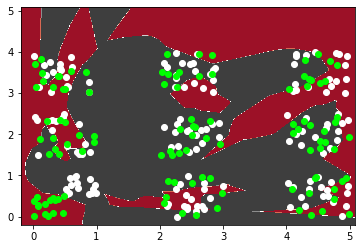

In [28]:
# plt.axis('equal')
plt.contourf(X_axis,Y_axis,np.sign(mesh_pred),cmap='RdGy')
plt.scatter(X_test[Y_test==1,0], X_test[Y_test==1,1] , c= "white" )
plt.scatter(X_test[Y_test==0,0], X_test[Y_test==0,1], c= "lime"  )

In [29]:
X_test.shape

(270, 2)

In [30]:
testset = Grid_data(X_test,Y_test)
testloader = DataLoader(testset,batch_size=10,shuffle=False)

In [31]:
correct = 0
total = 0
out = []
pred = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to("cuda"), labels.to("cuda")
        out.append(labels.cpu().numpy())
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        pred.append(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d train images: %d %%' % (270,    100 * correct / total))

Accuracy of the network on the 270 train images: 55 %


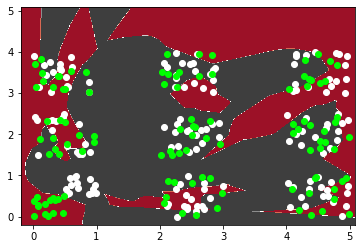

In [32]:
plt.contourf(X_axis,Y_axis,np.sign(mesh_pred),cmap='RdGy')
plt.scatter(X_test[Y_test==1,0], X_test[Y_test==1,1] , c= "white" )
plt.scatter(X_test[Y_test==0,0], X_test[Y_test==0,1], c= "lime"  )

In [33]:
torch.save(net.state_dict(),"model_"+str(epochs_nos)+".pkl")